# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters on the perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [236]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import random

In [237]:
df = pd.read_csv(r'Customer data.csv')

In [238]:
df1 = df.copy()

In [239]:
df.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [241]:
df.describe()

ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000         0.000000  
50%    115548.500000     1.000000         1.000000  
75%    138072.250000     1.000000         1.000000  
max    309364.000000     2.000000         2.000000

# Features Scaling
- Before calculating the distance we need to make sure that all data points are having the same weight so that no feature affect the other

In [242]:
# For min_max scaling
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
features_to_scale = ['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']
df1[features_to_scale] = scaler.fit_transform(df1[features_to_scale])

In [243]:
df1.head()

ID  Sex  Marital status       Age  Education    Income  Occupation  \
0  100000001  0.0             0.0  0.844828   0.666667  0.324781         0.5   
1  100000002  1.0             1.0  0.068966   0.333333  0.420210         0.5   
2  100000003  0.0             0.0  0.534483   0.333333  0.195144         0.0   
3  100000004  0.0             0.0  0.465517   0.333333  0.496223         0.5   
4  100000005  0.0             0.0  0.603448   0.333333  0.413842         0.5   

   Settlement size  
0              1.0  
1              1.0  
2              0.0  
3              0.5  
4              0.5

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [244]:
df2 = df1.drop(columns=['ID'])

In [245]:
df1.head()

ID  Sex  Marital status       Age  Education    Income  Occupation  \
0  100000001  0.0             0.0  0.844828   0.666667  0.324781         0.5   
1  100000002  1.0             1.0  0.068966   0.333333  0.420210         0.5   
2  100000003  0.0             0.0  0.534483   0.333333  0.195144         0.0   
3  100000004  0.0             0.0  0.465517   0.333333  0.496223         0.5   
4  100000005  0.0             0.0  0.603448   0.333333  0.413842         0.5   

   Settlement size  
0              1.0  
1              1.0  
2              0.0  
3              0.5  
4              0.5

In [246]:
# import numpy as np

# def pearson_distance(data_point, centroid):
#     # Calculate the average of all feature values in the data point and centroid
#     avg_data_point = np.mean(data_point)
#     avg_centroid = np.mean(centroid)
    
#     # Compute the numerator and denominator for Pearson distance coefficient
#     numerator = np.sum((data_point - avg_data_point) * (centroid - avg_centroid))
#     denominator = np.sqrt(np.sum((data_point - avg_data_point)**2) * 
#                           np.sum((centroid - avg_centroid)**2))
    
#     # Avoid division by zero error
#     if denominator == 0:
#         return 0
    
#     # Calculate Pearson distance coefficient
#     Dij = 1 - (numerator / denominator)
    
#     return Dij

# # Given centroids and data points
# centroids = np.array([[1, 4, 6], [8, 2, 1]])
# data_points = np.array([[3, 6, 2], [1, 5, 7], [7, 2, 1]])

# # Calculate Pearson distance for each data point with respect to both centroids
# for i, data_point in enumerate(data_points):
#     for j, centroid in enumerate(centroids):
#         distance = pearson_distance(data_point, centroid)
#         print(f"Pearson distance for Data Point {i+1} and Centroid {j+1}: {distance:.4f}")


In [247]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
    
    Cluster_Distance = np.zeros((len(Data_points), len(Cluster_Centroids)))
    
    if Distance_Type == 'euclidean':
        
        for row in range(len(Data_points)):
            point = Data_points.iloc[row]      #[x,y,z,w,s,.....]
    
            for centroid in range(len(Cluster_Centroids)):
                cent= Cluster_Centroids[centroid]
                
                # Calculate the distance between the centroid and data point
                d = 0
                for n in range(len(cent)):
                    d += ((cent[n] - point[n])**2)
                d = math.sqrt(d)
                 
                Cluster_Distance[row, centroid]=d
    
    elif Distance_Type == 'pearson':
        mean_points = np.mean(Data_points, axis=0)
        mean_centroids = np.mean(Cluster_Centroids, axis=0)
        new_points = Data_points - mean_points
        for i in range(num_clusters):
            centroid = Cluster_Centroids[i]
            new_centroid = centroid - mean_centroids
            num = np.sum(new_points * new_centroid, axis=1)
            den_points = np.sqrt(np.sum(new_points ** 2, axis=1))
            den_centroid = np.sqrt(np.sum(new_centroid ** 2))
            den = den_points * den_centroid
            den[den == 0] = np.inf  # Set denominator to infinity for zero if the denominator = 0 so num/inf = 0
            Cluster_Distance[:, i] = 1 - (num / den)
      
    return Cluster_Distance 


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [248]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type):
    
    tolerance=0.001
    
    K = Number_of_Clusters
    features= len(Data_points.columns)
    old_distance= 1e6
    
    #initialize the centroids randomly---------------------------------------------------------------------
    
    centroids=np.zeros((K,features))
    for i in range(K): #k is number of clusters
        for j in range(features): #how many features
            centroids[i,j]=random.uniform(0, 1)
            
    #initialize the centroids randomly---------------------------------------------------------------------

    
    while(True):
        Cluster_Metric=0
        Final_Cluster_Distance = GUC_Distance(centroids, Data_points, Distance_Type)
        

        Clusters = [[] for _ in range(K)] #empty clusters that we will put the datapoints in 

        for row in range(len(Final_Cluster_Distance)):
            min_index = np.argmin(Final_Cluster_Distance[row])
            Clusters[min_index].append(row)
            

        #calculating mean square distances for the clusters--------------------------------------------------

        mean_square_distances = np.zeros(K)
        for i in range(K):
            # Get the indices of data points assigned to the current cluster
            cluster_indices = Clusters[i]

            # Calculate the squared Euclidean distance between each data point in the cluster
            # and the centroid of that cluster
            # Calculate the squared Euclidean distance between each data point in the cluster
            # and the centroid of that cluster
            if len(Clusters[i])>0:
                squared_distances = np.sum((Data_points.iloc[cluster_indices] - centroids[i])**2, axis=1)
                Cluster_Metric+=sum(squared_distances)
            else:
                squared_distances=0

            

            # Calculate the mean square distance for the cluster
            mean_square_distances[i] = np.mean(squared_distances)



        #calculating mean sqaure distances for the clusters--------------------------------------------------

        #stopping condition----------------------------------------------------------------------------------

        new_distance=sum(mean_square_distances)

        if old_distance-new_distance<tolerance:                                
            break
        old_distance=new_distance

        #stopping condition----------------------------------------------------------------------------------

        #updating centroids----------------------------------------------------------------------------------

        new_centroids=np.zeros((K,features))
        for i in range(K): #loop on how many centroids we have
            indices=Clusters[i]
            sumofpoints = np.zeros(features)  # Initialize sumofpoints as an array of zeros
            
            for j in range(len(indices)):
                sumofpoints += Data_points.iloc[indices[j]].values
            new_point = sumofpoints / len(Clusters[i]) if len(Clusters[i]) > 0 else centroids[i]
                        
            new_centroids[i]=new_point                              #add to list of new centroids

        centroids=new_centroids #for next loop iteration

        #updating centroids----------------------------------------------------------------------------------

    return [Final_Cluster_Distance , Cluster_Metric]

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [3]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [249]:
import matplotlib.pyplot as plt
import itertools

def display_cluster(X, km=[], num_clusters=0):
    colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']  # List of colors
    alpha = 0.5  # Color opacity
    s = 20  # Marker size

    num_features = X.shape[1]

    # Create a grid of subplots for pairs of features
    fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Iterate over all pairs of features
    for i, (feat1, feat2) in enumerate(itertools.combinations(range(num_features), 2)):
        ax = axes[i]

        # Plot points for each cluster
        for j in range(num_clusters):
            if j in km.labels_:
                ax.scatter(X[km.labels_ == j, feat1], X[km.labels_ == j, feat2], c=colors[j], alpha=alpha, s=s)
            # Plot cluster centers
            centroid = km.cluster_centers_[j]
            ax.scatter(centroid[feat1], centroid[feat2], c=colors[j], marker='x', s=100)

        ax.set_xlabel(f'Feature {feat1}')
        ax.set_ylabel(f'Feature {feat2}')

    # Hide unused subplots
    for i in range(num_features**2):
        if i >= num_features * (num_features - 1) / 2:
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()


> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

### Example 1

<Figure size 800x800 with 0 Axes>

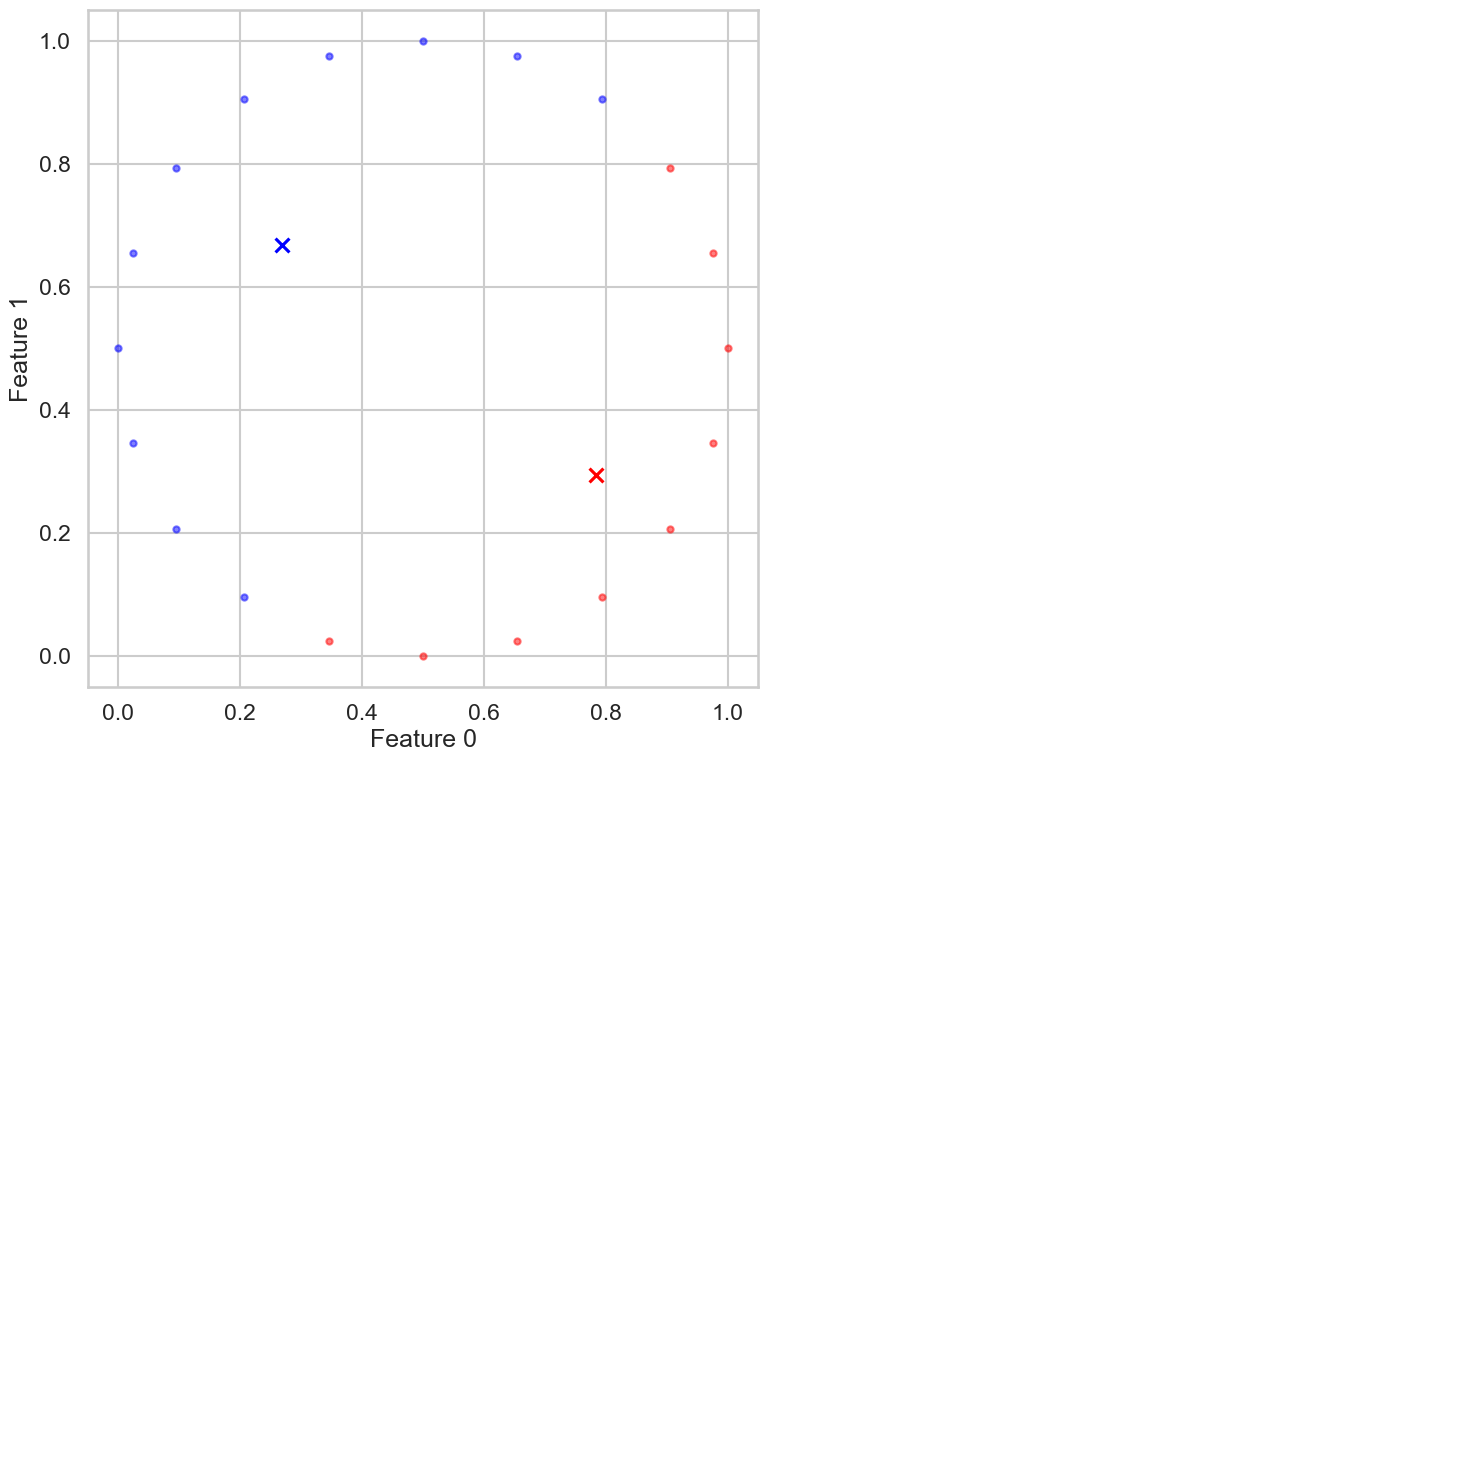

<Figure size 800x800 with 0 Axes>

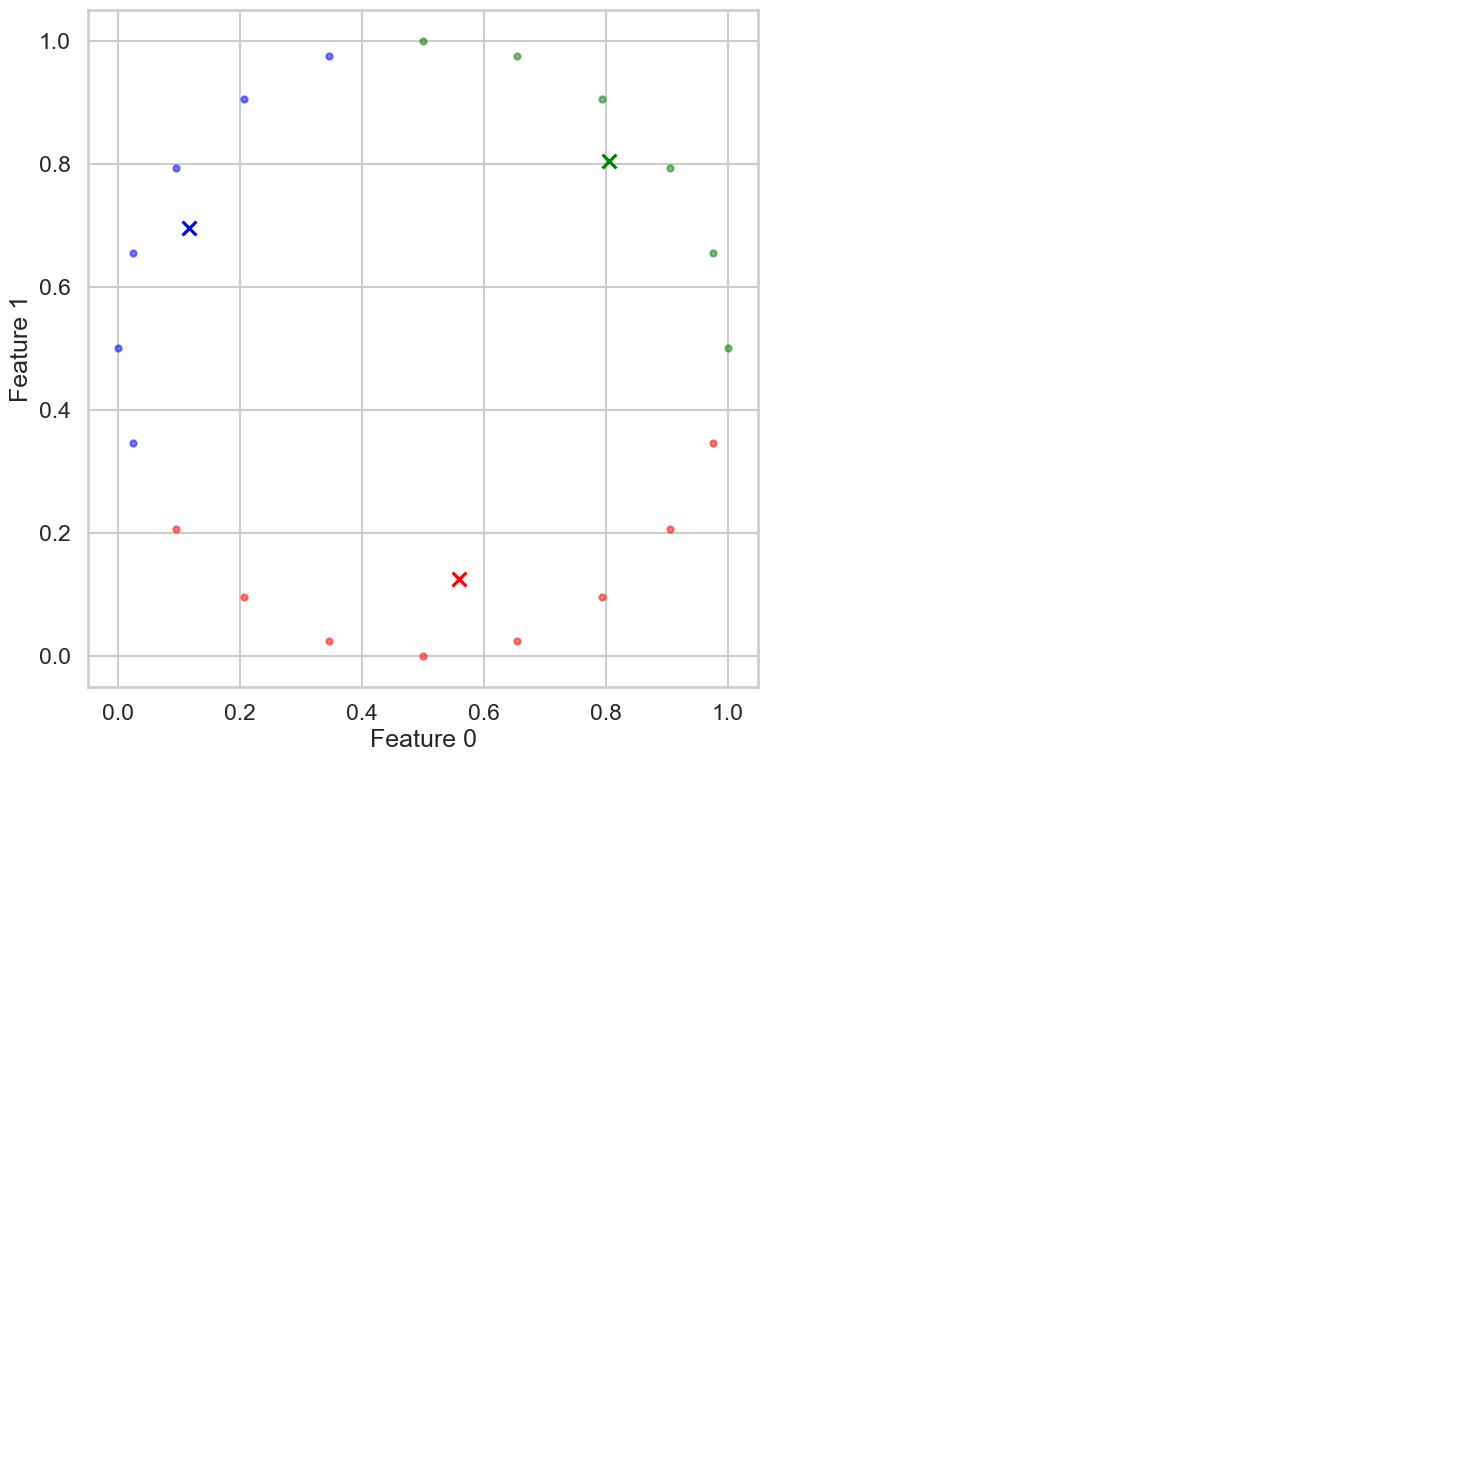

<Figure size 800x800 with 0 Axes>

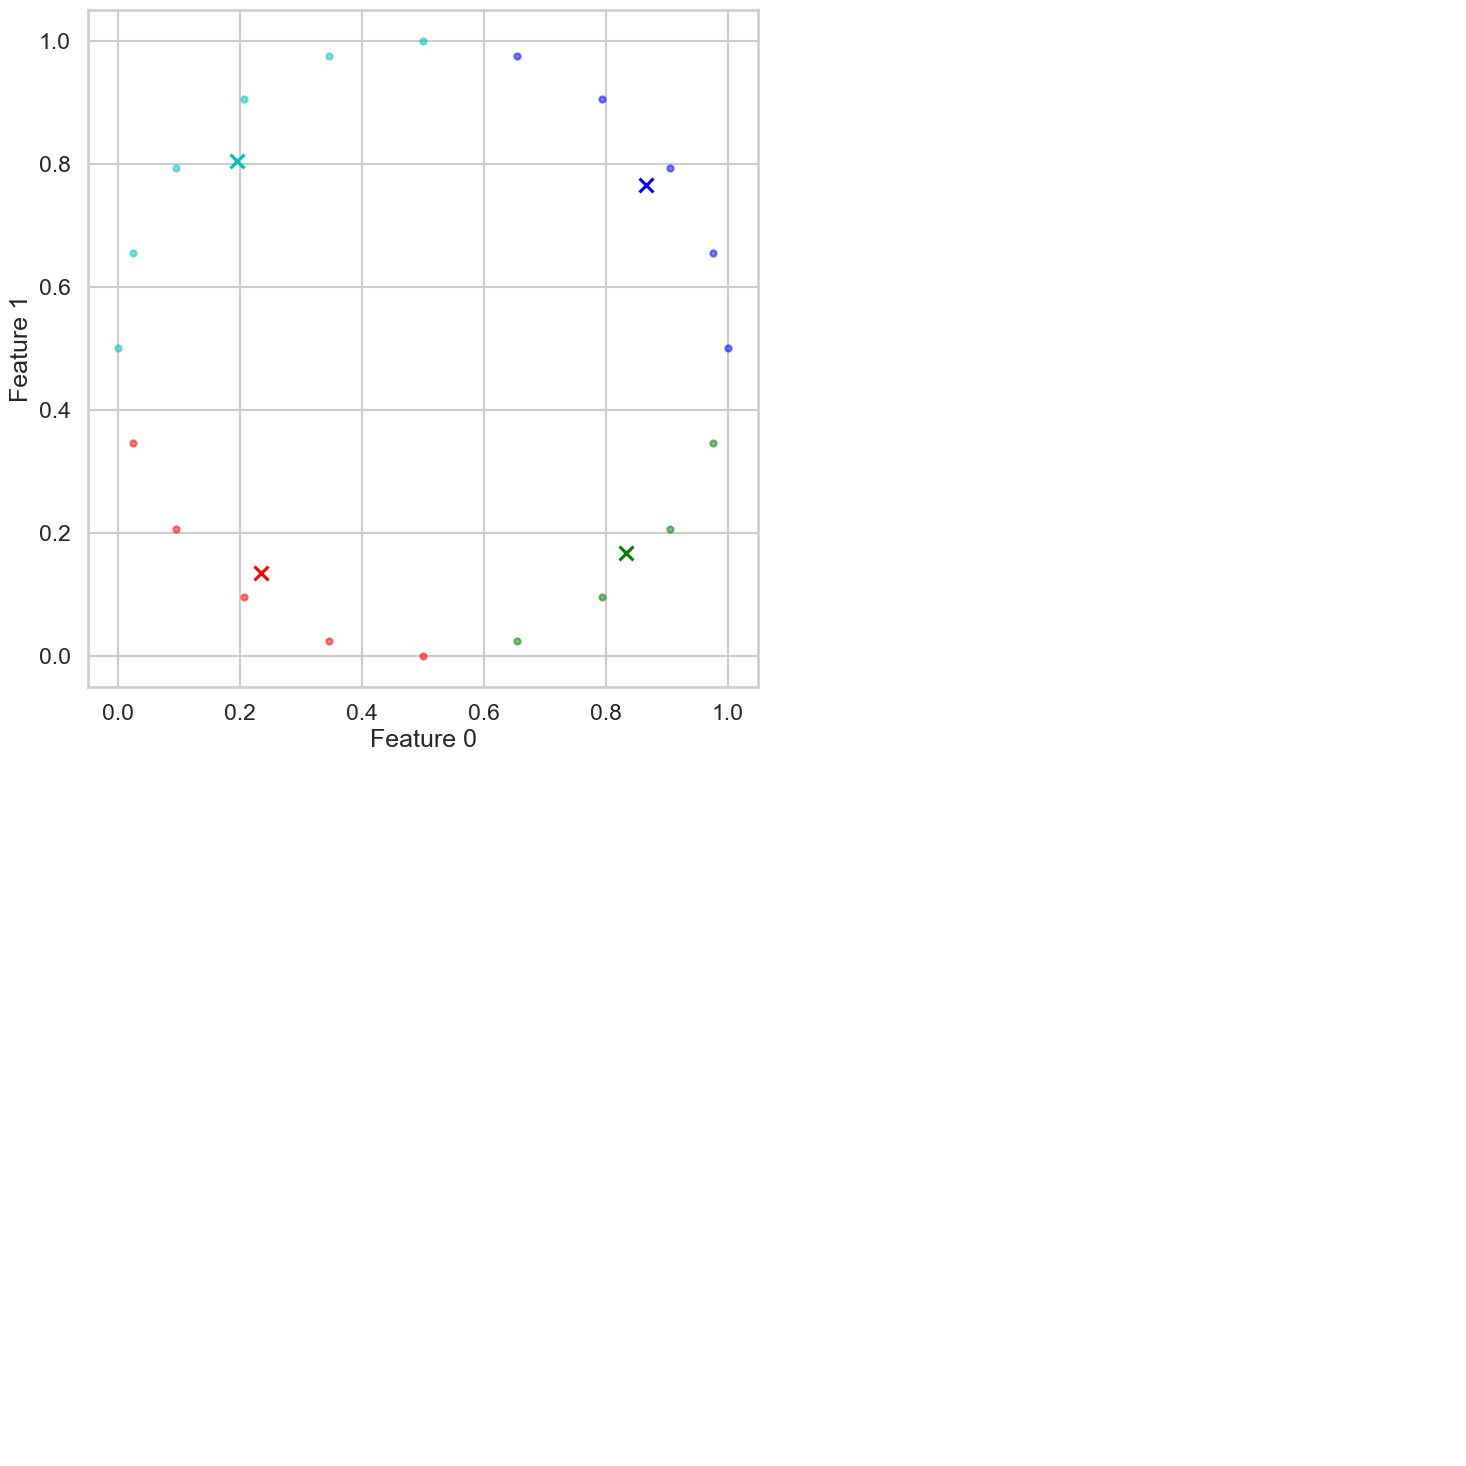

<Figure size 800x800 with 0 Axes>

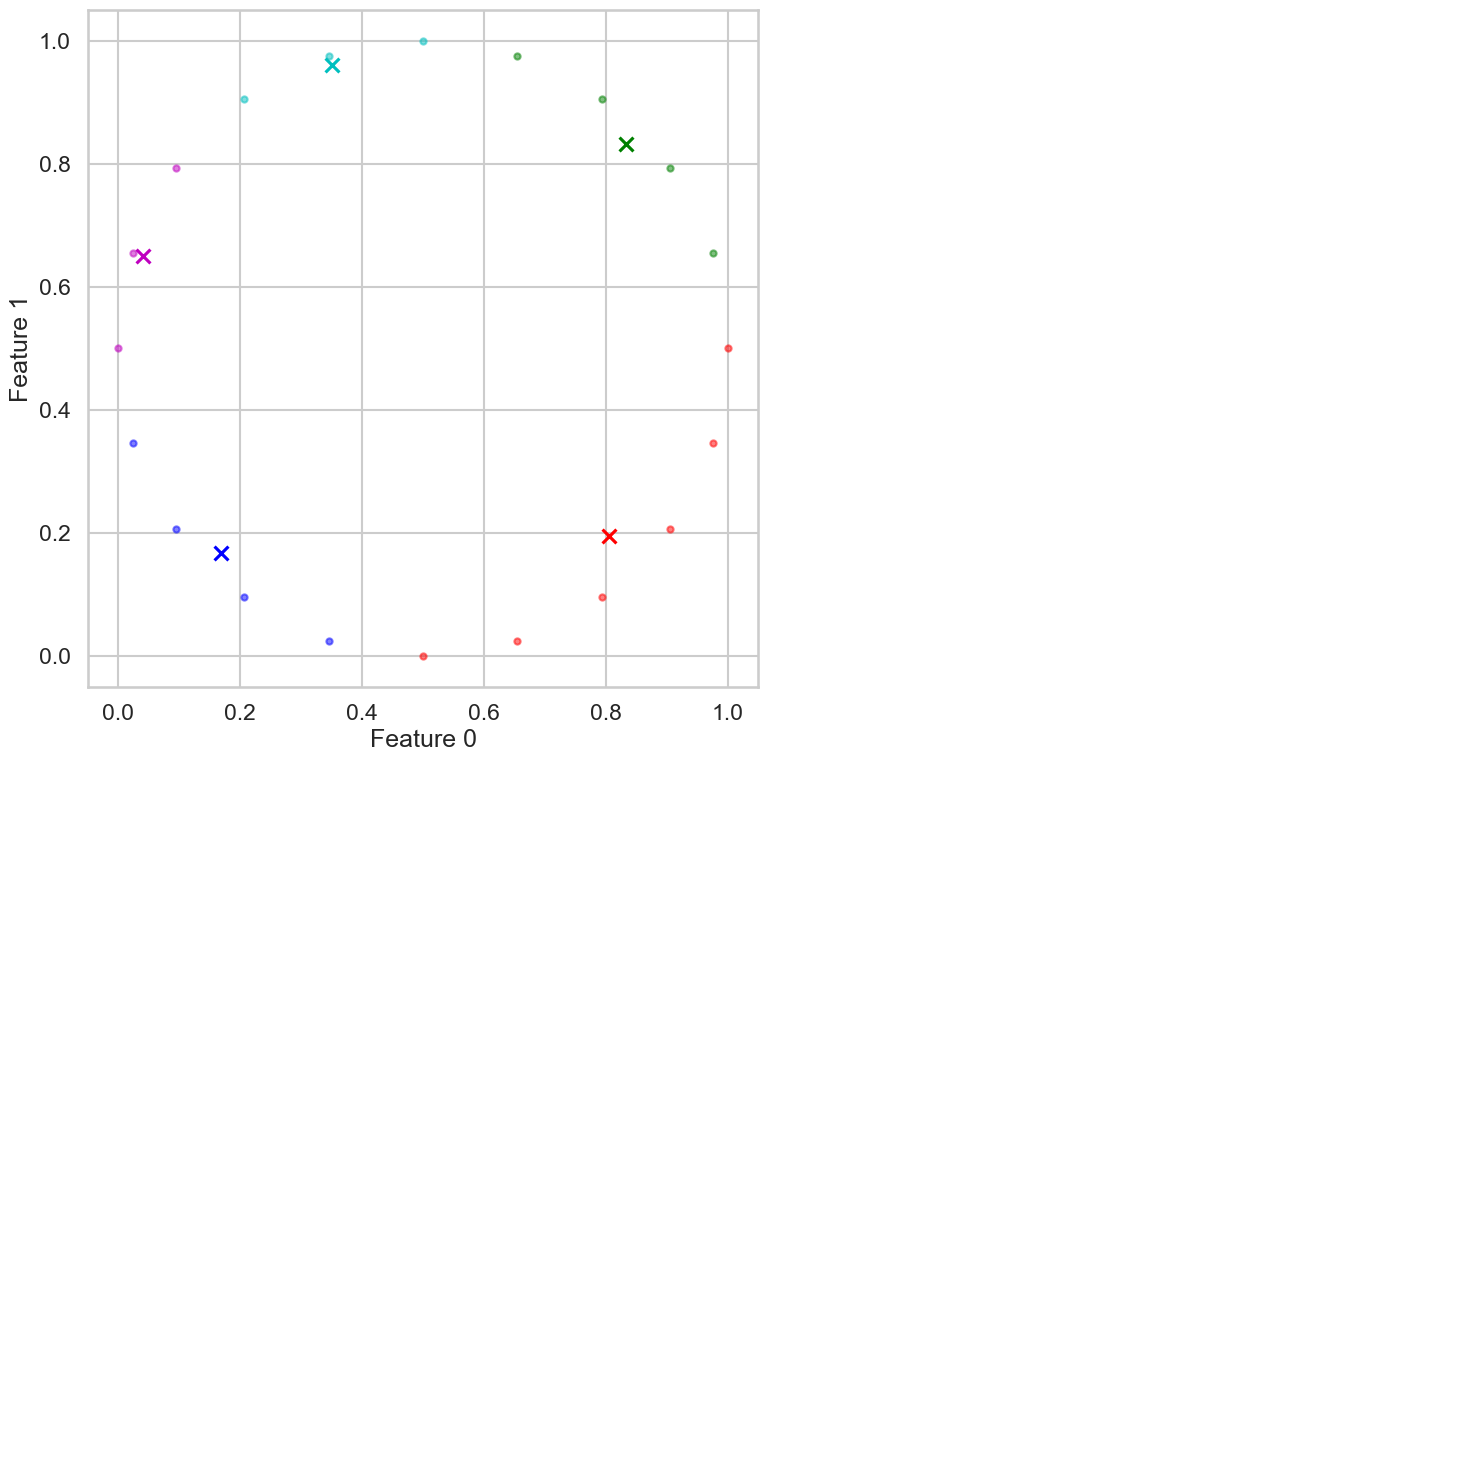

<Figure size 800x800 with 0 Axes>

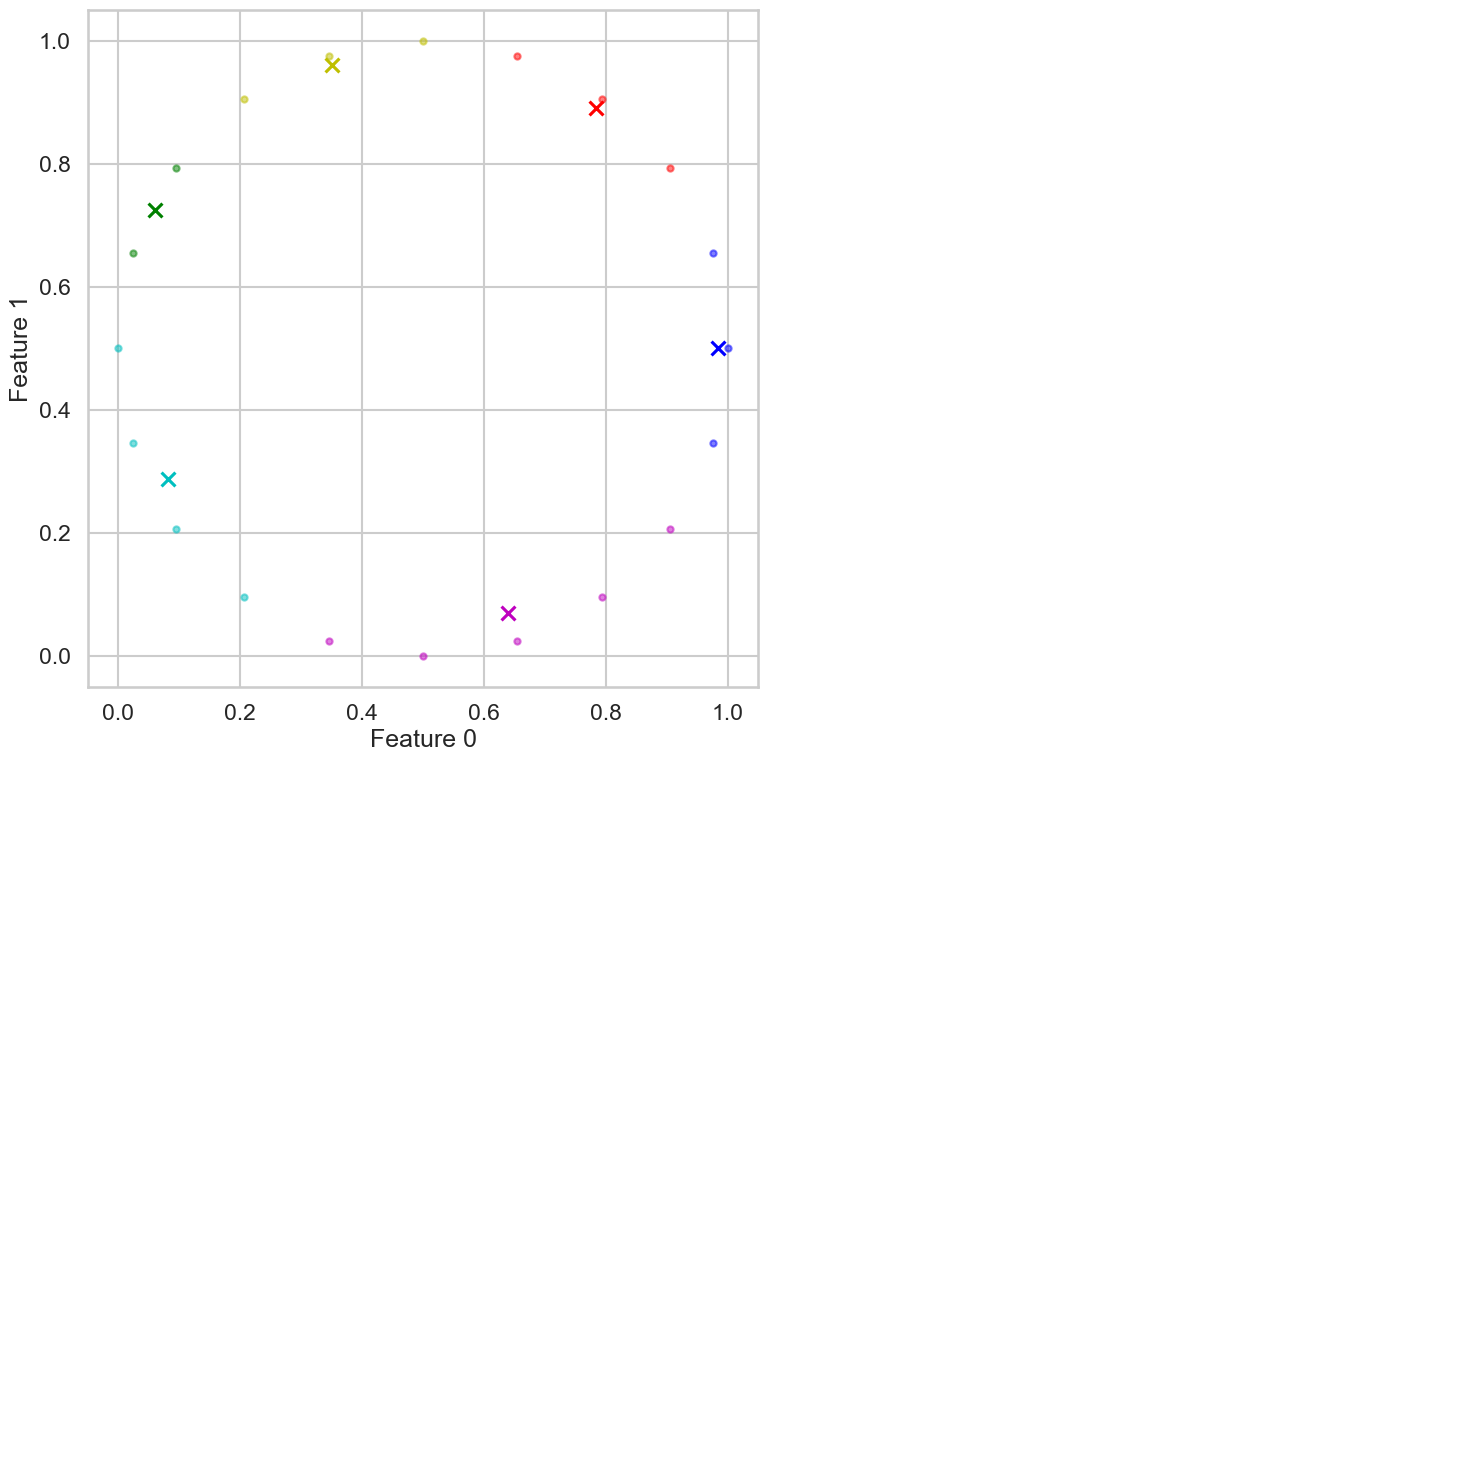

<Figure size 800x800 with 0 Axes>

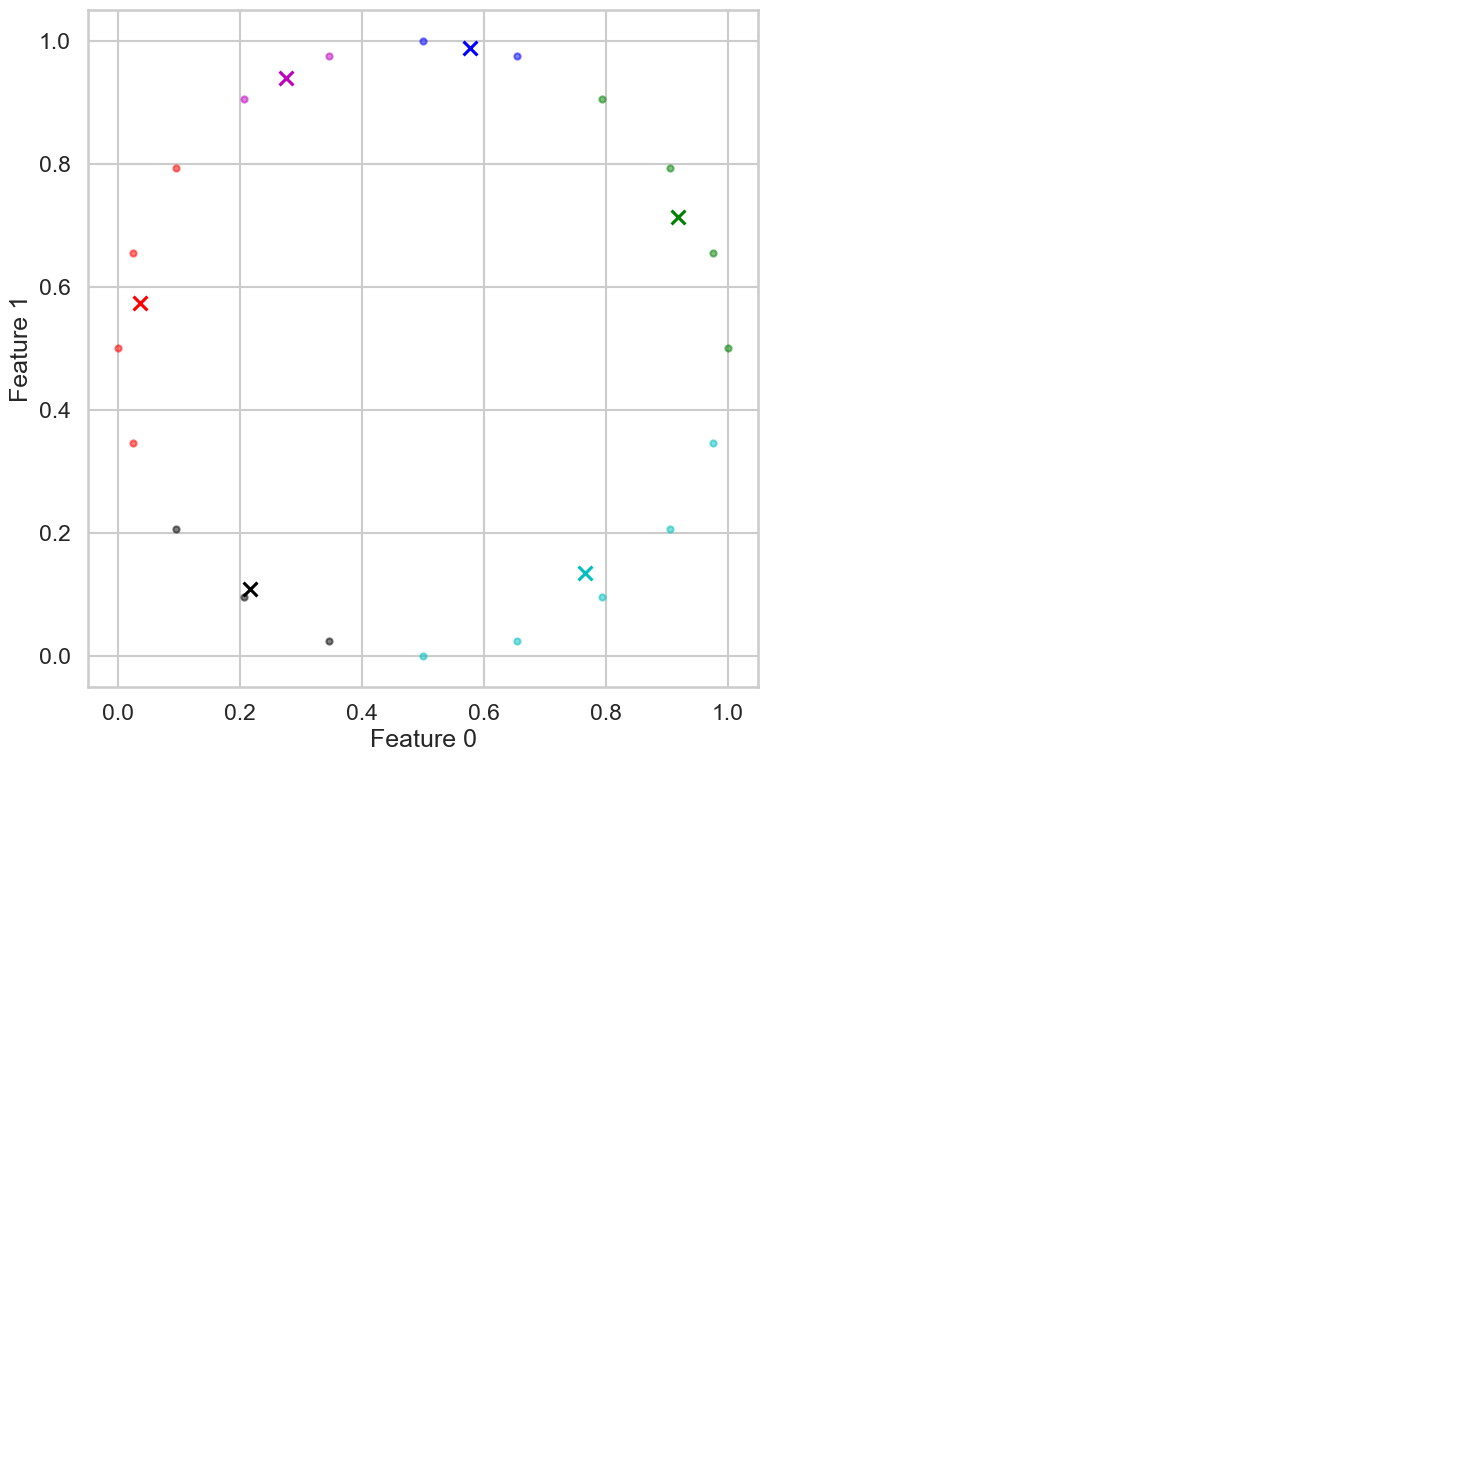

<Figure size 800x800 with 0 Axes>

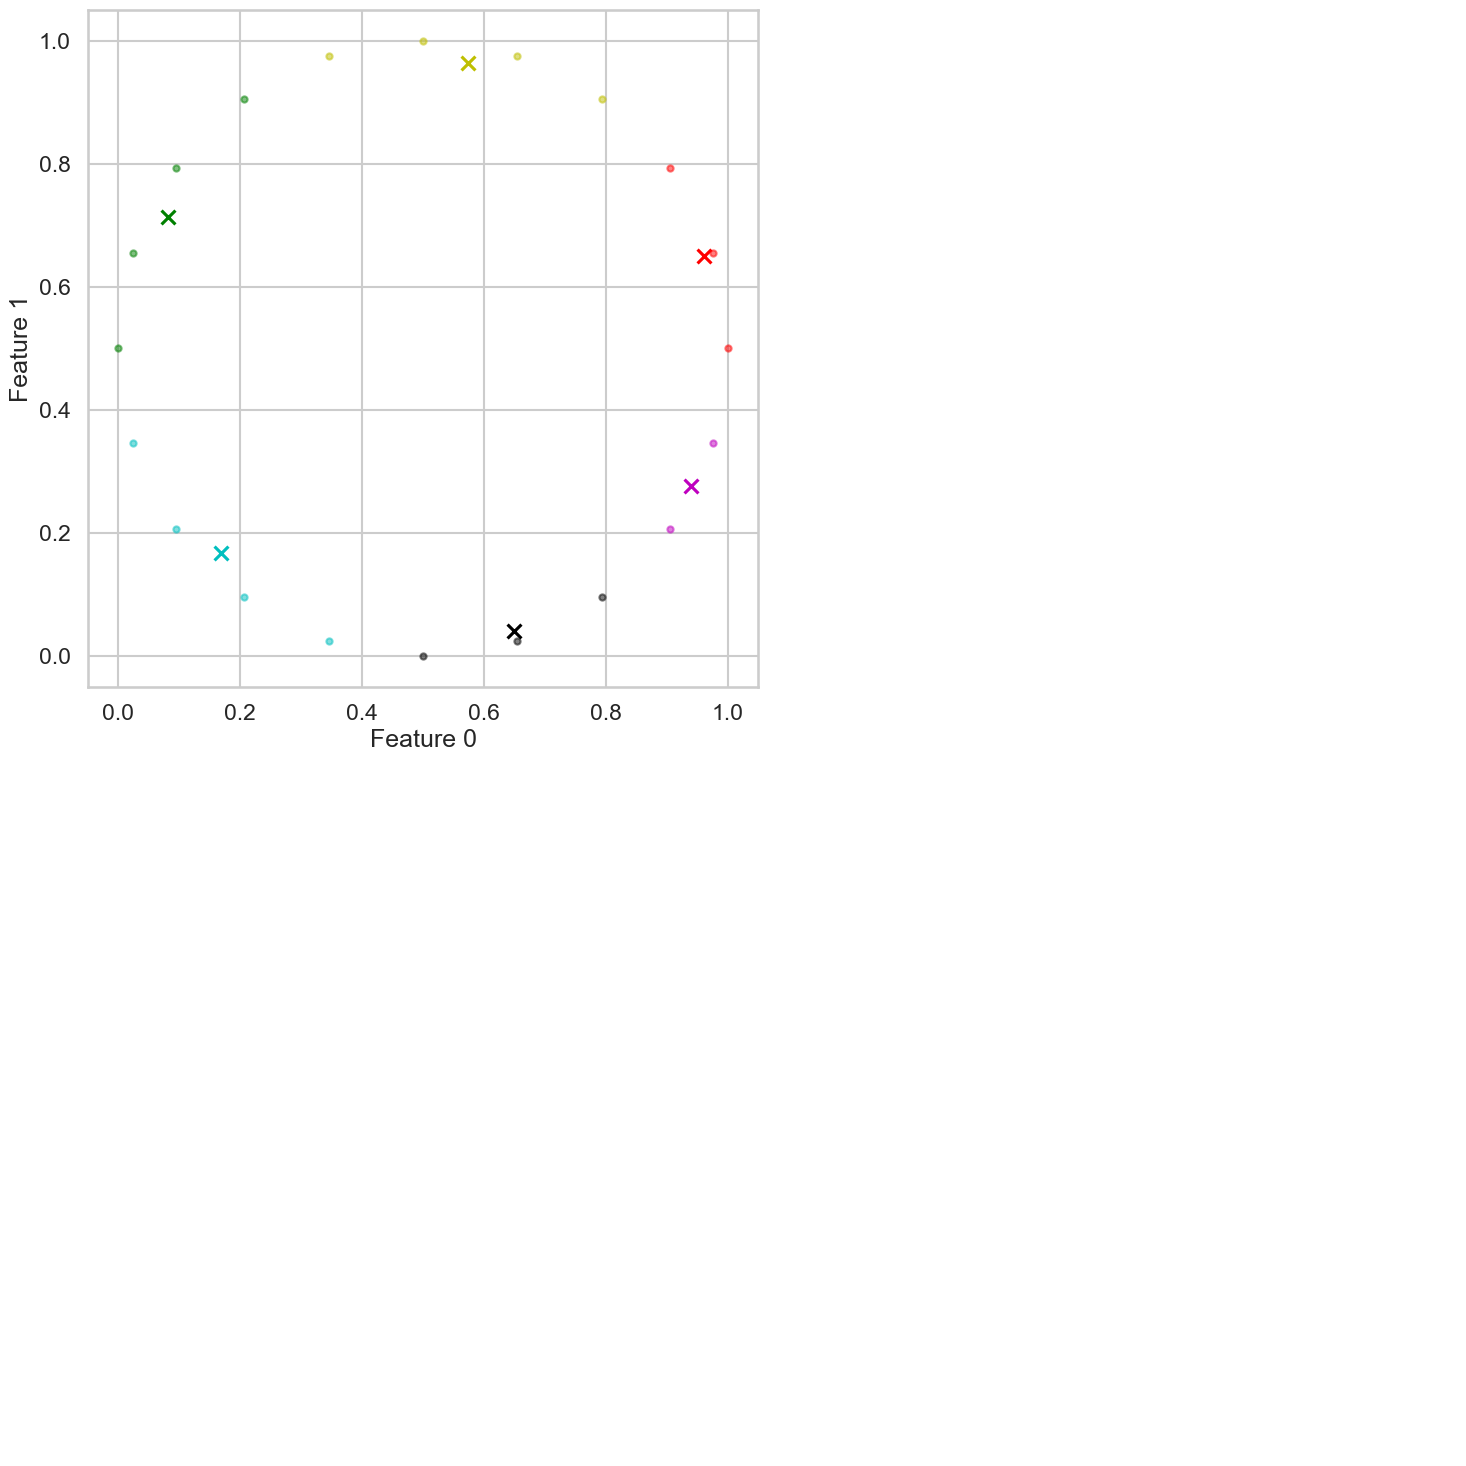

<Figure size 800x800 with 0 Axes>

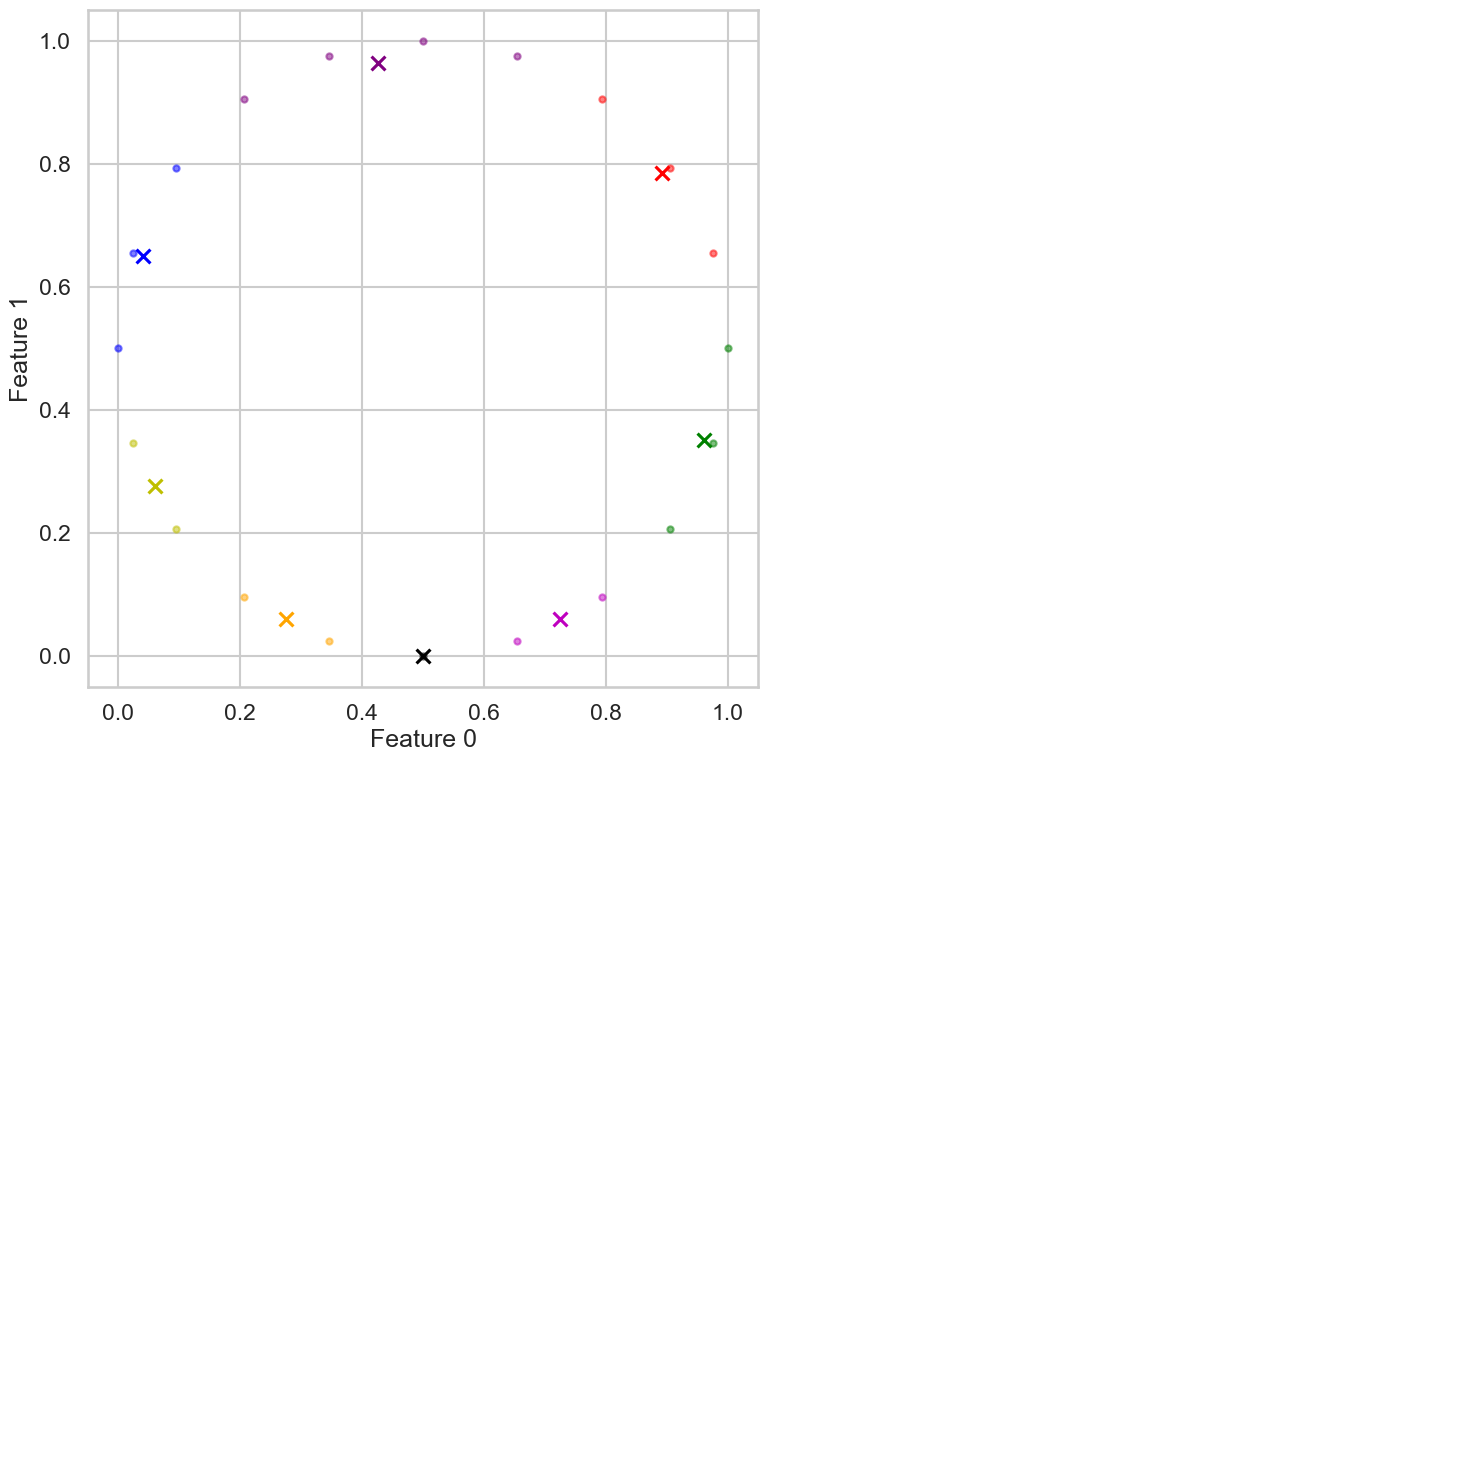

In [250]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()


scaler = MinMaxScaler()
X1 = scaler.fit_transform(X)
X1 = pd.DataFrame(X1)

# Set parameters
metric = []
diff_k = []
for i in range(2,10):
    num_clusters = i
    distance_type = 'euclidean'

    # Perform KMeans clustering
    final_cluster_distance, cluster_metric = GUC_Kmean(X1, num_clusters, distance_type)
    metric.append(cluster_metric)
    diff_k.append(i)
    # Create a KMeans object for visualization purposes
    km = KMeans(n_clusters=num_clusters)
    km.labels_ = np.argmin(final_cluster_distance, axis=1)
    km.cluster_centers_ = np.array([X1[km.labels_ == i].mean(axis=0) for i in range(num_clusters)])
    
    # Visualize clusters
    plt.figure()
    display_cluster(X1.values, km=km, num_clusters=num_clusters)

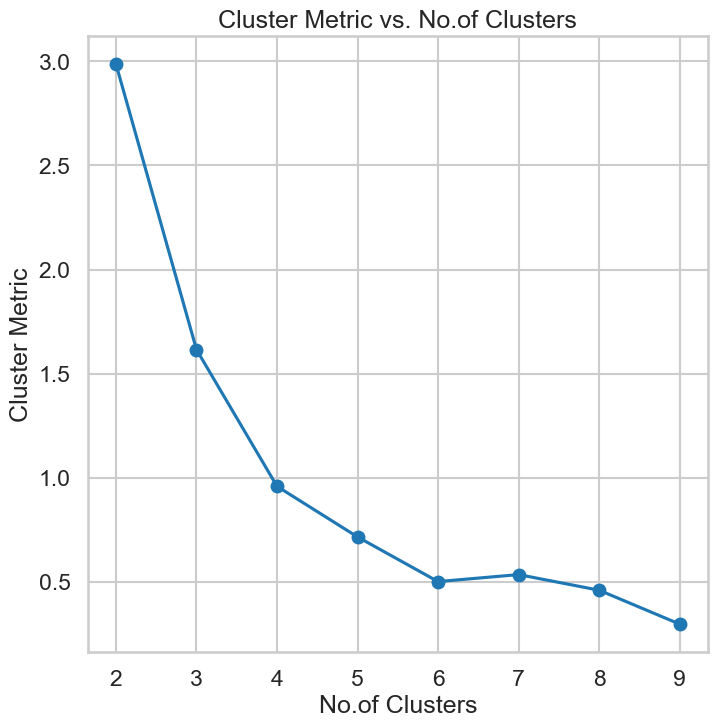

In [251]:
# Plot the graph
plt.plot(diff_k, metric, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('No.of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. No.of Clusters')

# Show the plot
plt.show()


### 1.Pearson

<Figure size 800x800 with 0 Axes>

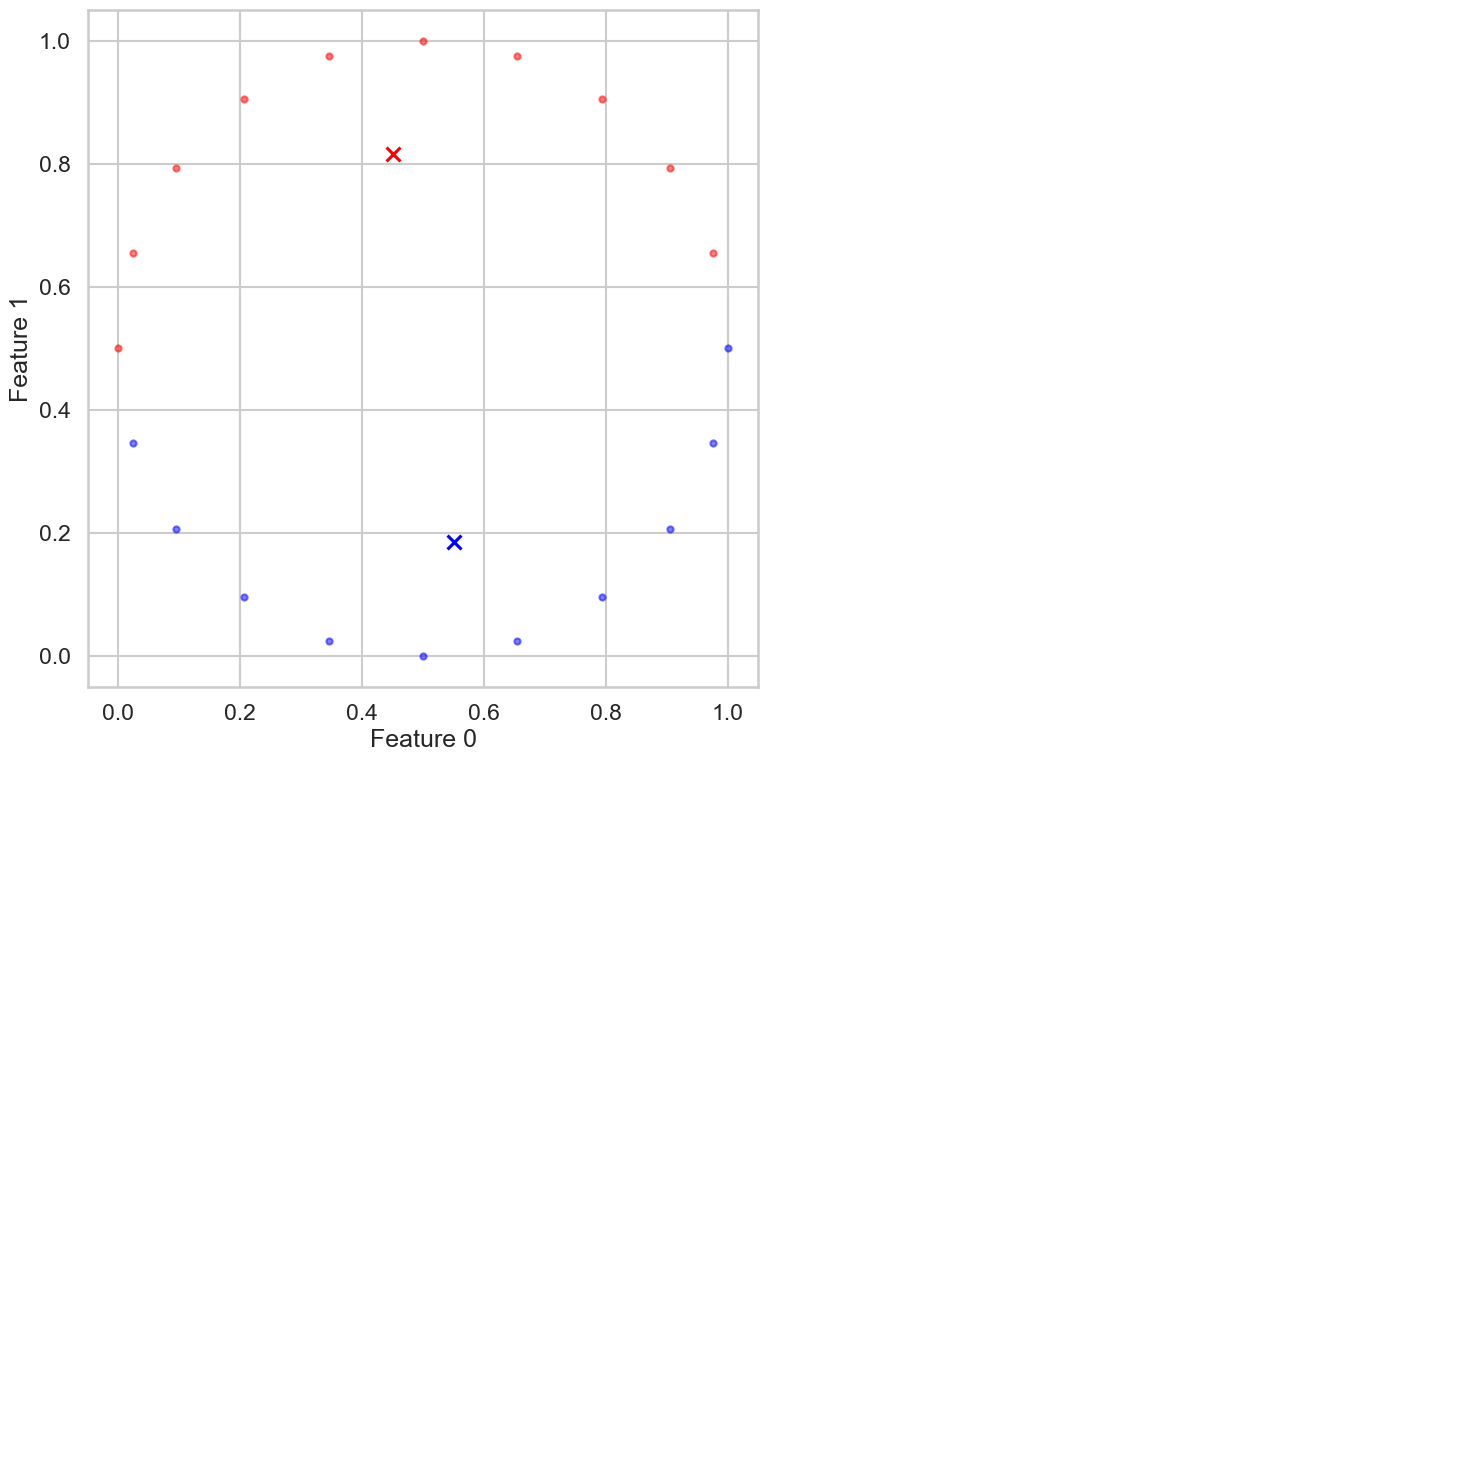

<Figure size 800x800 with 0 Axes>

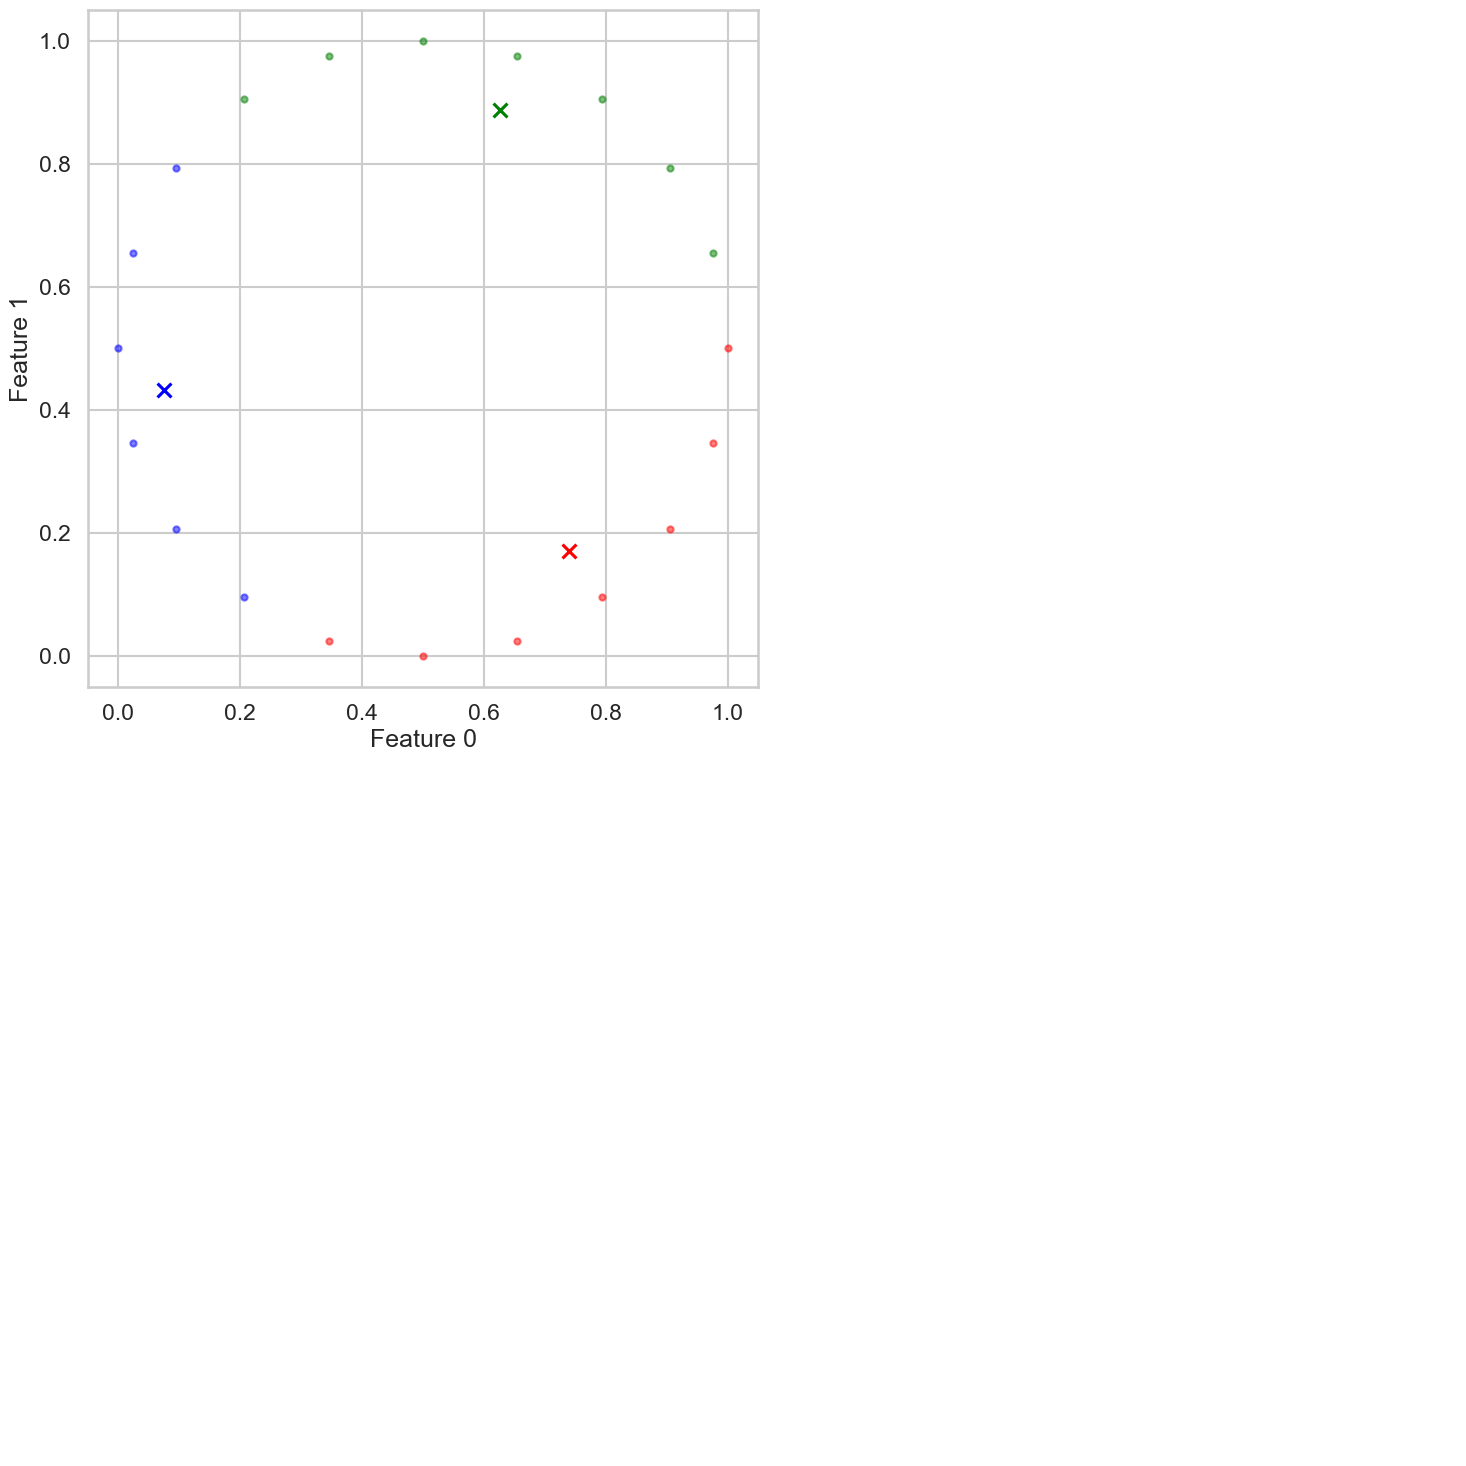

<Figure size 800x800 with 0 Axes>

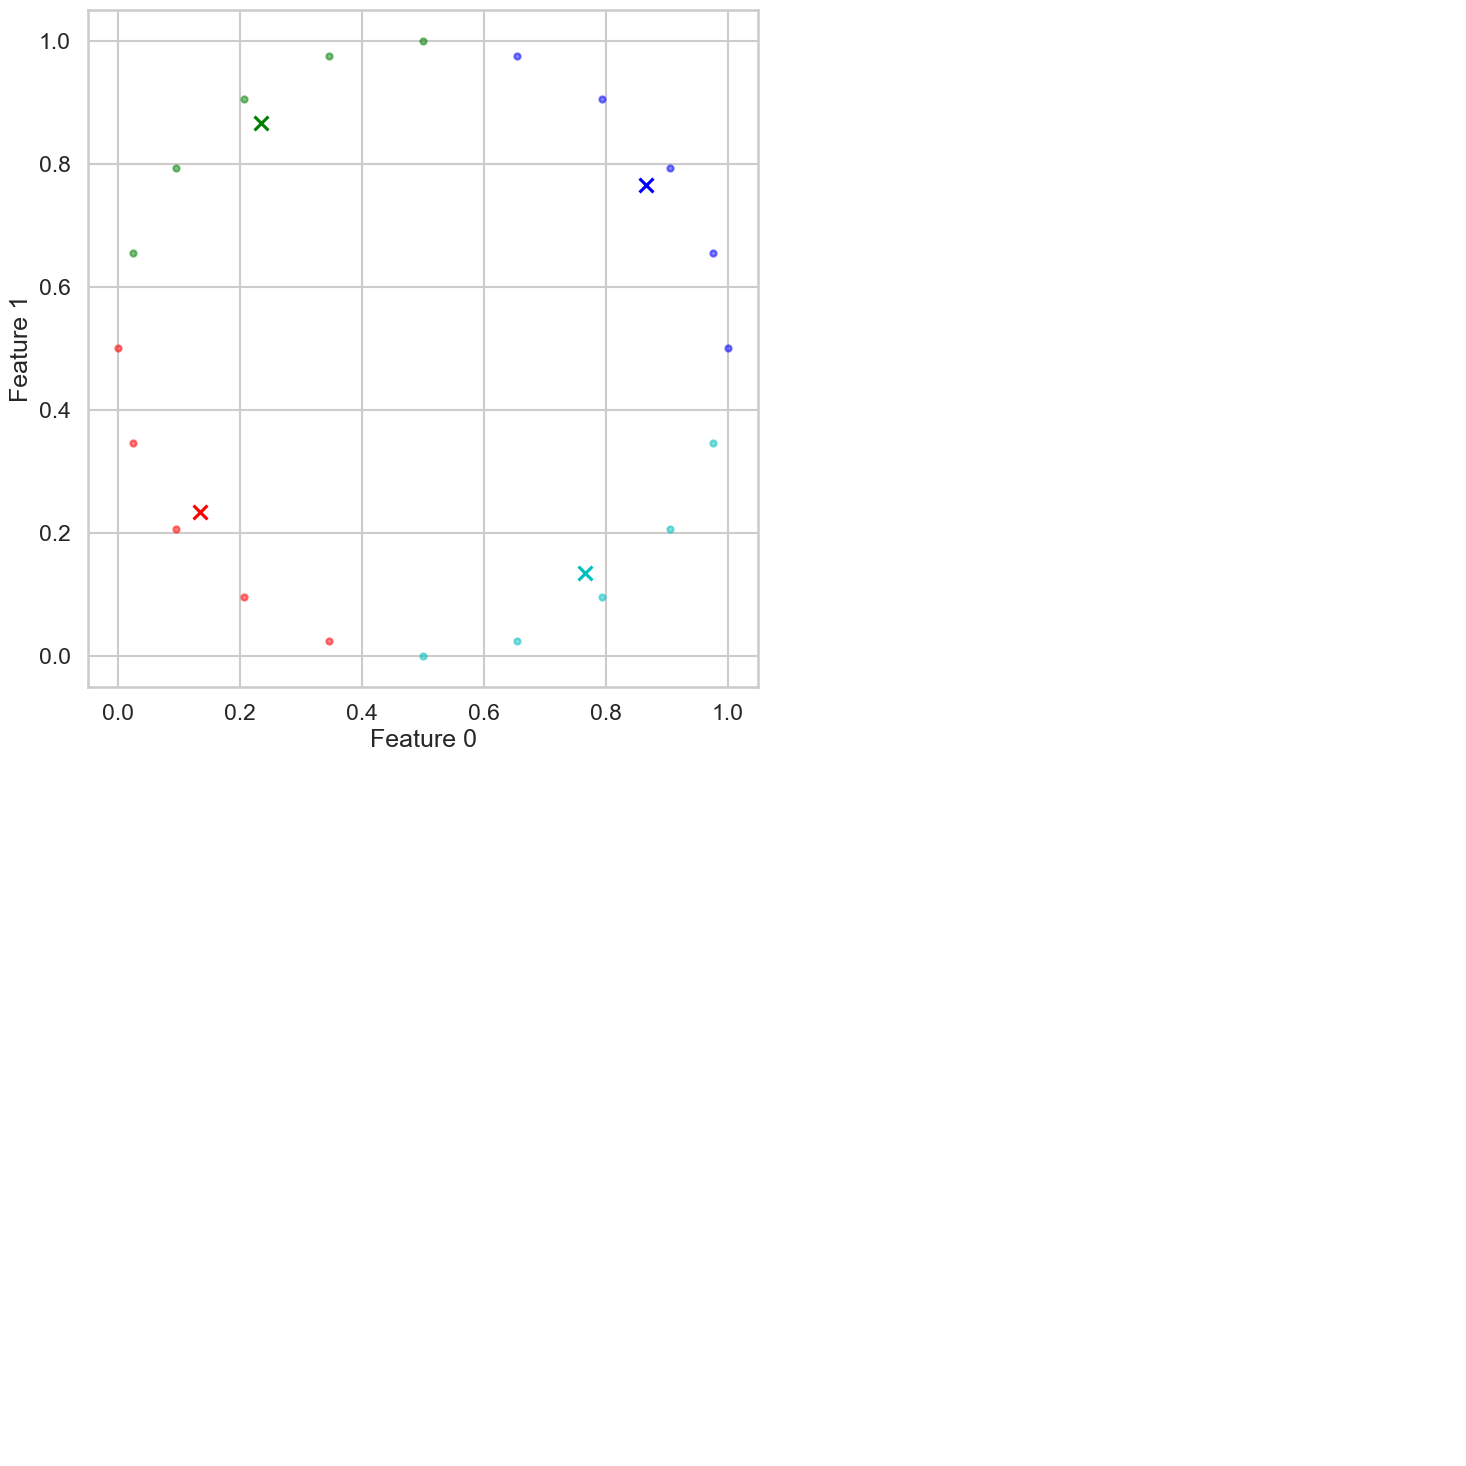

<Figure size 800x800 with 0 Axes>

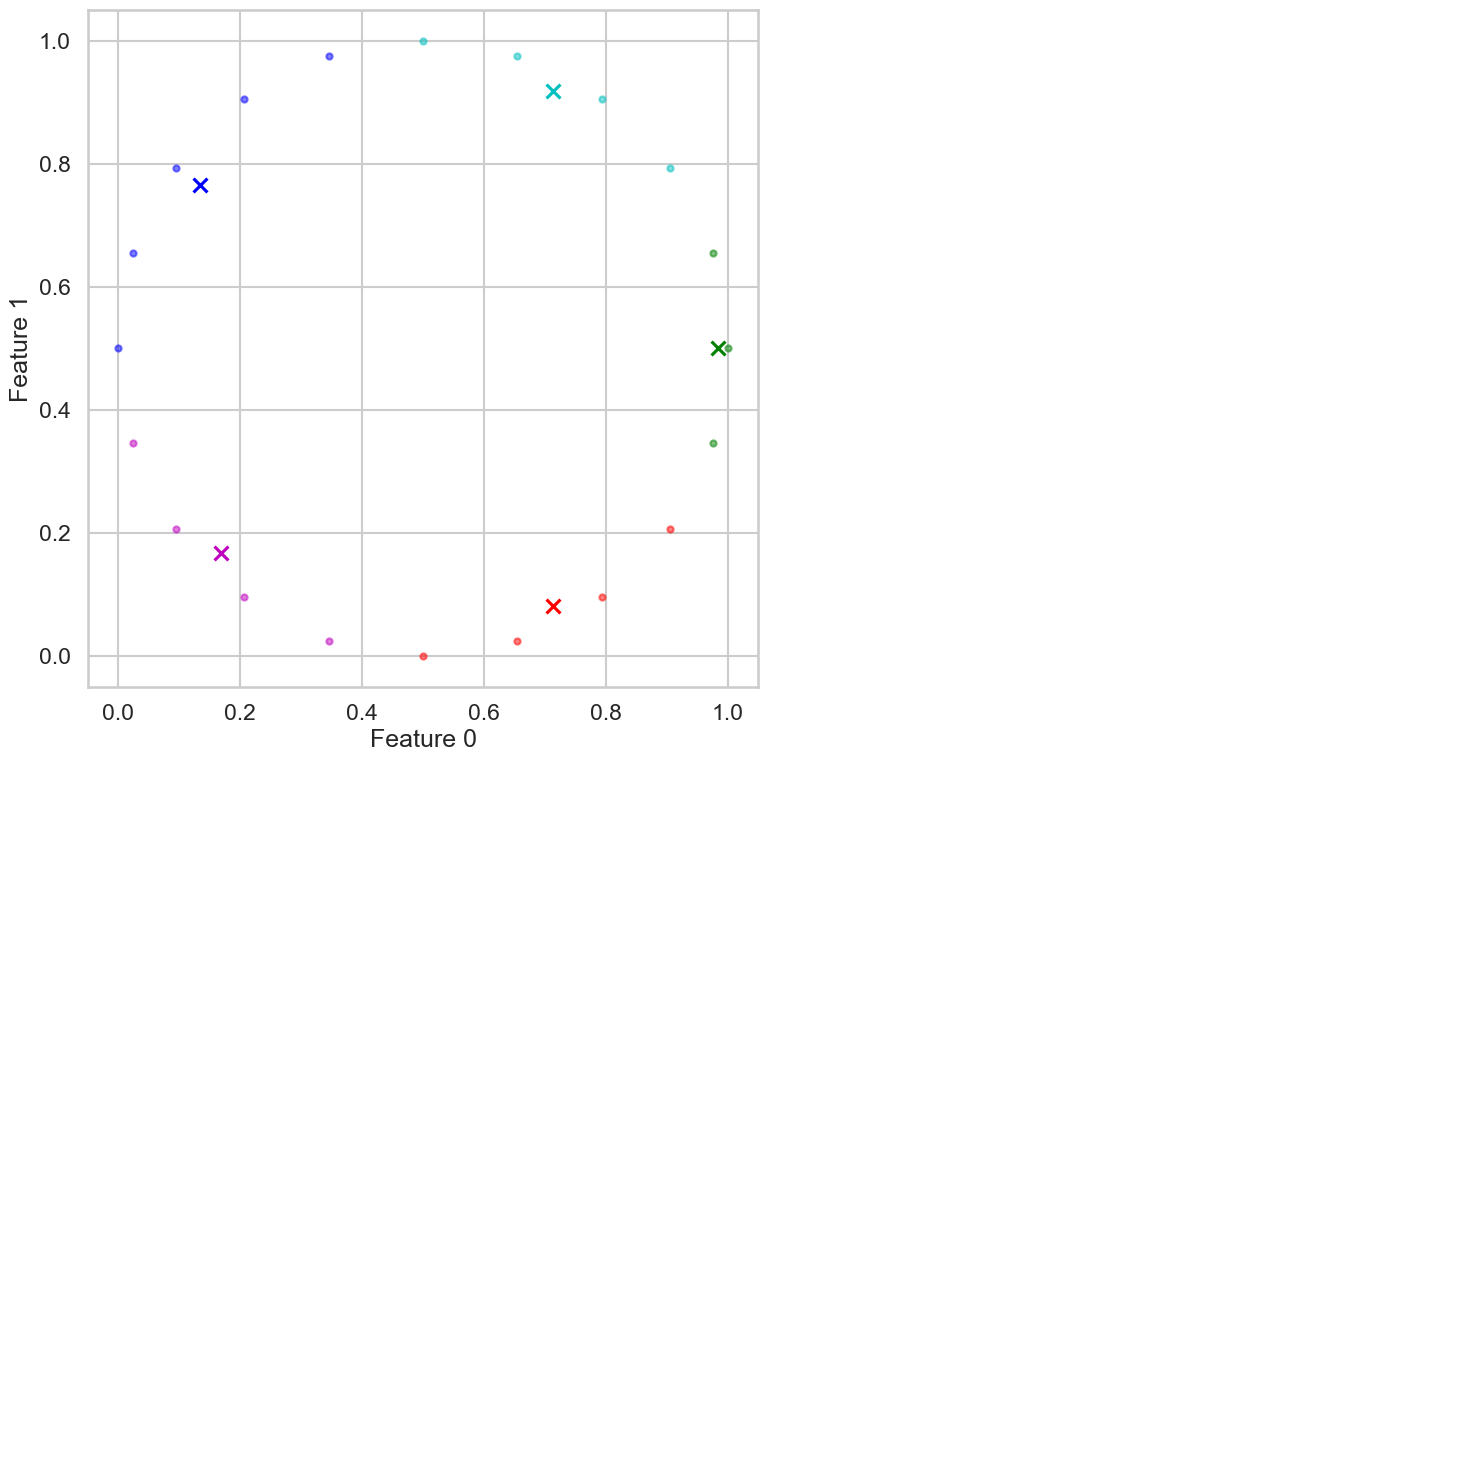

<Figure size 800x800 with 0 Axes>

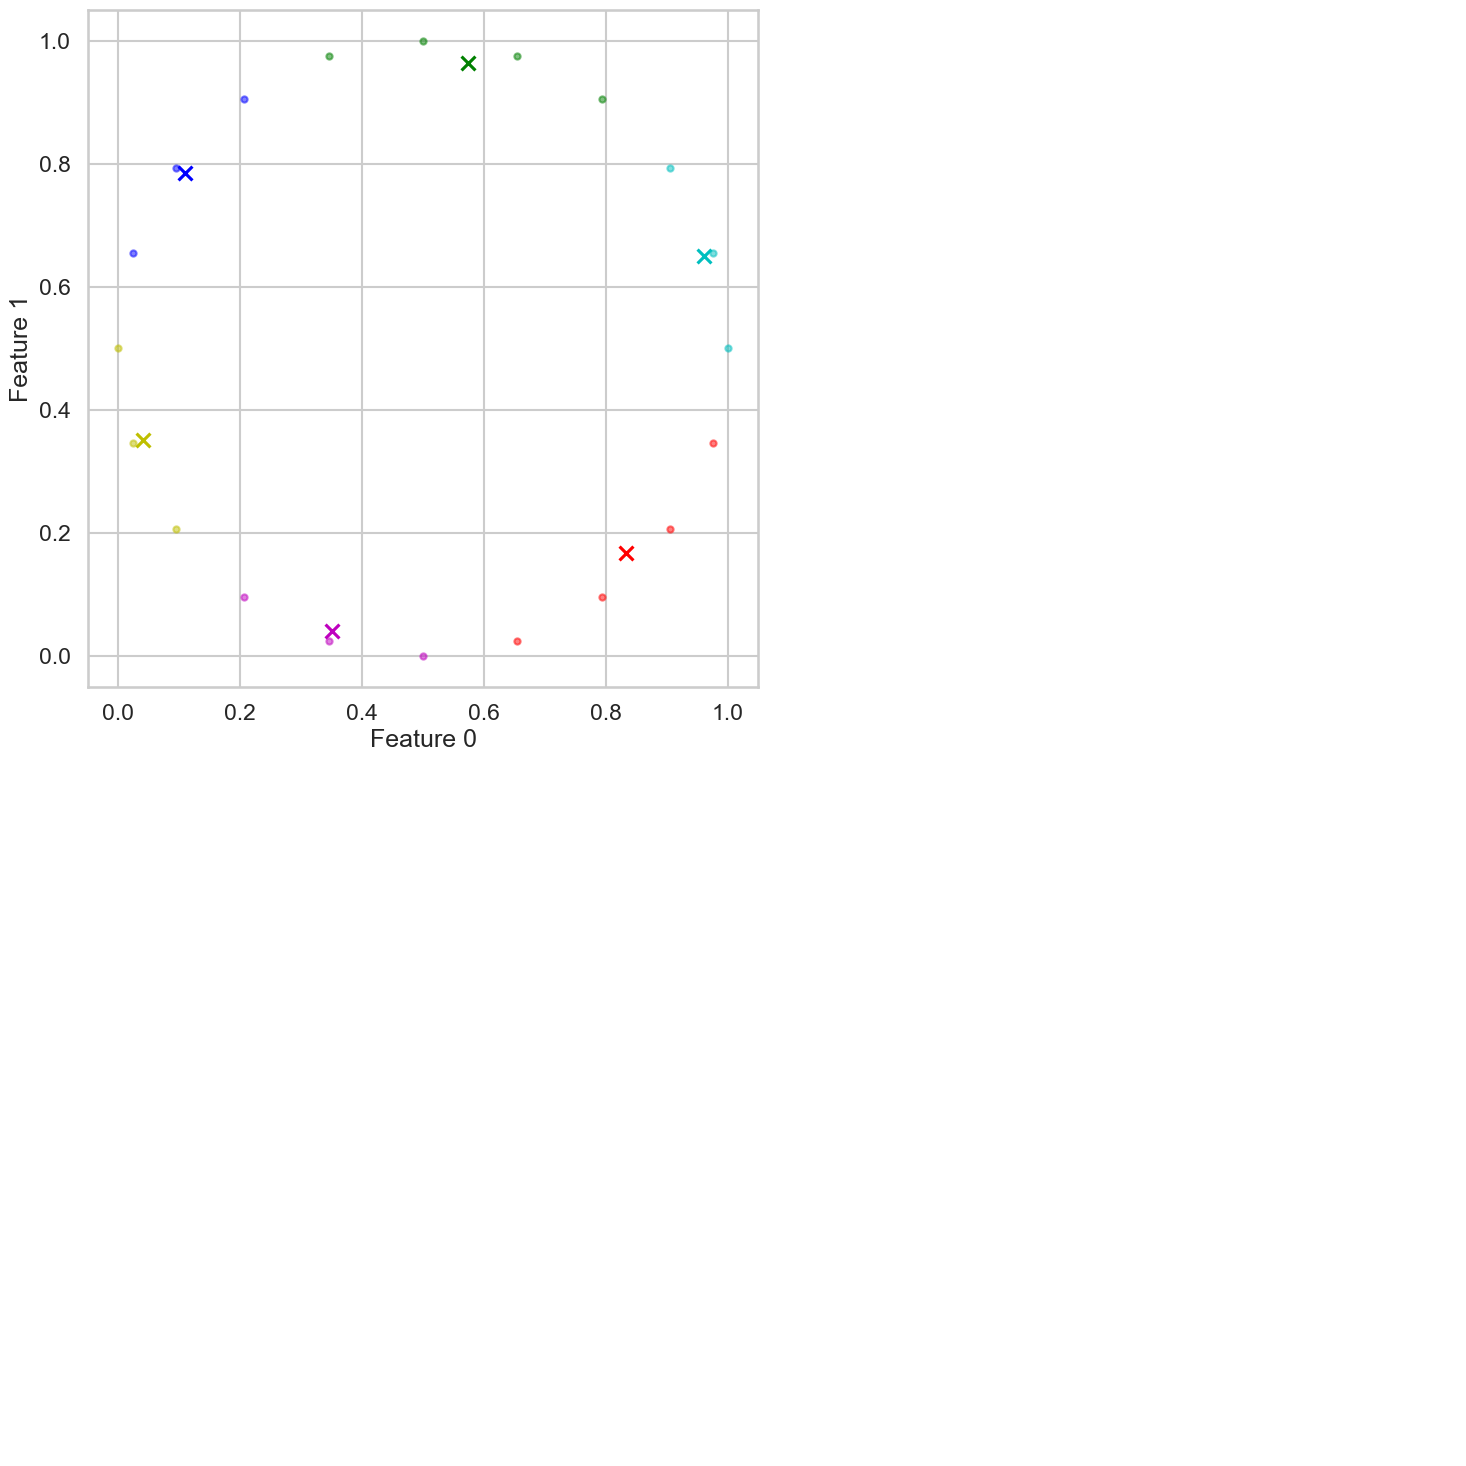

<Figure size 800x800 with 0 Axes>

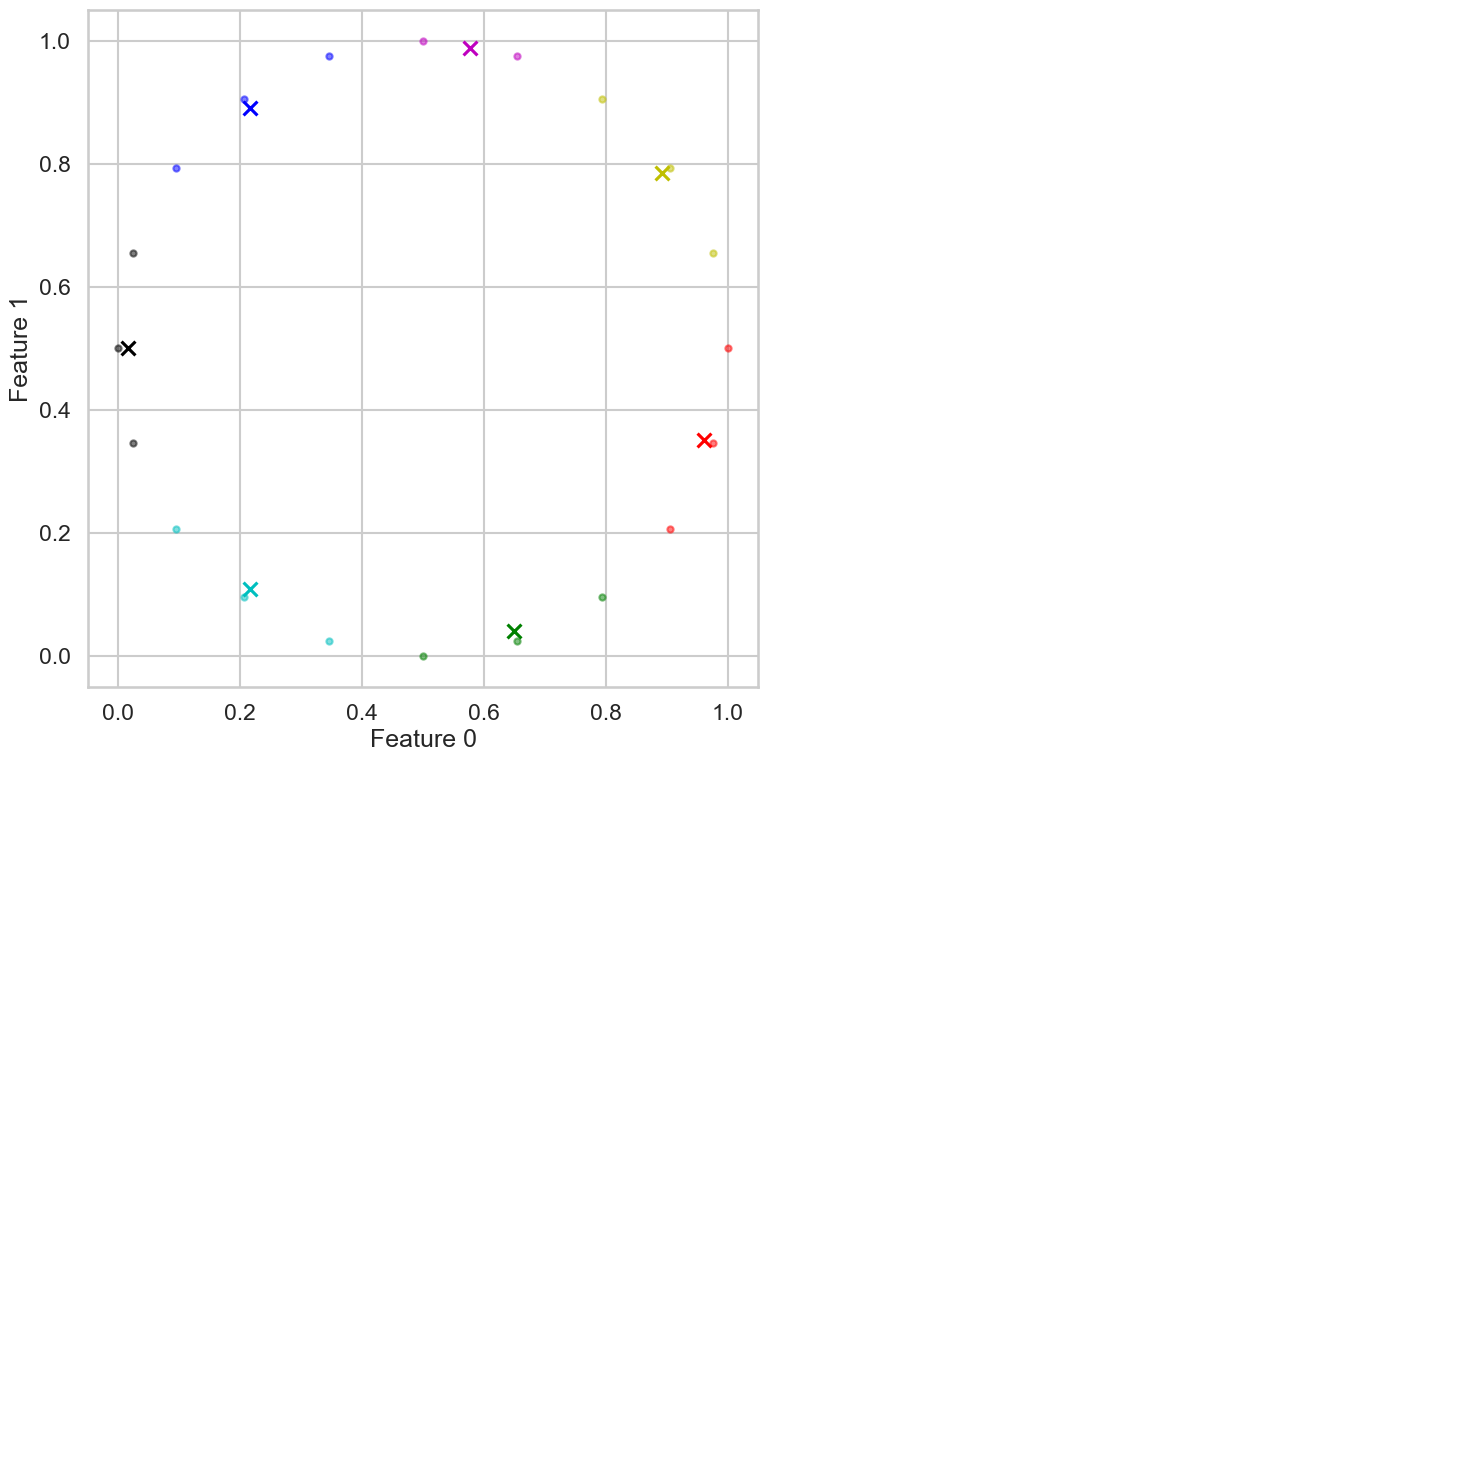

<Figure size 800x800 with 0 Axes>

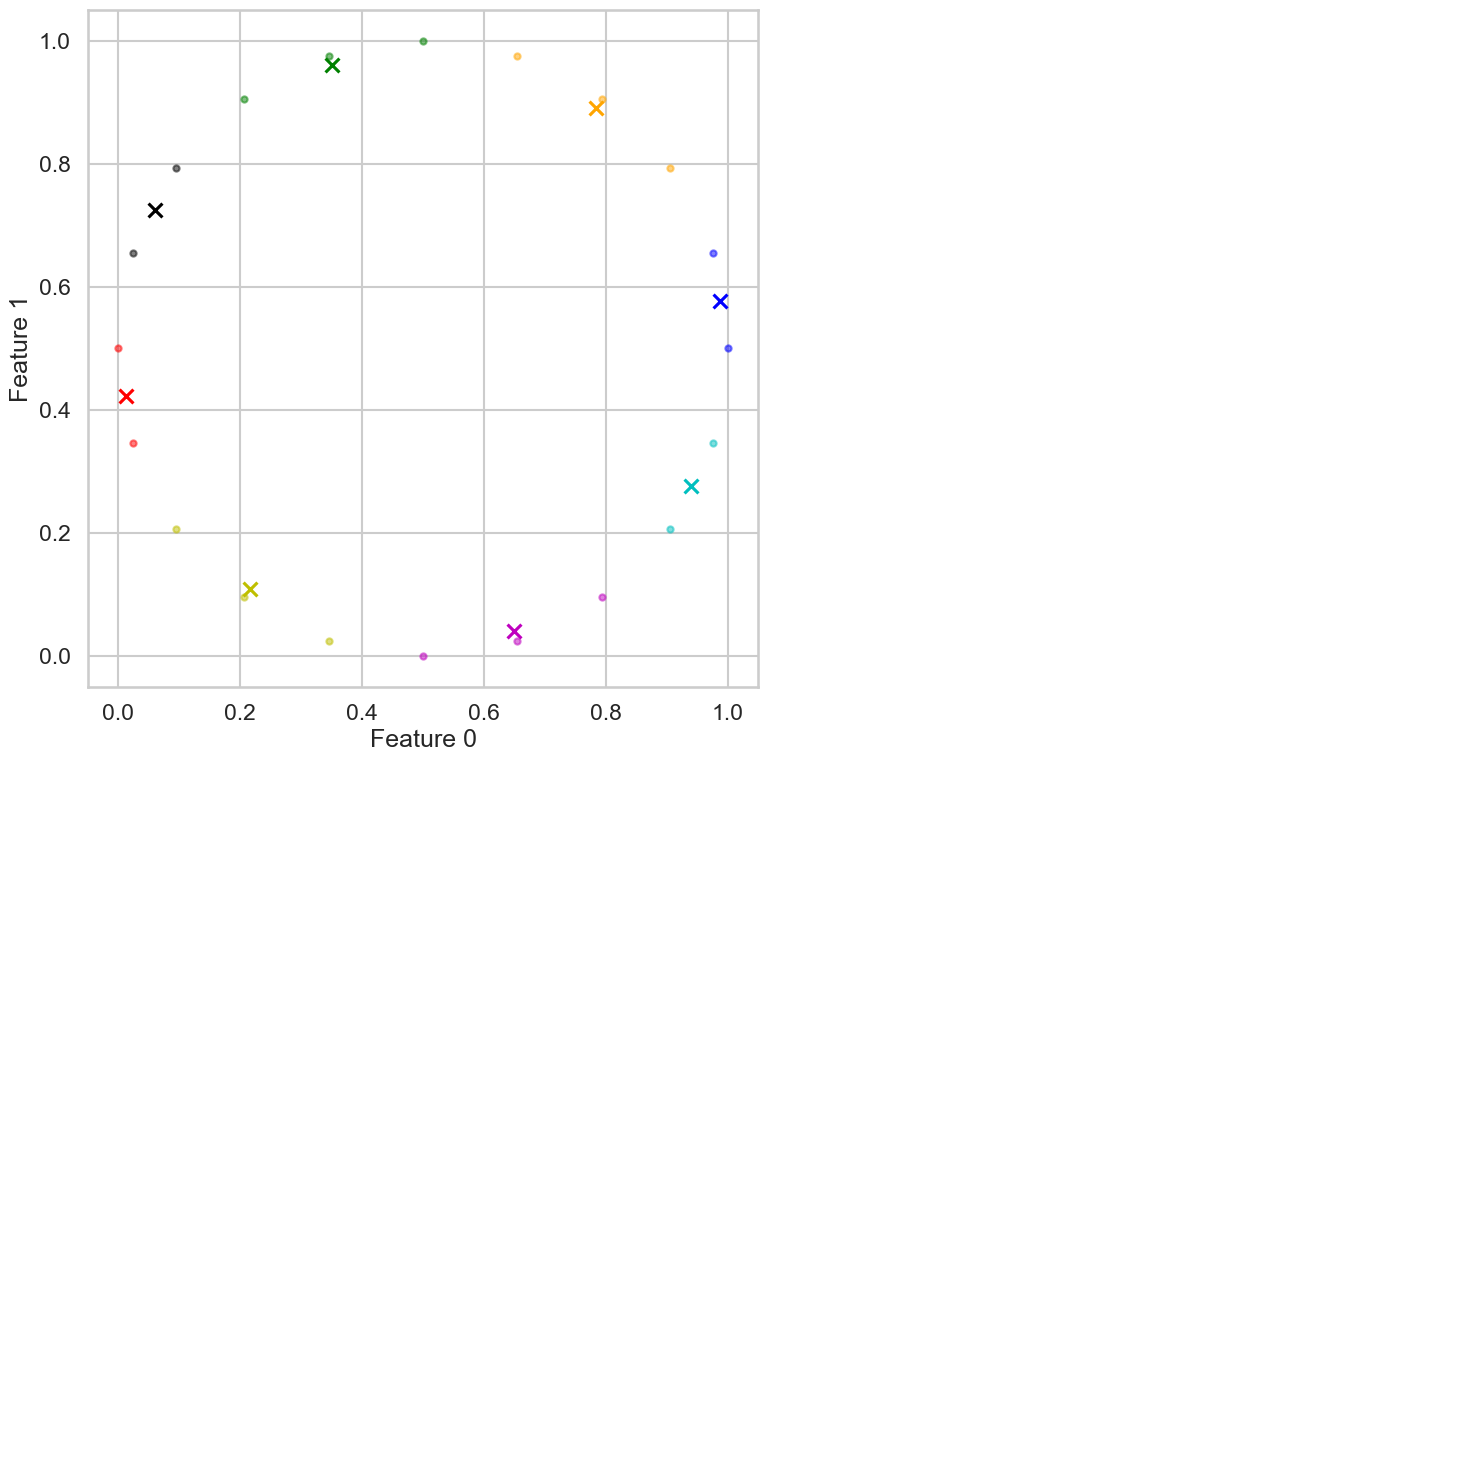

<Figure size 800x800 with 0 Axes>

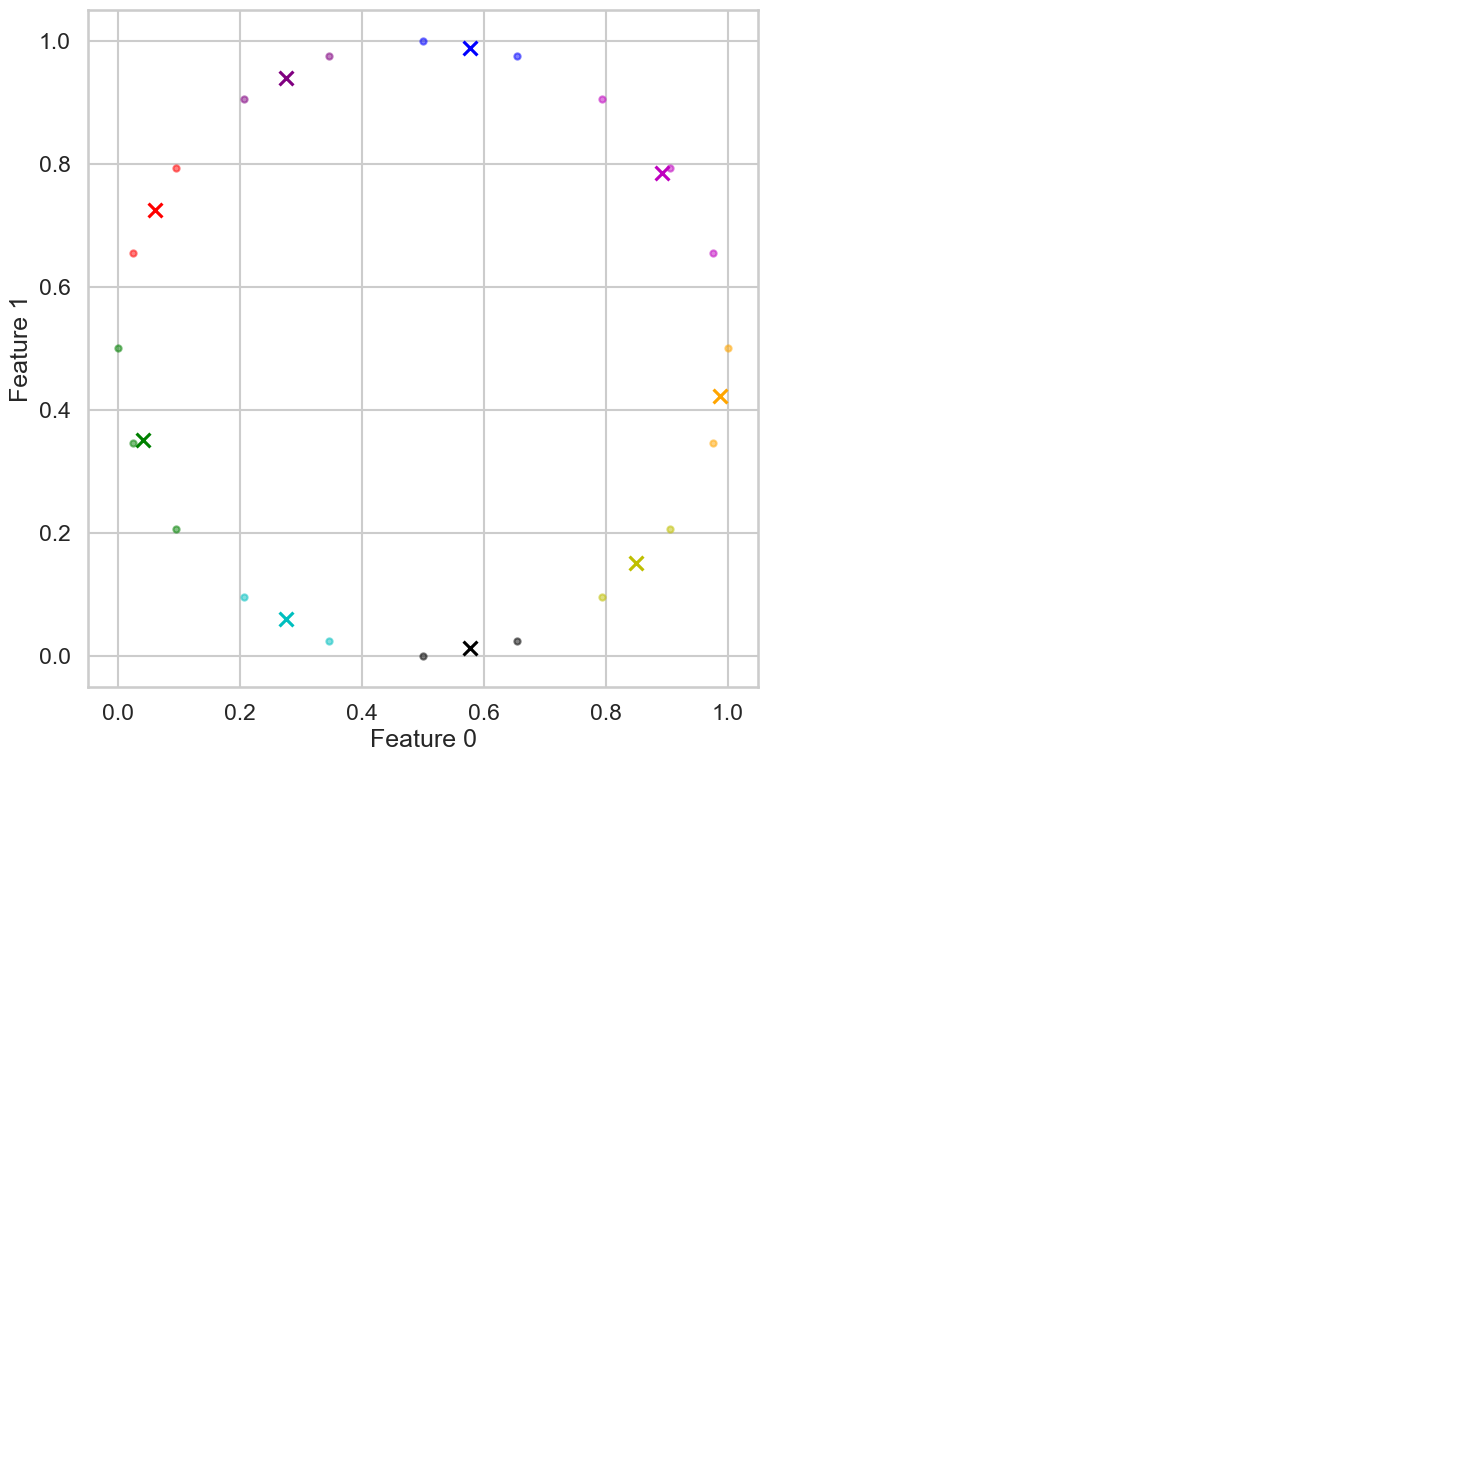

In [252]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()


scaler = MinMaxScaler()
X1 = scaler.fit_transform(X)
X1 = pd.DataFrame(X1)

# Set parameters

# Set parameters
metric = []
diff_k = []
for i in range(2,10):
    num_clusters = i
    distance_type = 'pearson'

    # Perform KMeans clustering
    final_cluster_distance, cluster_metric = GUC_Kmean(X1, num_clusters, distance_type)
    metric.append(cluster_metric)
    diff_k.append(i)
    # Create a KMeans object for visualization purposes
    km = KMeans(n_clusters=num_clusters)
    km.labels_ = np.argmin(final_cluster_distance, axis=1)
    km.cluster_centers_ = np.array([X1[km.labels_ == i].mean(axis=0) for i in range(num_clusters)])
    
    # Visualize clusters
    plt.figure()
    display_cluster(X1.values, km=km, num_clusters=num_clusters)

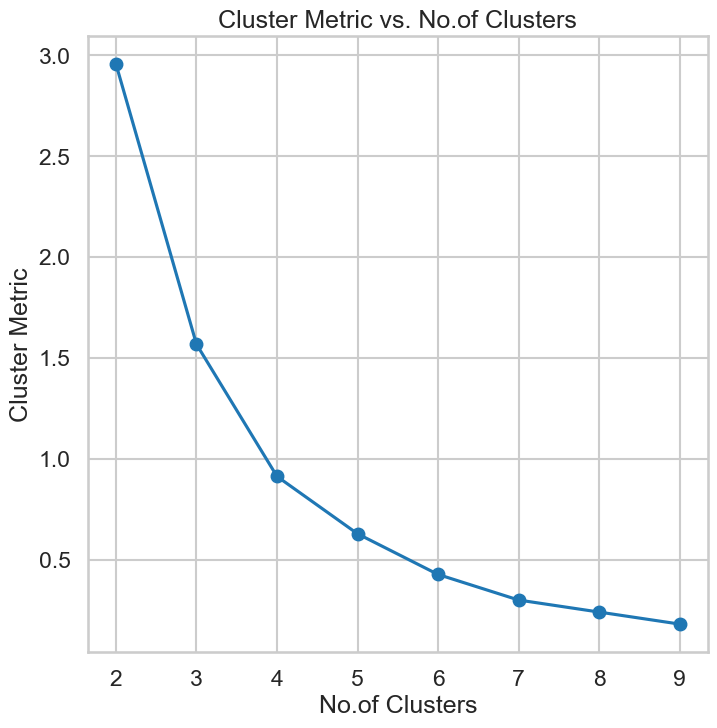

In [253]:

# Plot the graph
plt.plot(diff_k, metric, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('No.of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. No.of Clusters')

# Show the plot
plt.show()


### Example 2

<Figure size 800x800 with 0 Axes>

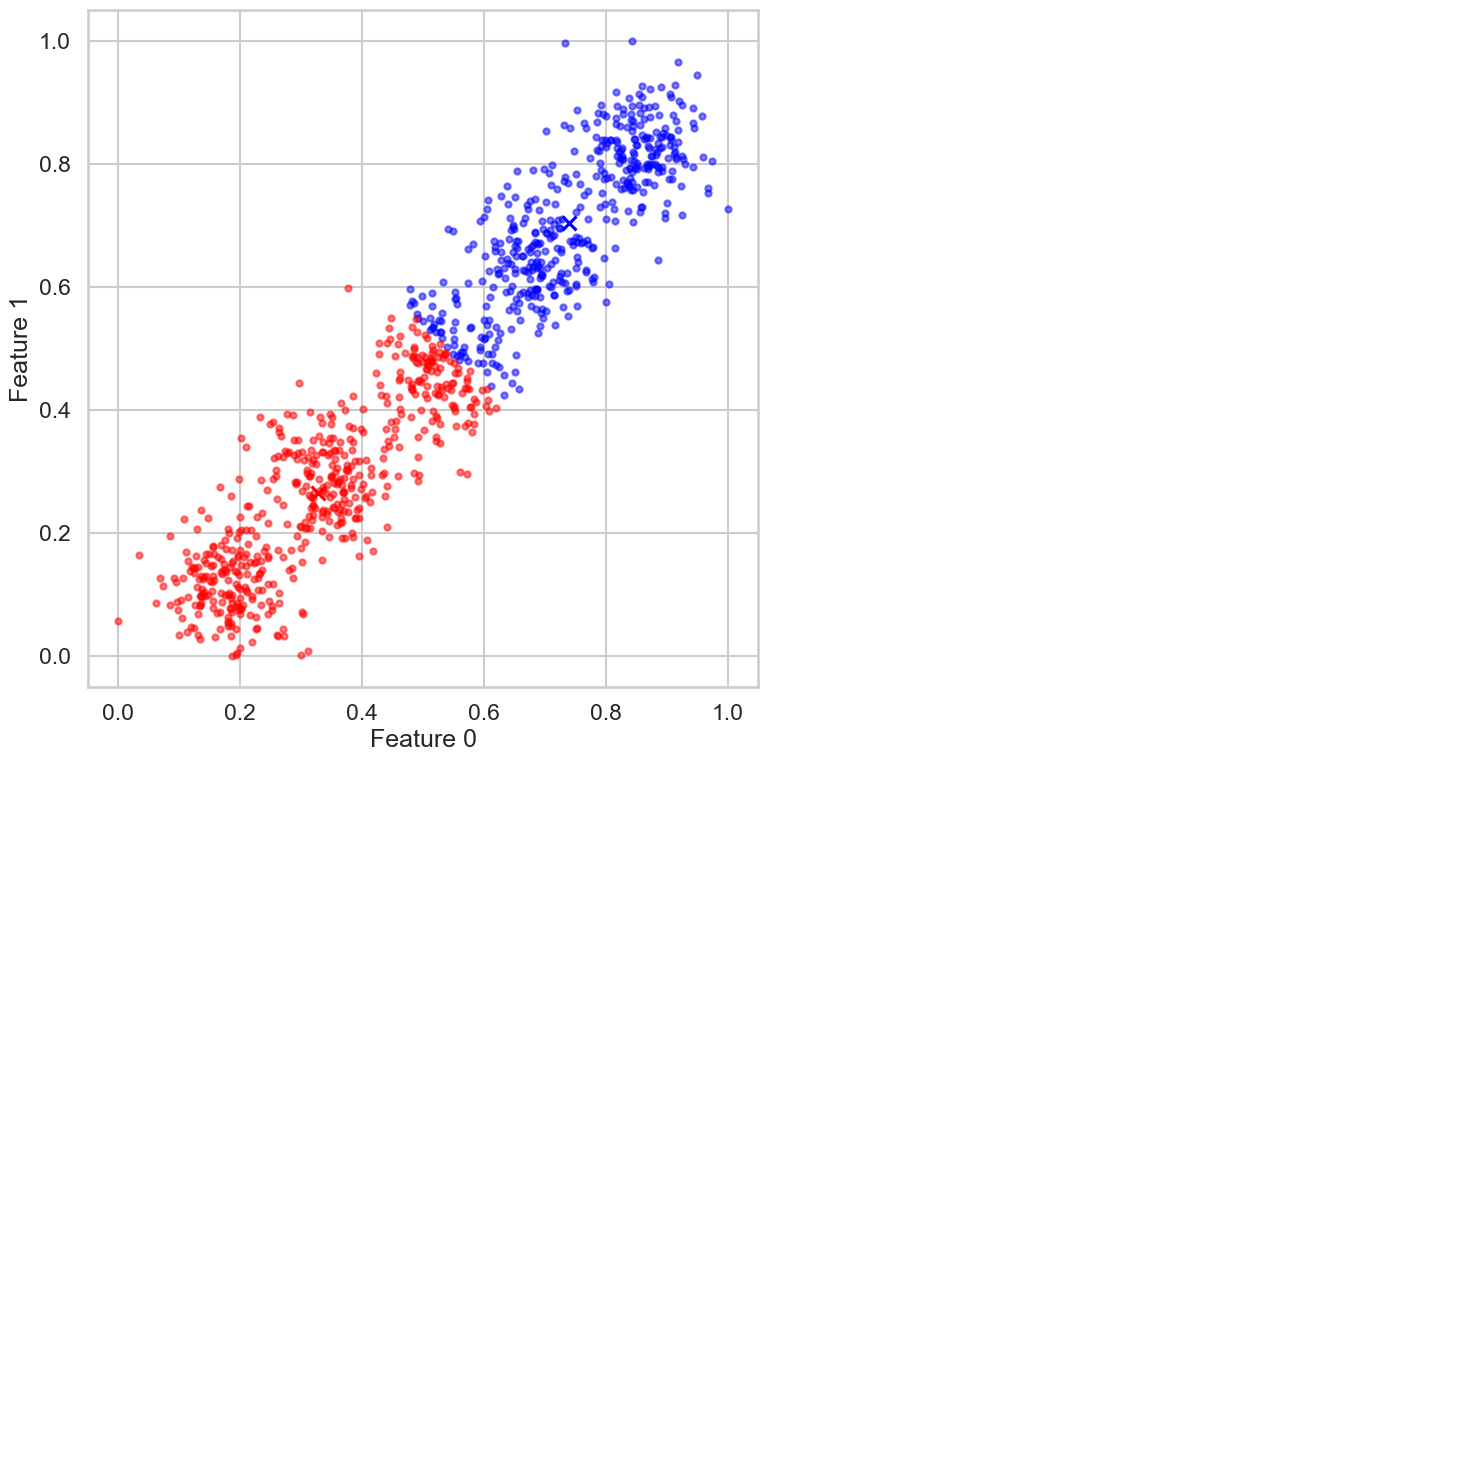

<Figure size 800x800 with 0 Axes>

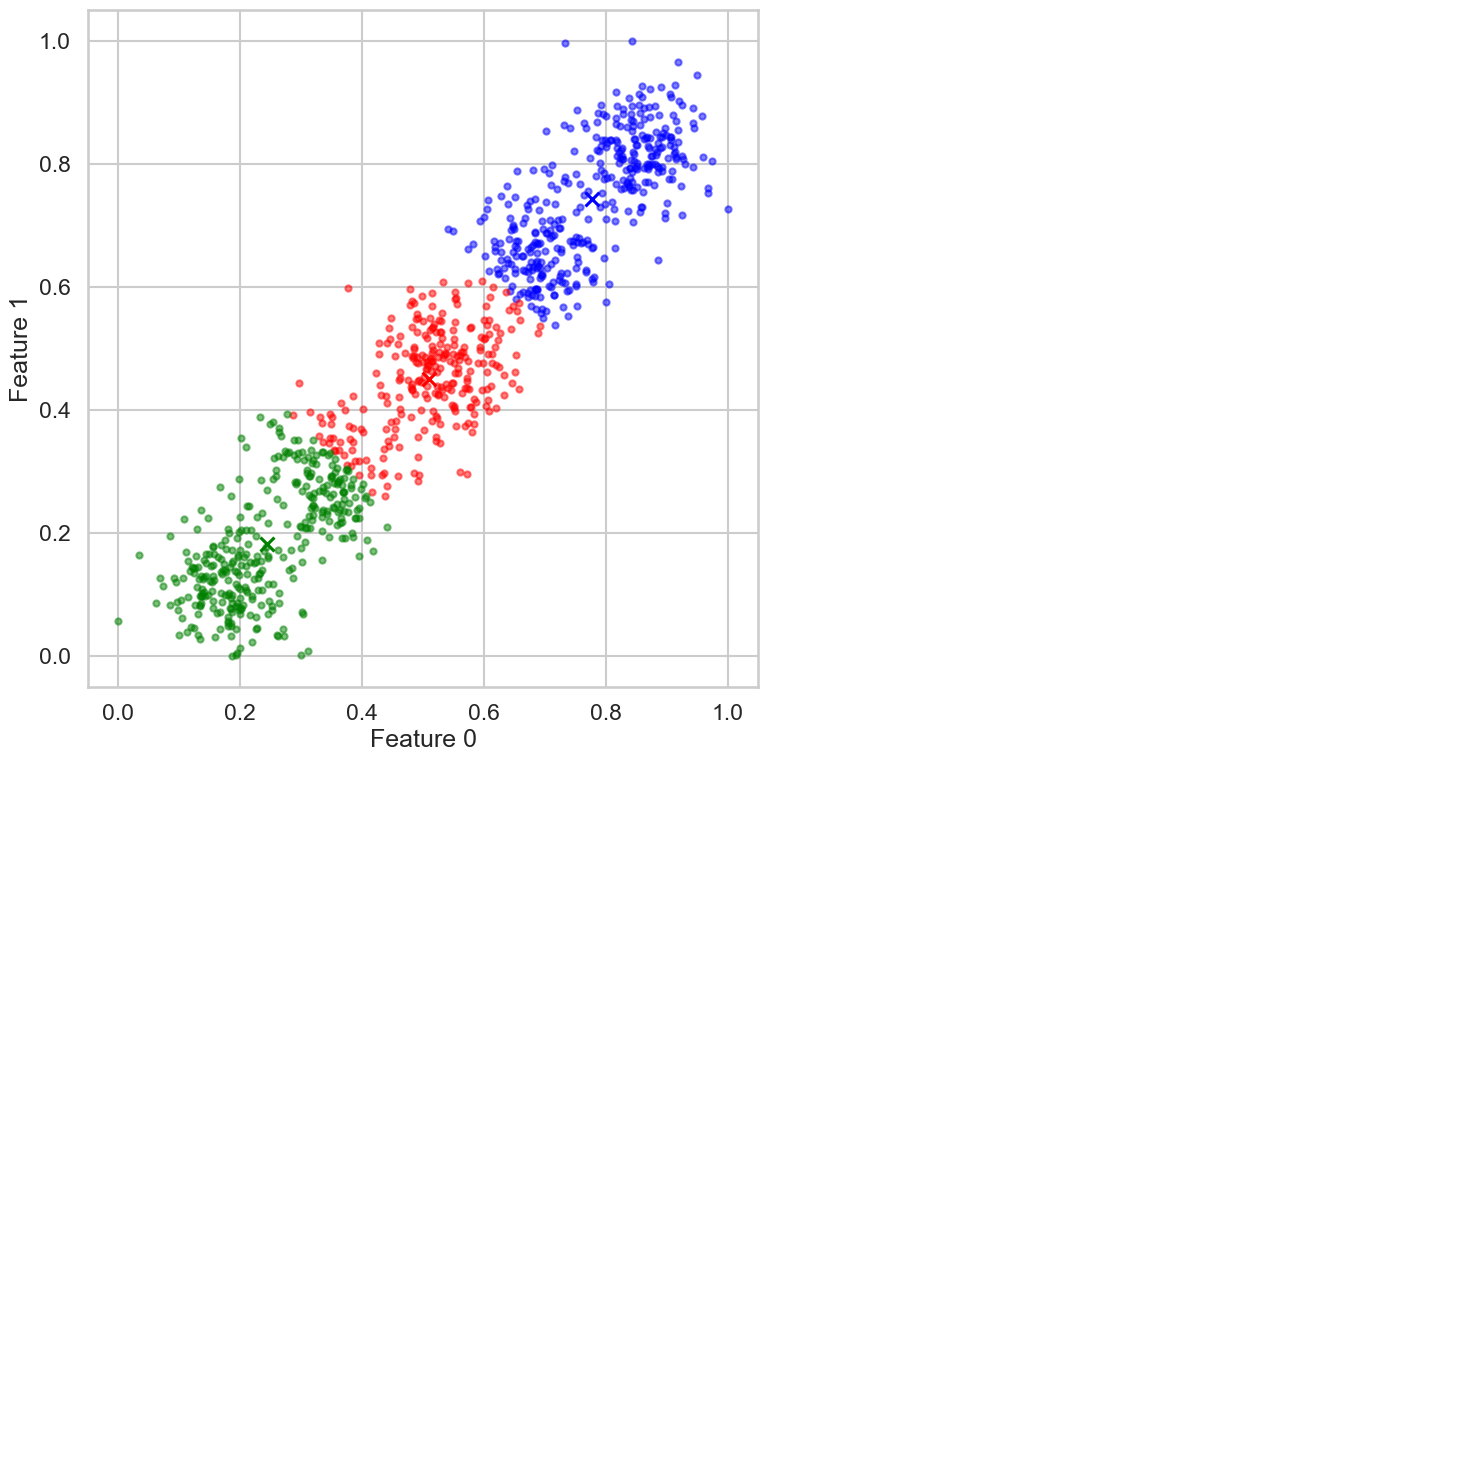

<Figure size 800x800 with 0 Axes>

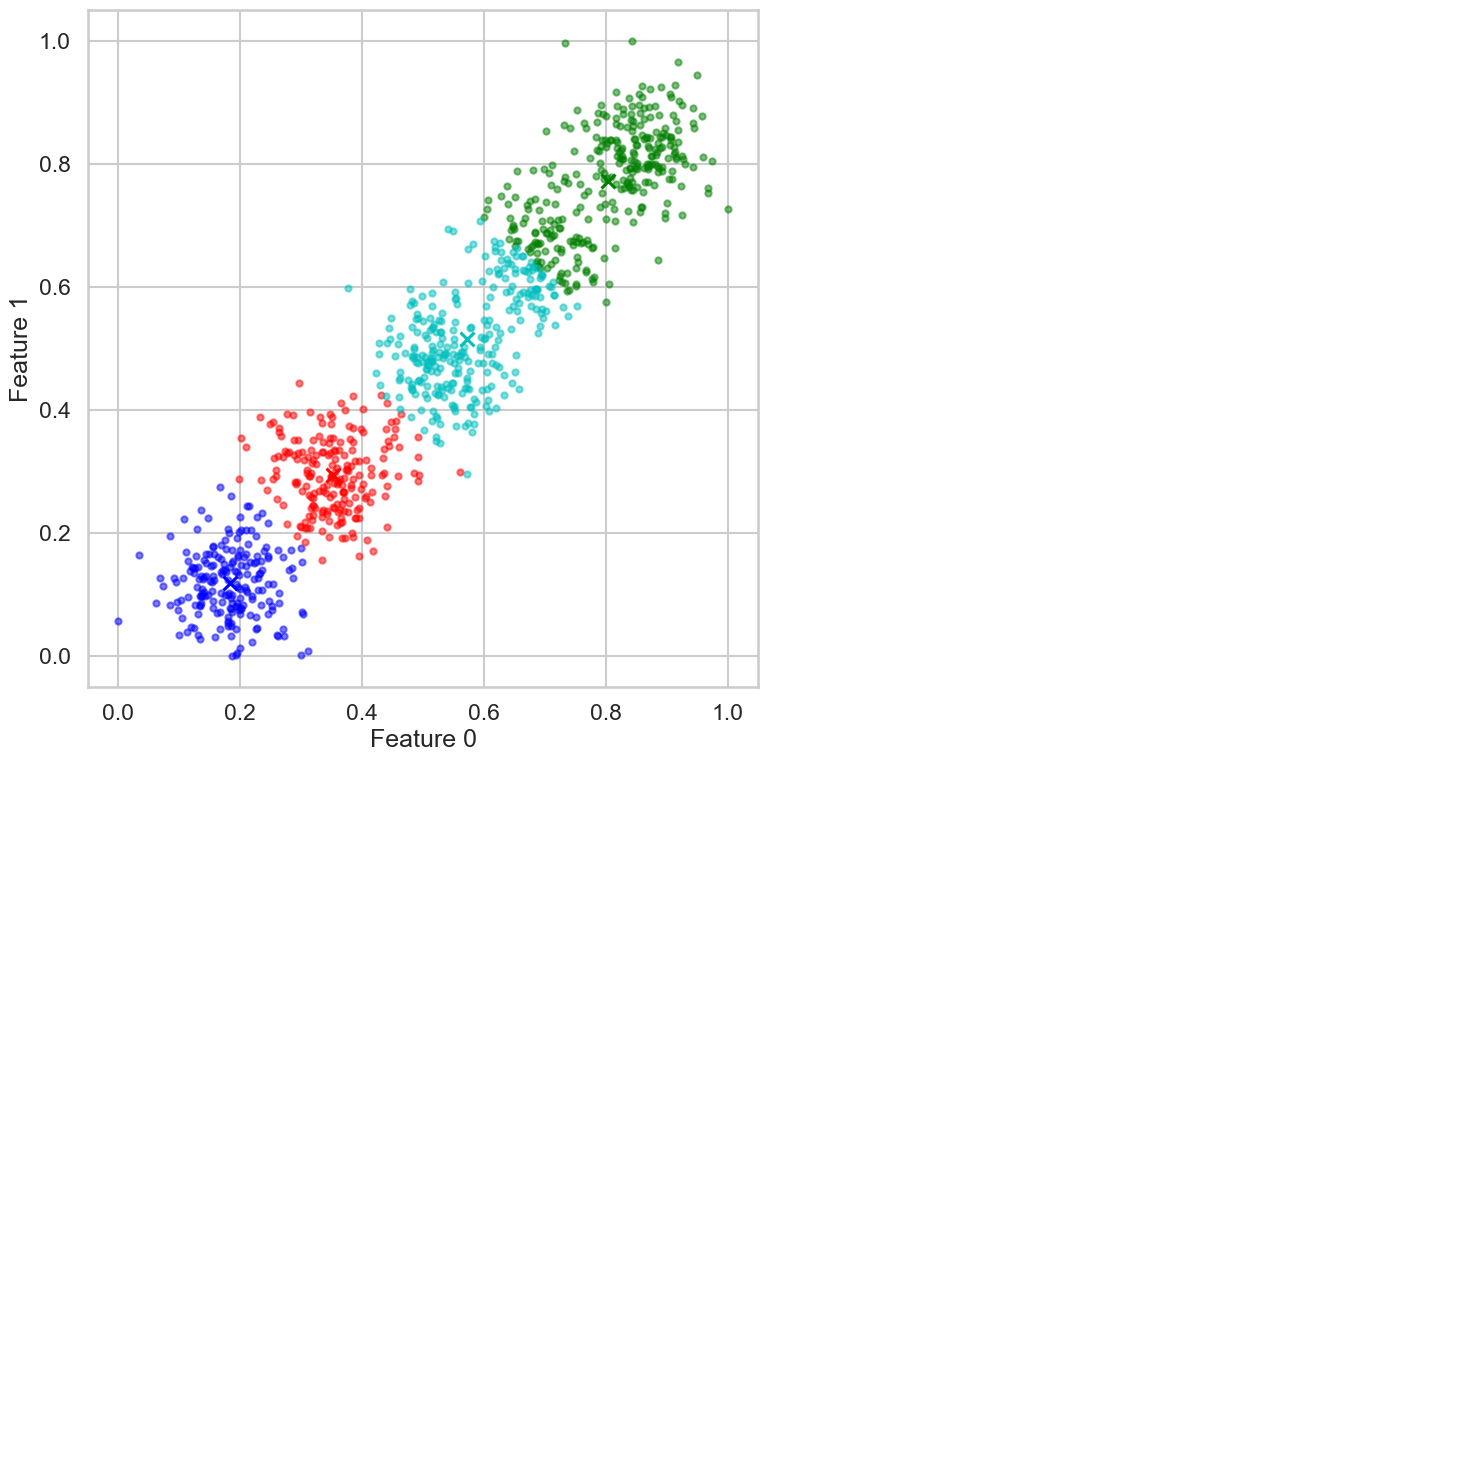

<Figure size 800x800 with 0 Axes>

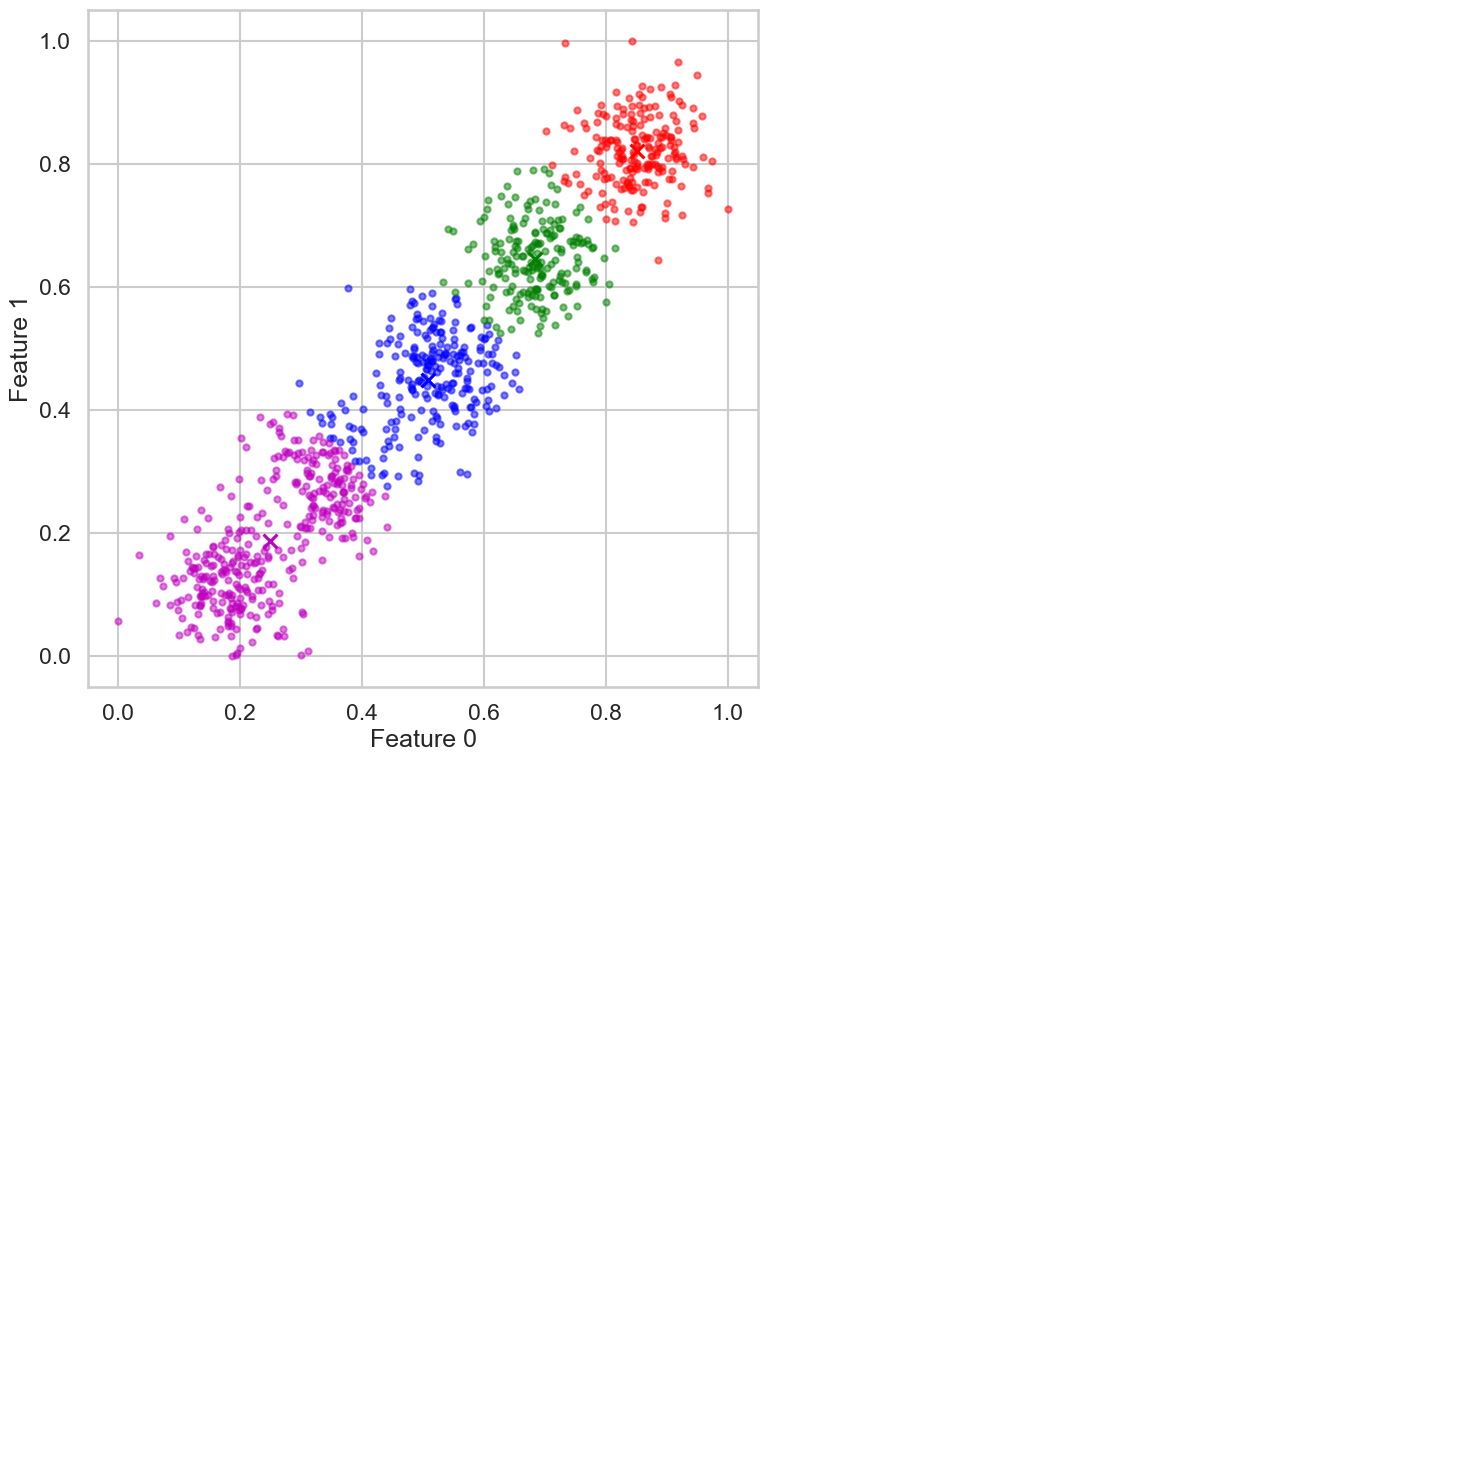

<Figure size 800x800 with 0 Axes>

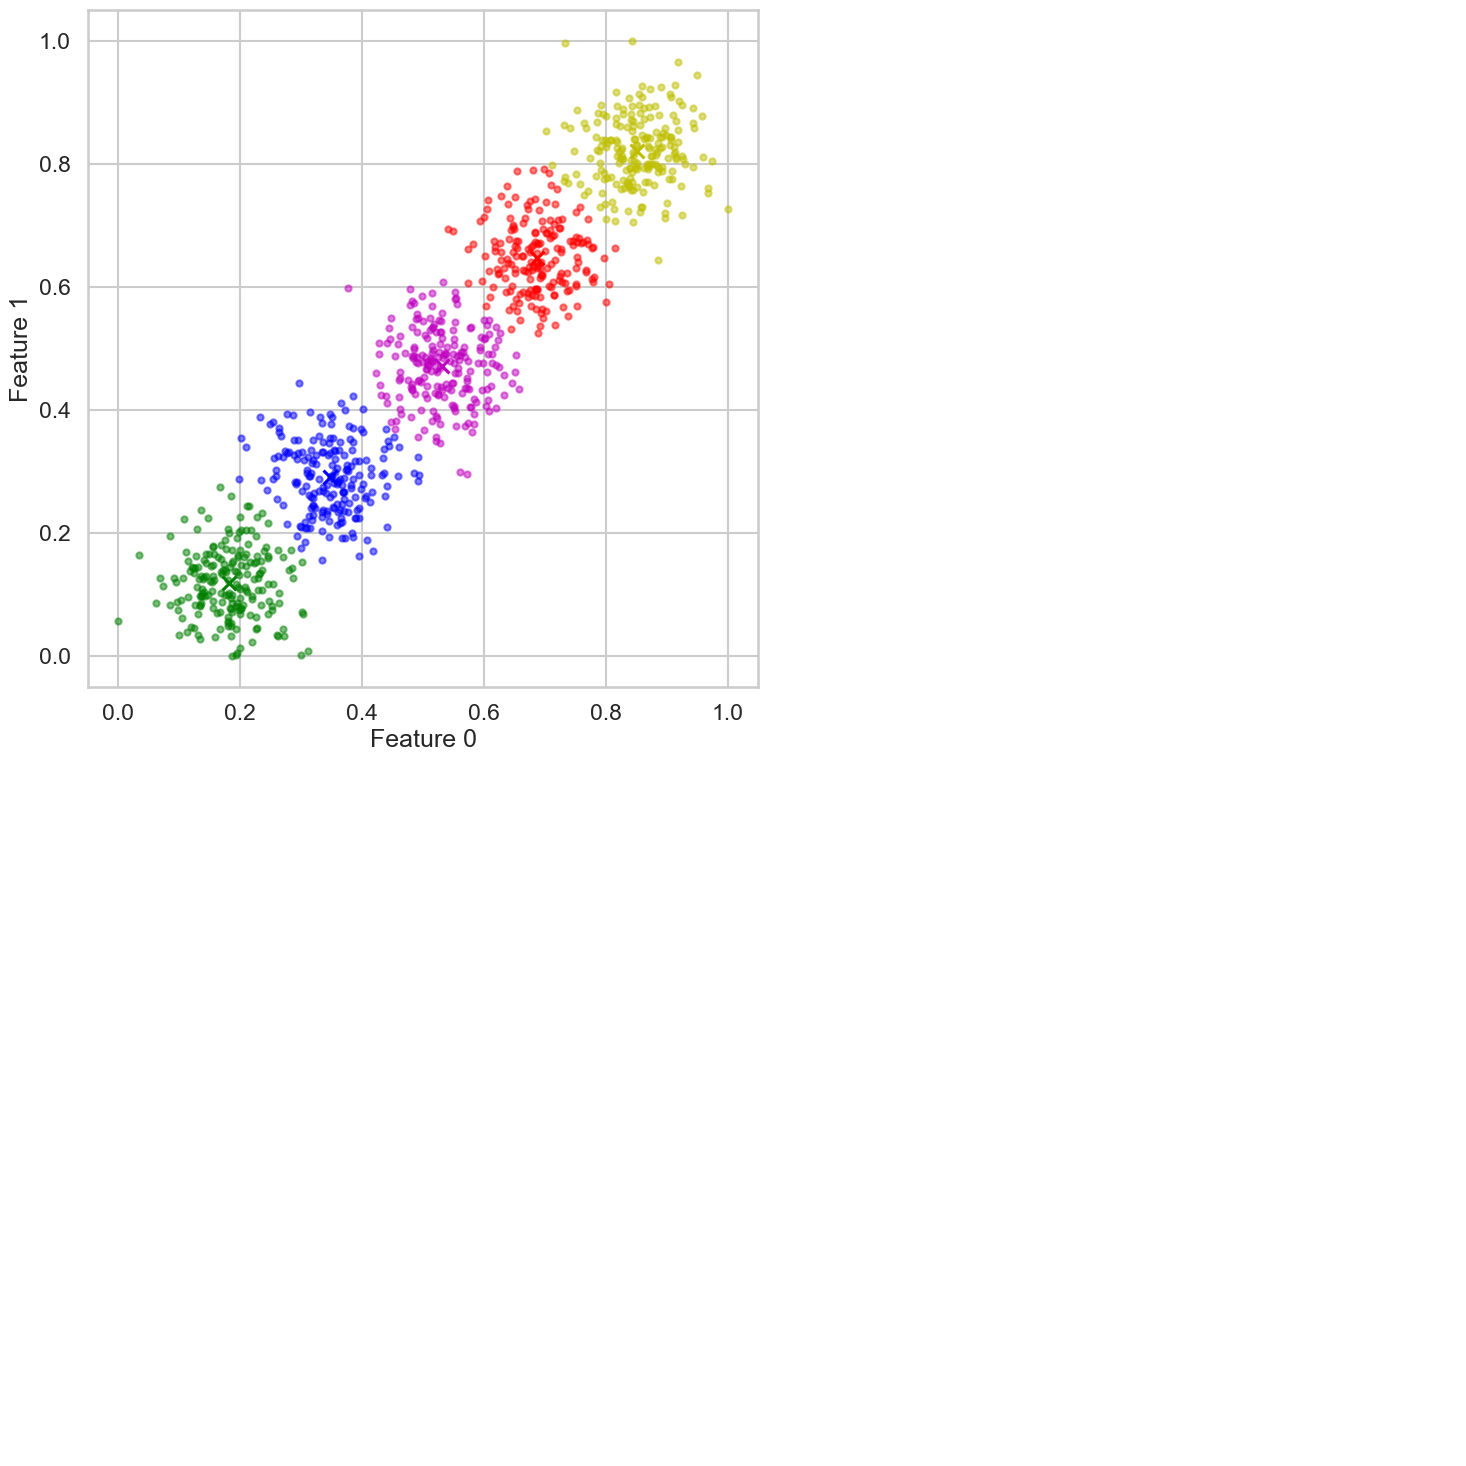

<Figure size 800x800 with 0 Axes>

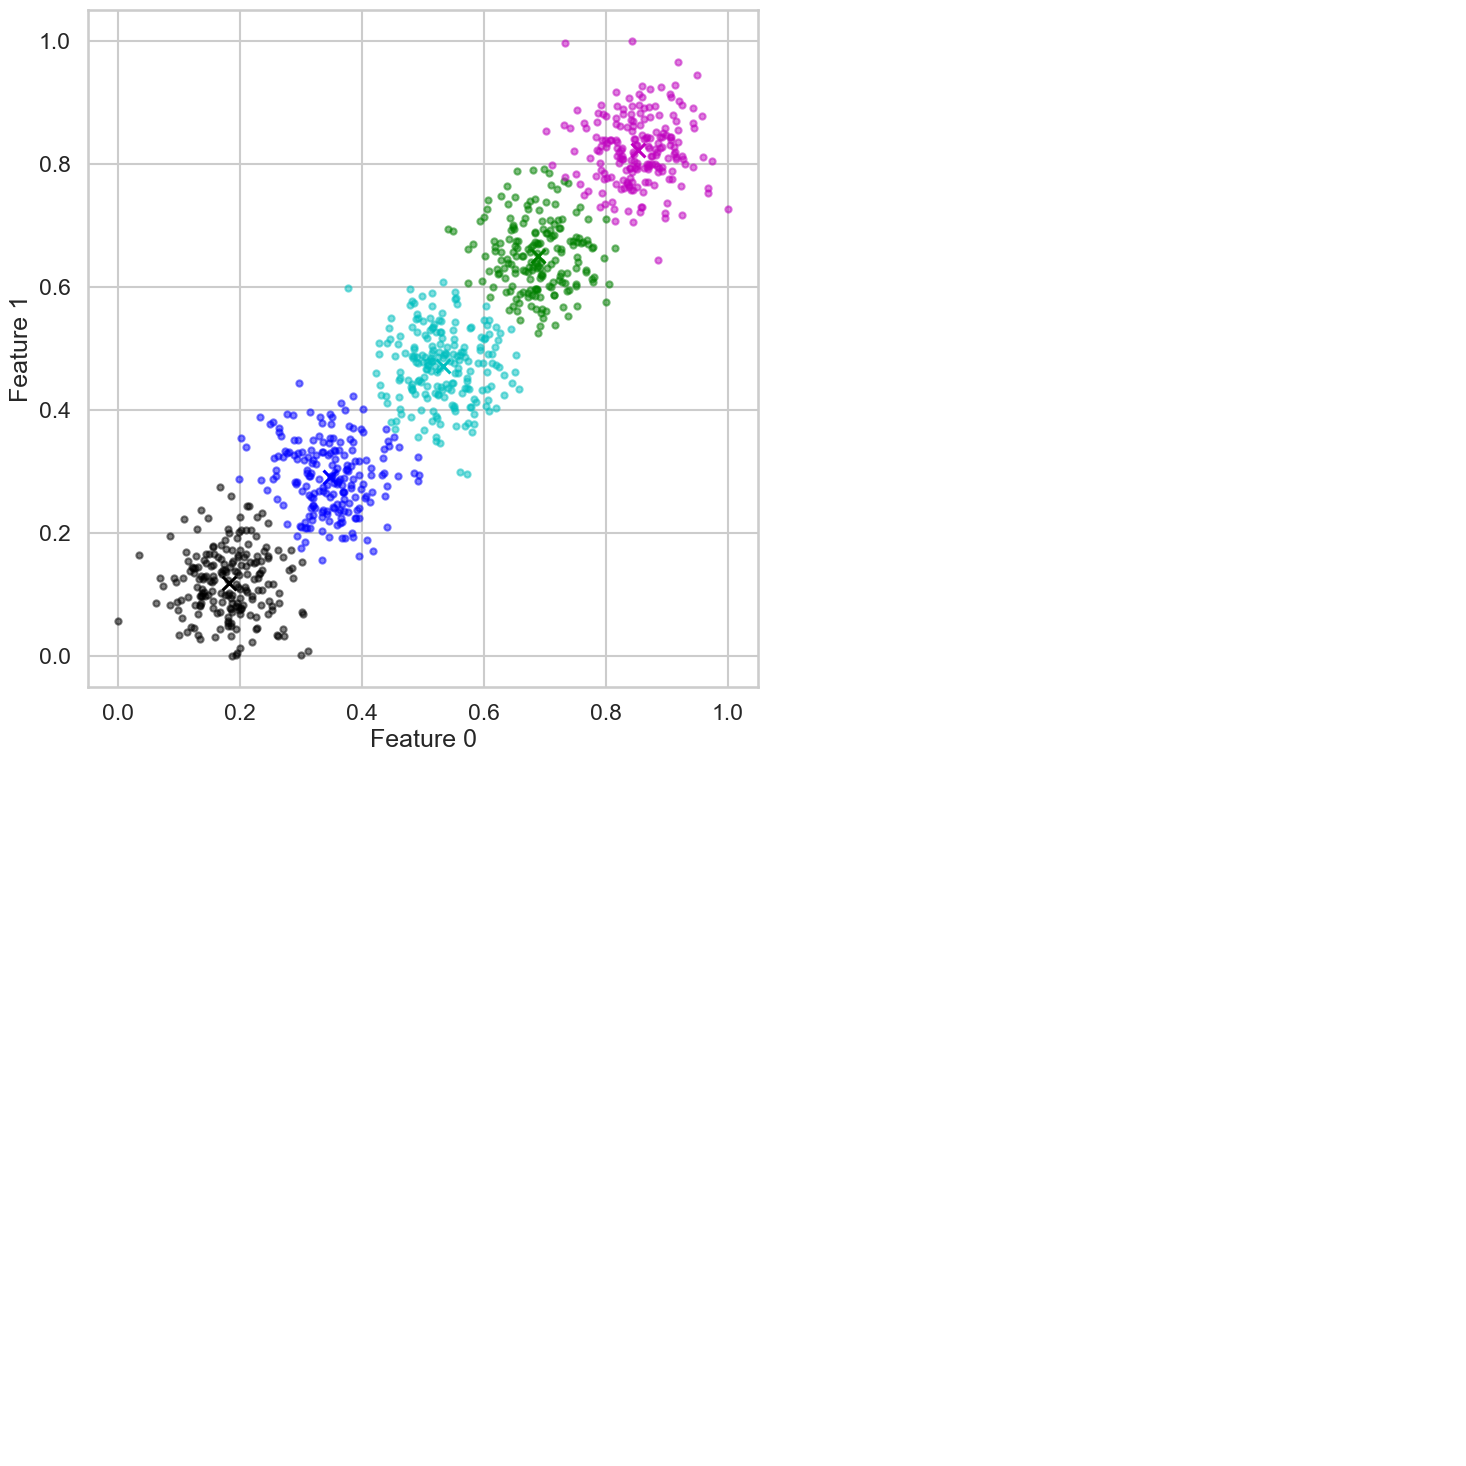

<Figure size 800x800 with 0 Axes>

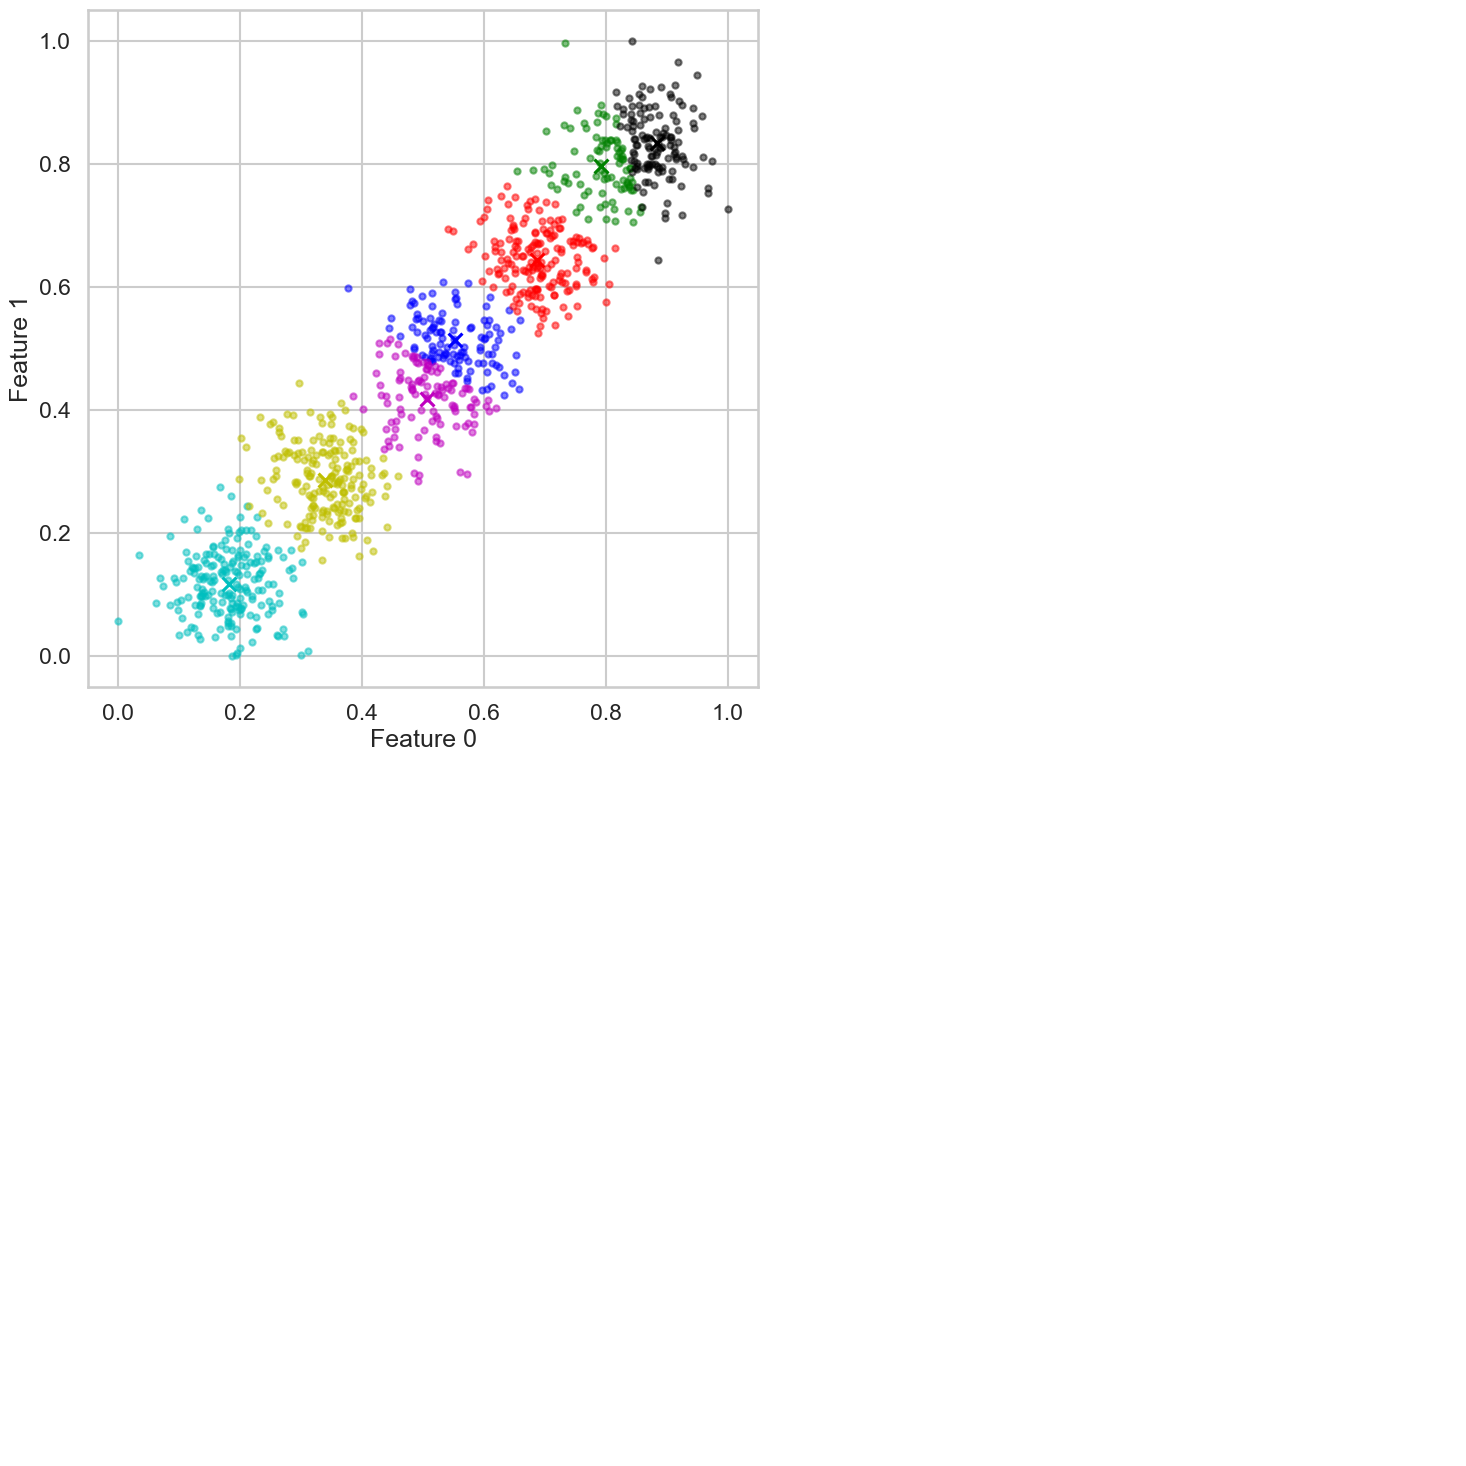

<Figure size 800x800 with 0 Axes>

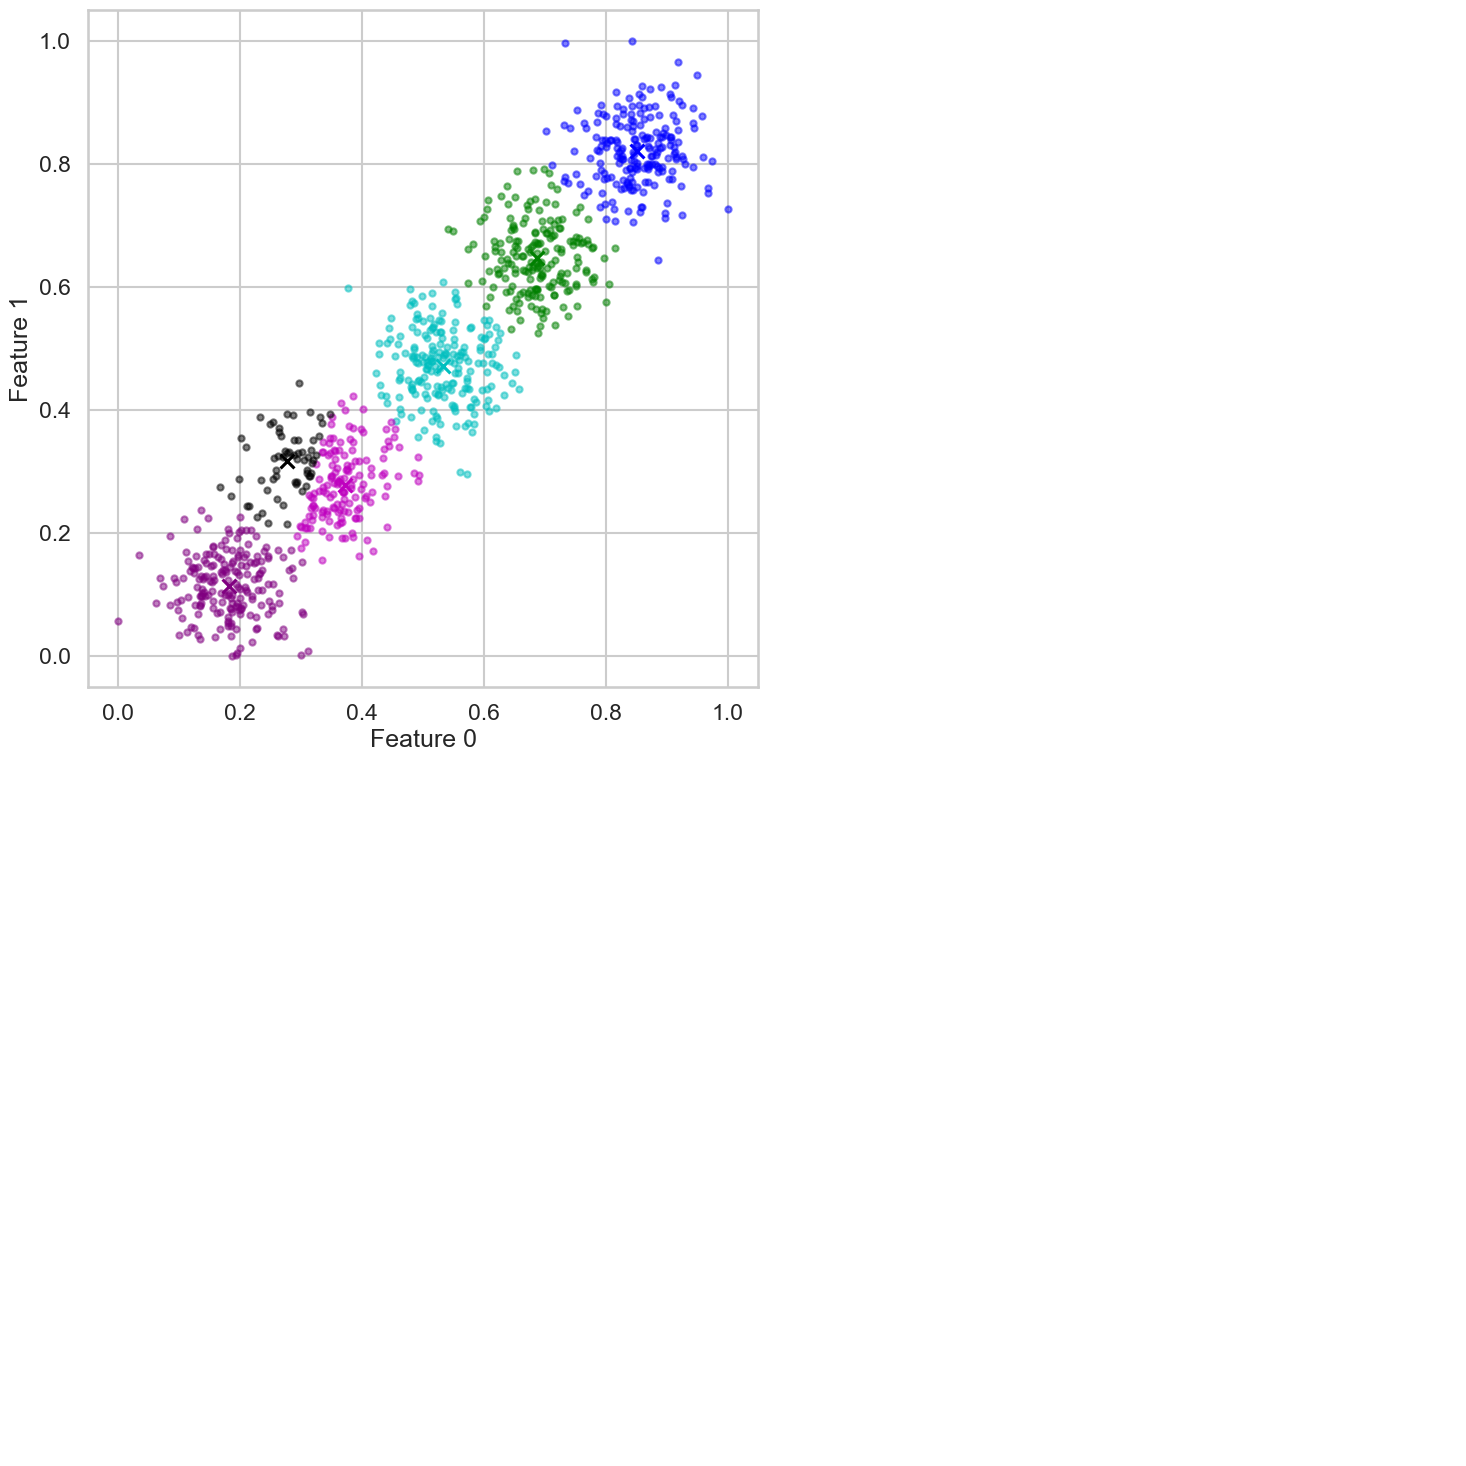

In [255]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

scaler = MinMaxScaler()
X1 = scaler.fit_transform(X)
X1 = pd.DataFrame(X1)

# Set parameters
metric = []
diff_k = []
for i in range(2,10):
    num_clusters = i
    distance_type = 'euclidean'

    # Perform KMeans clustering
    final_cluster_distance, cluster_metric = GUC_Kmean(X1, num_clusters, distance_type)
    metric.append(cluster_metric)
    diff_k.append(i)
    # Create a KMeans object for visualization purposes
    km = KMeans(n_clusters=num_clusters)
    km.labels_ = np.argmin(final_cluster_distance, axis=1)
    km.cluster_centers_ = np.array([X1[km.labels_ == i].mean(axis=0) for i in range(num_clusters)])
    
    # Visualize clusters
    plt.figure()
    display_cluster(X1.values, km=km, num_clusters=num_clusters)

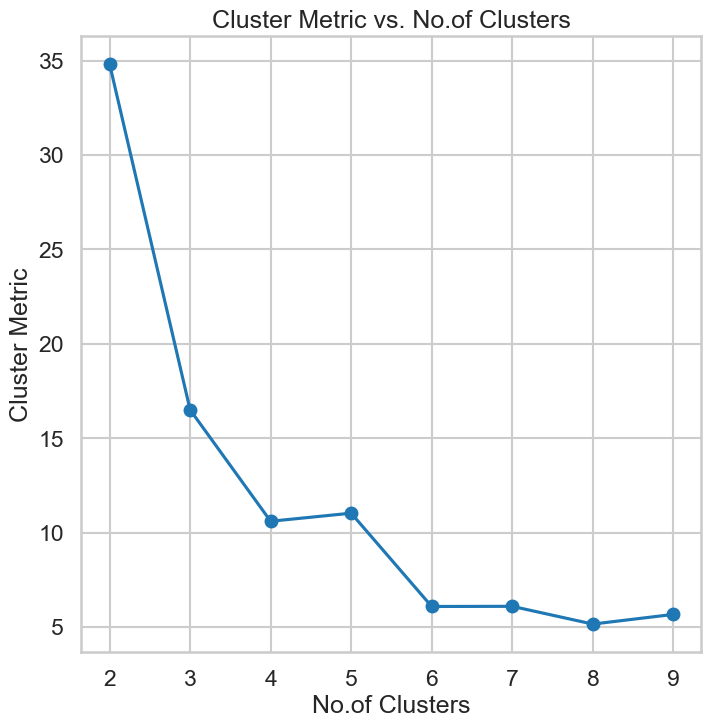

In [256]:
# Plot the graph
plt.plot(diff_k, metric, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('No.of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. No.of Clusters')

# Show the plot
plt.show()

### 2.Pearson

<Figure size 800x800 with 0 Axes>

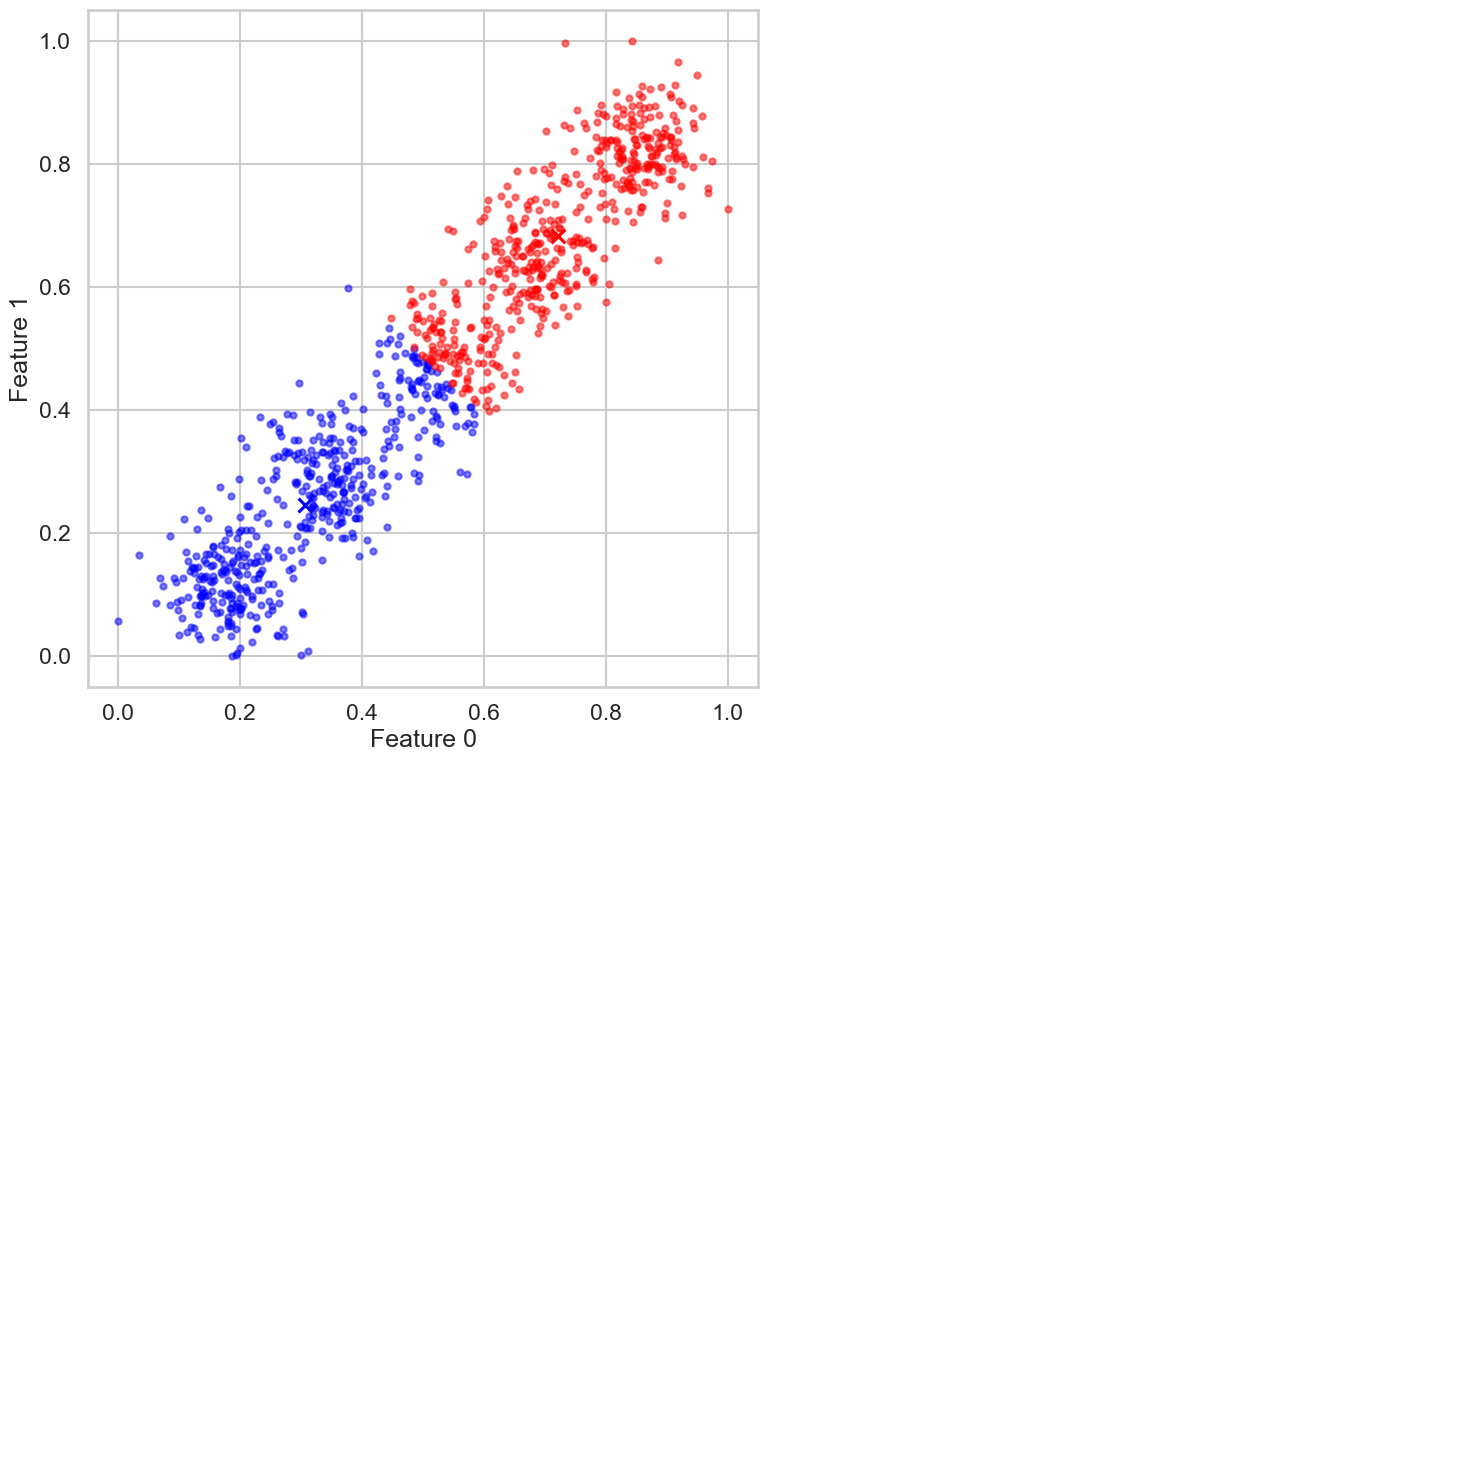

<Figure size 800x800 with 0 Axes>

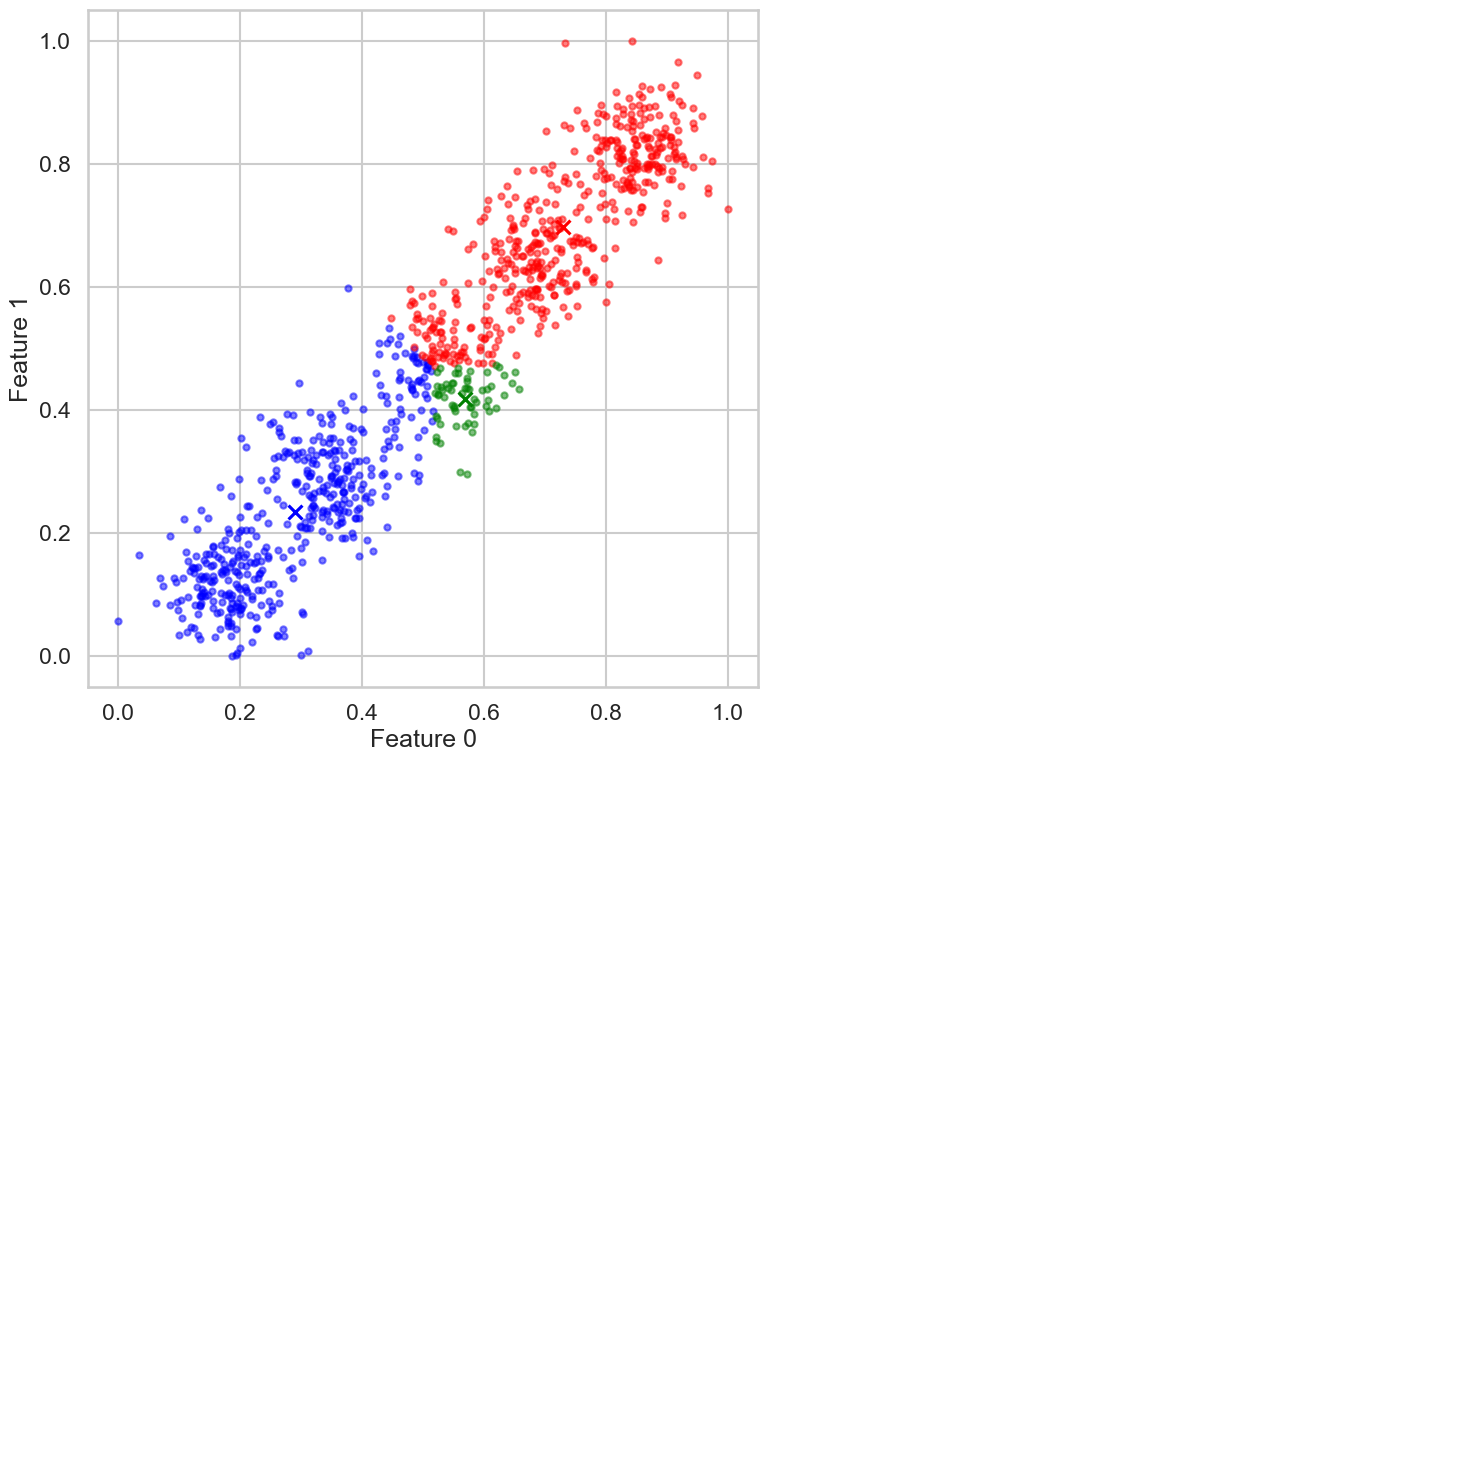

<Figure size 800x800 with 0 Axes>

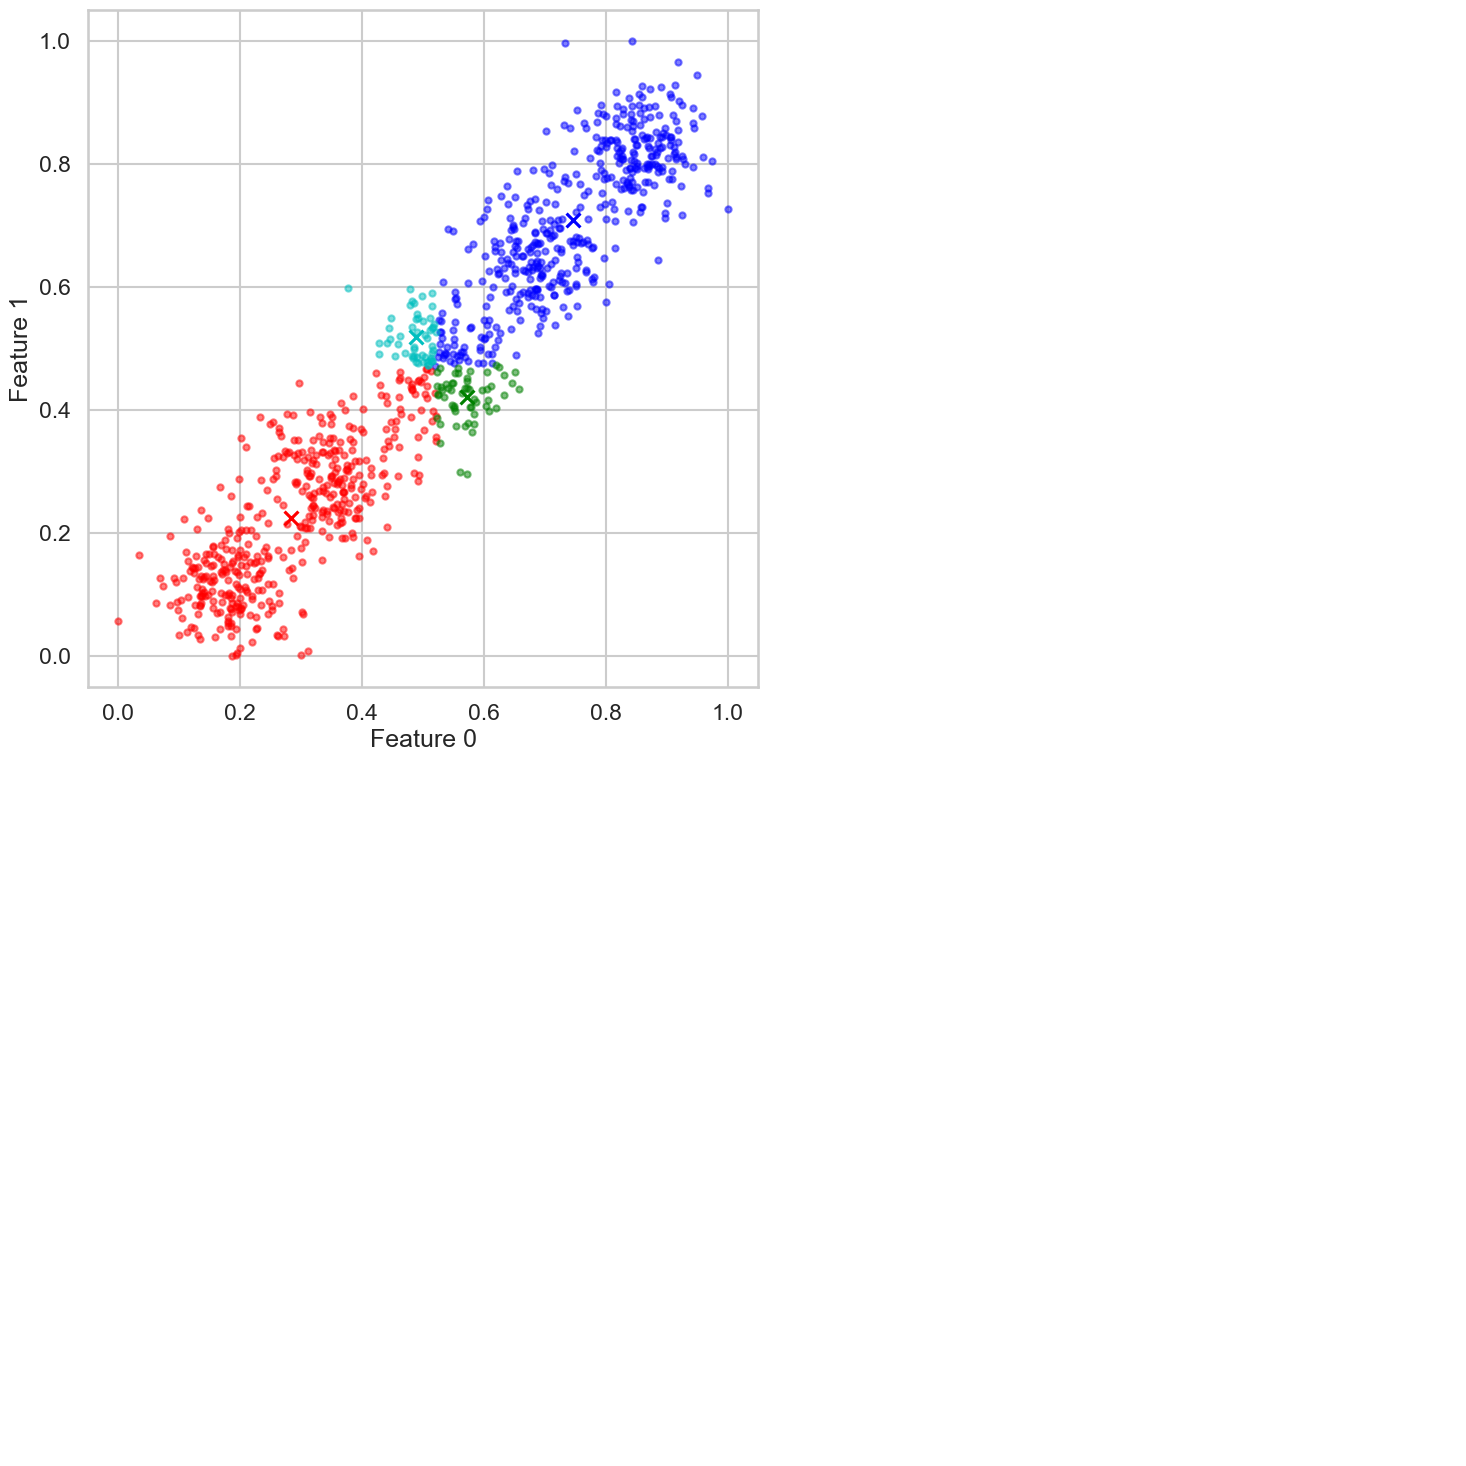

<Figure size 800x800 with 0 Axes>

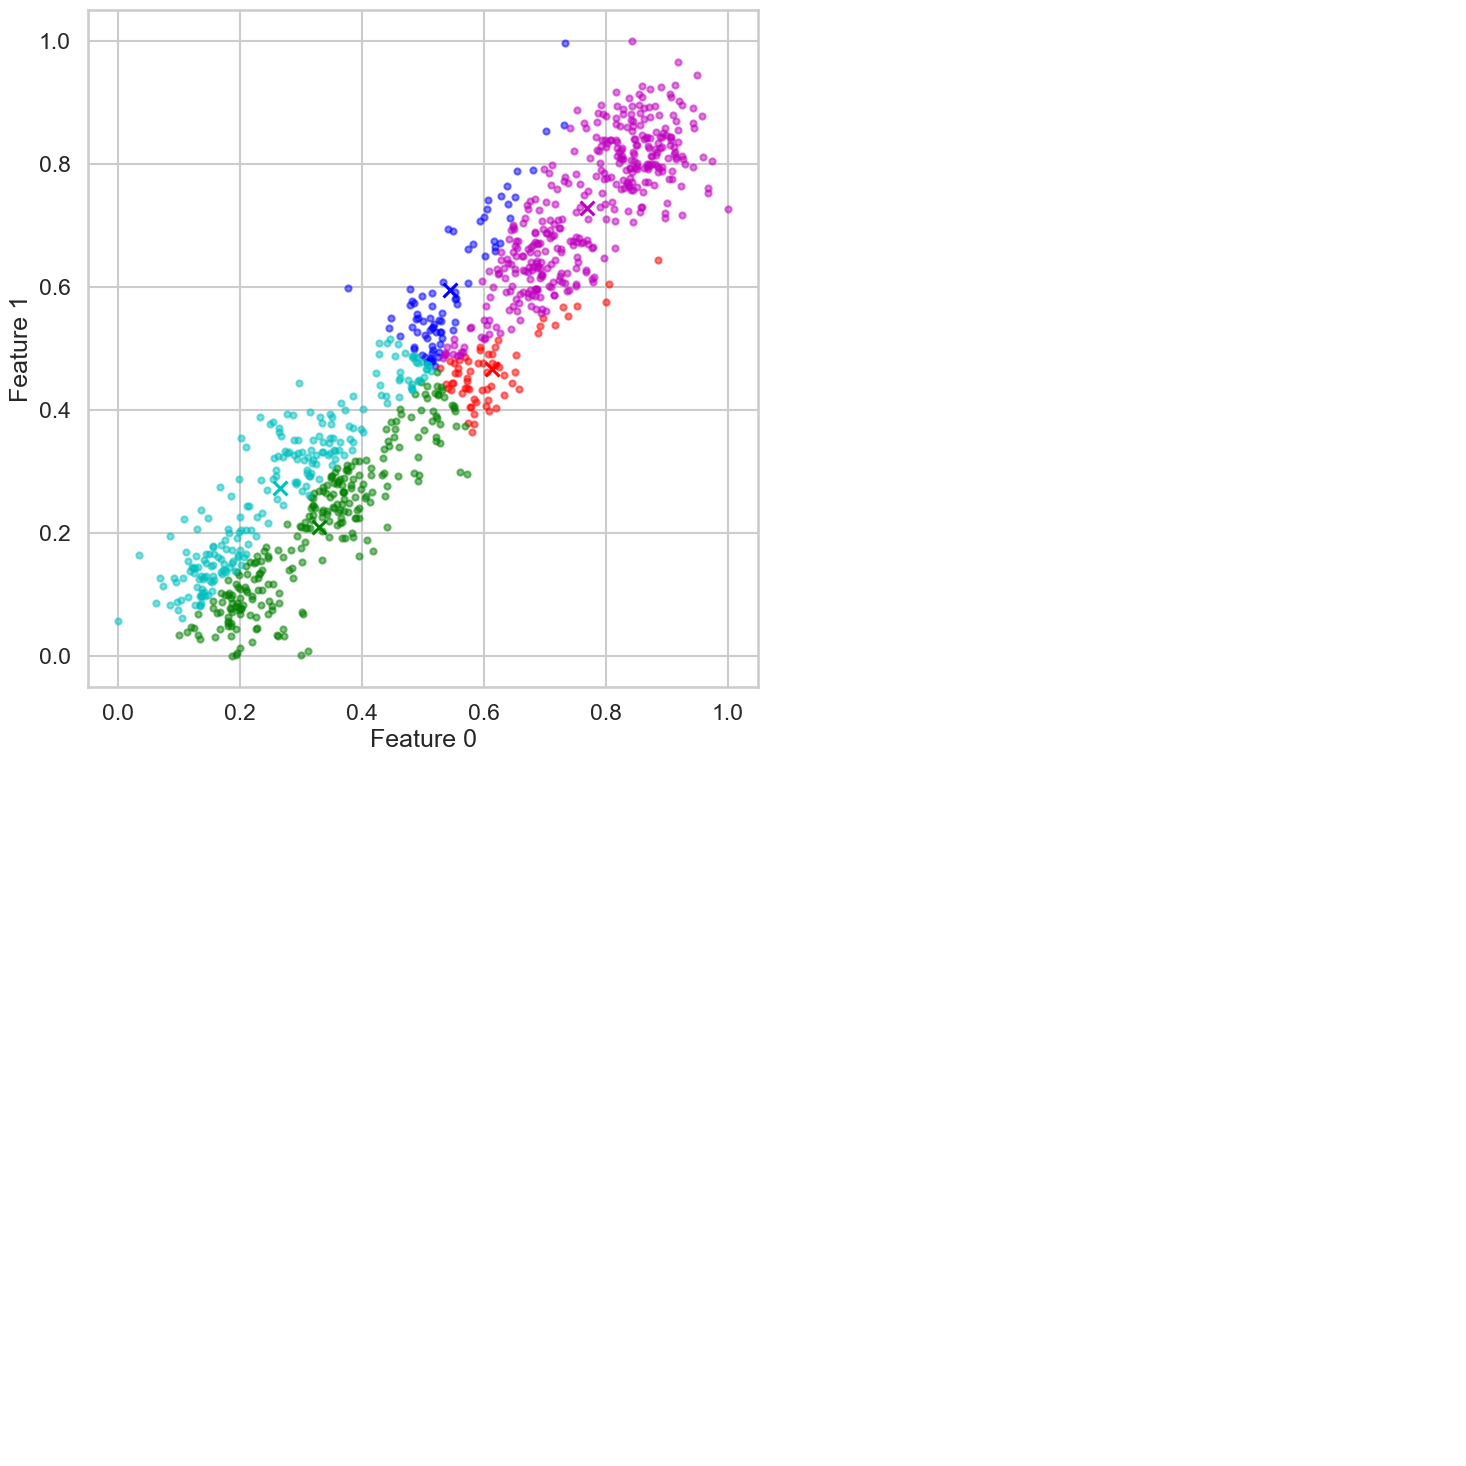

<Figure size 800x800 with 0 Axes>

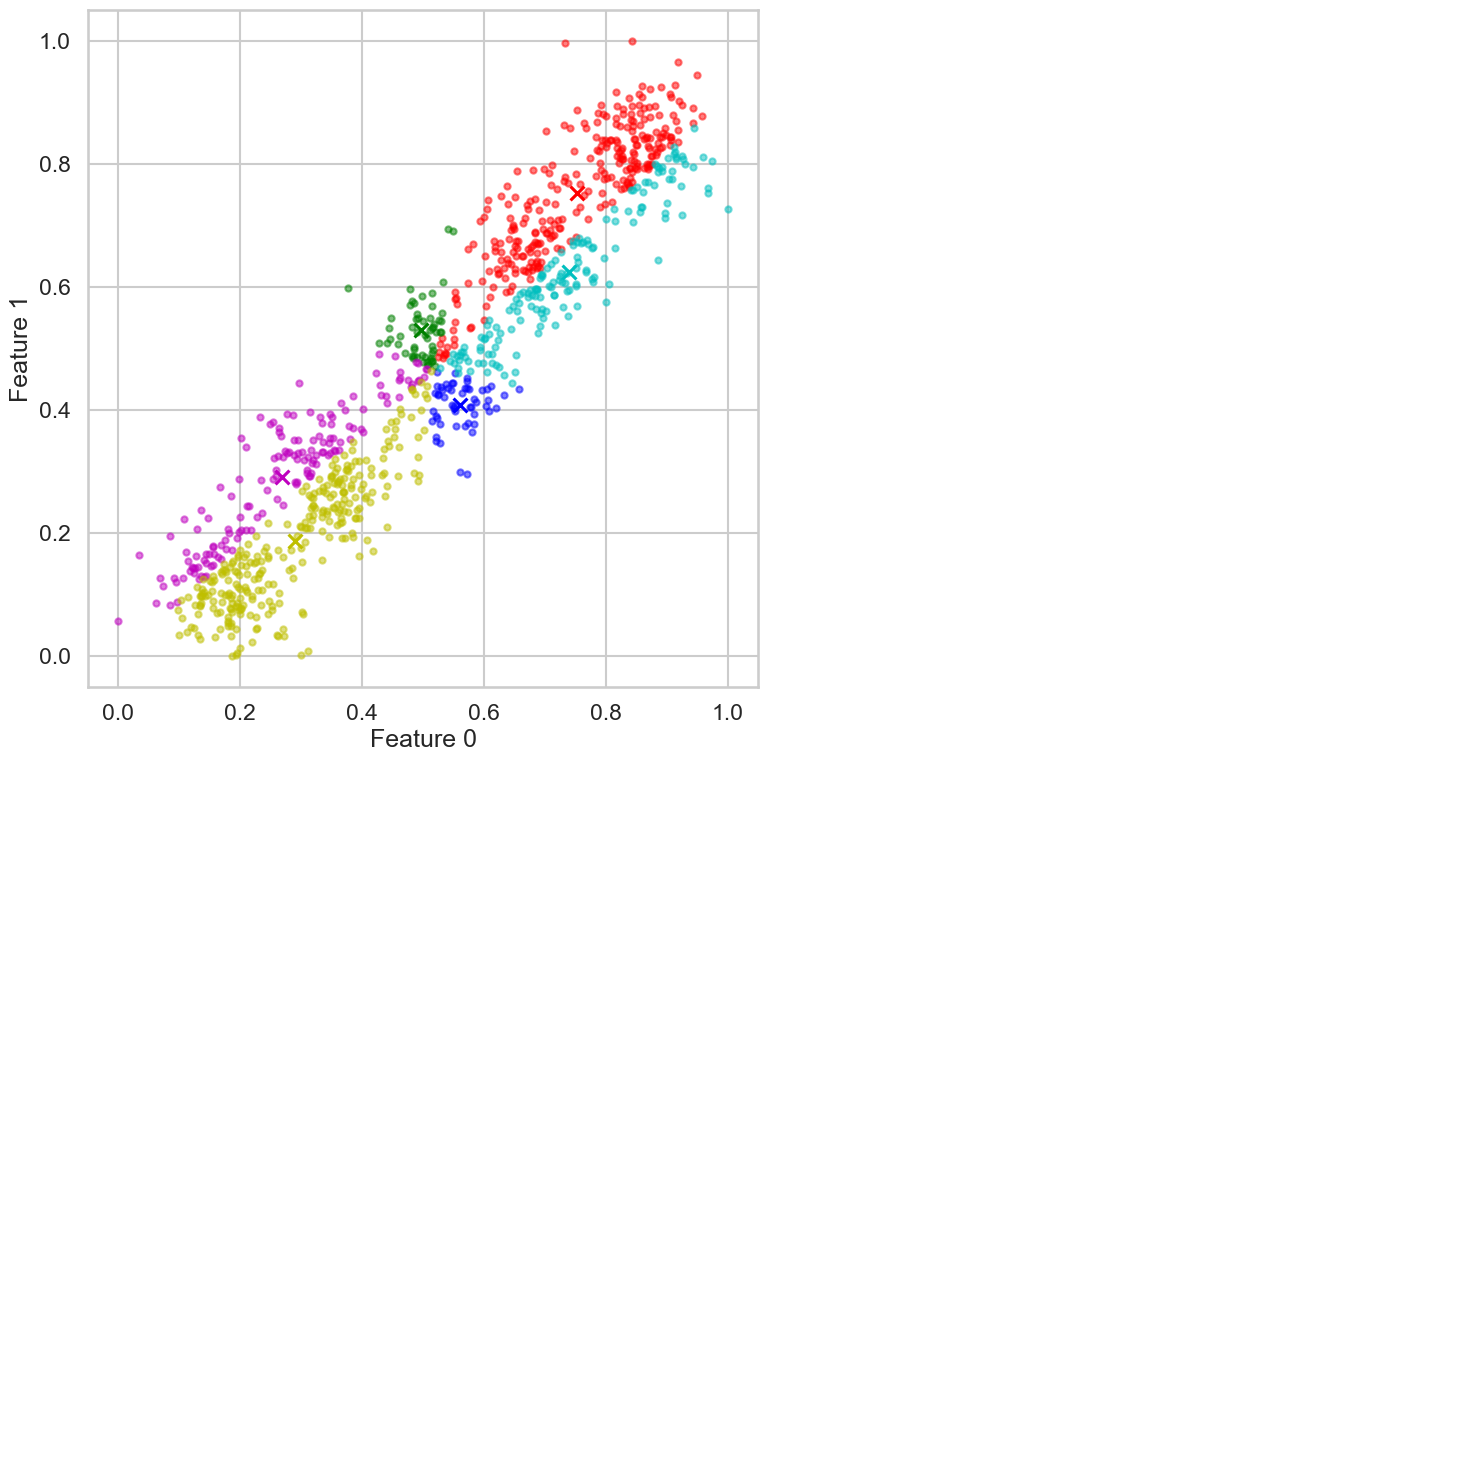

<Figure size 800x800 with 0 Axes>

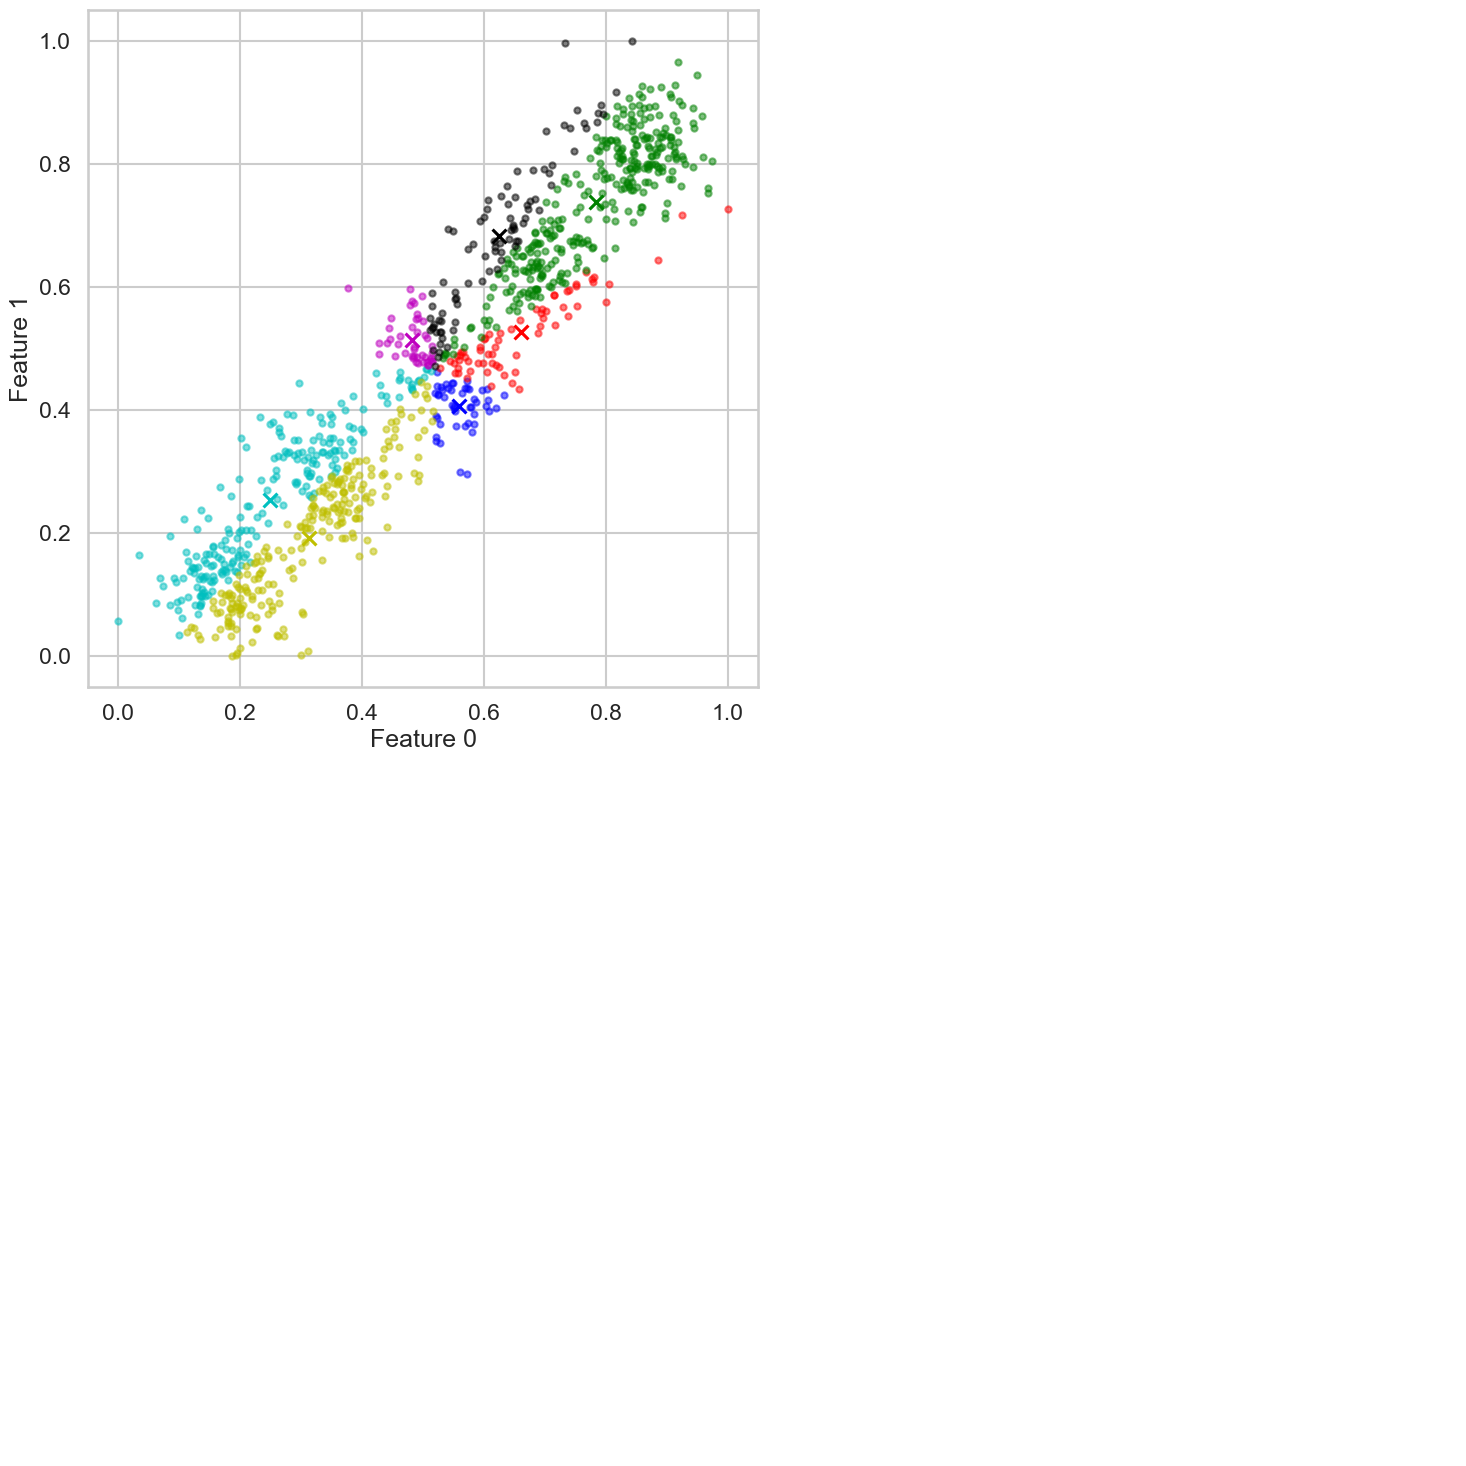

<Figure size 800x800 with 0 Axes>

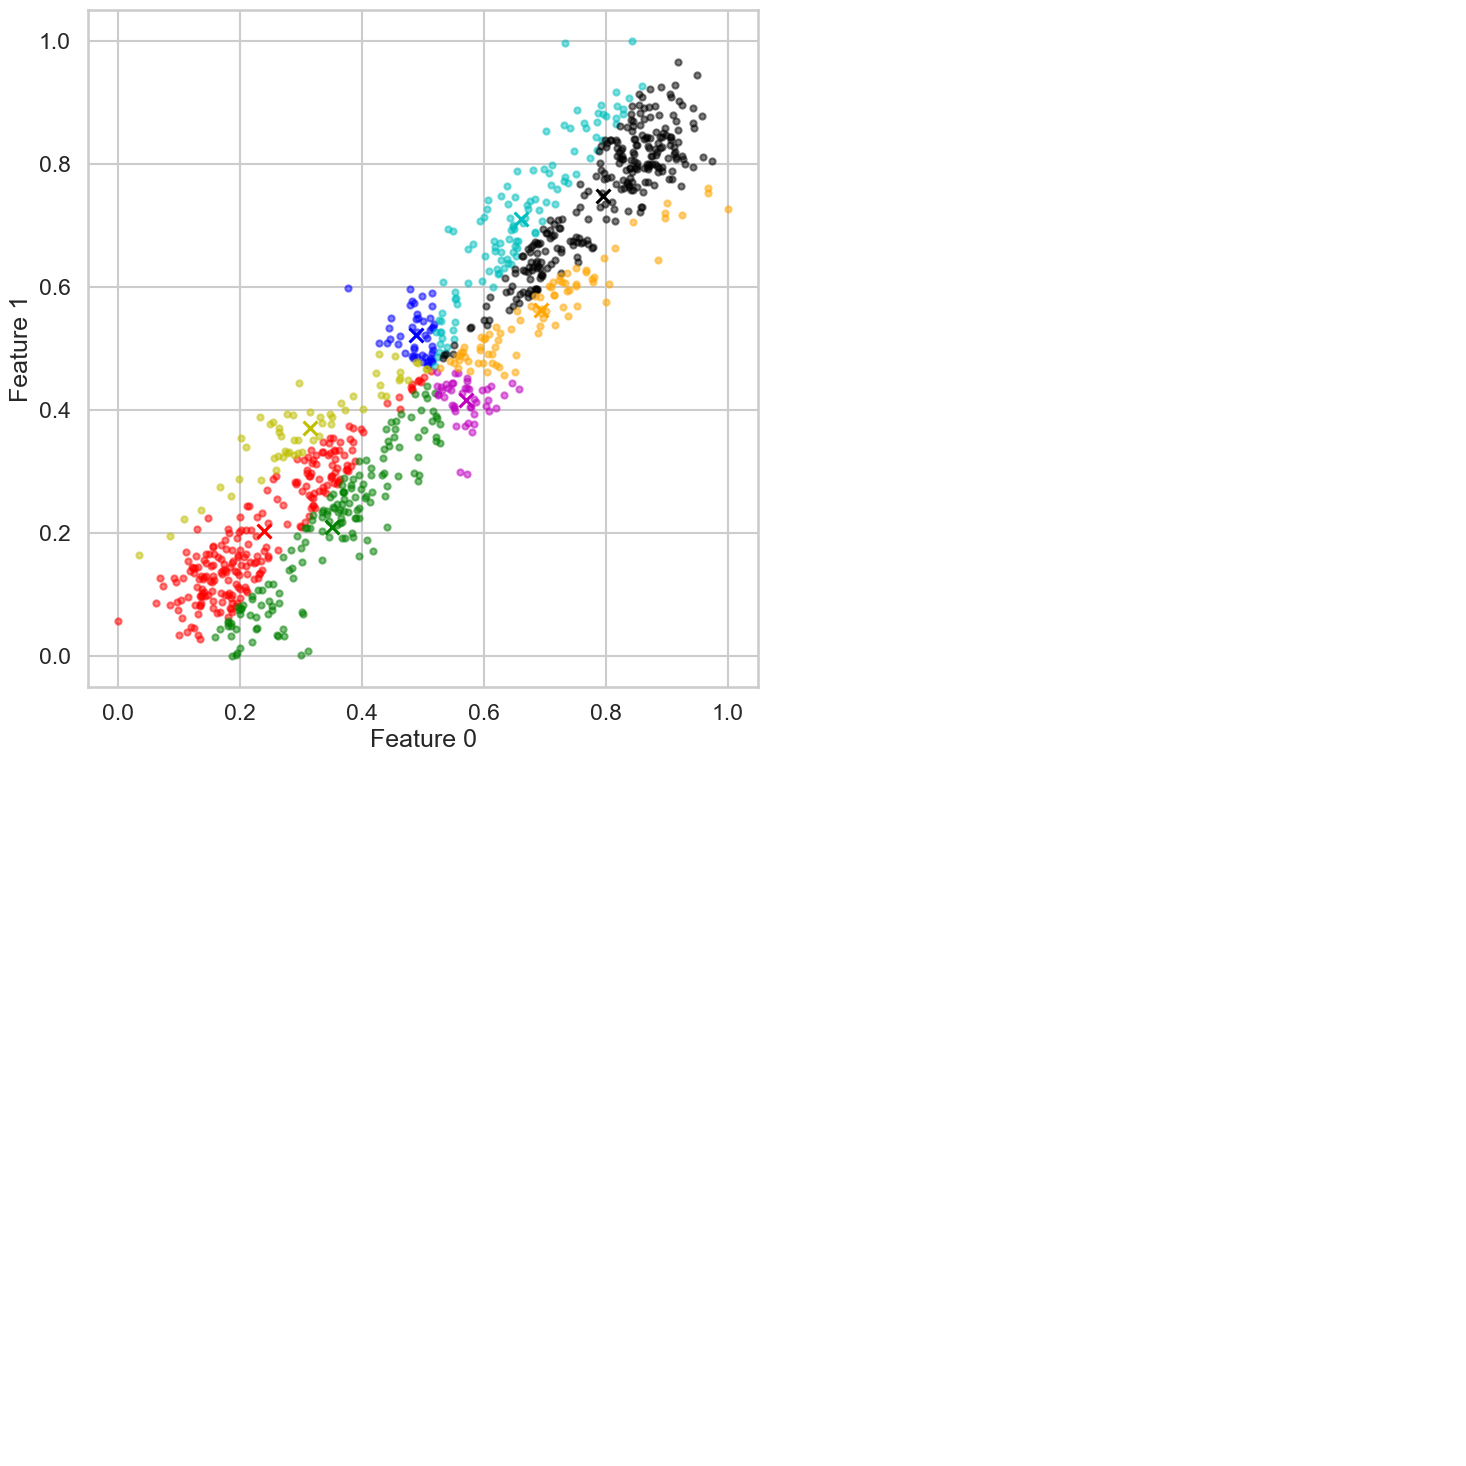

<Figure size 800x800 with 0 Axes>

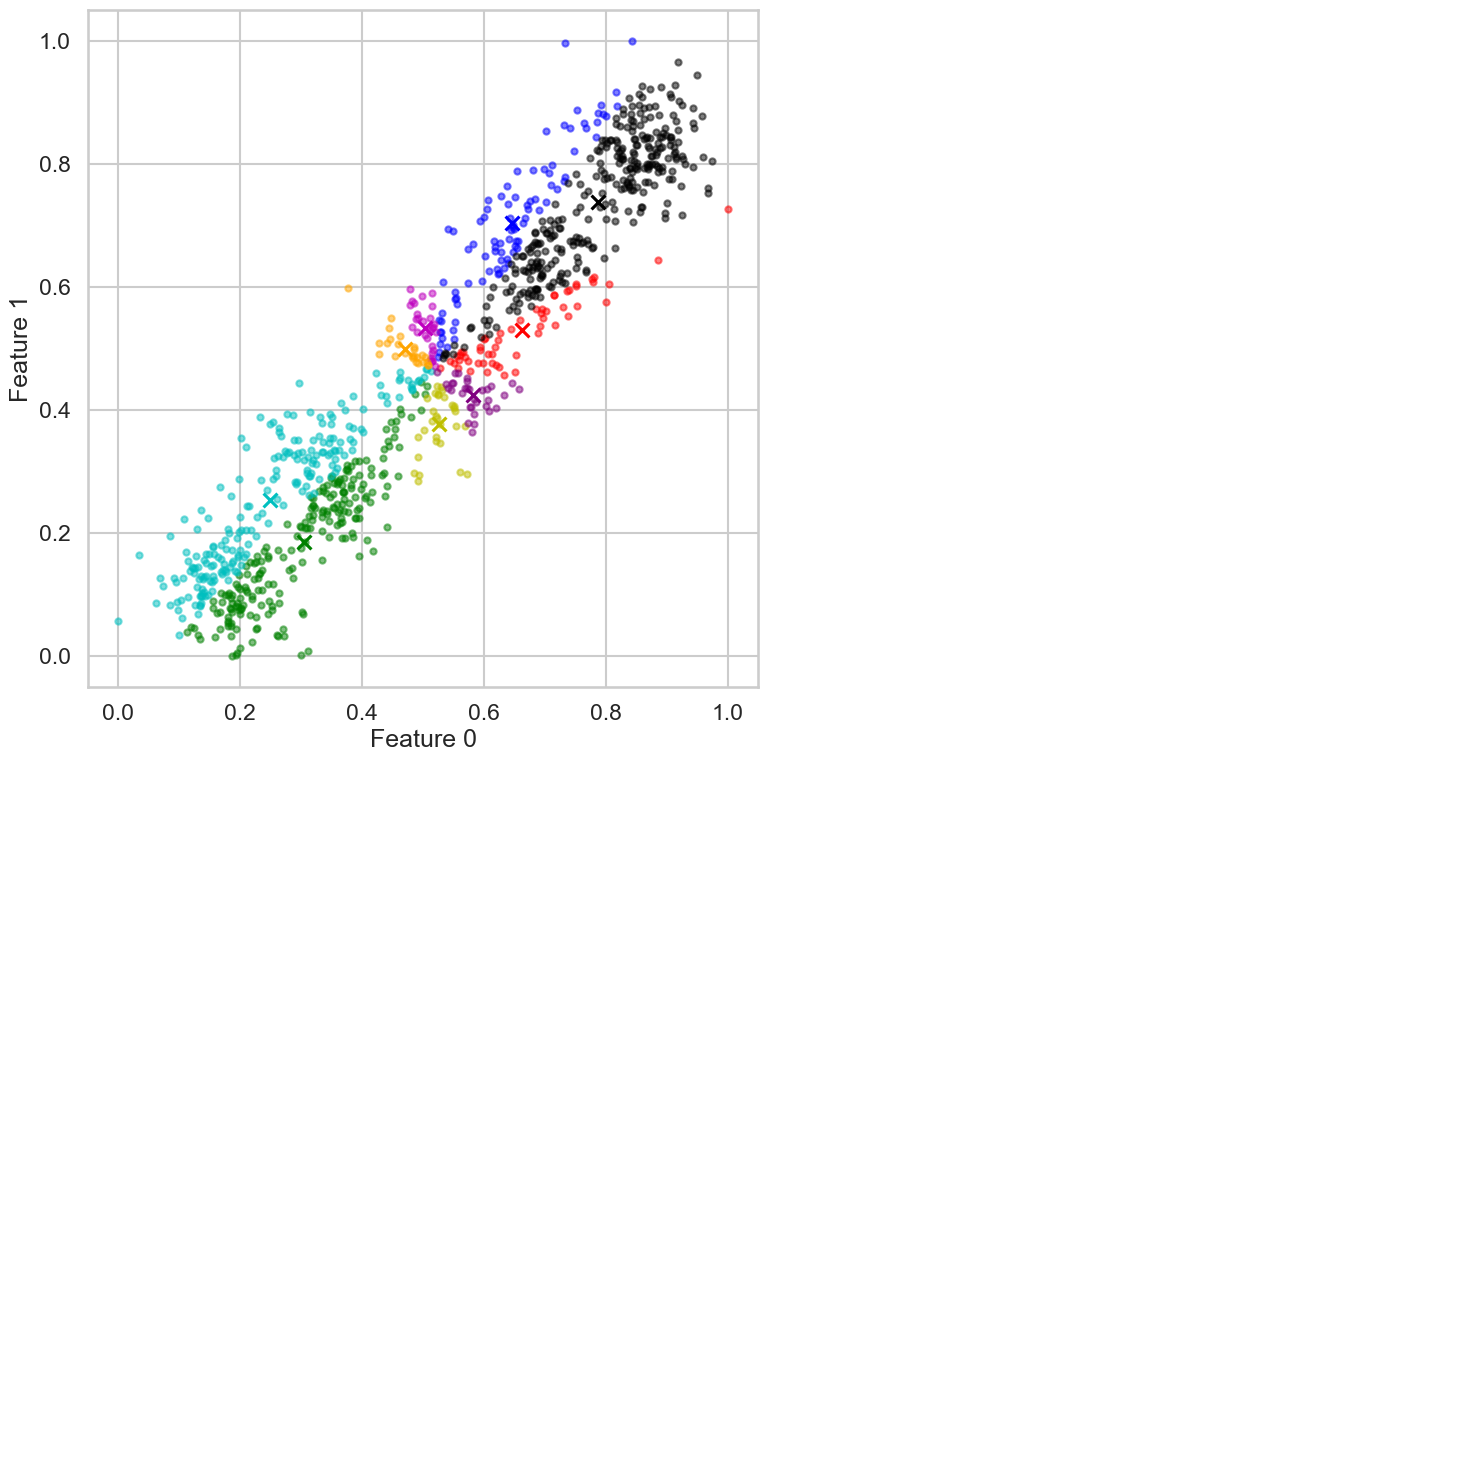

In [257]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

scaler = MinMaxScaler()
X1 = scaler.fit_transform(X)
X1 = pd.DataFrame(X1)

# Set parameters
metric = []
diff_k = []
for i in range(2,10):
    num_clusters = i
    distance_type = 'pearson'

    # Perform KMeans clustering
    final_cluster_distance, cluster_metric = GUC_Kmean(X1, num_clusters, distance_type)
    metric.append(cluster_metric)
    diff_k.append(i)
    # Create a KMeans object for visualization purposes
    km = KMeans(n_clusters=num_clusters)
    km.labels_ = np.argmin(final_cluster_distance, axis=1)
    km.cluster_centers_ = np.array([X1[km.labels_ == i].mean(axis=0) for i in range(num_clusters)])
    
    # Visualize clusters
    plt.figure()
    display_cluster(X1.values, km=km, num_clusters=num_clusters)

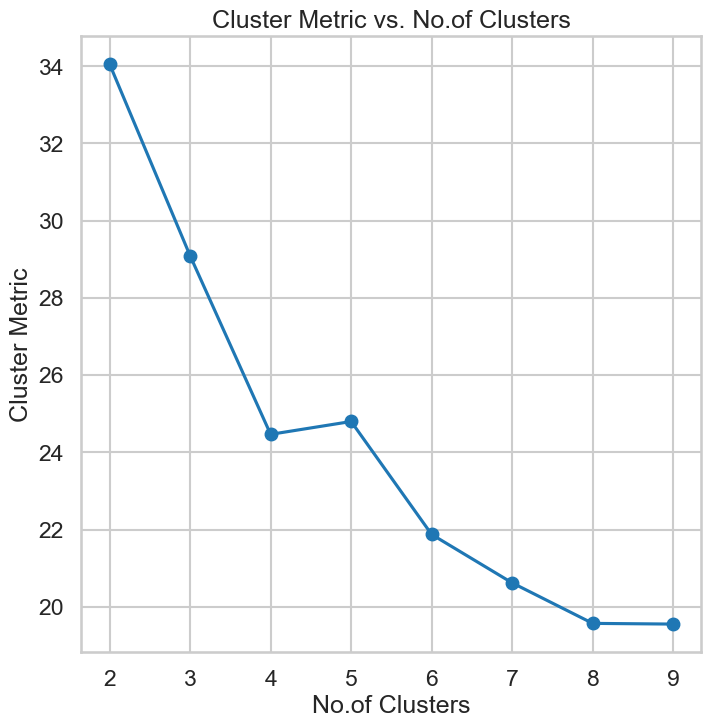

In [258]:
# Plot the graph
plt.plot(diff_k, metric, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('No.of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. No.of Clusters')

# Show the plot
plt.show()

### Example 3  

<Figure size 800x800 with 0 Axes>

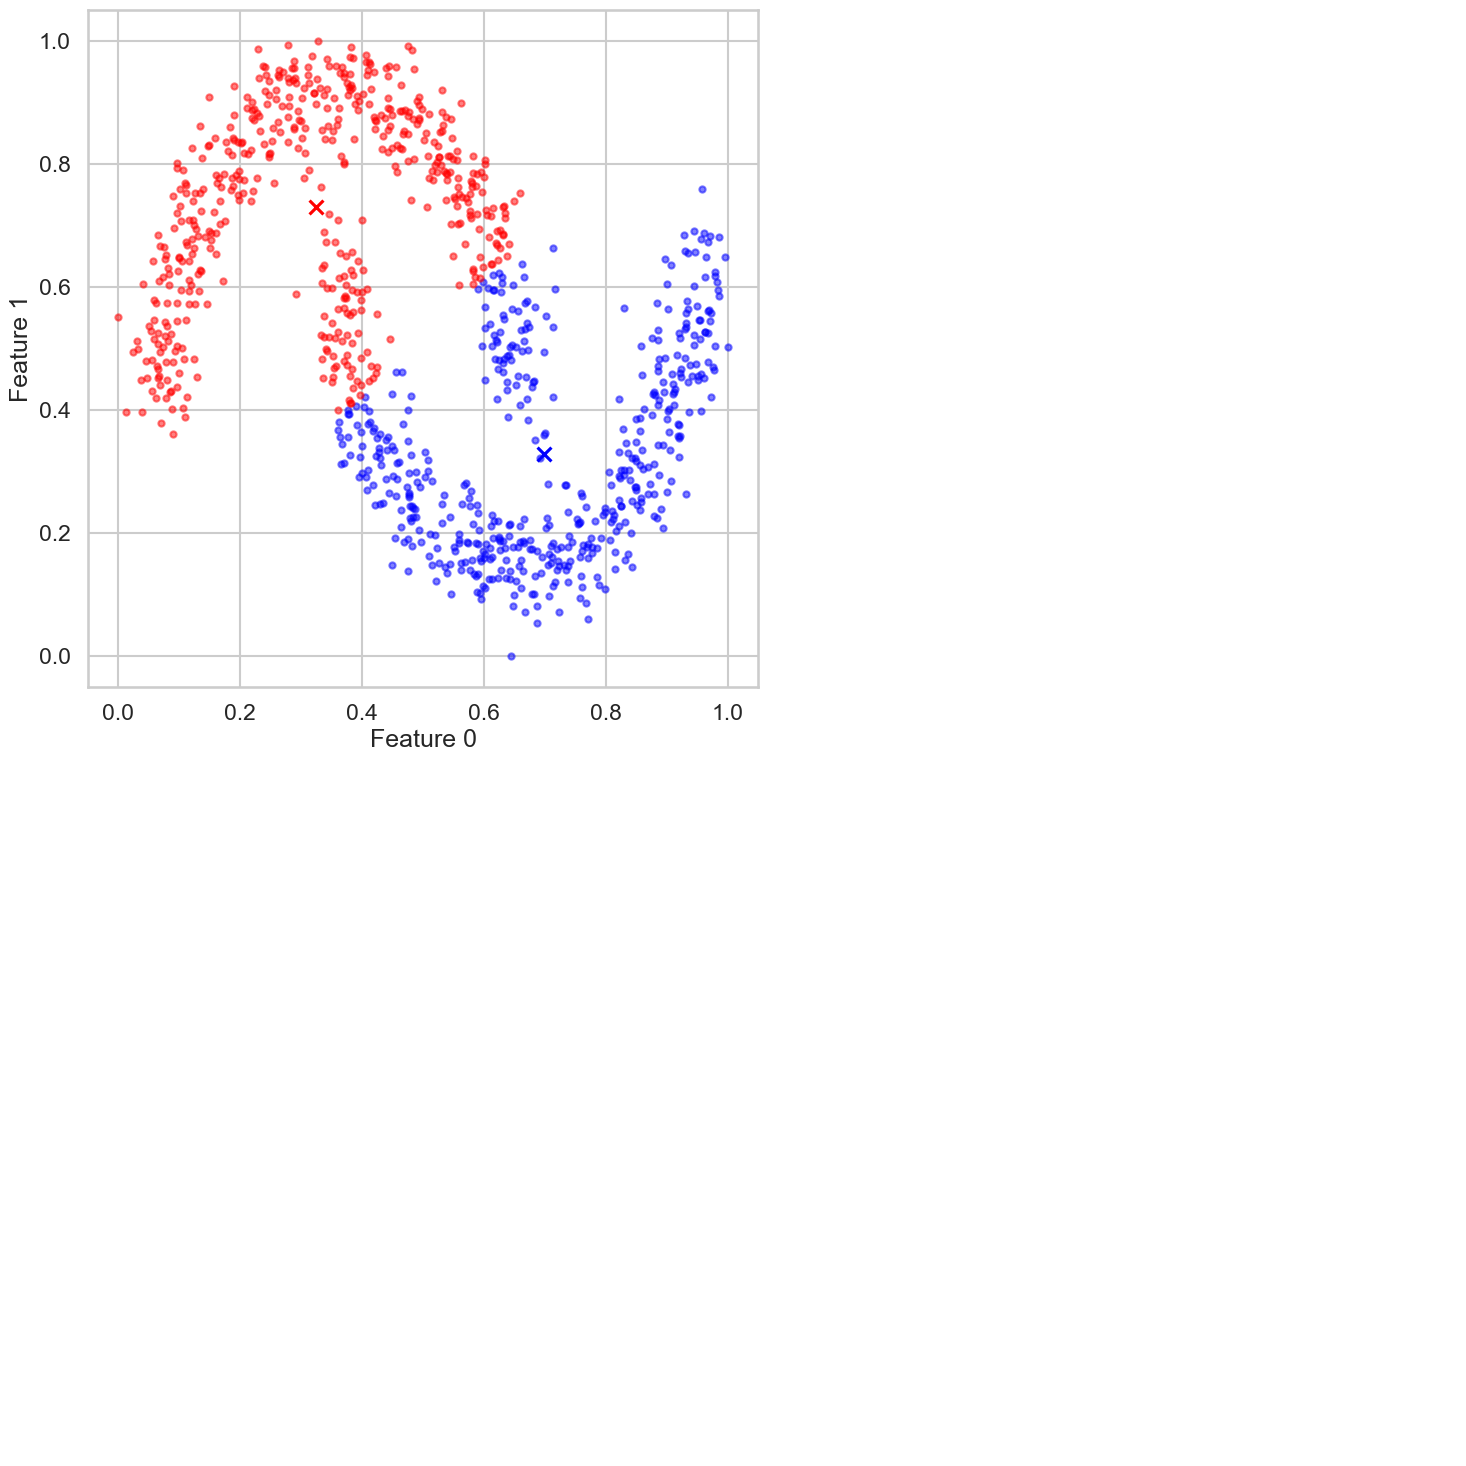

<Figure size 800x800 with 0 Axes>

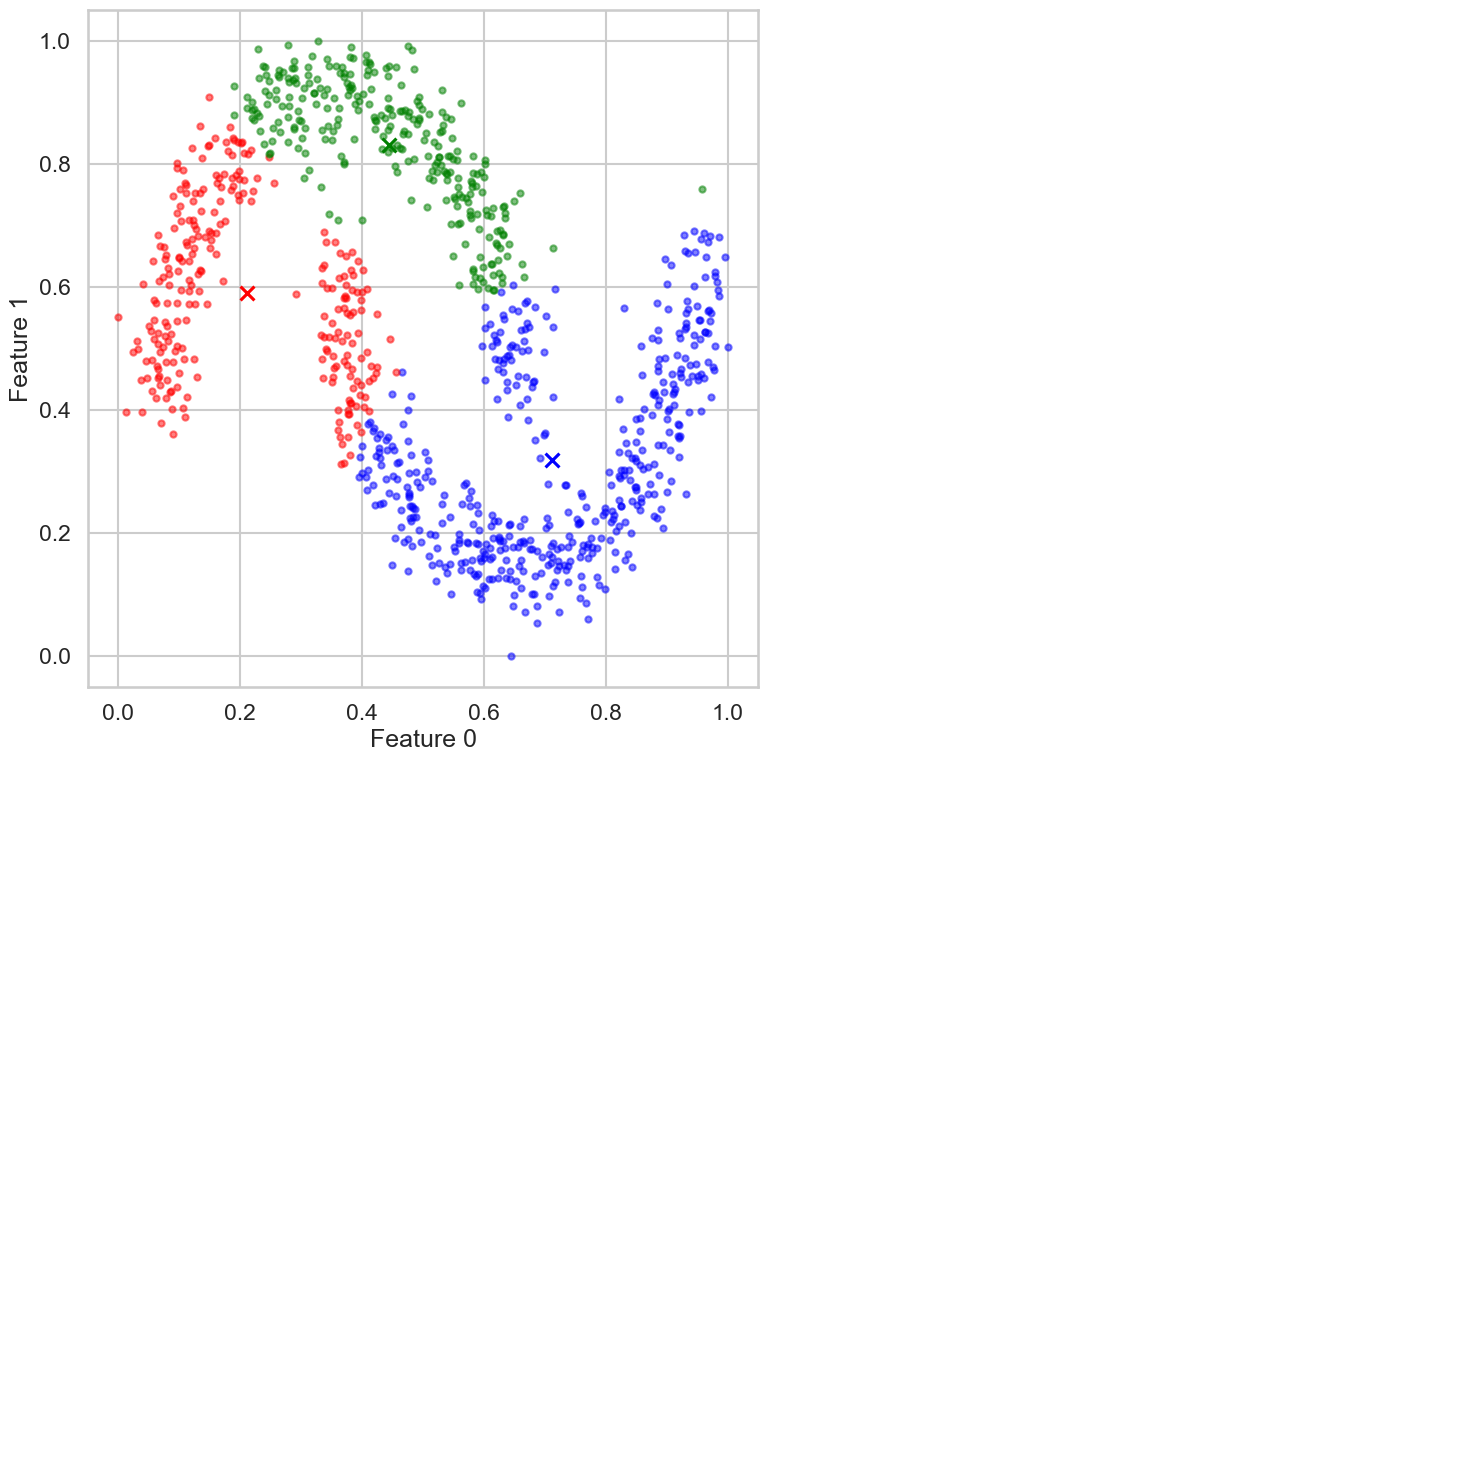

<Figure size 800x800 with 0 Axes>

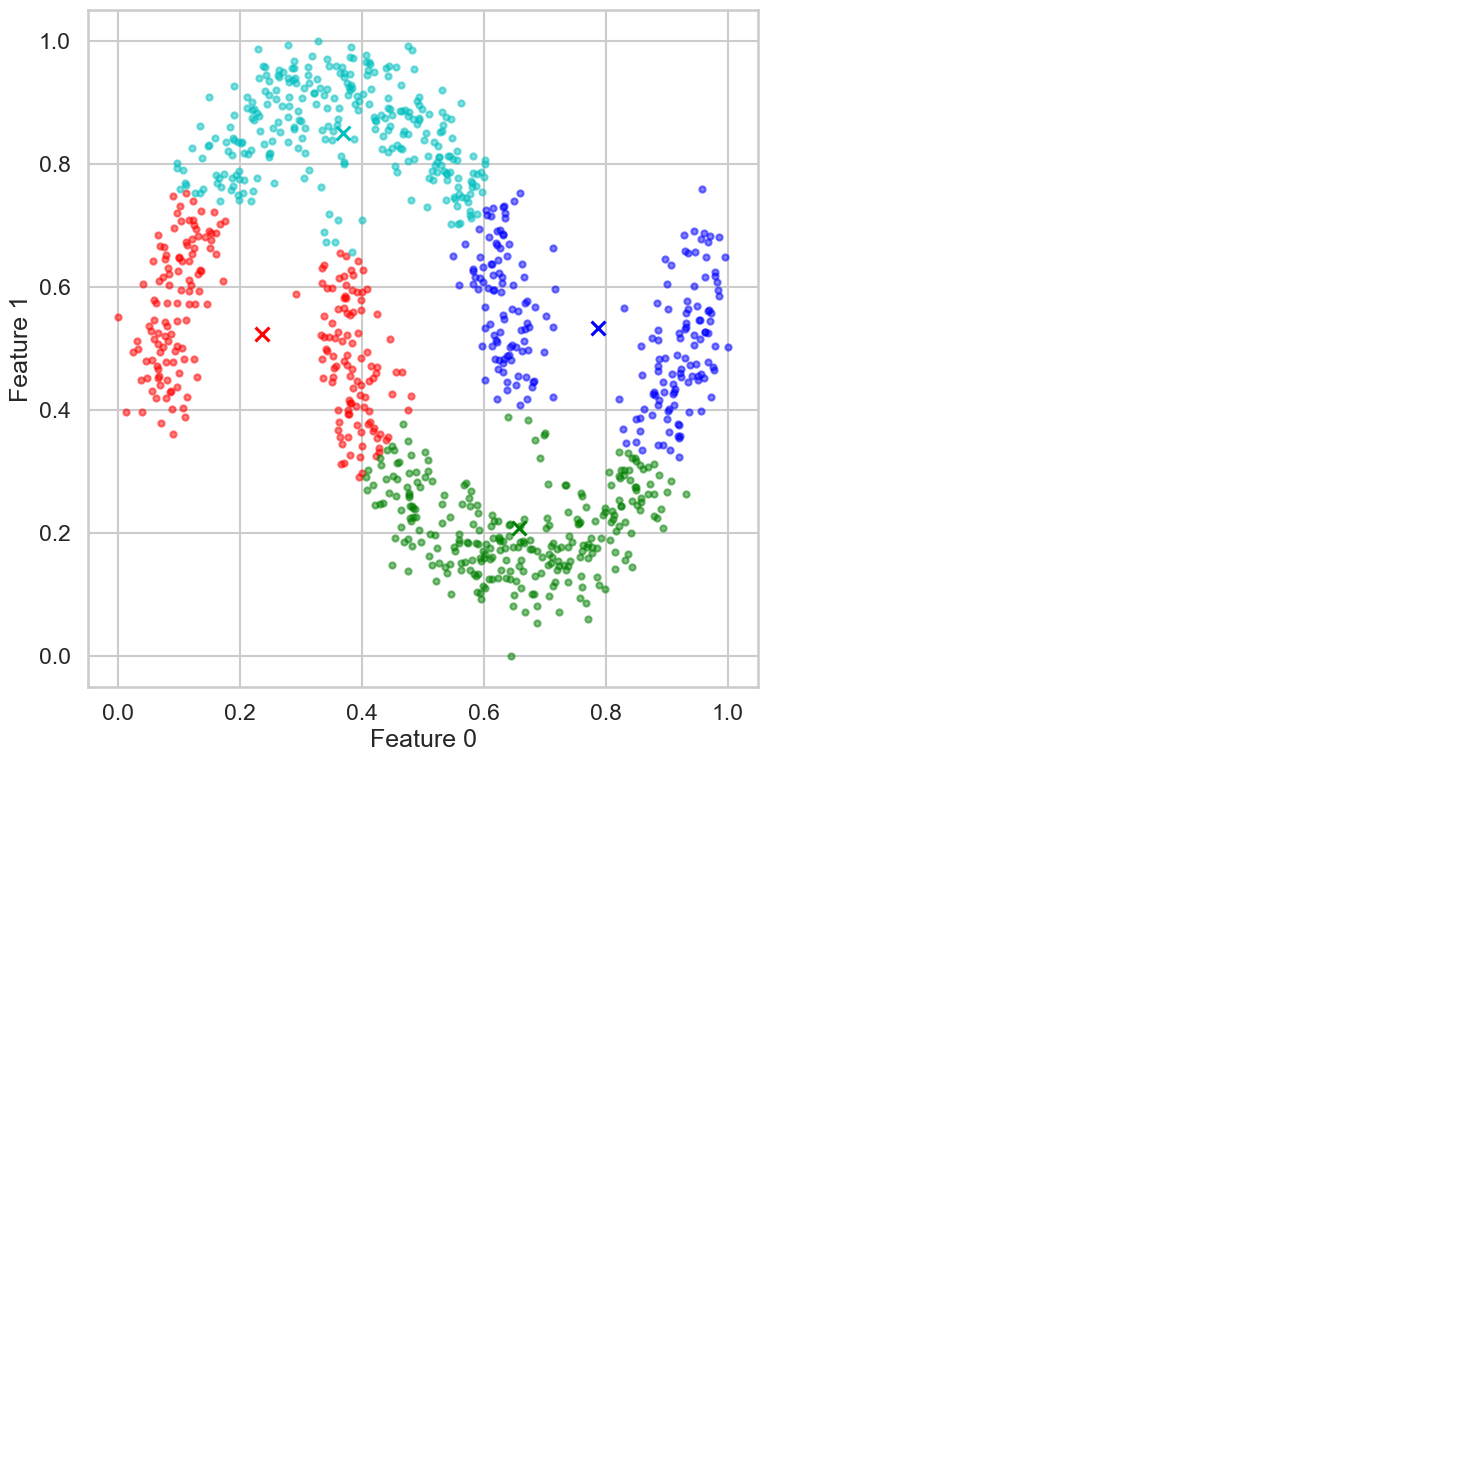

<Figure size 800x800 with 0 Axes>

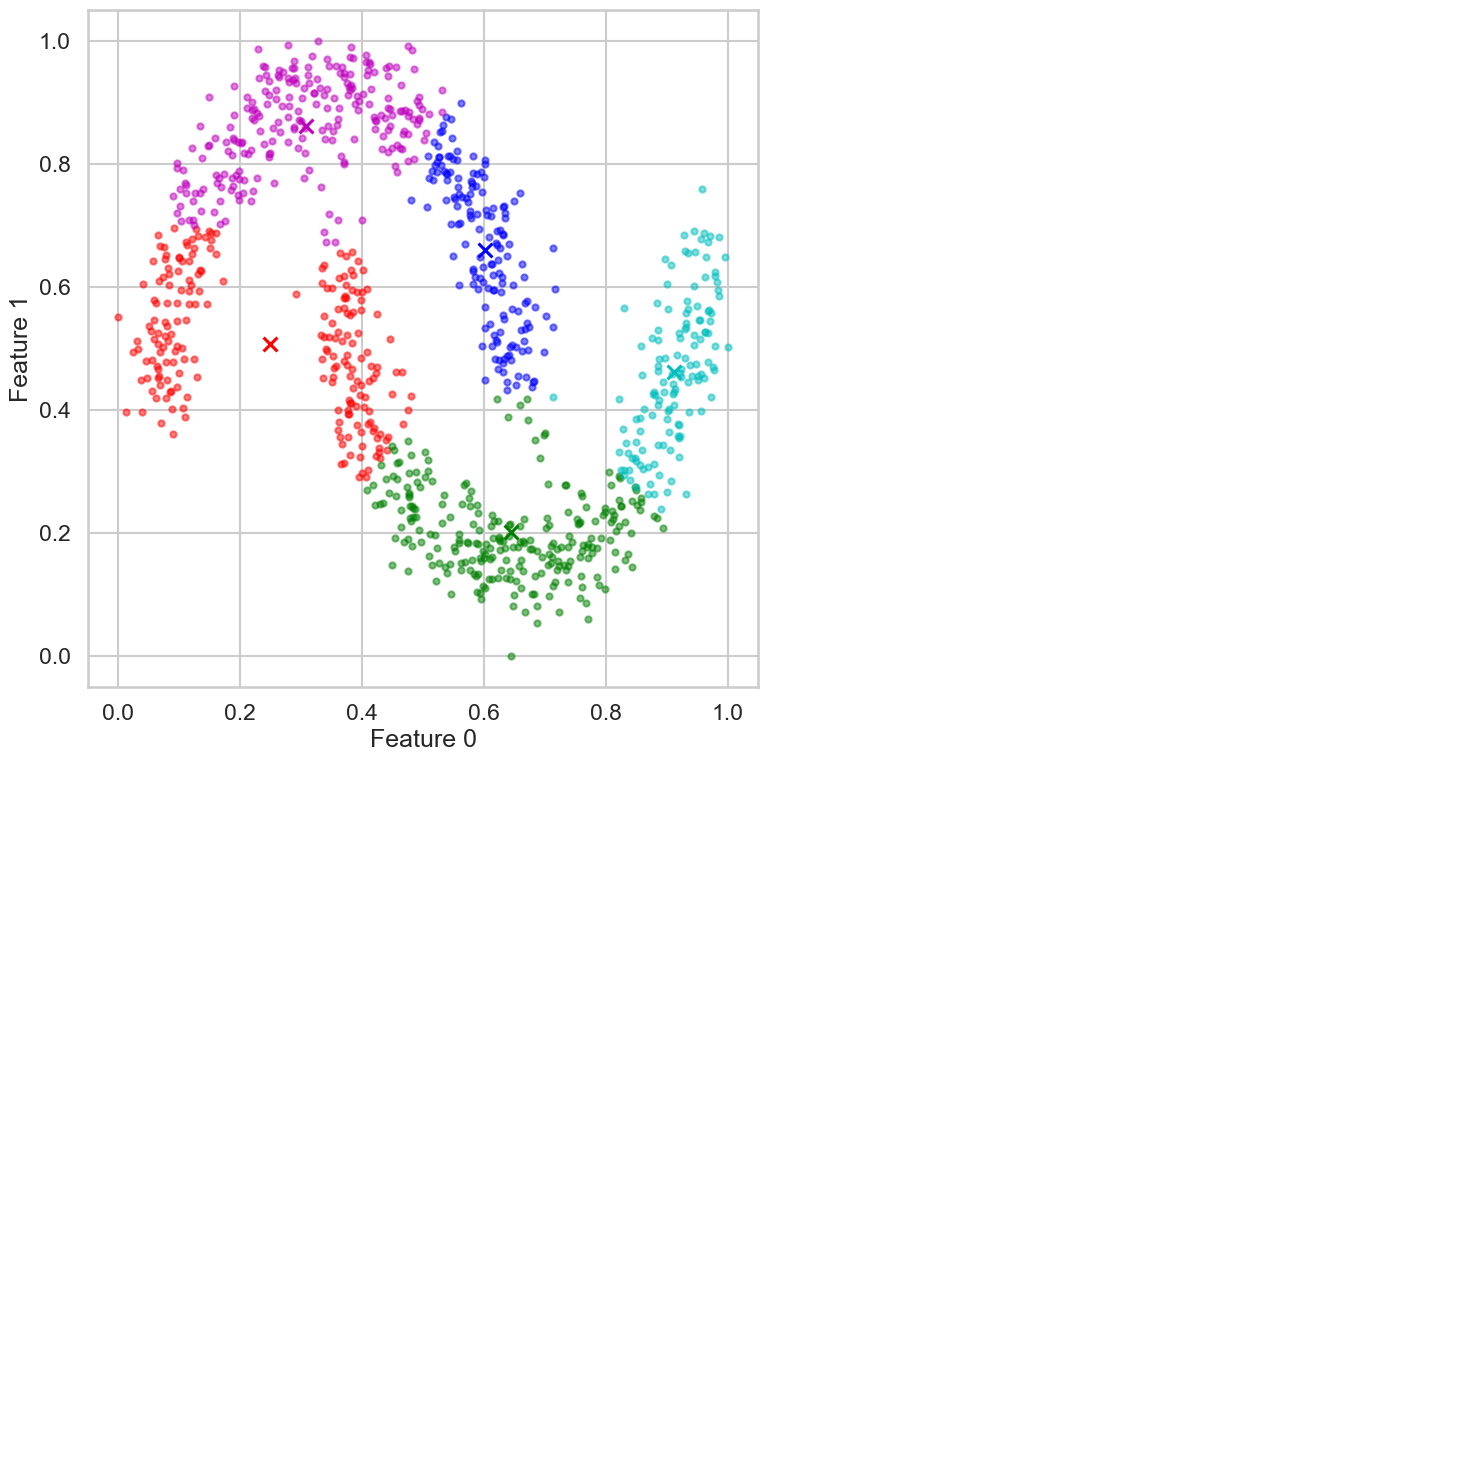

<Figure size 800x800 with 0 Axes>

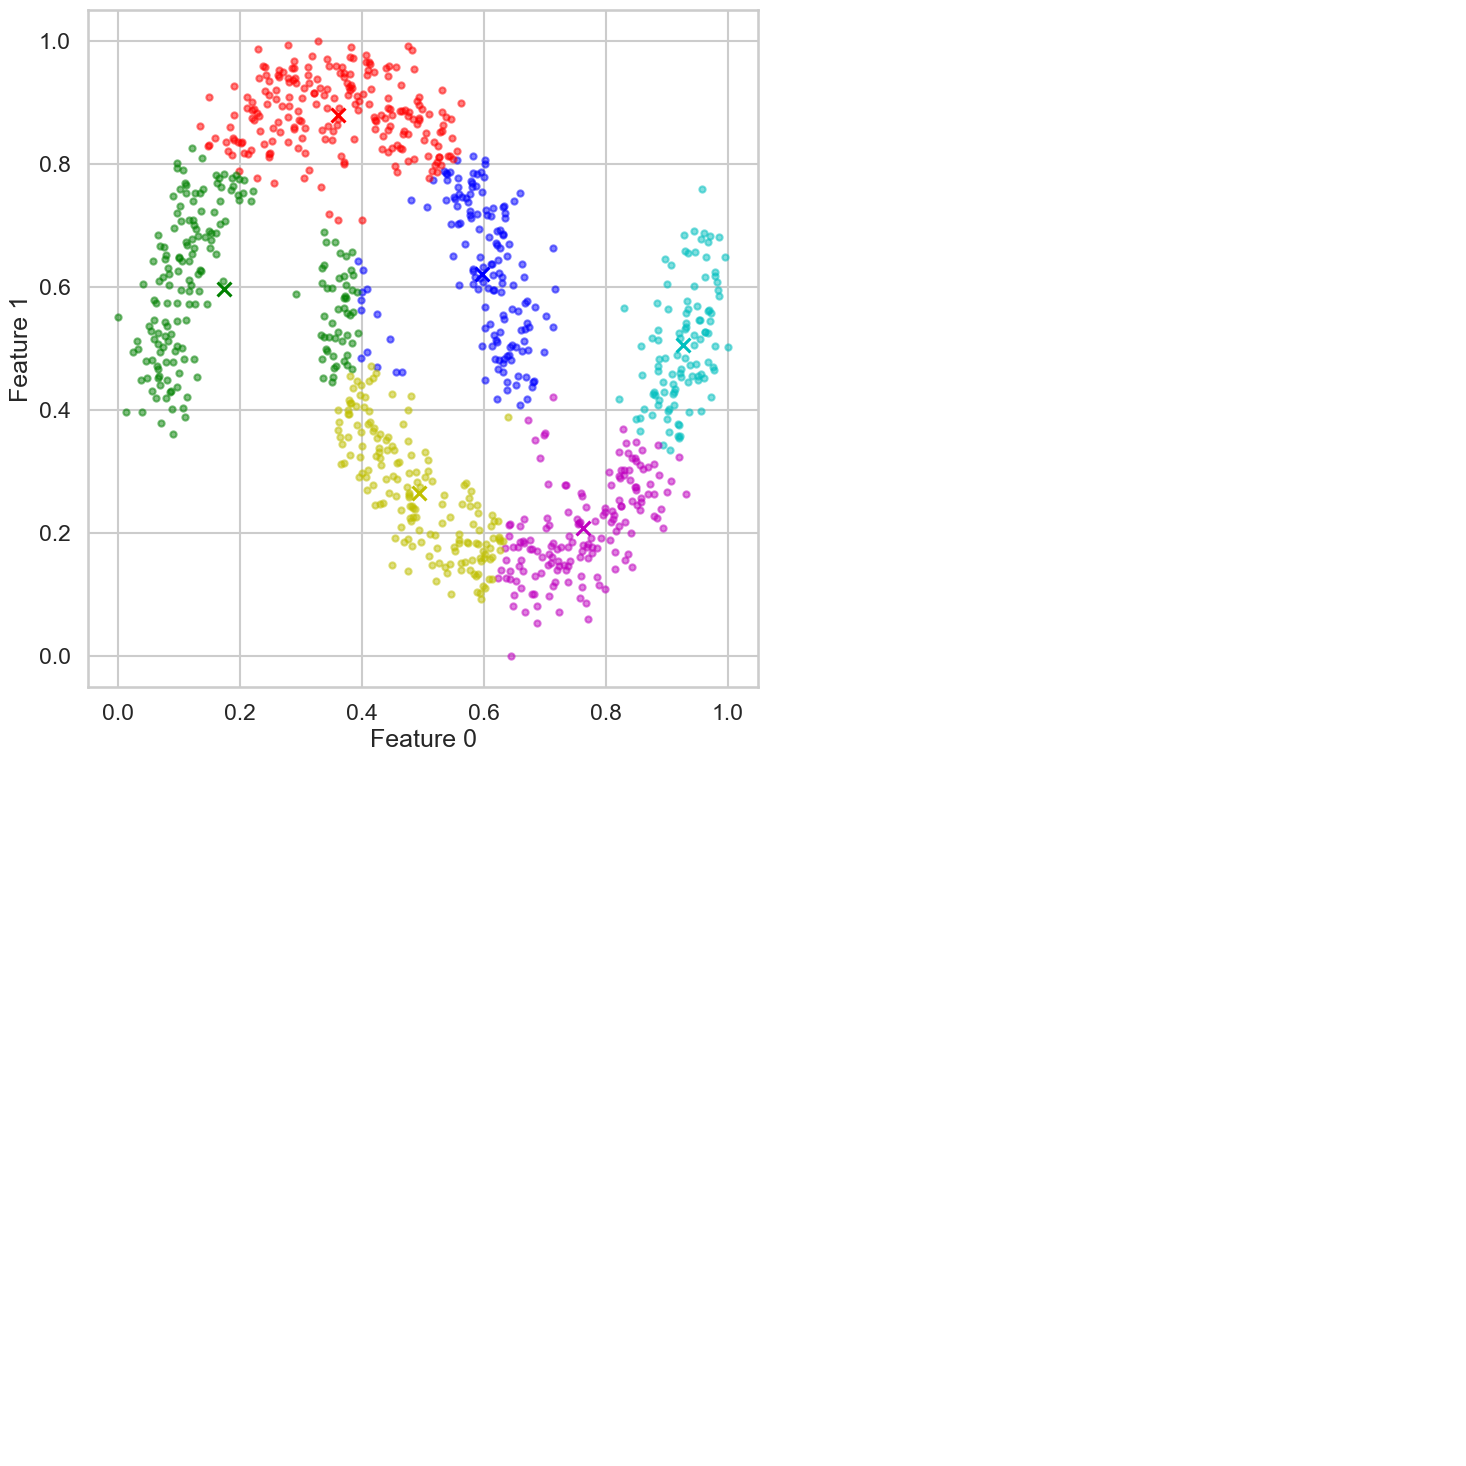

<Figure size 800x800 with 0 Axes>

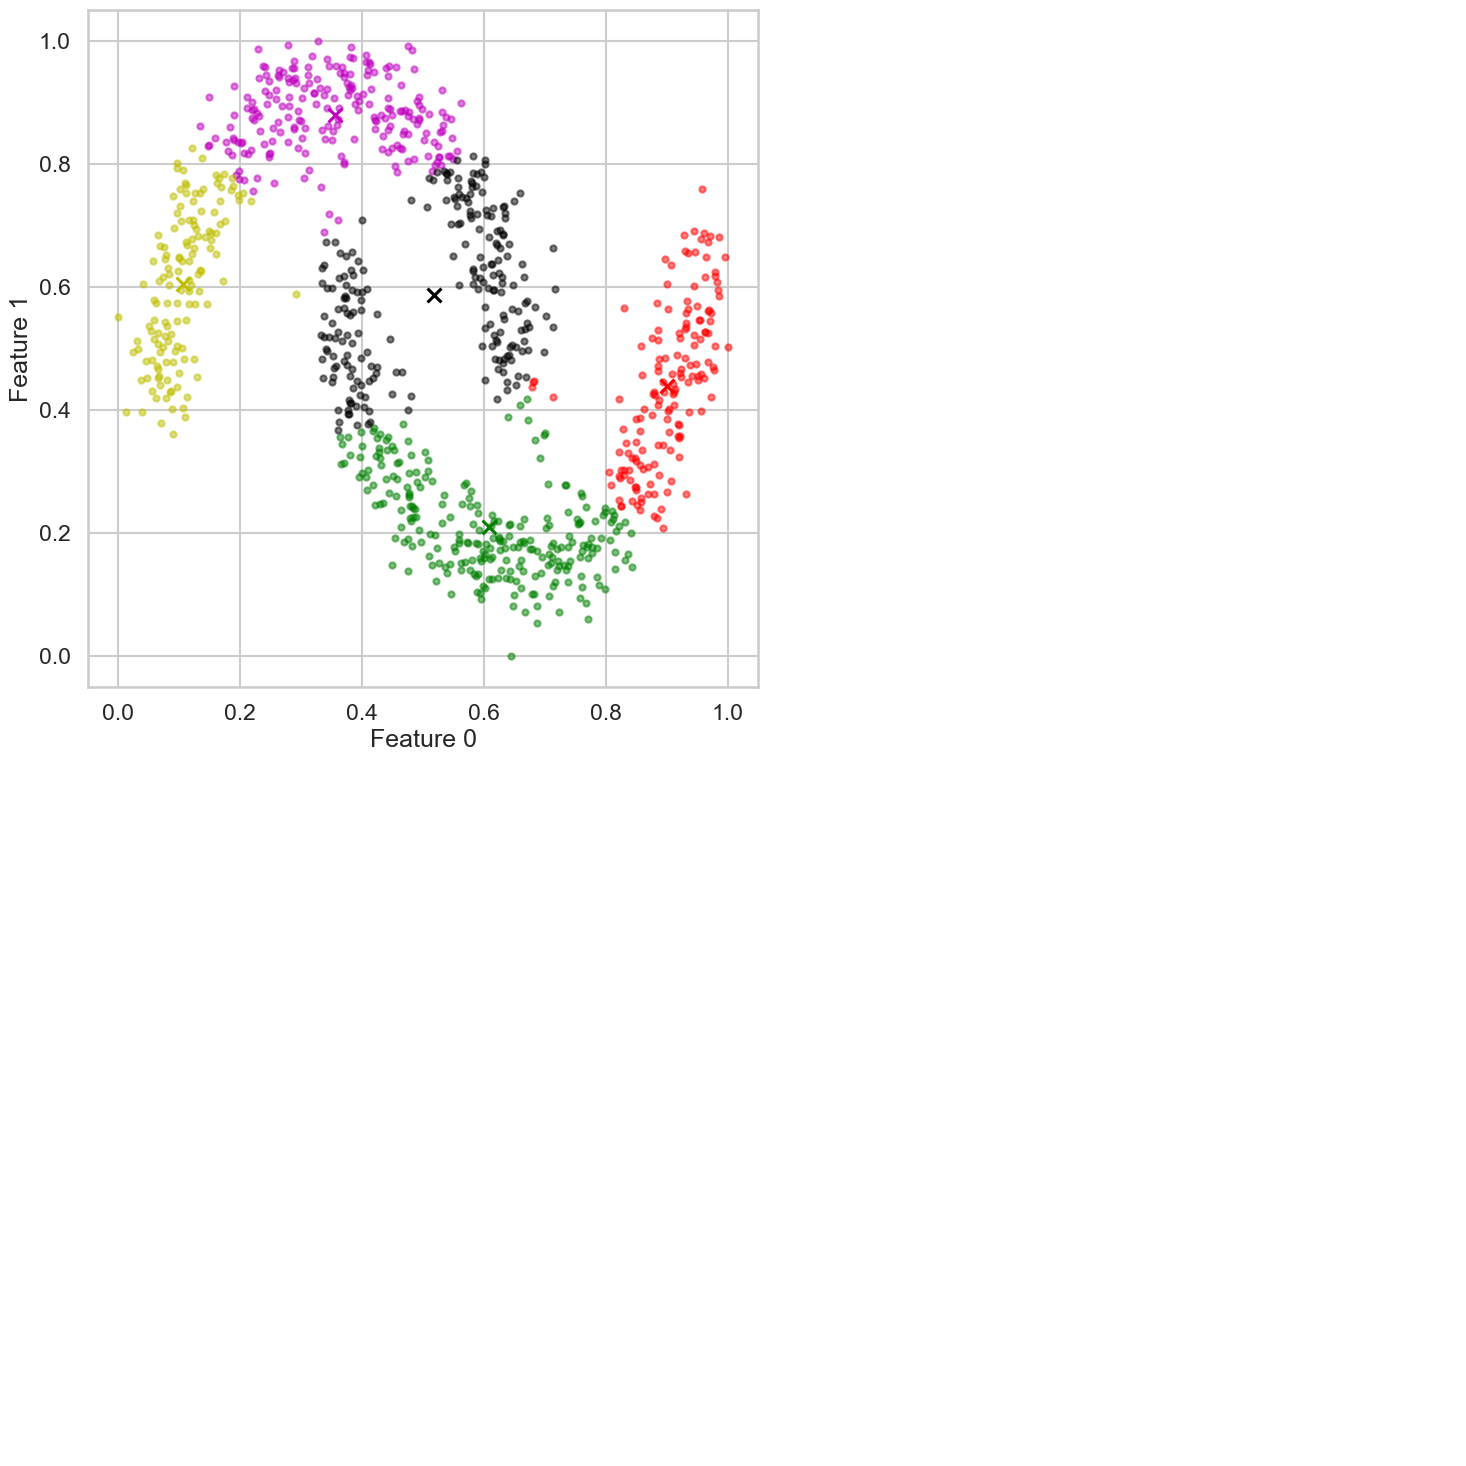

<Figure size 800x800 with 0 Axes>

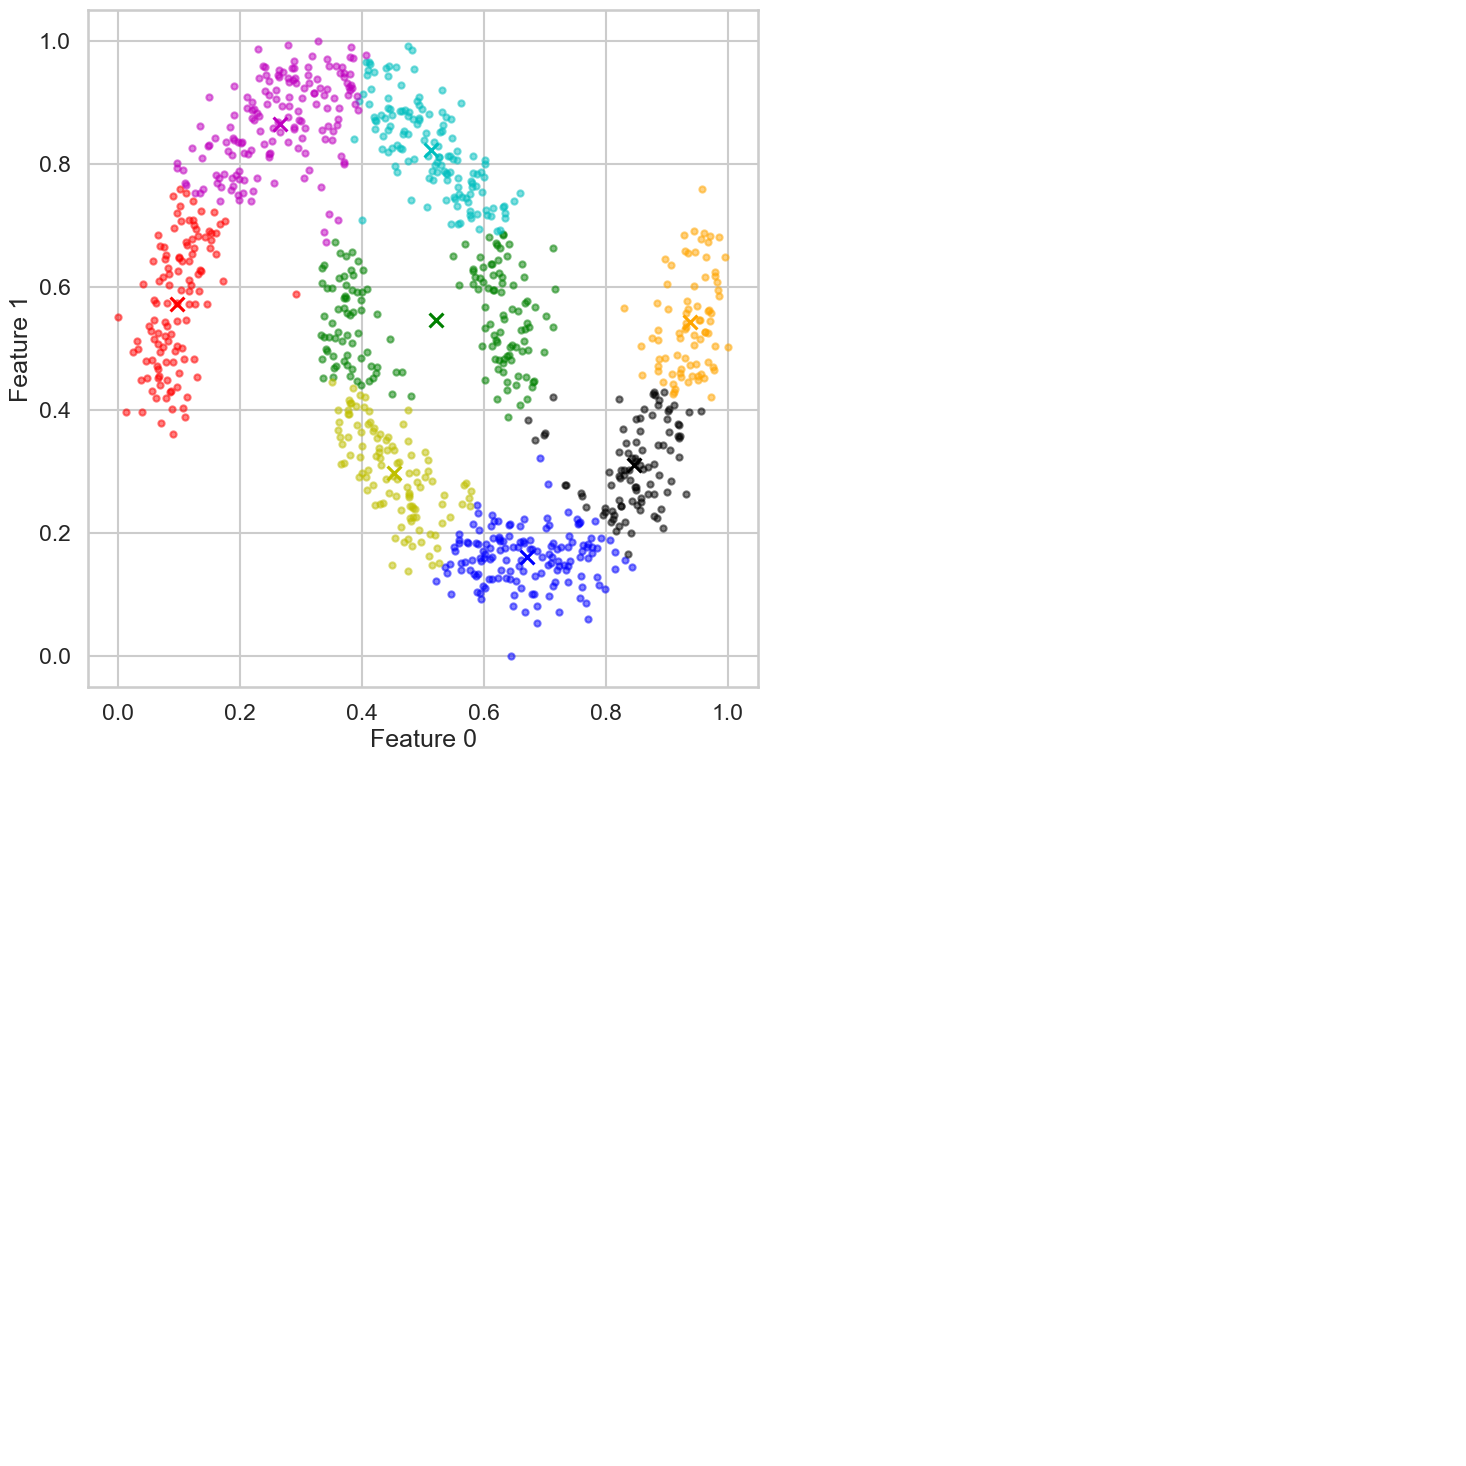

<Figure size 800x800 with 0 Axes>

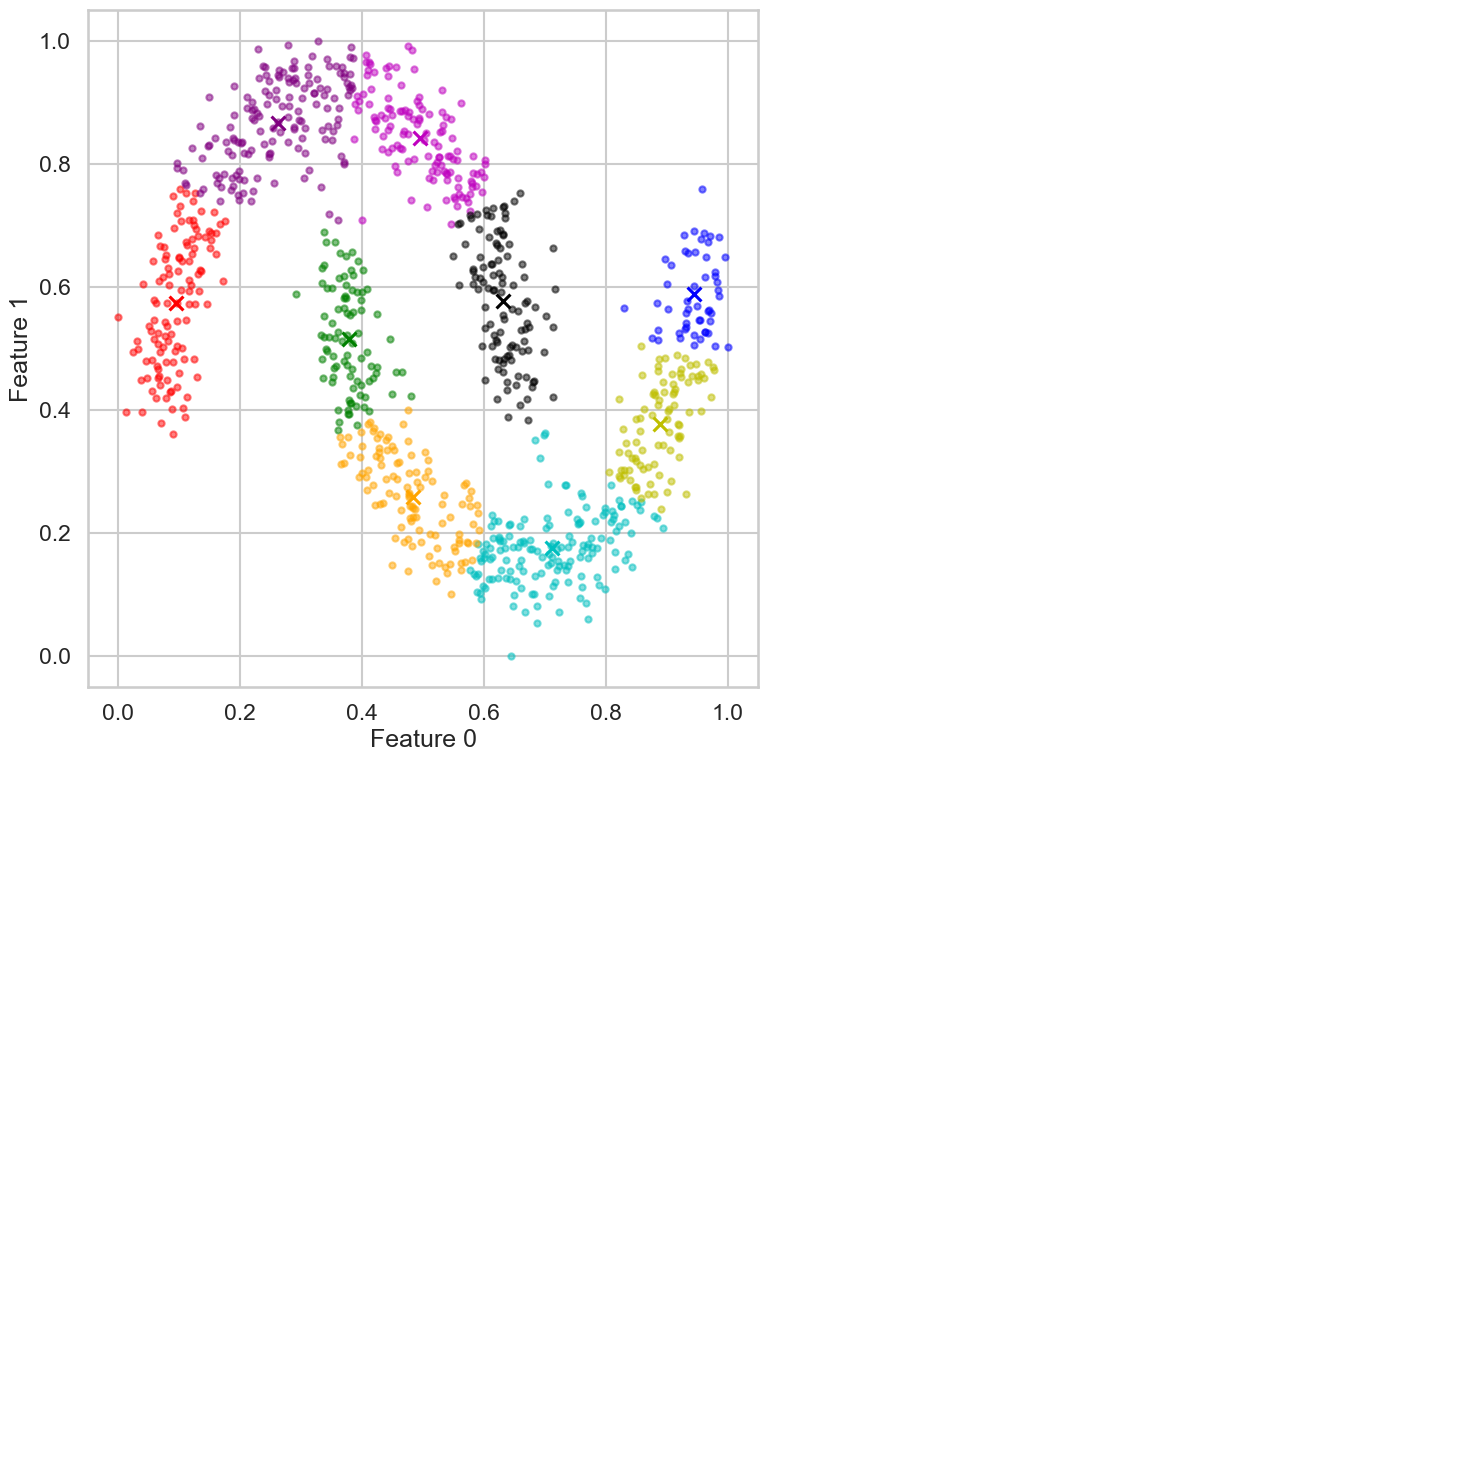

In [259]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X)
X1 = pd.DataFrame(X1)

# Set parameters
metric = []
diff_k = []
for i in range(2,10):
    num_clusters = i
    distance_type = 'euclidean'

    # Perform KMeans clustering
    final_cluster_distance, cluster_metric = GUC_Kmean(X1, num_clusters, distance_type)
    metric.append(cluster_metric)
    diff_k.append(i)
    # Create a KMeans object for visualization purposes
    km = KMeans(n_clusters=num_clusters)
    km.labels_ = np.argmin(final_cluster_distance, axis=1)
    km.cluster_centers_ = np.array([X1[km.labels_ == i].mean(axis=0) for i in range(num_clusters)])
    
    # Visualize clusters
    plt.figure()
    display_cluster(X1.values, km=km, num_clusters=num_clusters)

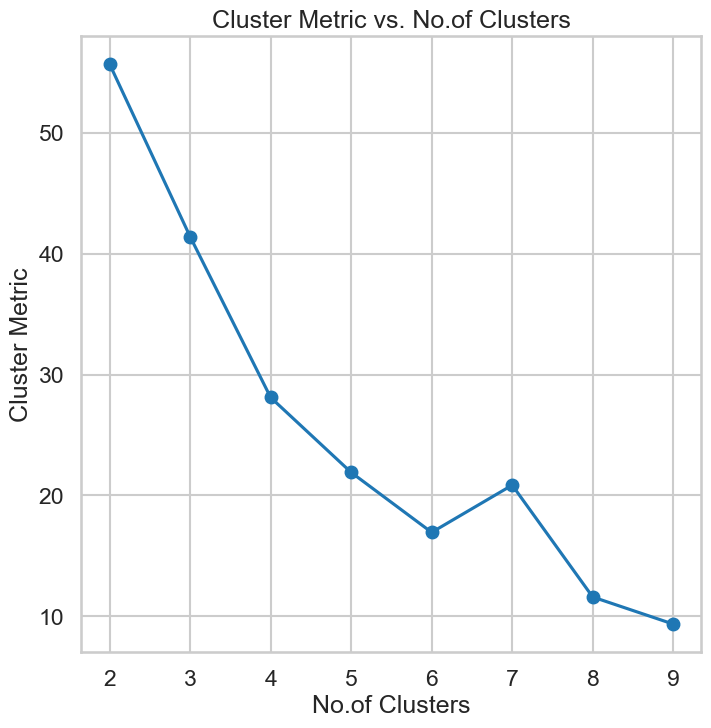

In [260]:
# Plot the graph
plt.plot(diff_k, metric, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('No.of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. No.of Clusters')

# Show the plot
plt.show()

### 3.Pearson

<Figure size 800x800 with 0 Axes>

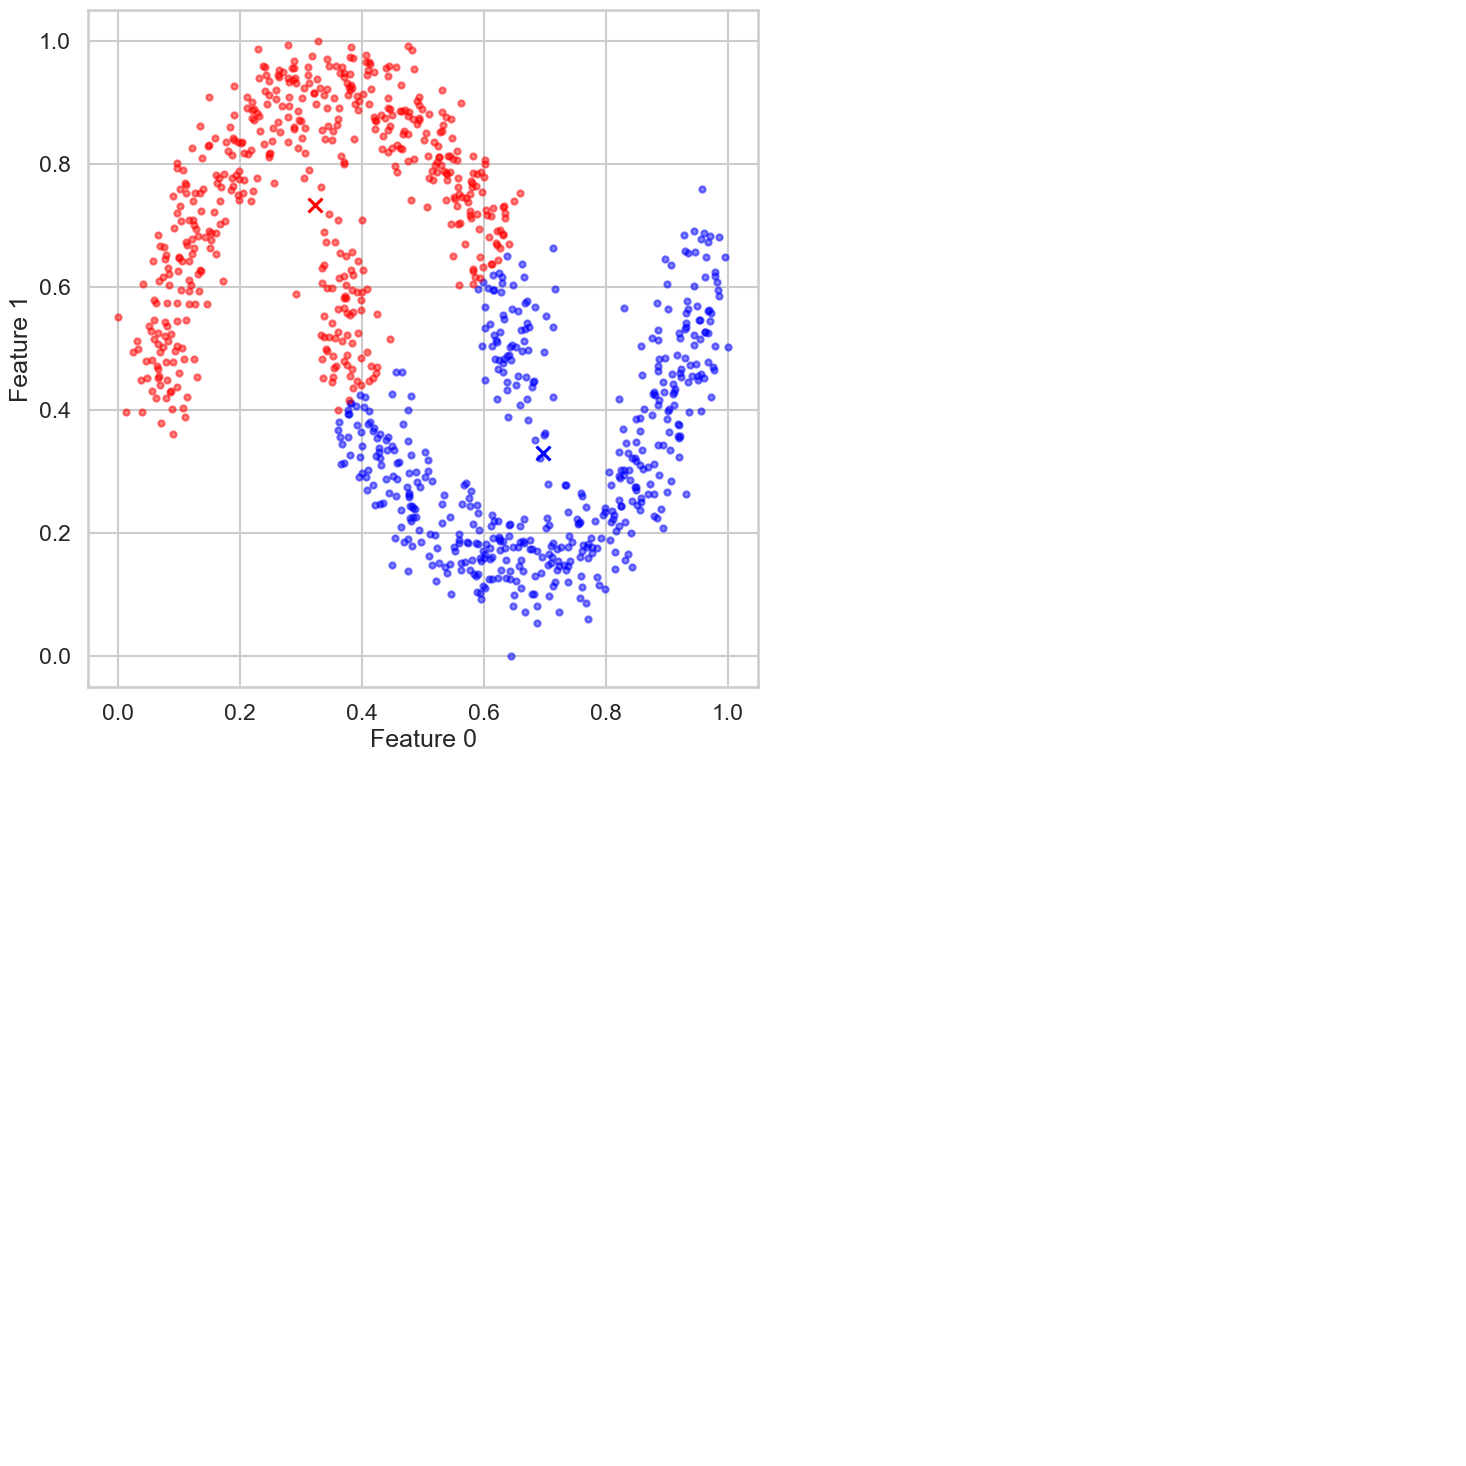

<Figure size 800x800 with 0 Axes>

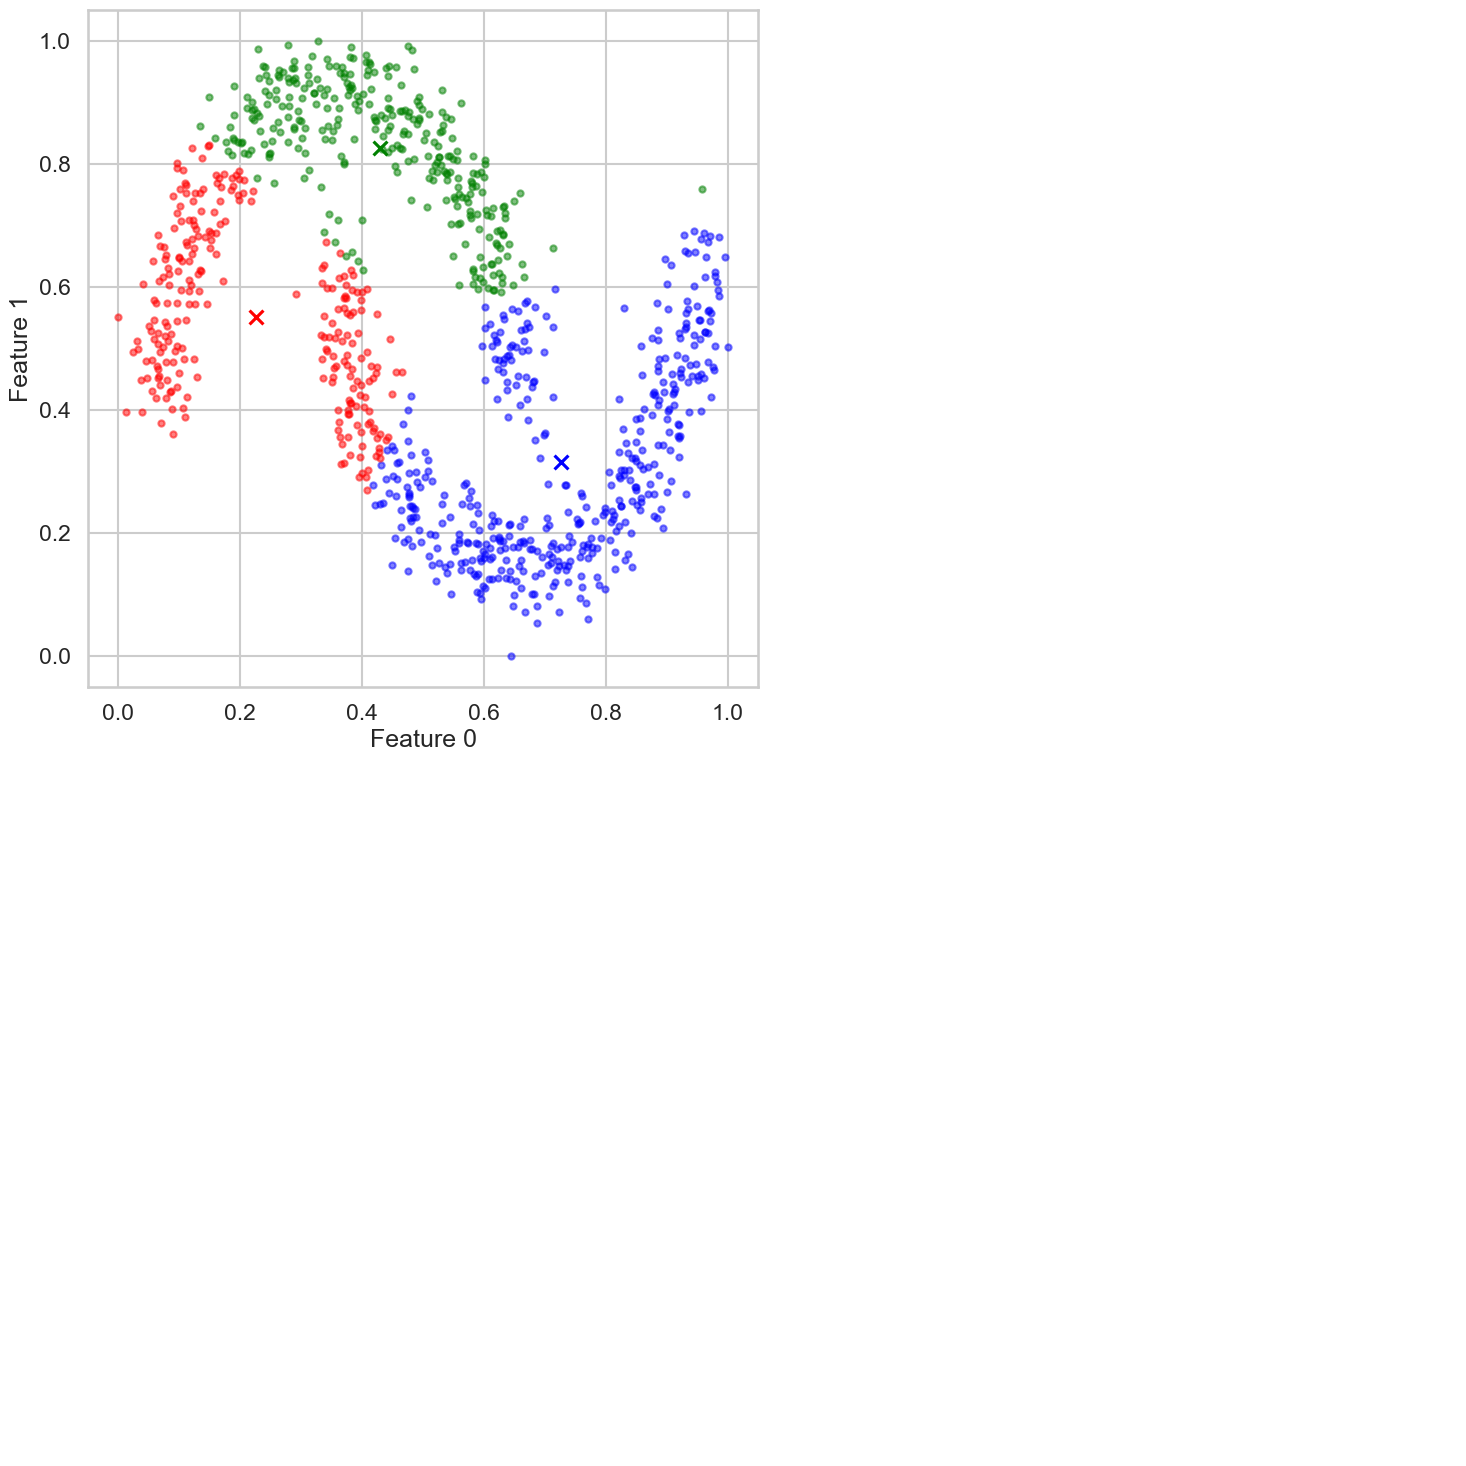

<Figure size 800x800 with 0 Axes>

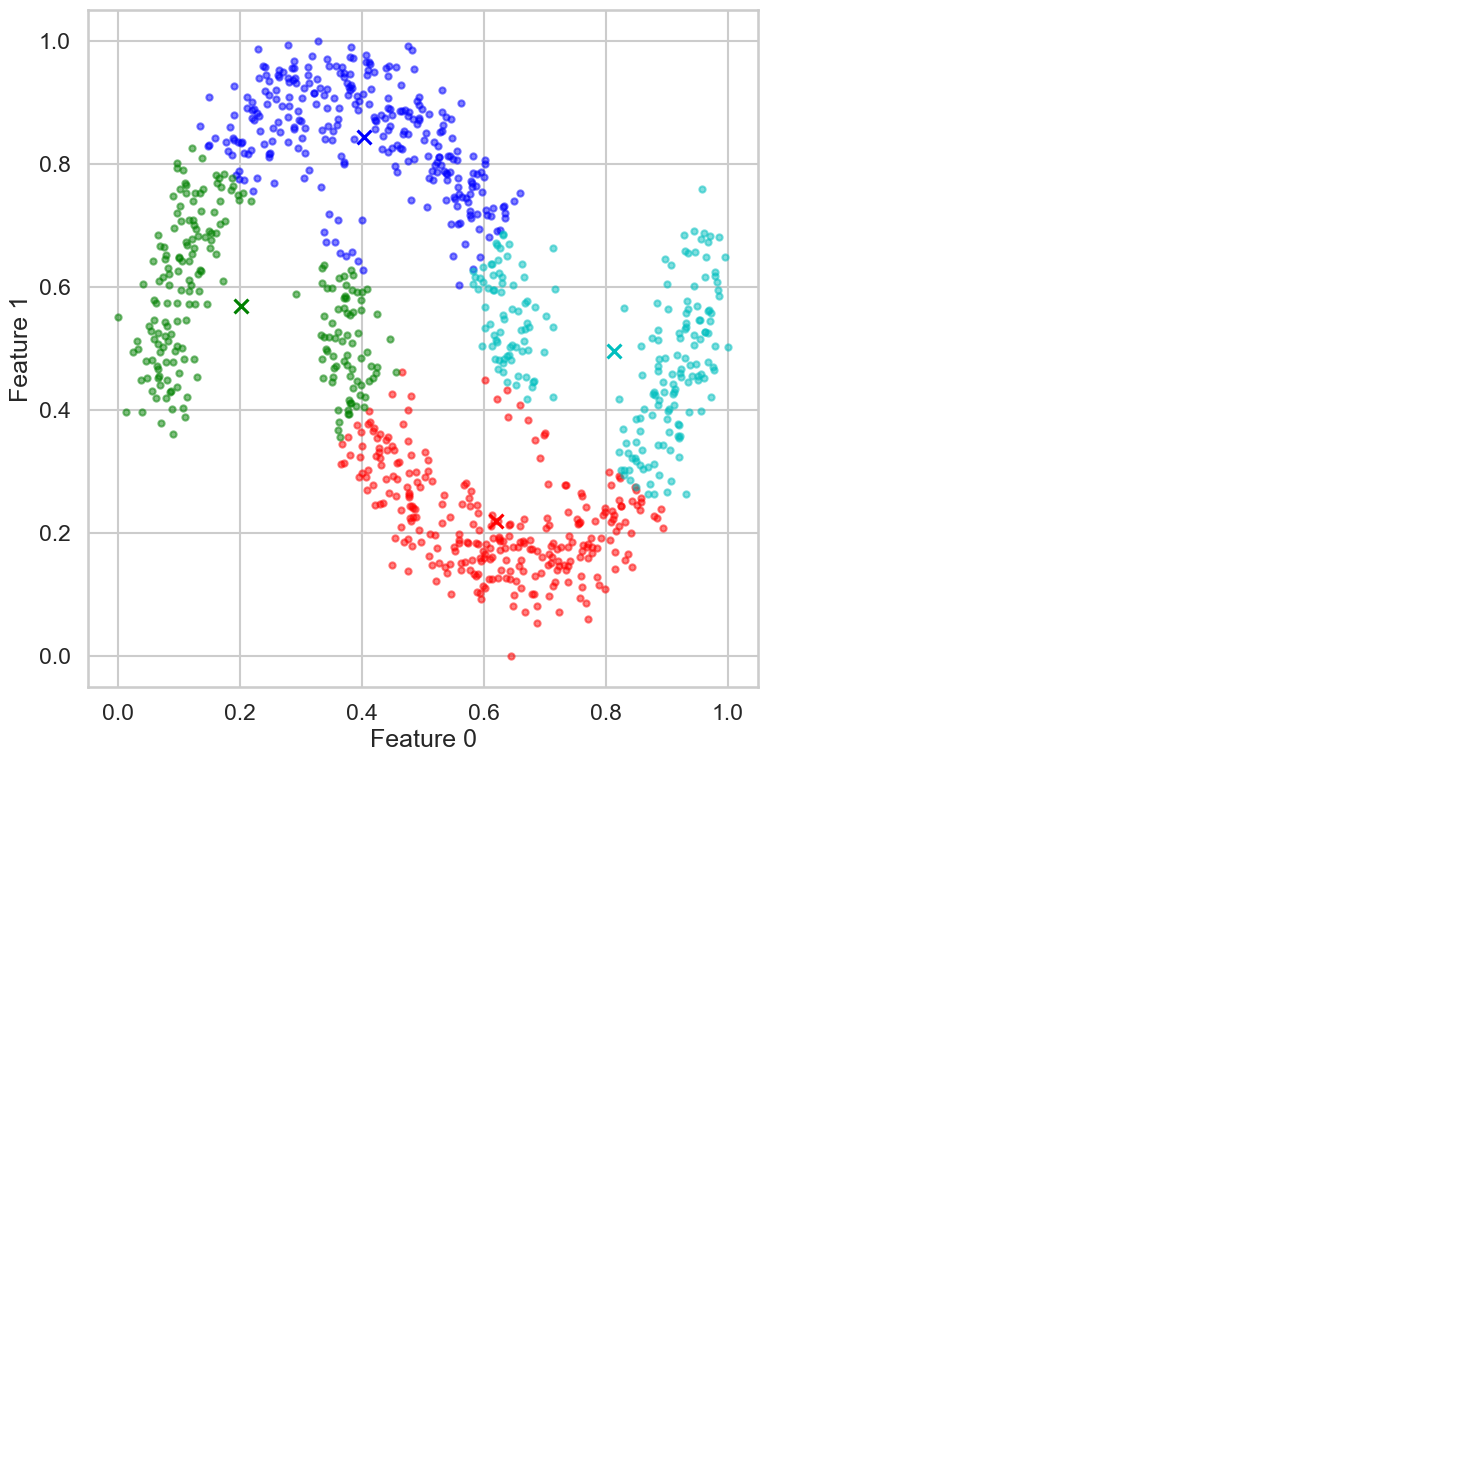

<Figure size 800x800 with 0 Axes>

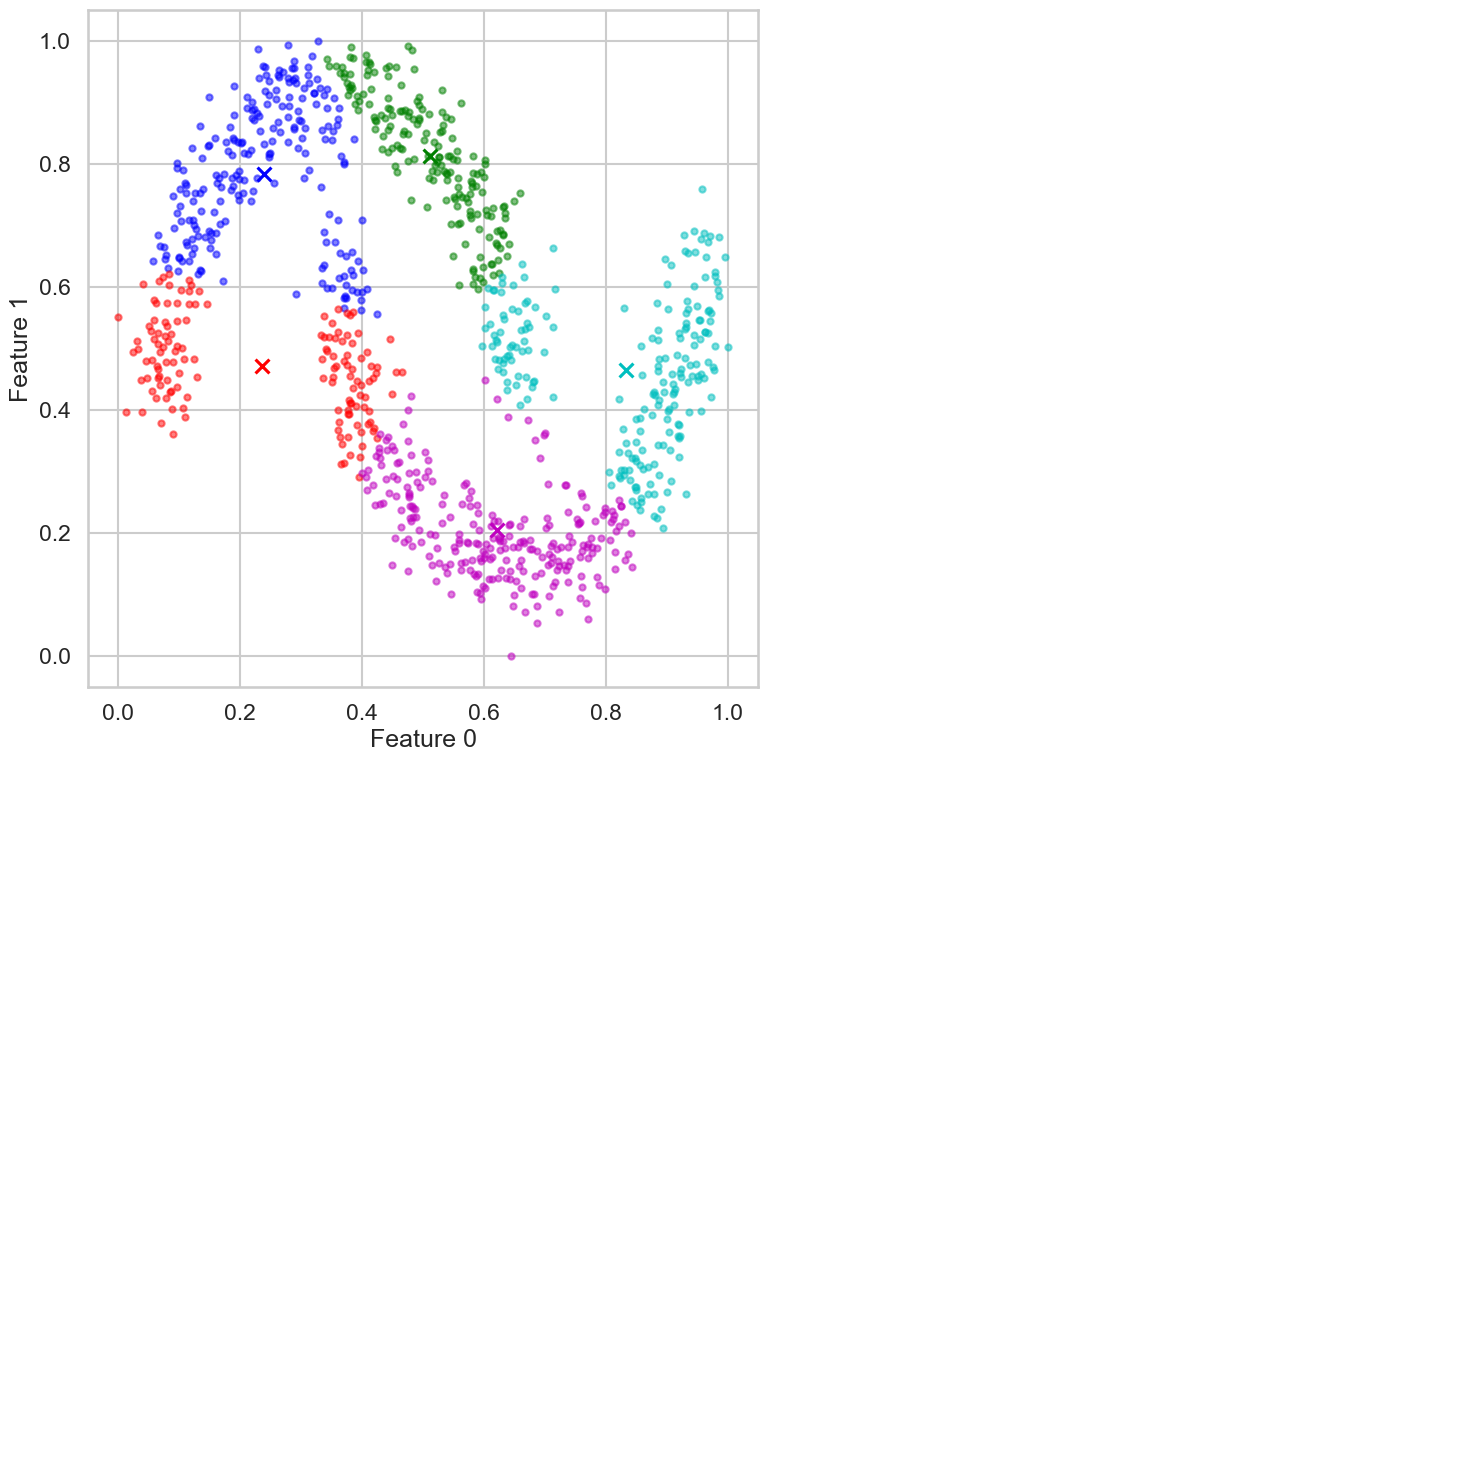

<Figure size 800x800 with 0 Axes>

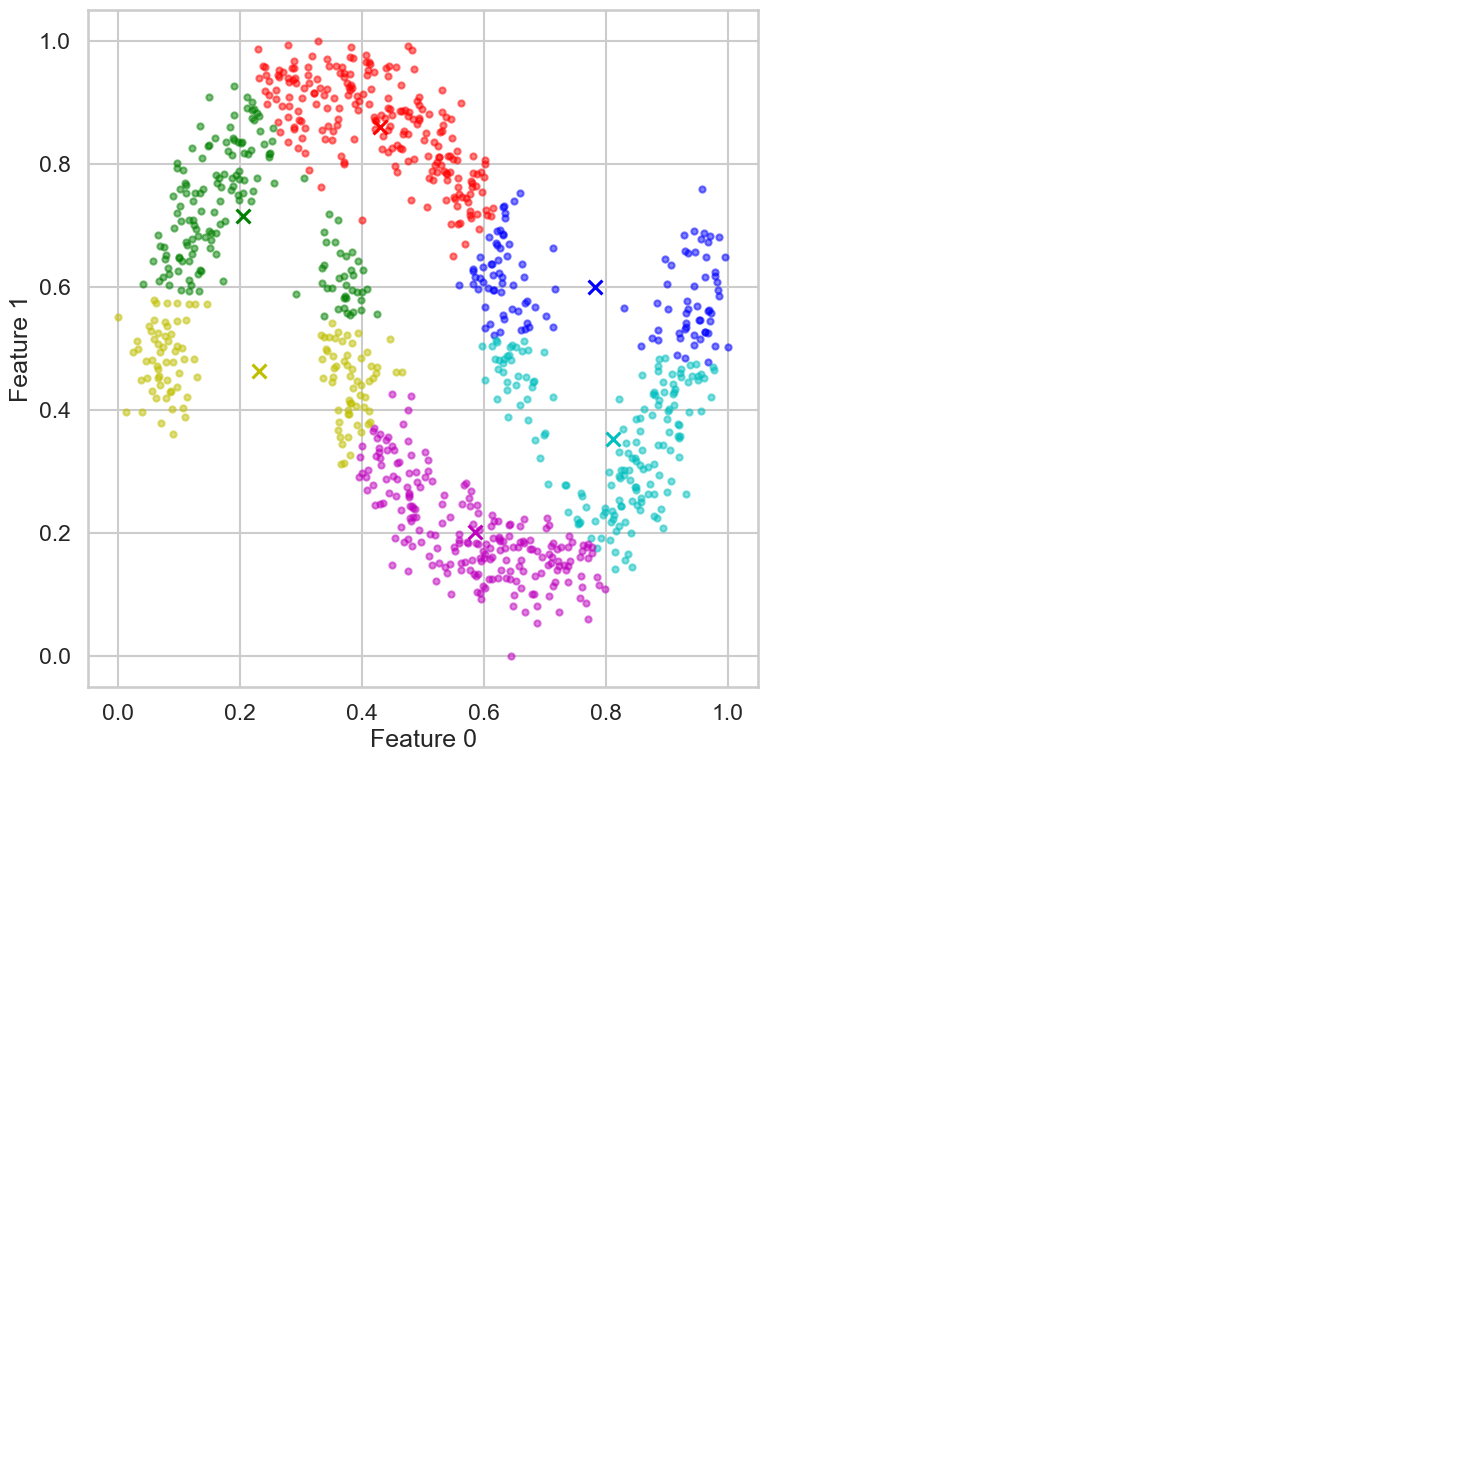

<Figure size 800x800 with 0 Axes>

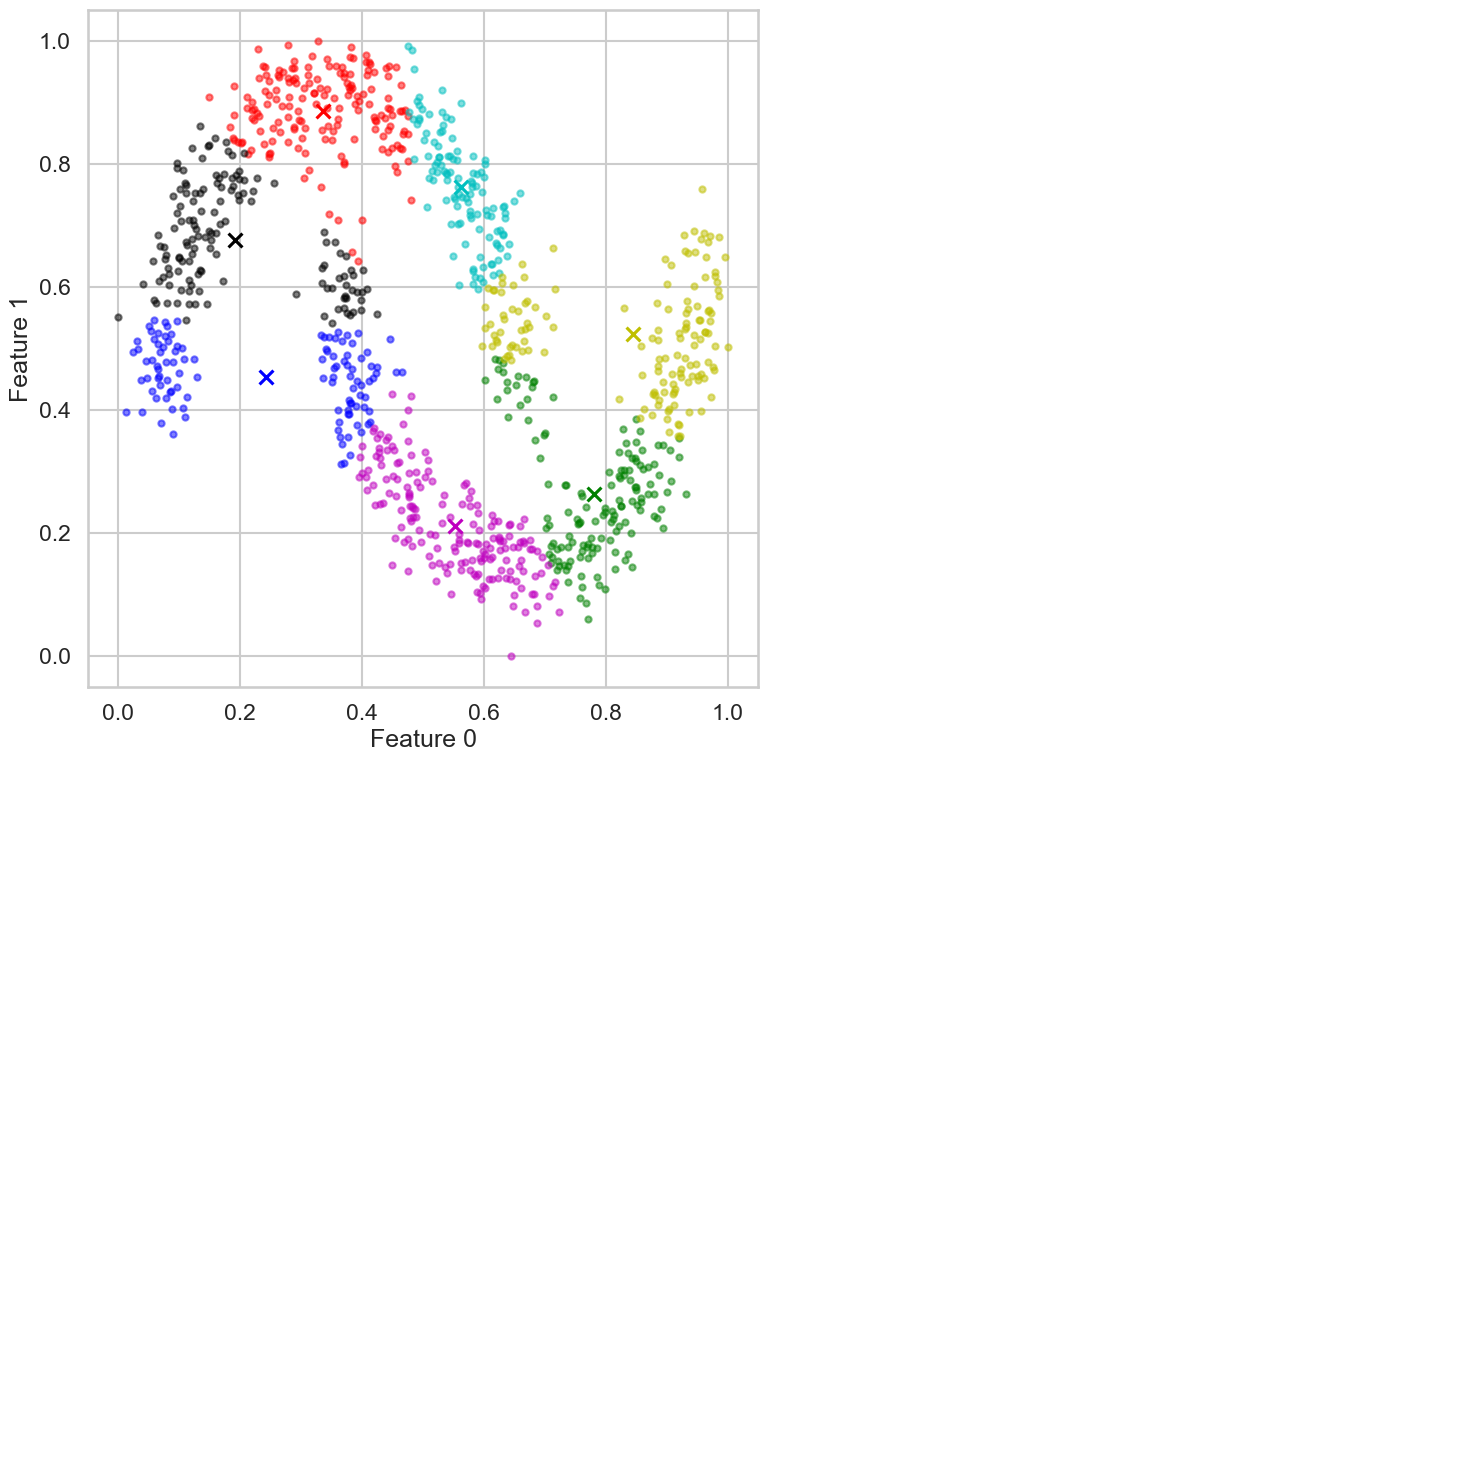

<Figure size 800x800 with 0 Axes>

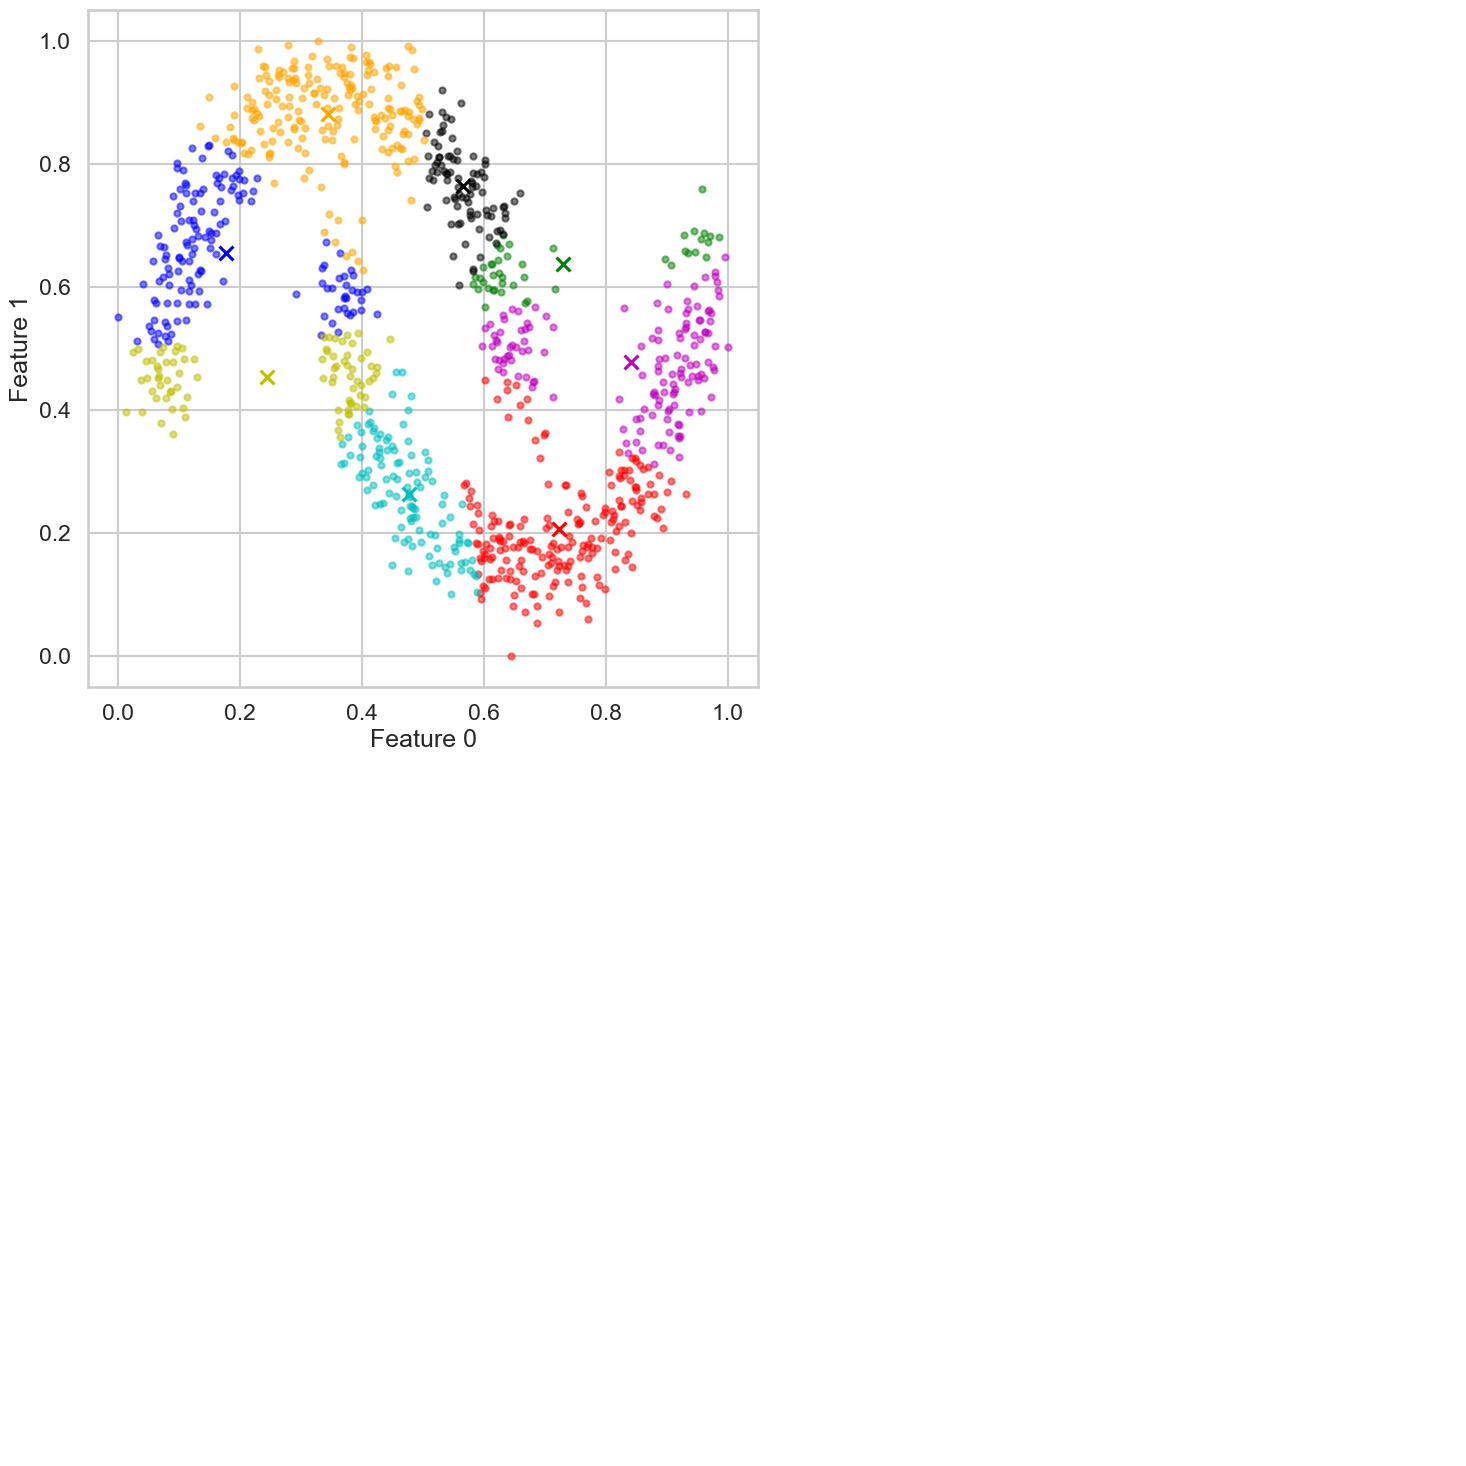

<Figure size 800x800 with 0 Axes>

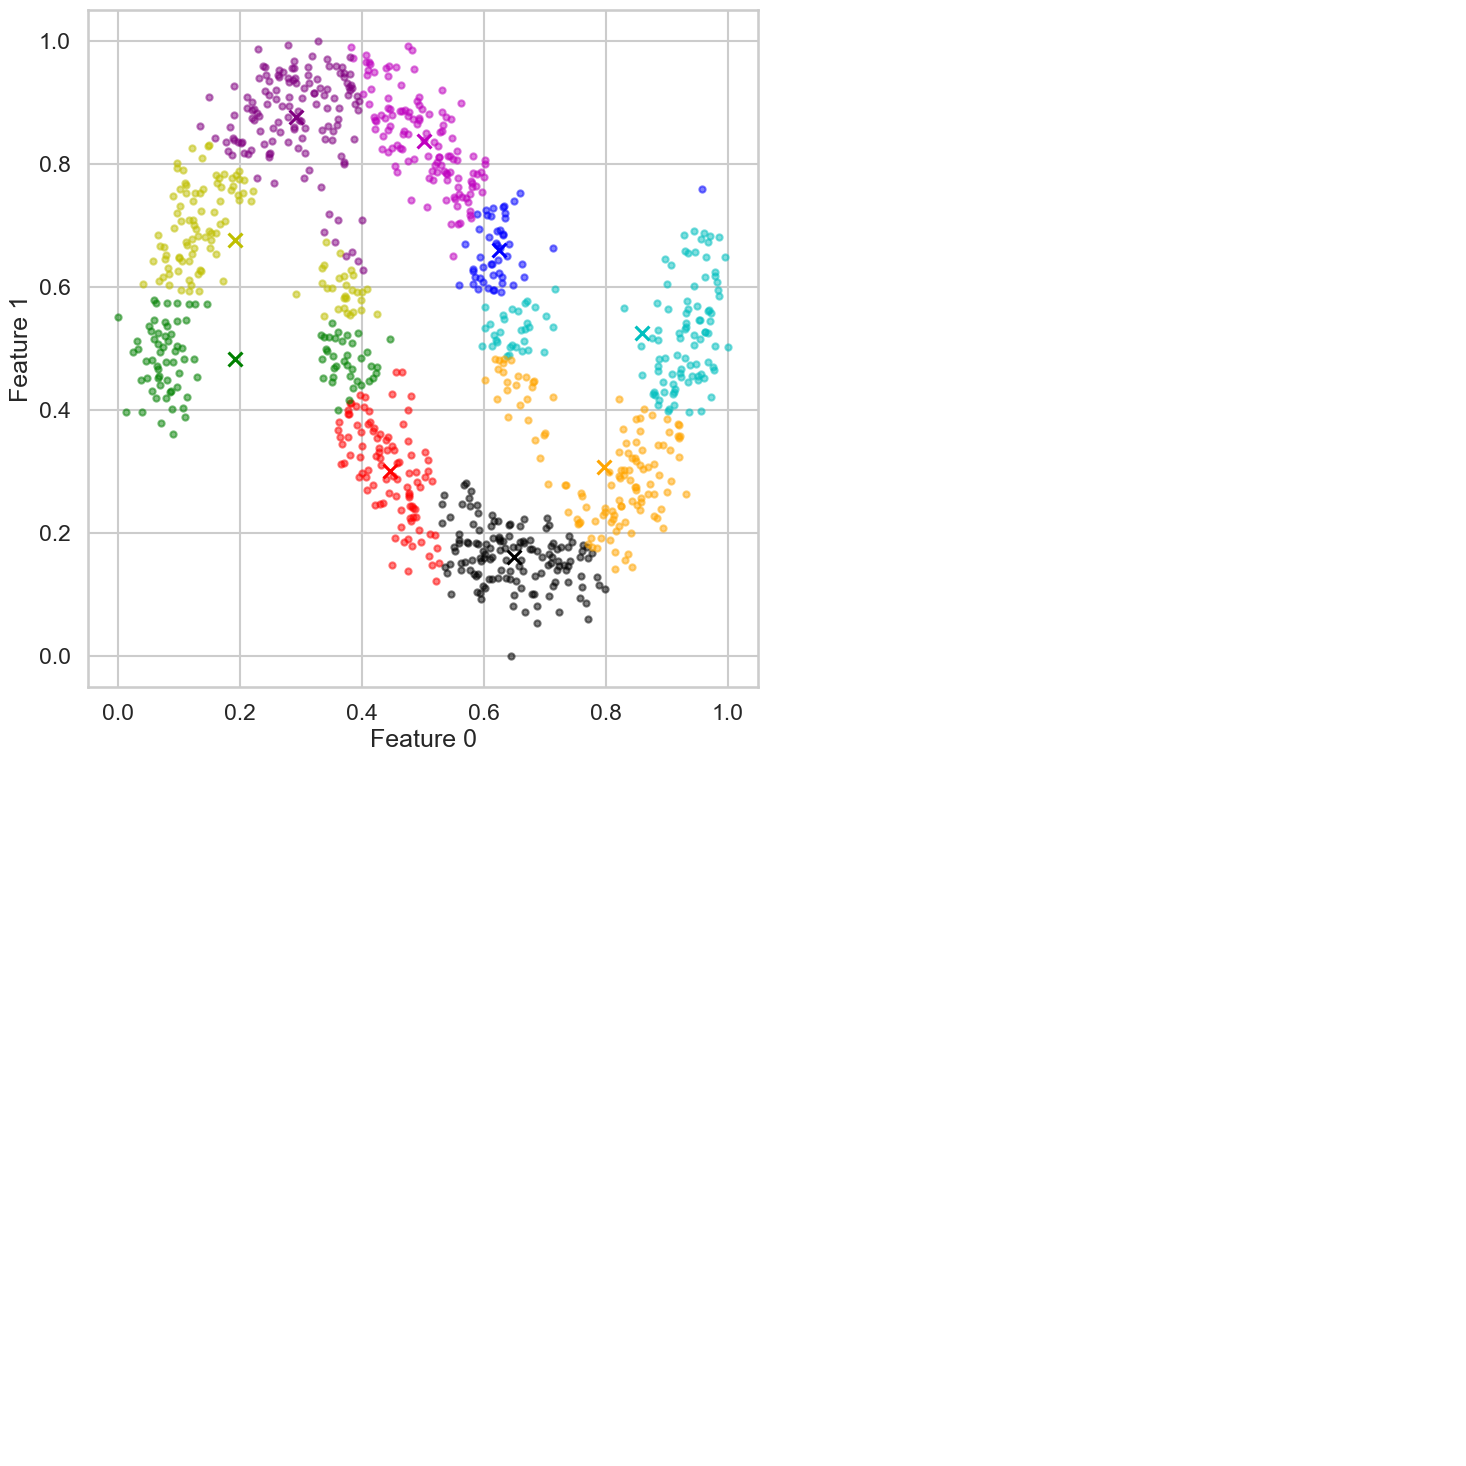

In [261]:
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X)
X1 = pd.DataFrame(X1)

# Set parameters
metric = []
diff_k = []
for i in range(2,10):
    num_clusters = i
    distance_type = 'pearson'

    # Perform KMeans clustering
    final_cluster_distance, cluster_metric = GUC_Kmean(X1, num_clusters, distance_type)
    metric.append(cluster_metric)
    diff_k.append(i)
    # Create a KMeans object for visualization purposes
    km = KMeans(n_clusters=num_clusters)
    km.labels_ = np.argmin(final_cluster_distance, axis=1)
    km.cluster_centers_ = np.array([X1[km.labels_ == i].mean(axis=0) for i in range(num_clusters)])
    
    # Visualize clusters
    plt.figure()
    display_cluster(X1.values, km=km, num_clusters=num_clusters)

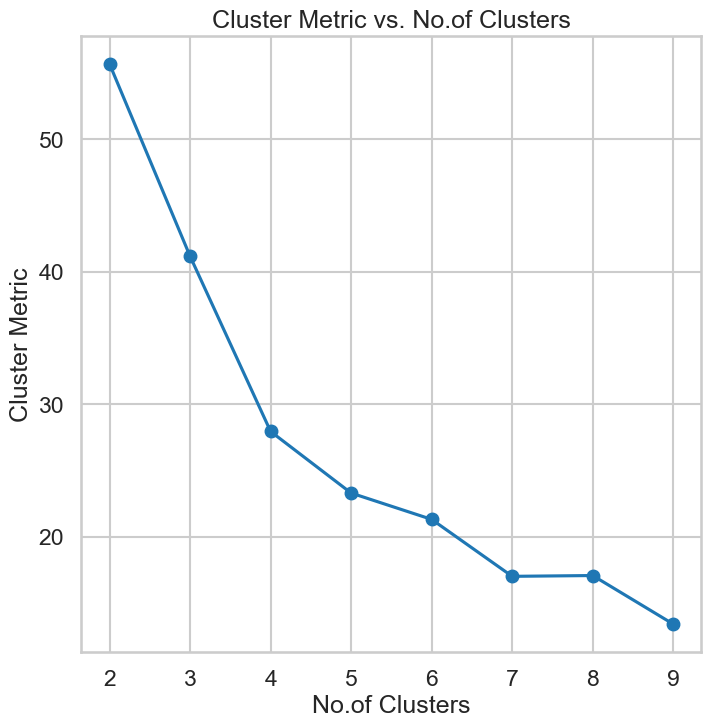

In [262]:
# Plot the graph
plt.plot(diff_k, metric, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('No.of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. No.of Clusters')

# Show the plot
plt.show()

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

<Figure size 800x800 with 0 Axes>

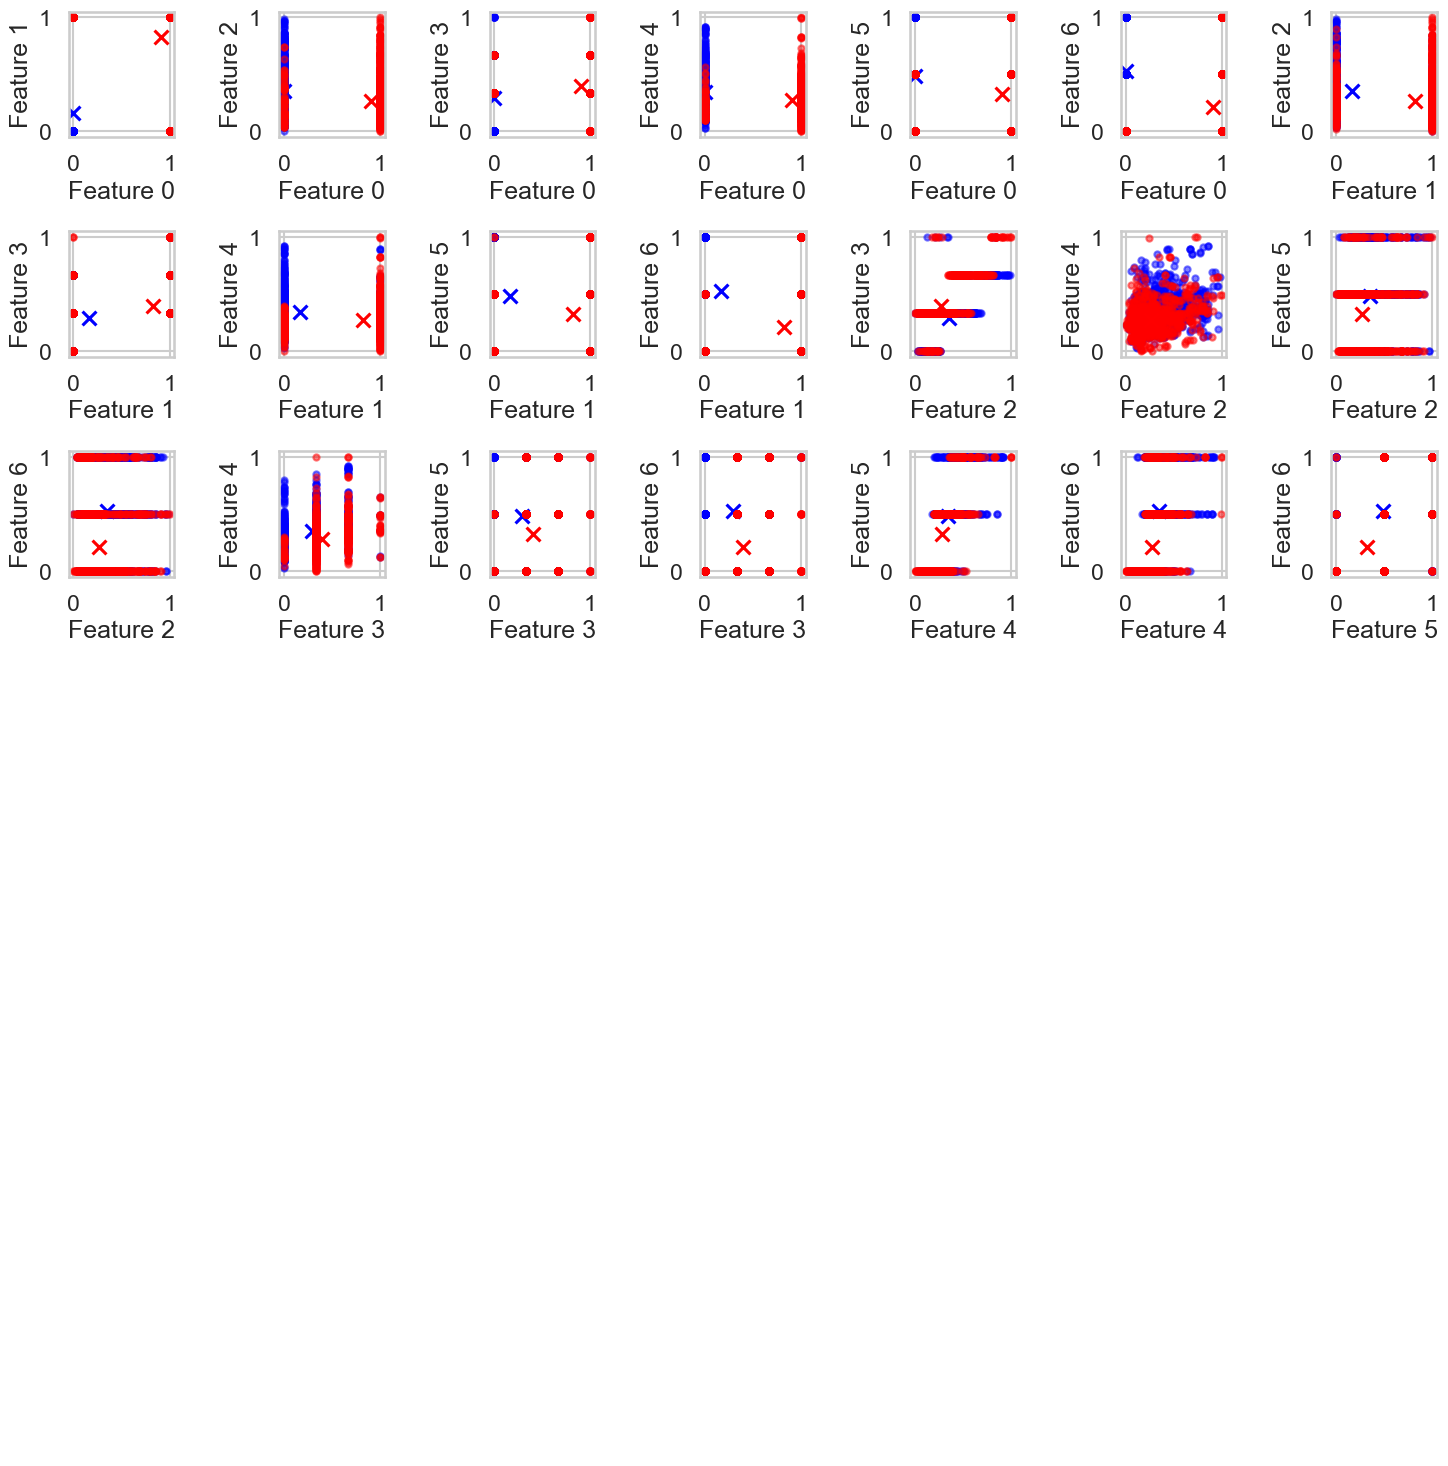

<Figure size 800x800 with 0 Axes>

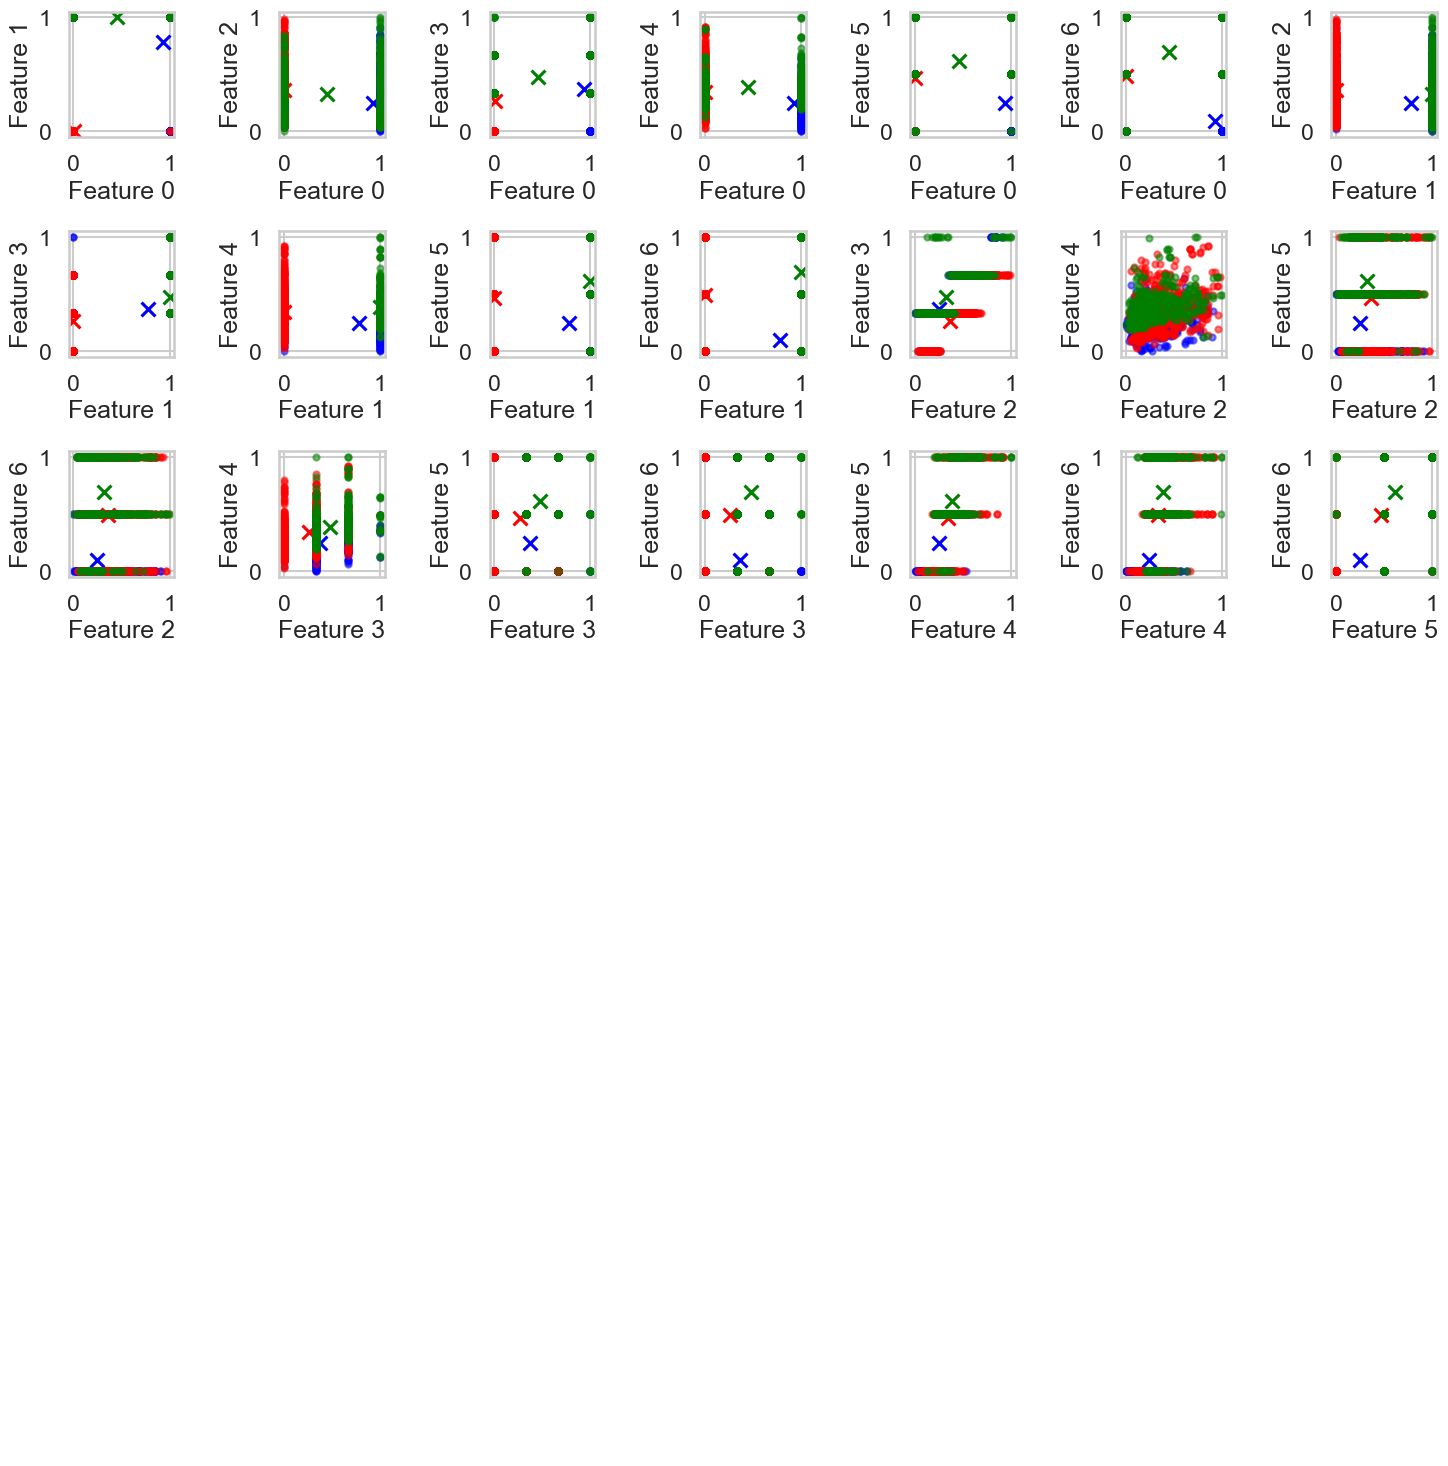

<Figure size 800x800 with 0 Axes>

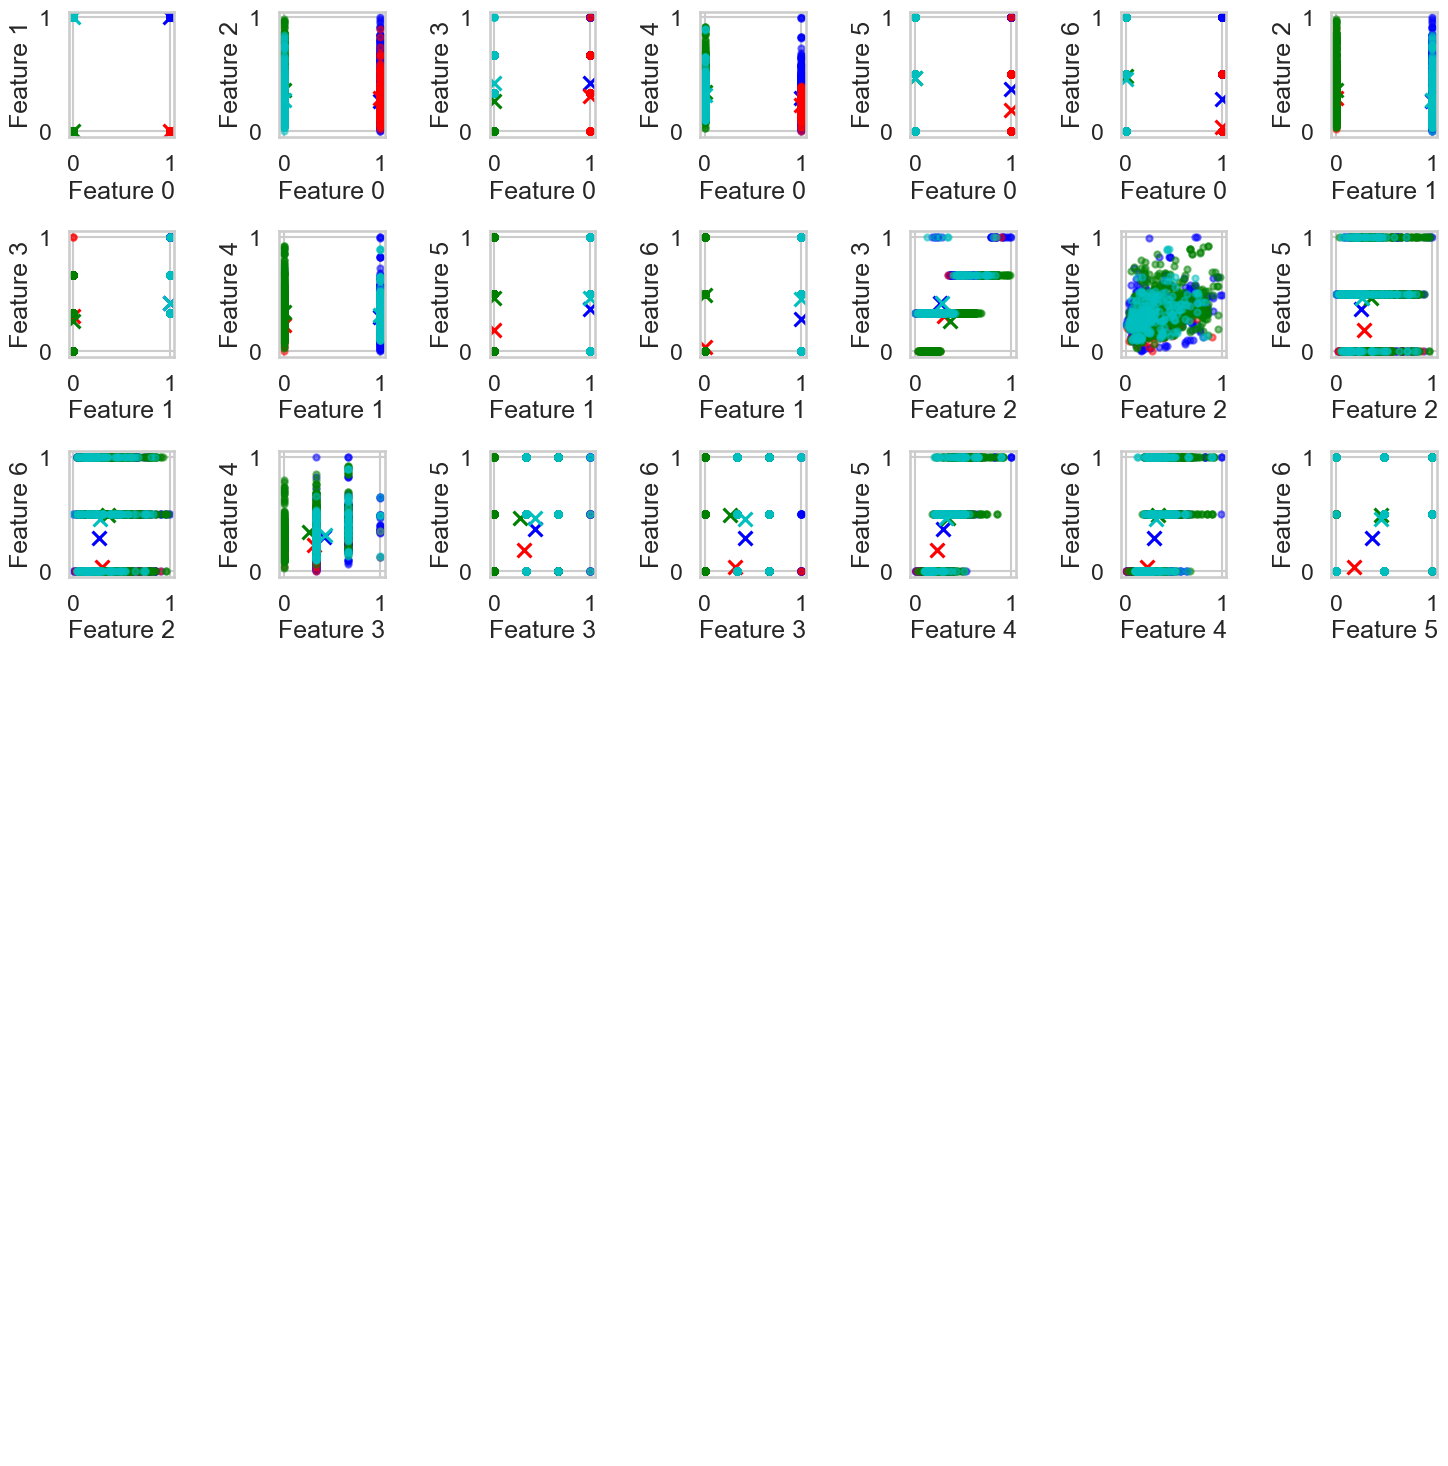

<Figure size 800x800 with 0 Axes>

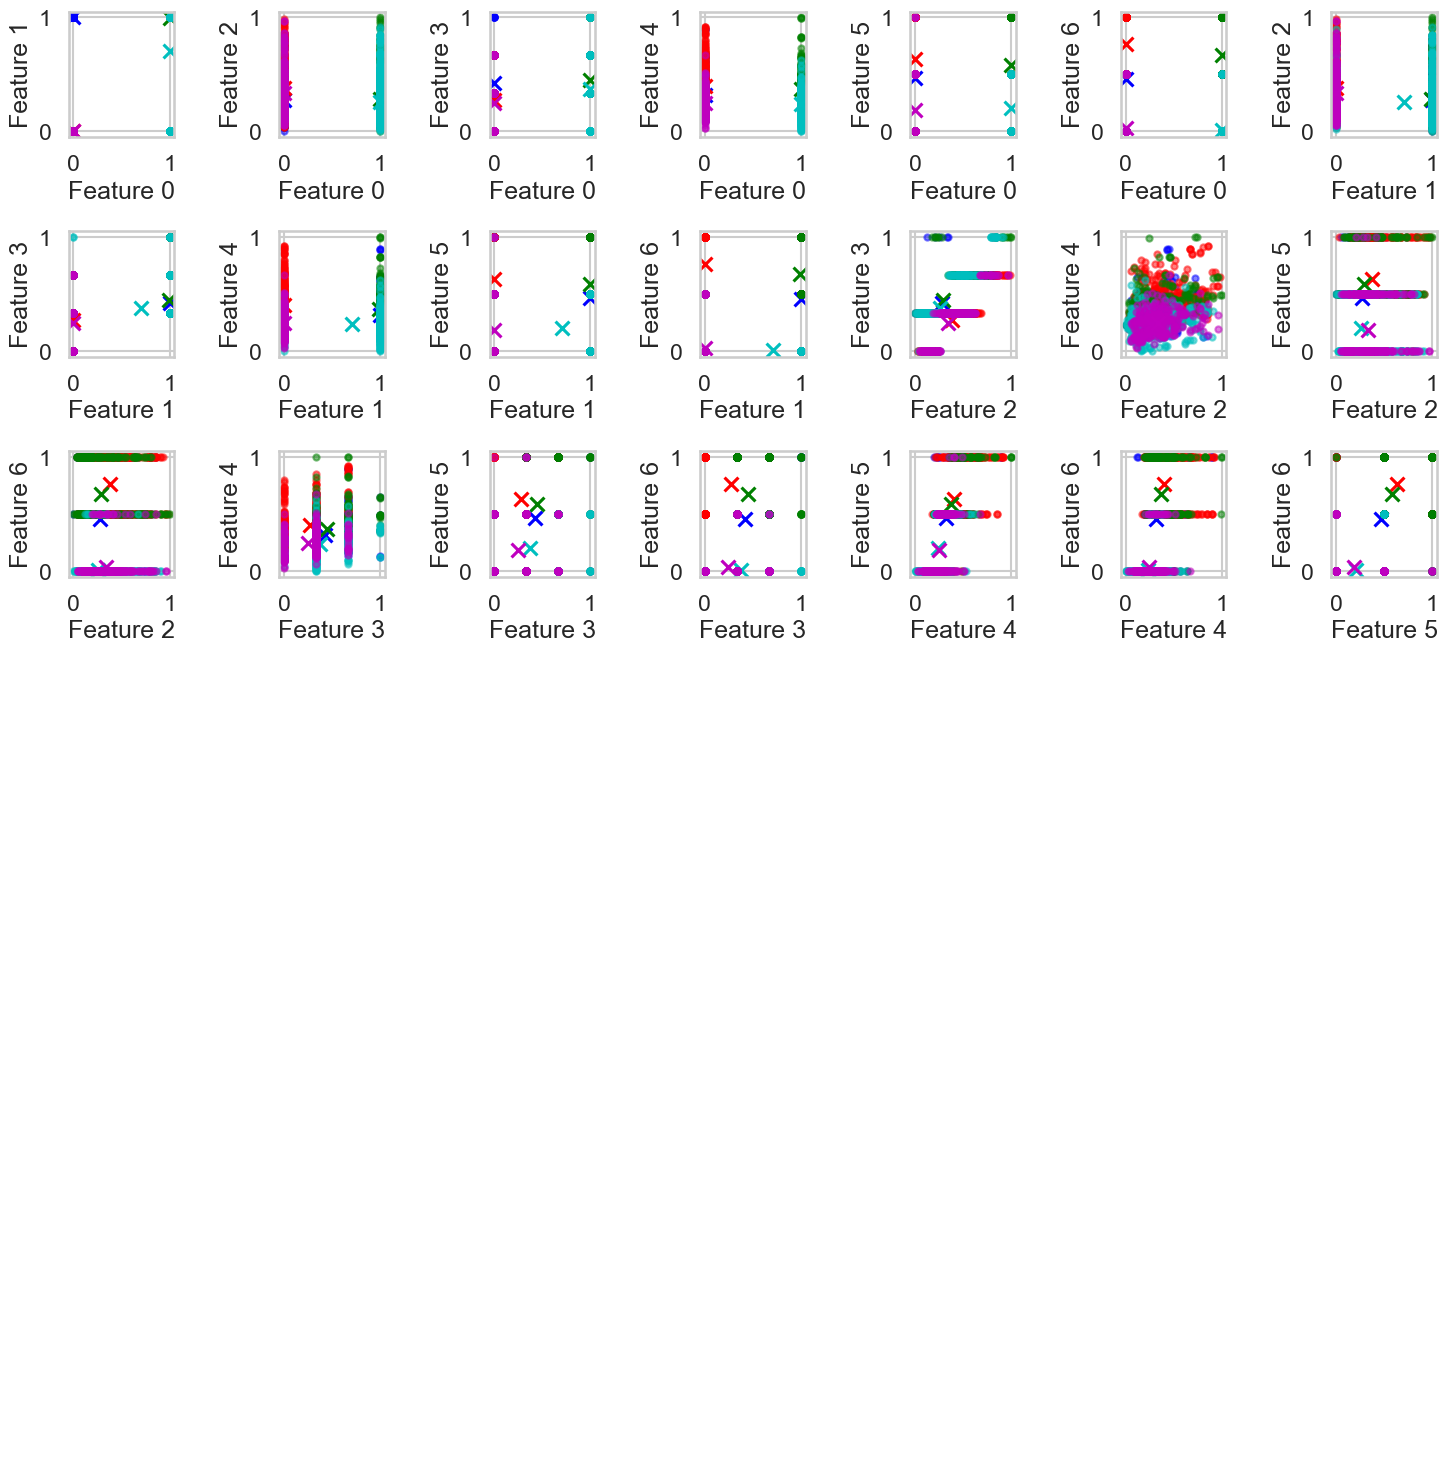

<Figure size 800x800 with 0 Axes>

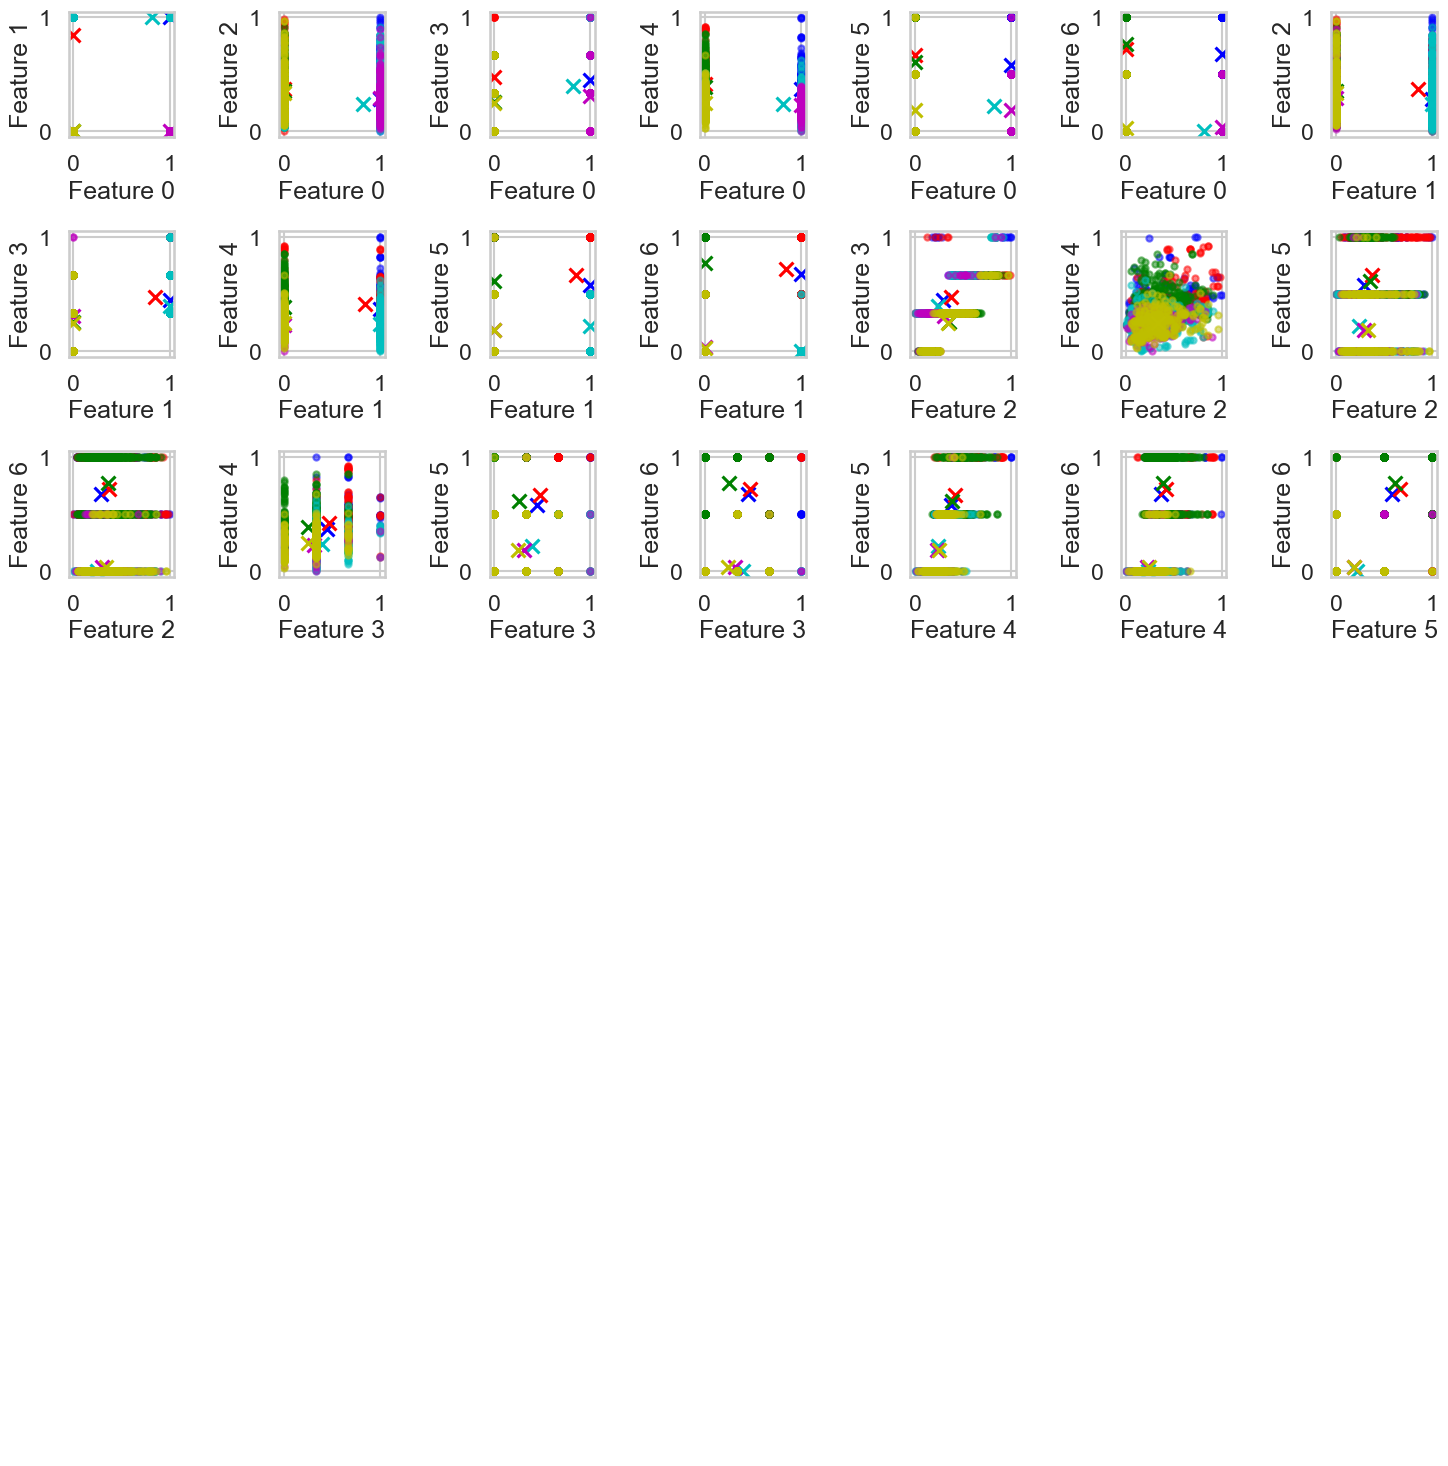

<Figure size 800x800 with 0 Axes>

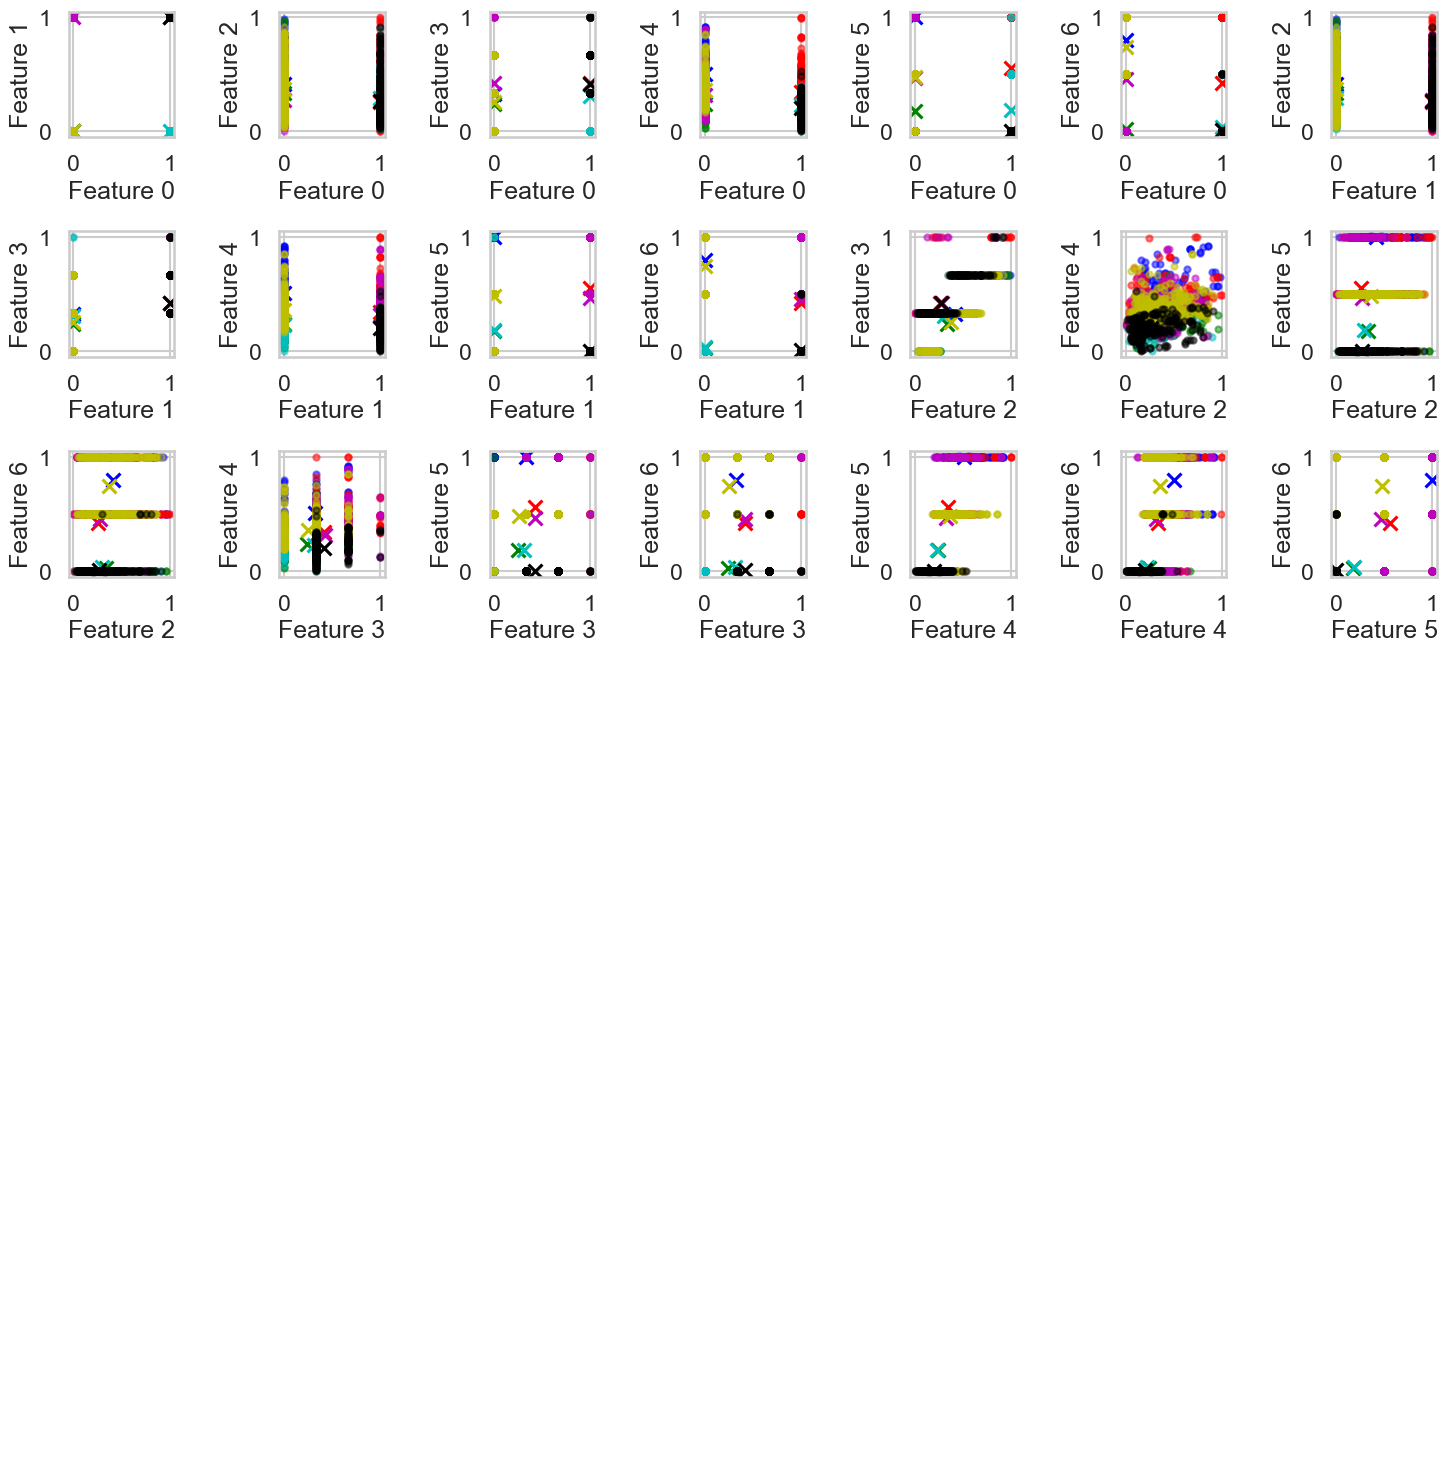

<Figure size 800x800 with 0 Axes>

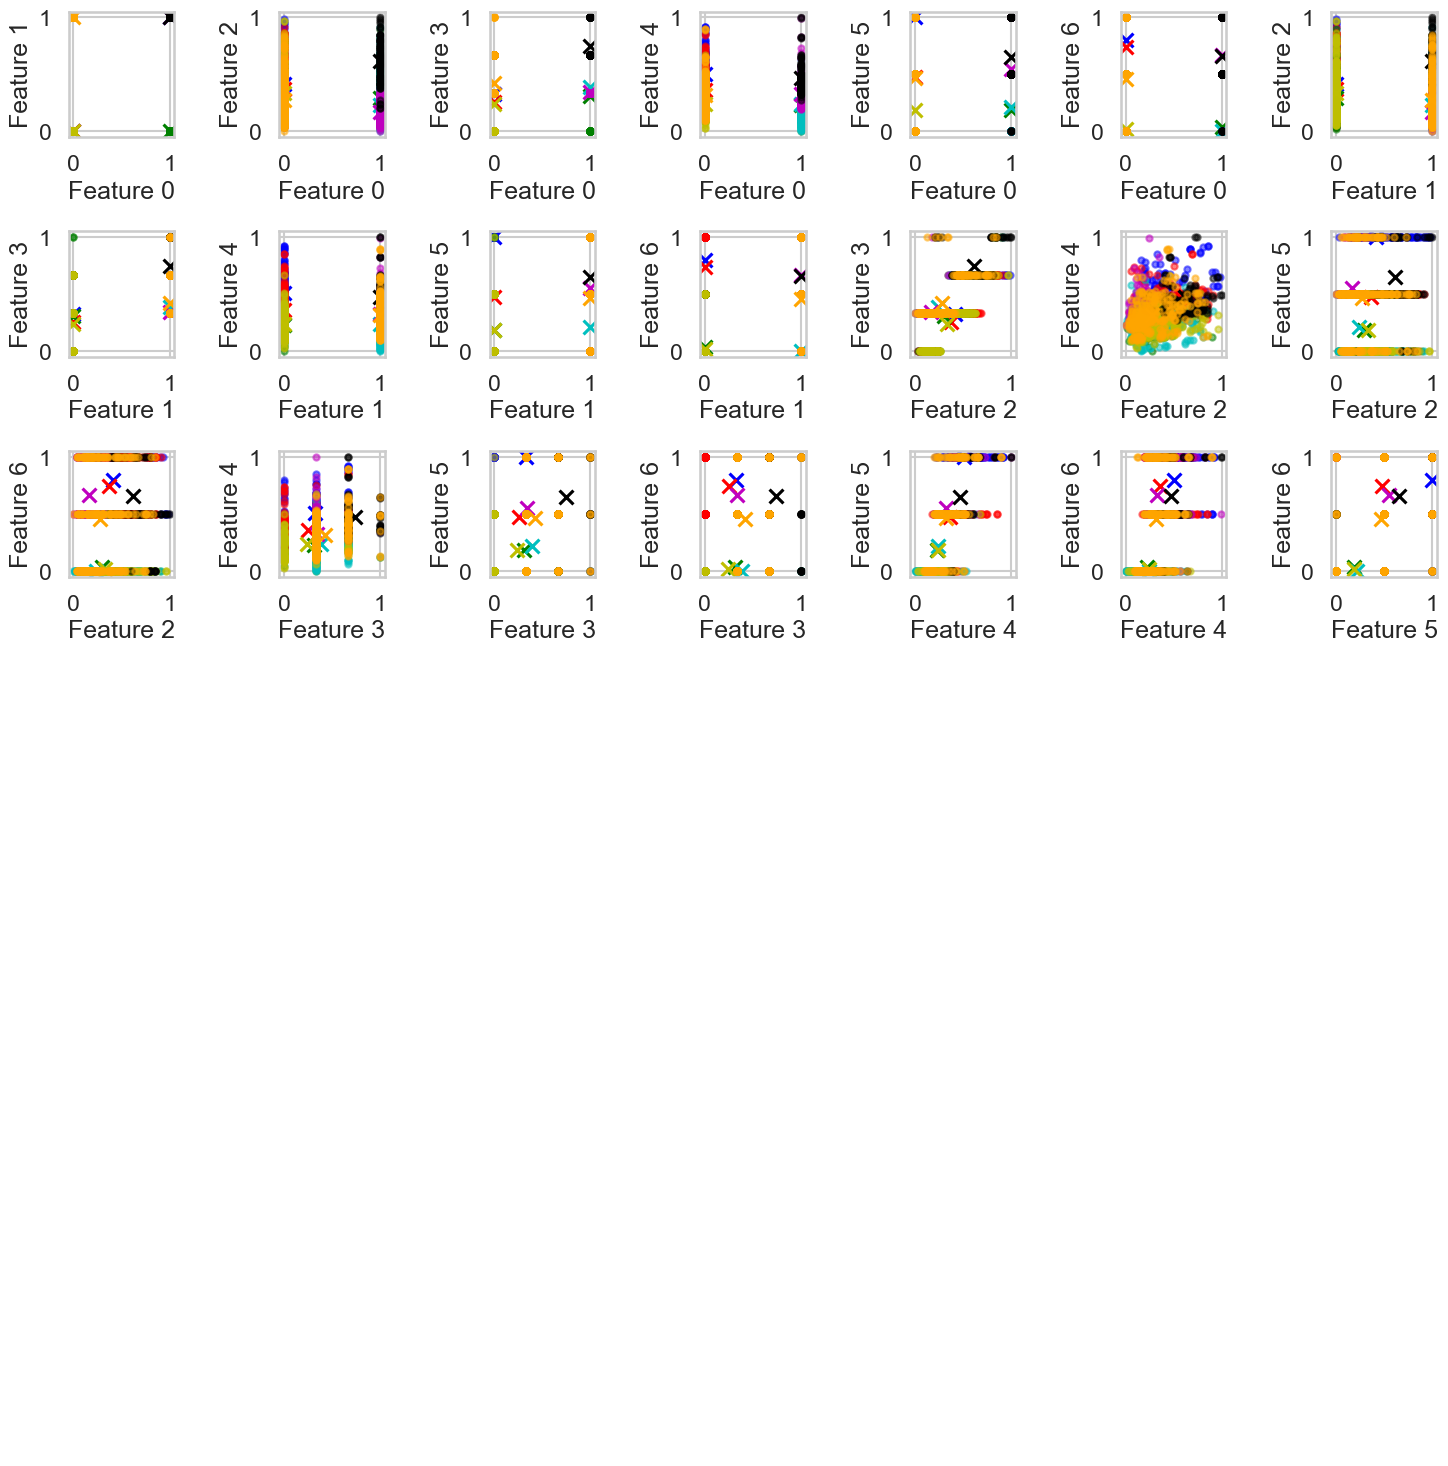

<Figure size 800x800 with 0 Axes>

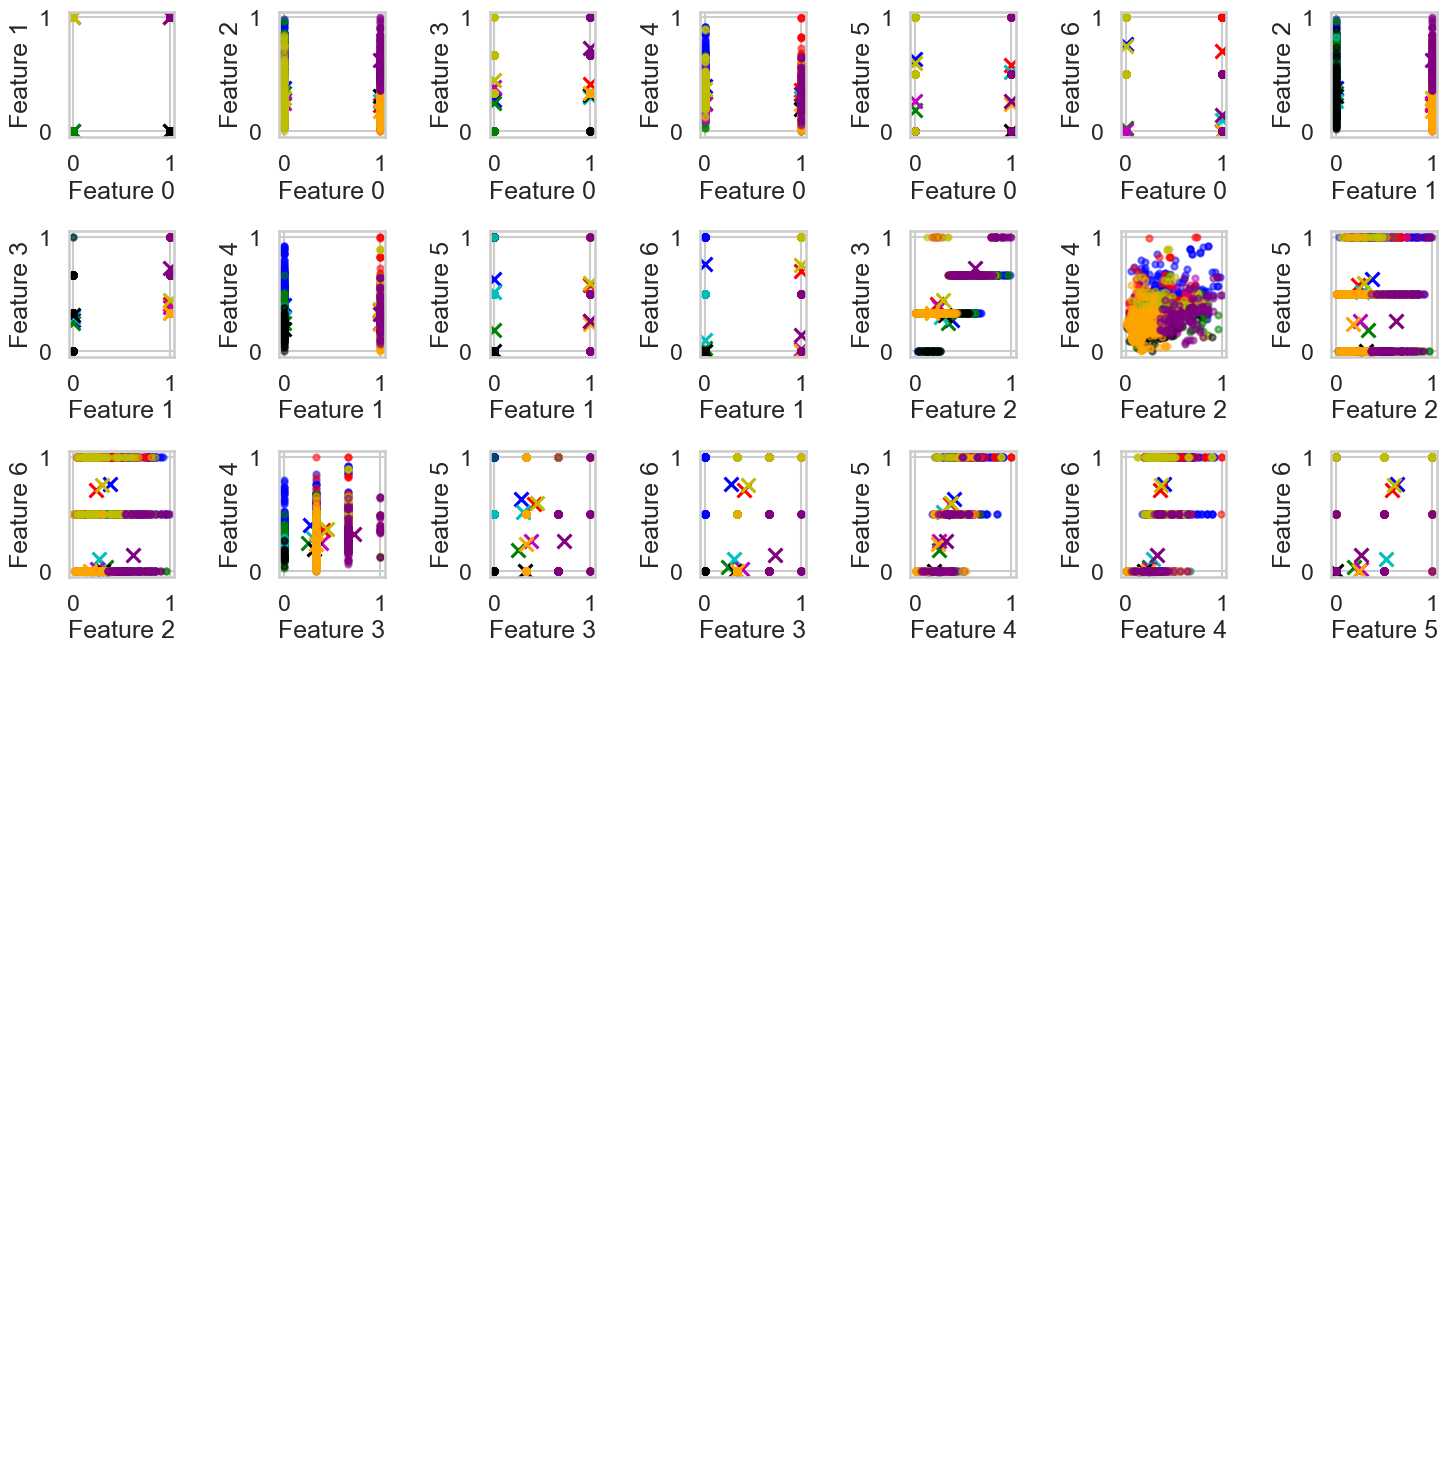

In [233]:
X1 = df2
# Set parameters
metric = []
diff_k = []
for i in range(2,10):
    num_clusters = i
    distance_type = 'euclidean'

    # Perform KMeans clustering
    final_cluster_distance, cluster_metric = GUC_Kmean(X1, num_clusters, distance_type)
    metric.append(cluster_metric)
    diff_k.append(i)
    # Create a KMeans object for visualization purposes
    km = KMeans(n_clusters=num_clusters)
    km.labels_ = np.argmin(final_cluster_distance, axis=1)
    km.cluster_centers_ = np.array([X1[km.labels_ == i].mean(axis=0) for i in range(num_clusters)])
    
    # Visualize clusters
    plt.figure()
    display_cluster(X1.values, km=km, num_clusters=num_clusters)

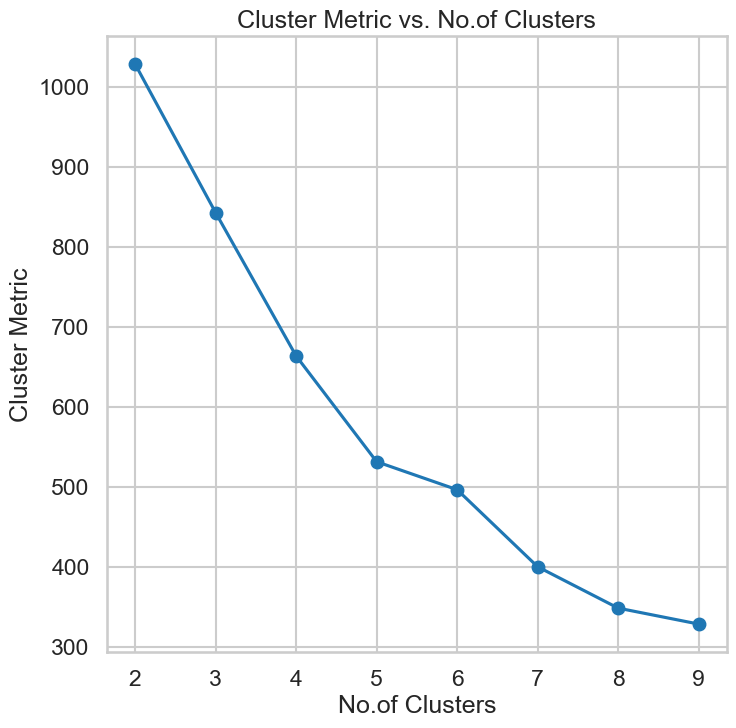

In [234]:
# Plot the graph
plt.plot(diff_k, metric, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('No.of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. No.of Clusters')

# Show the plot
plt.show()

### 4. pearson

<Figure size 800x800 with 0 Axes>

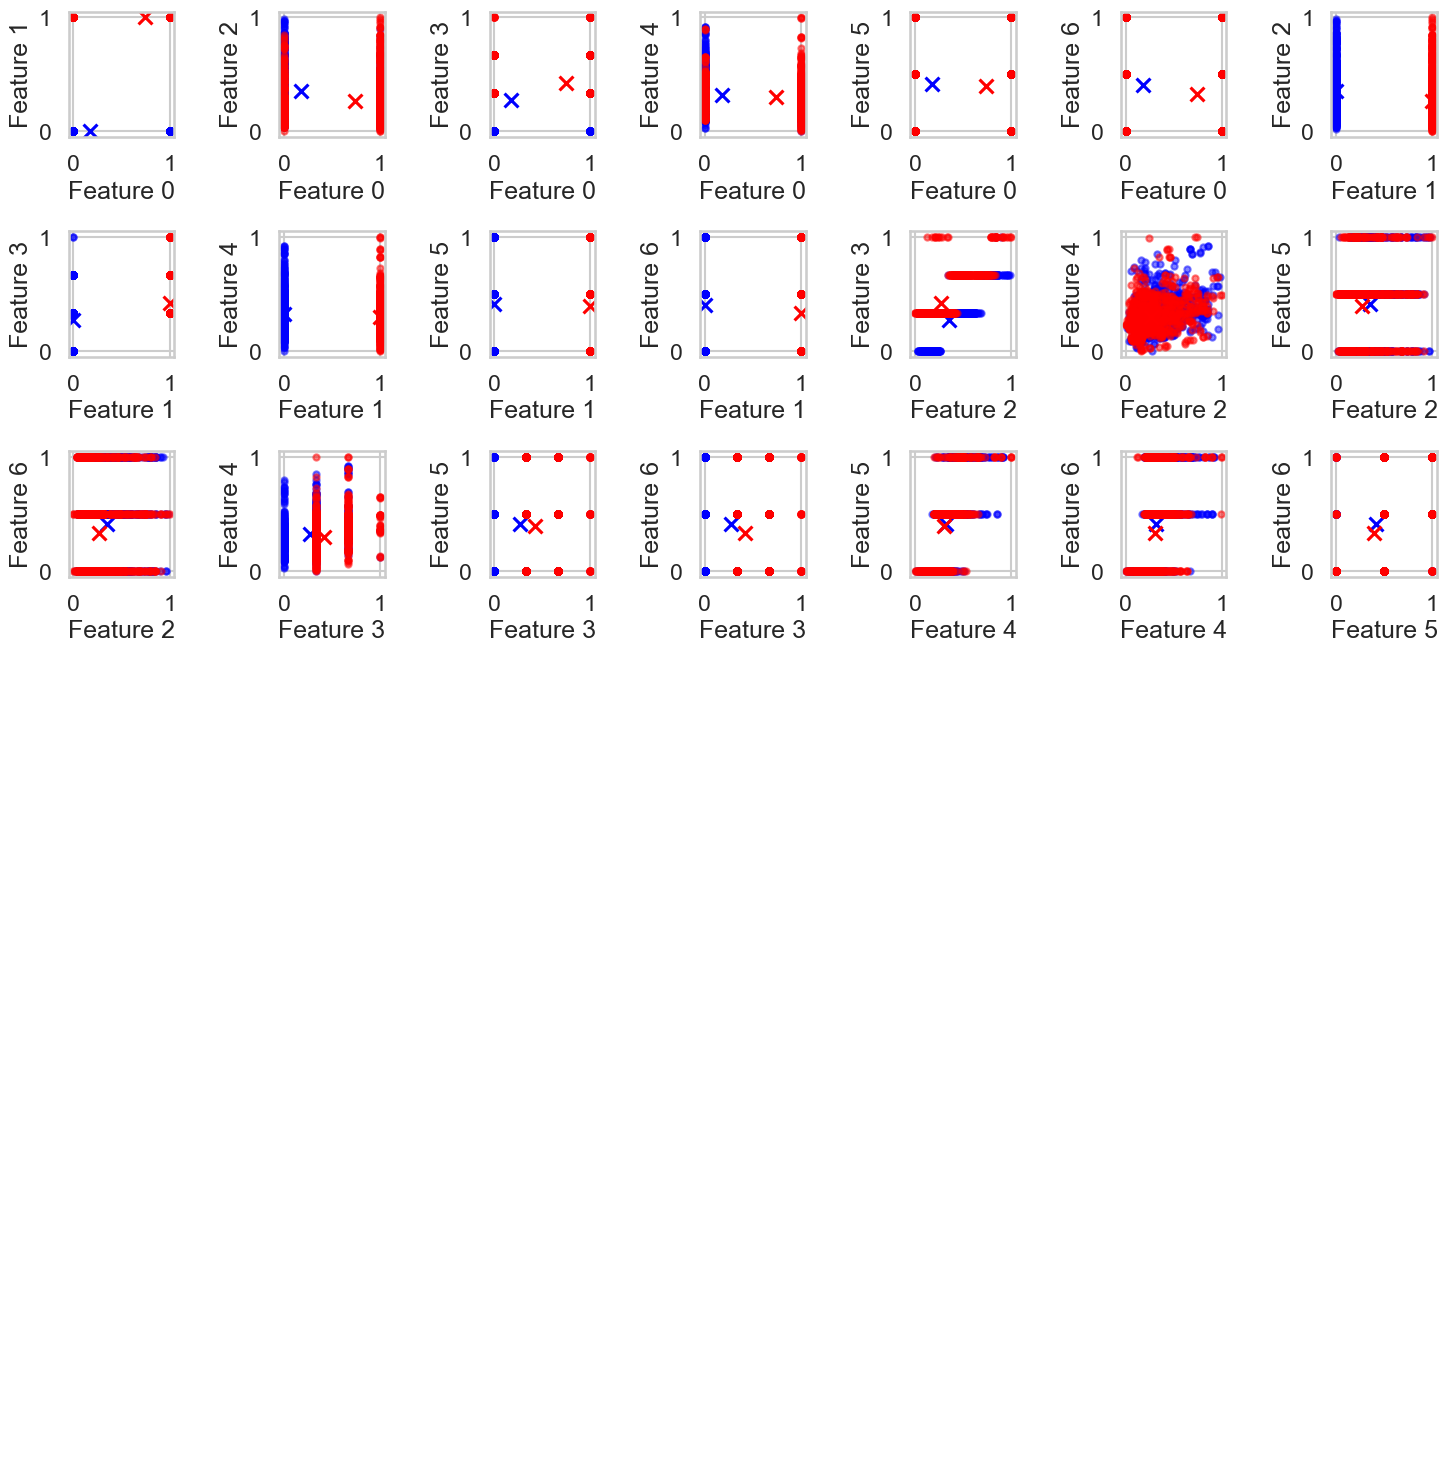

<Figure size 800x800 with 0 Axes>

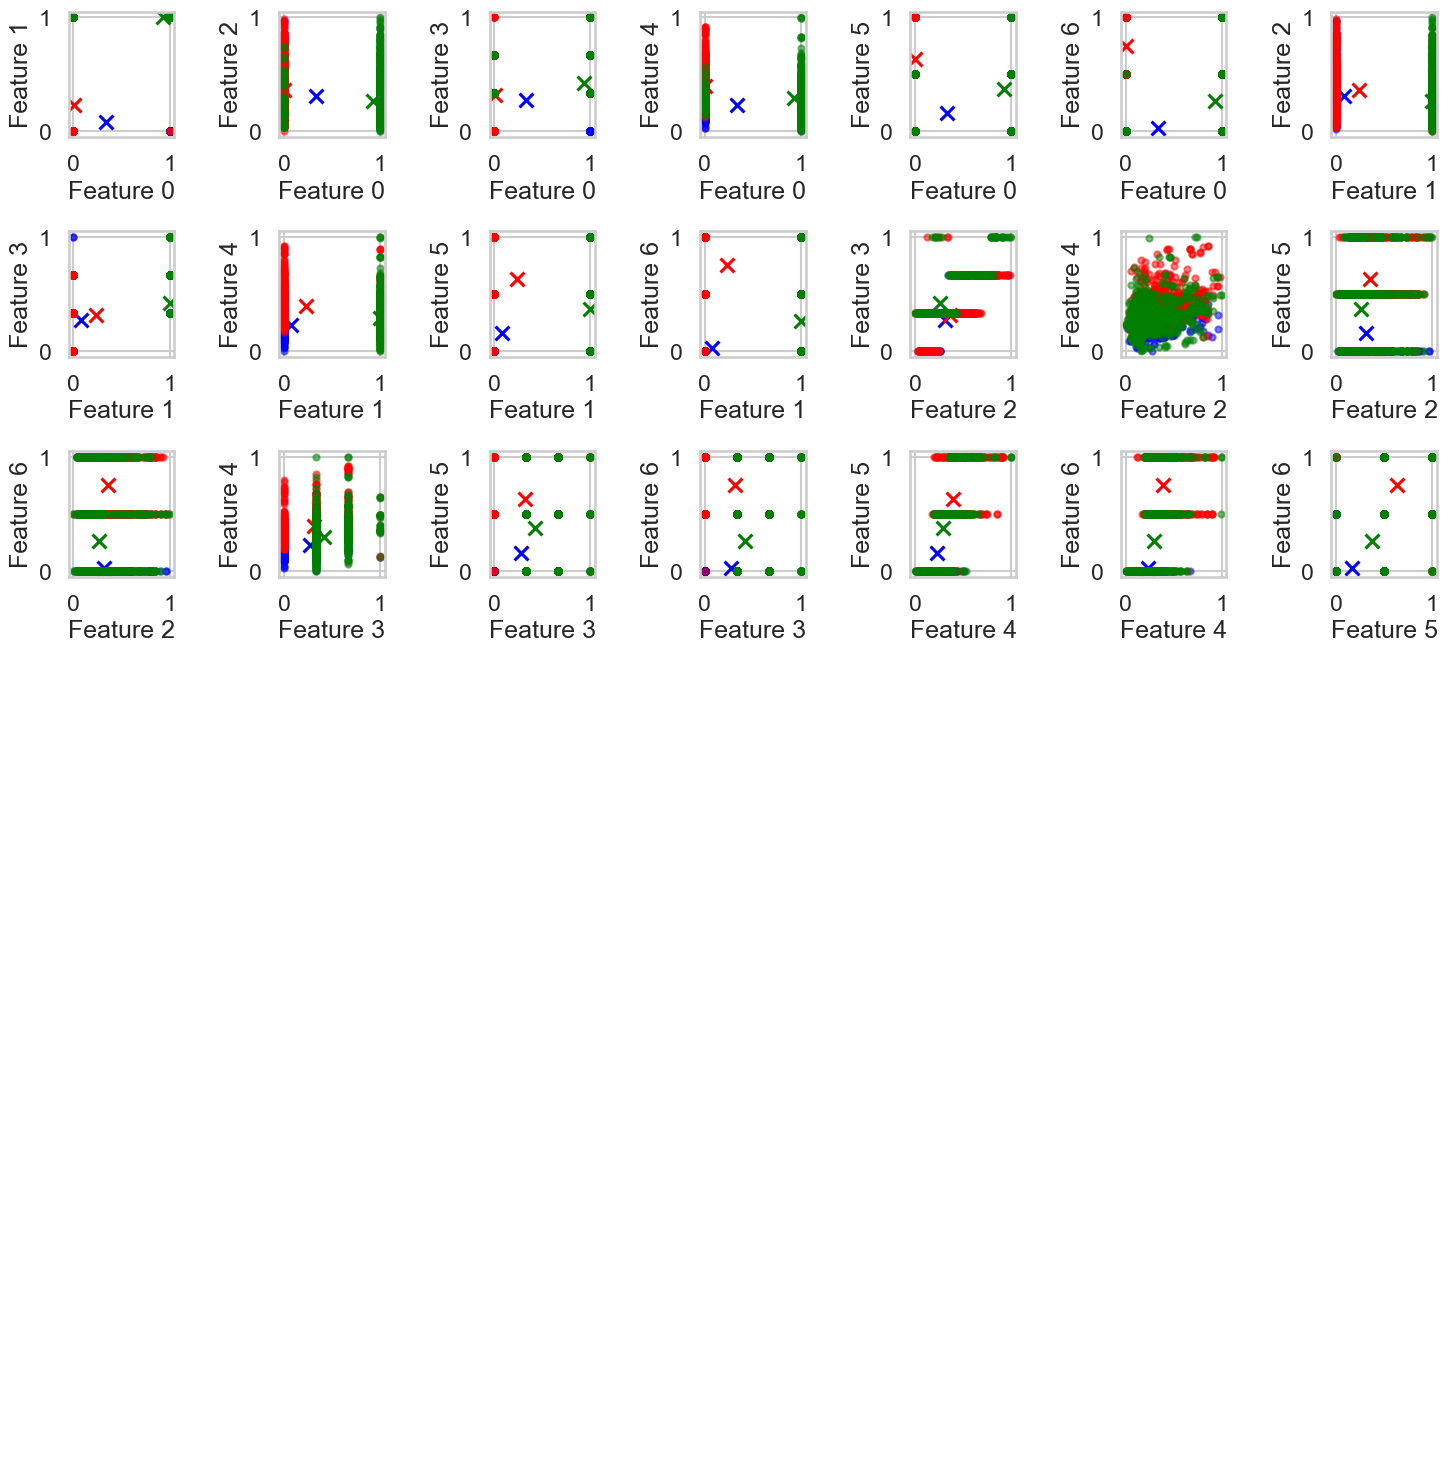

<Figure size 800x800 with 0 Axes>

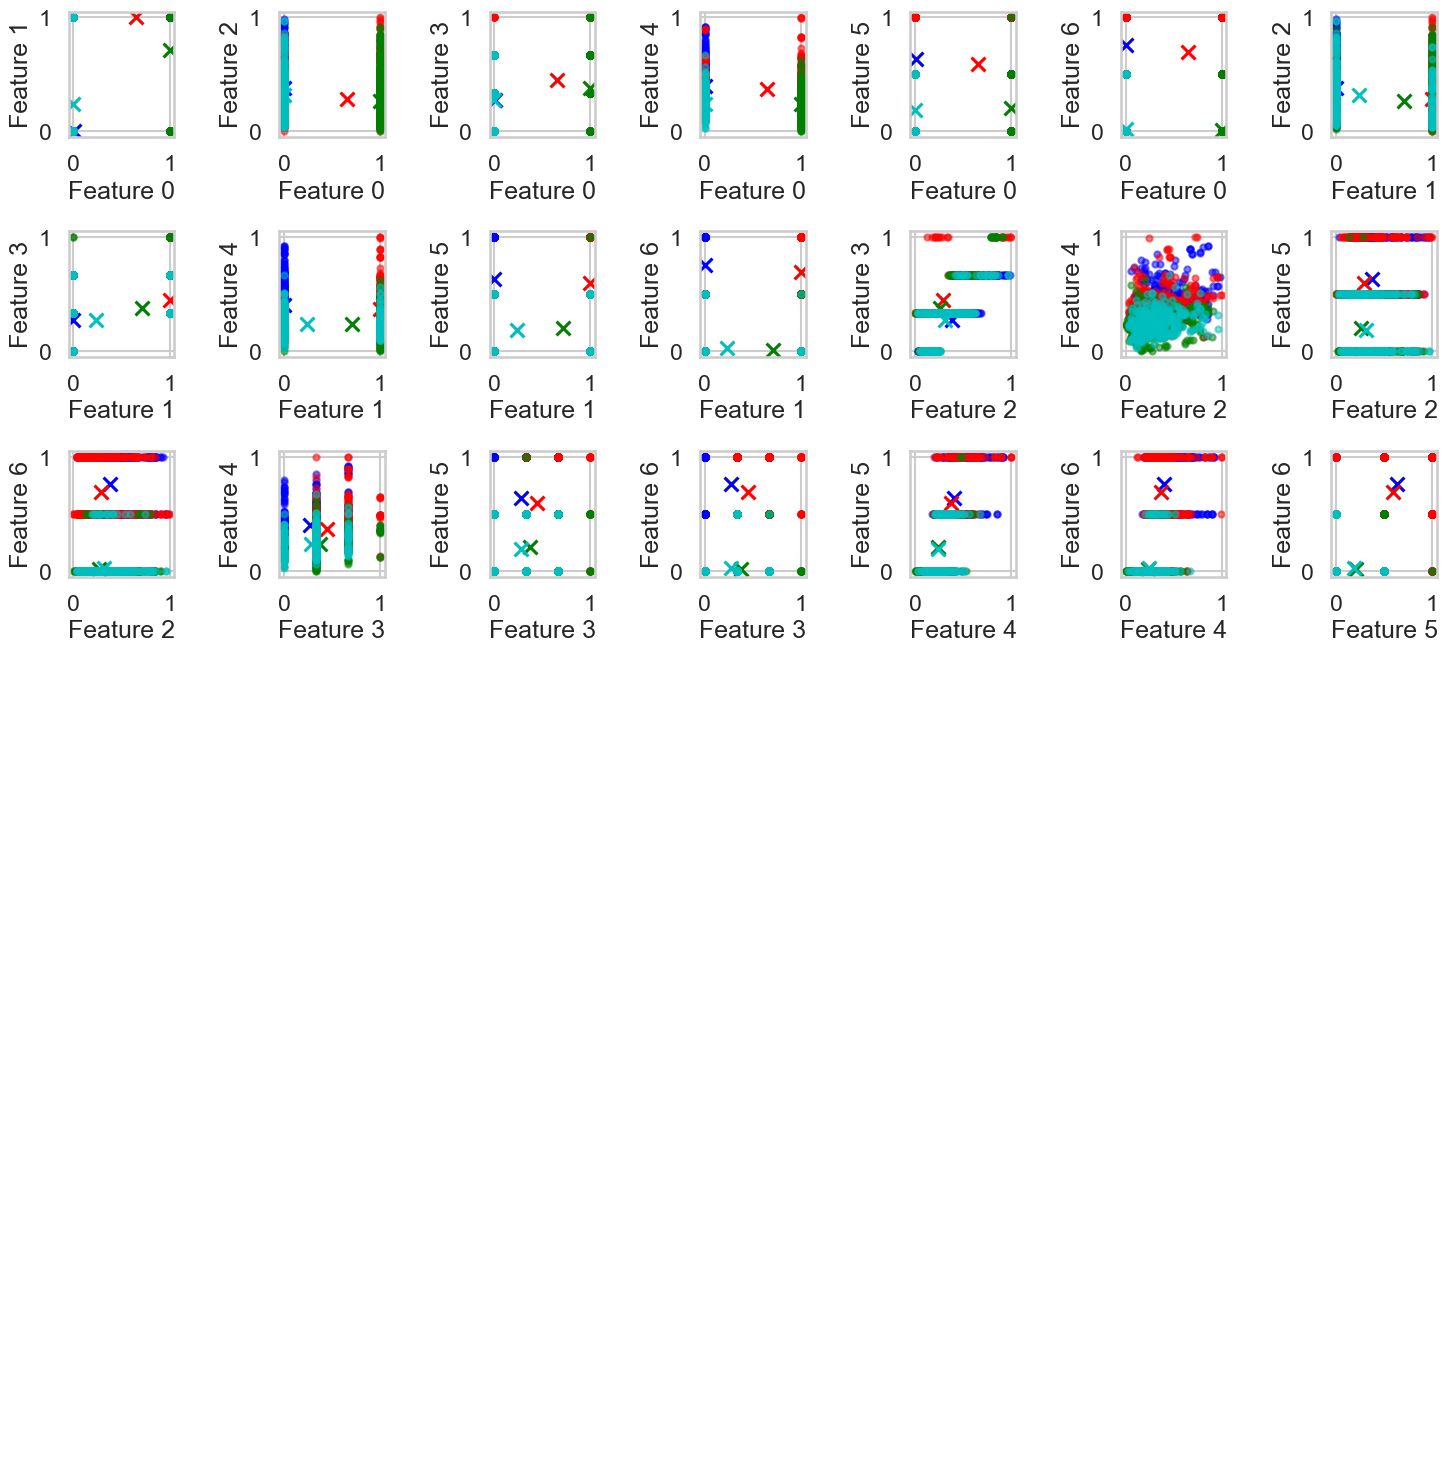

<Figure size 800x800 with 0 Axes>

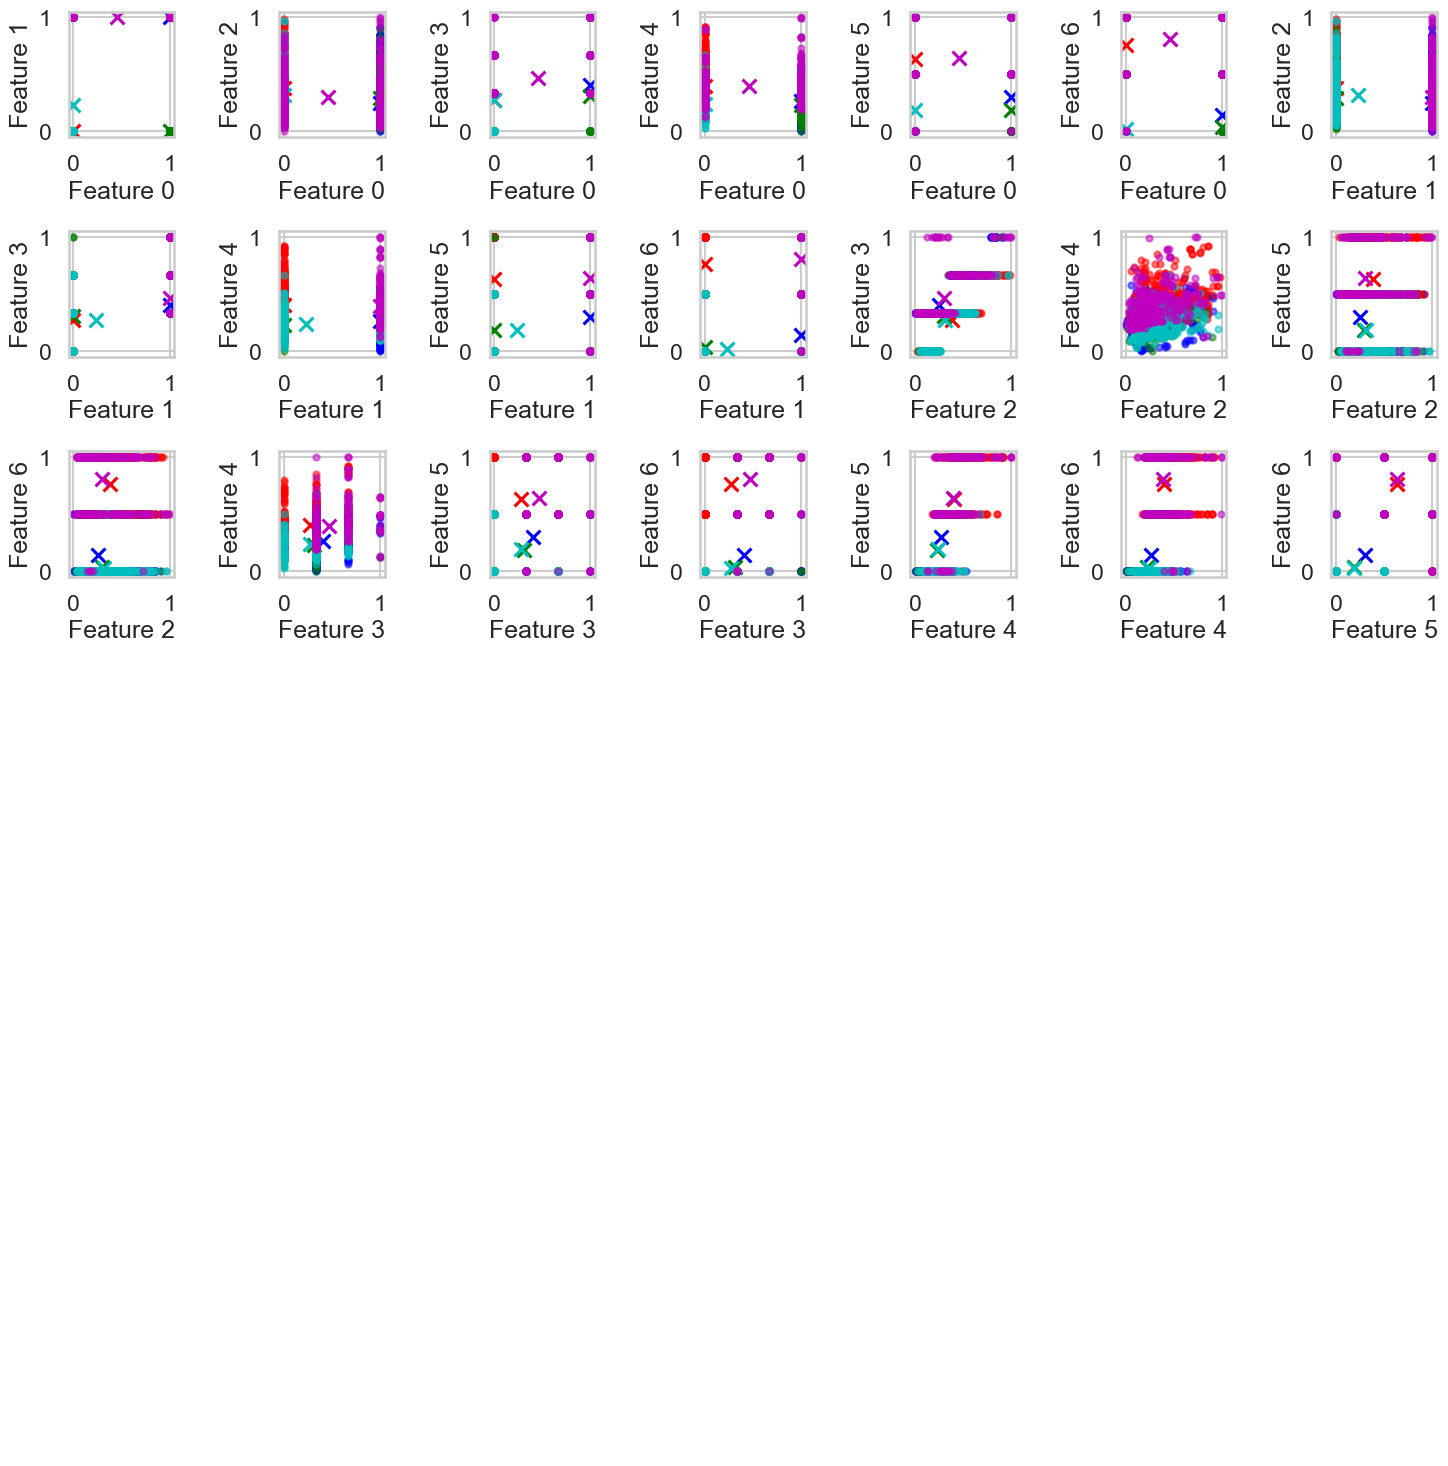

<Figure size 800x800 with 0 Axes>

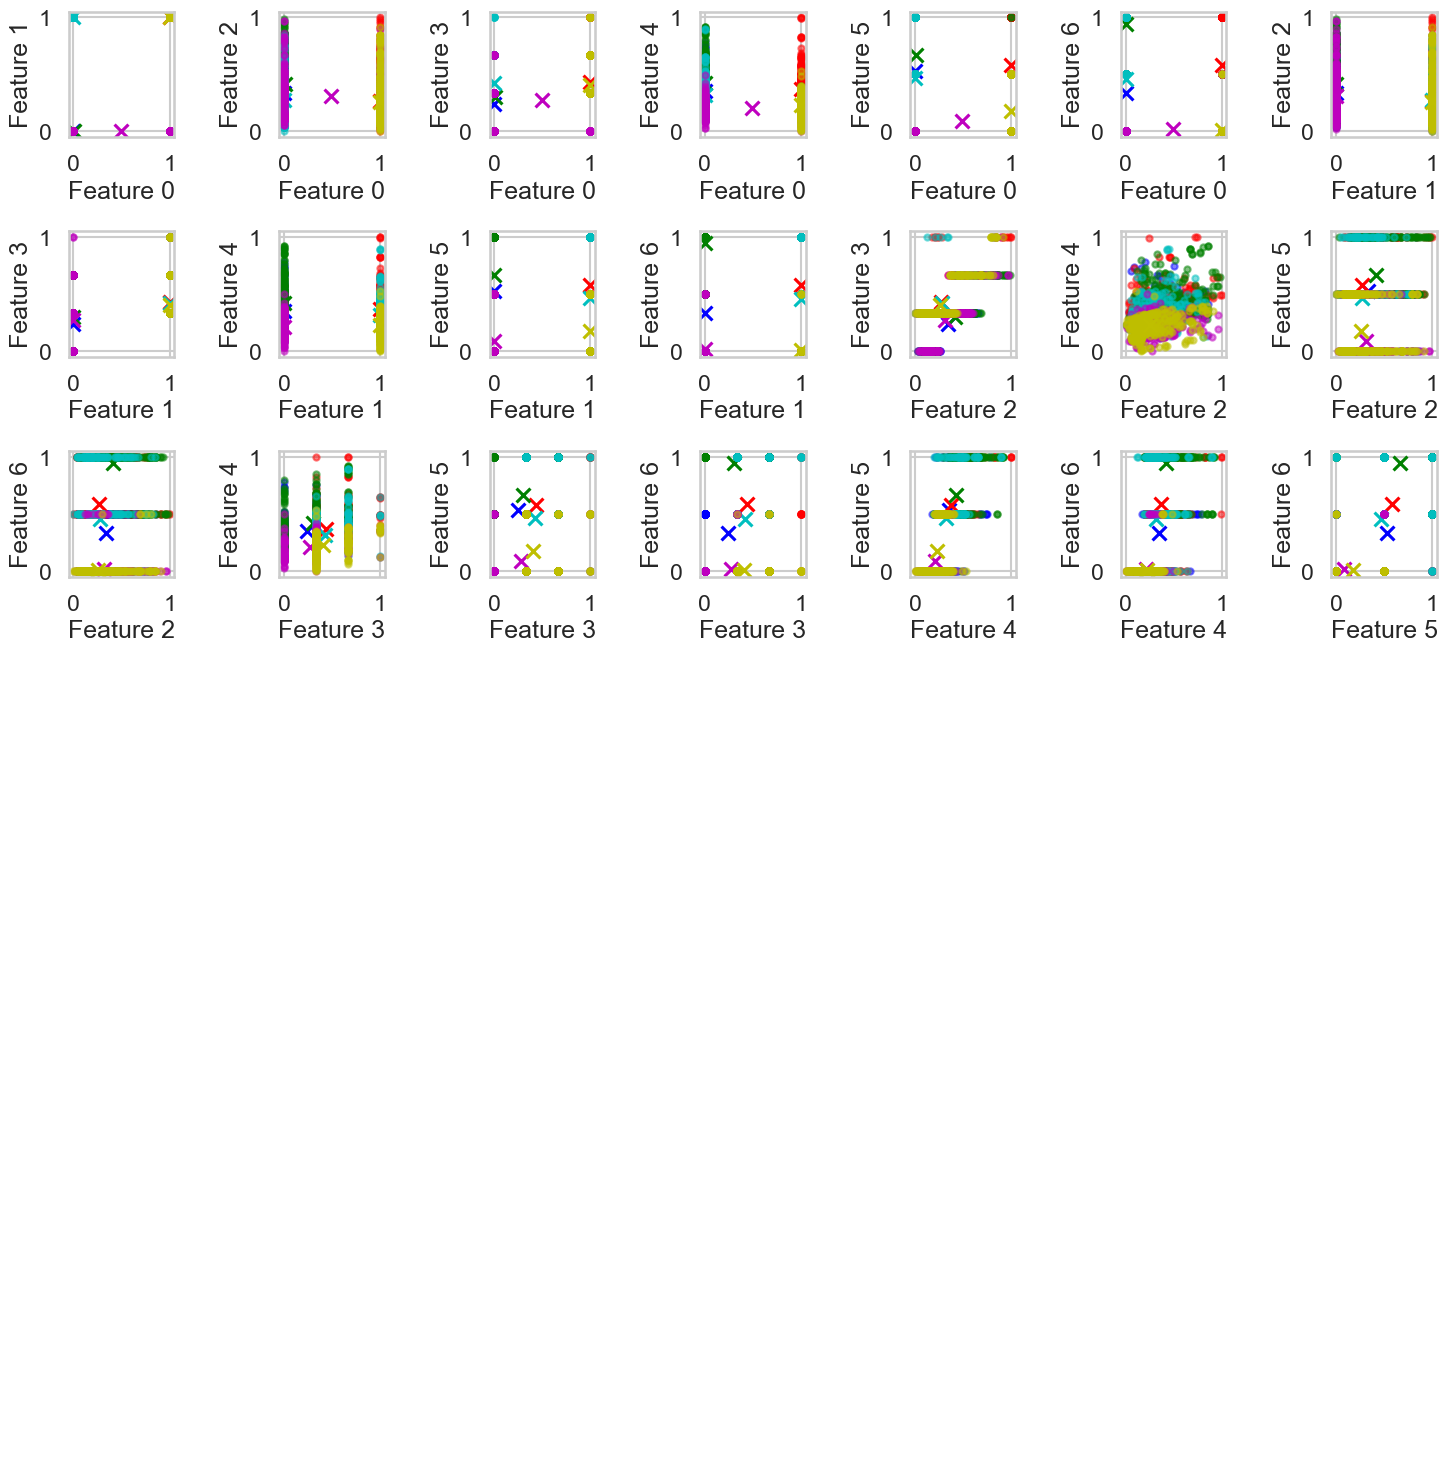

<Figure size 800x800 with 0 Axes>

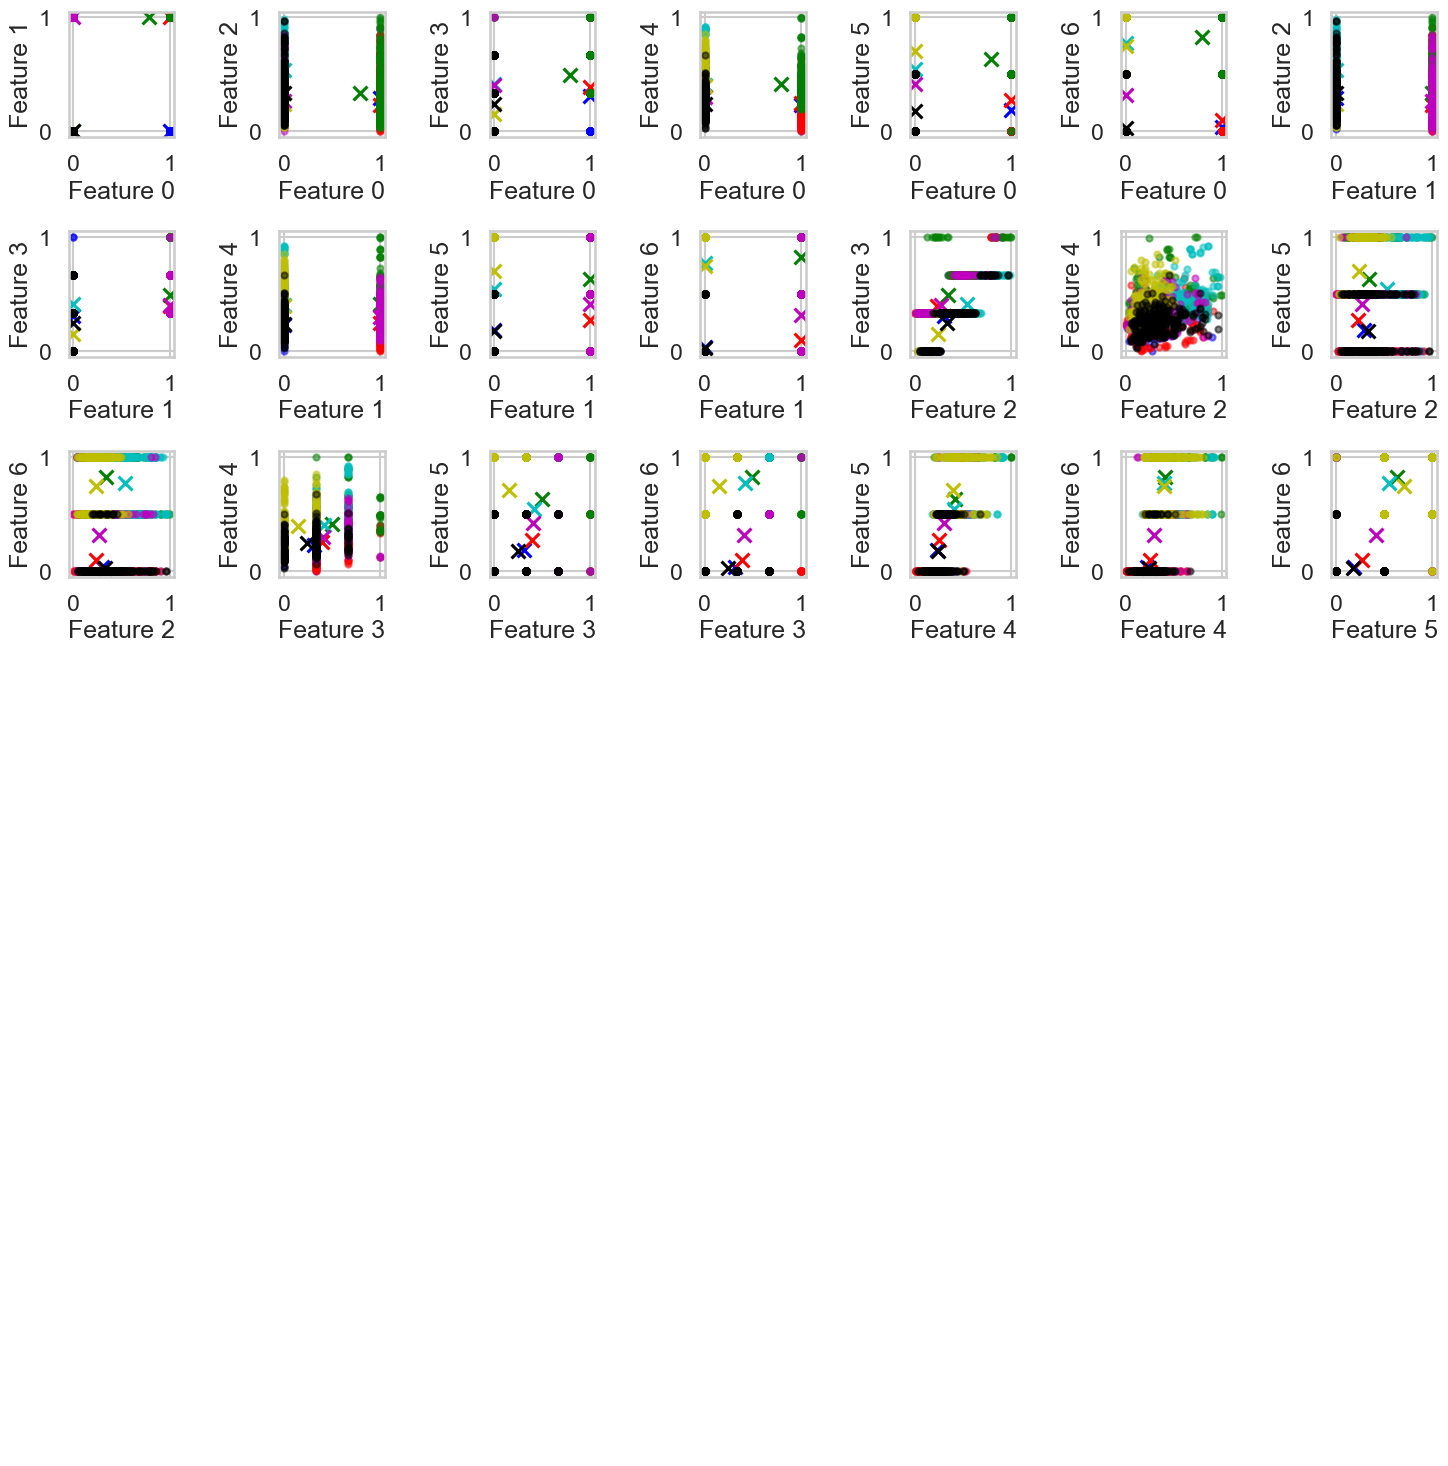

<Figure size 800x800 with 0 Axes>

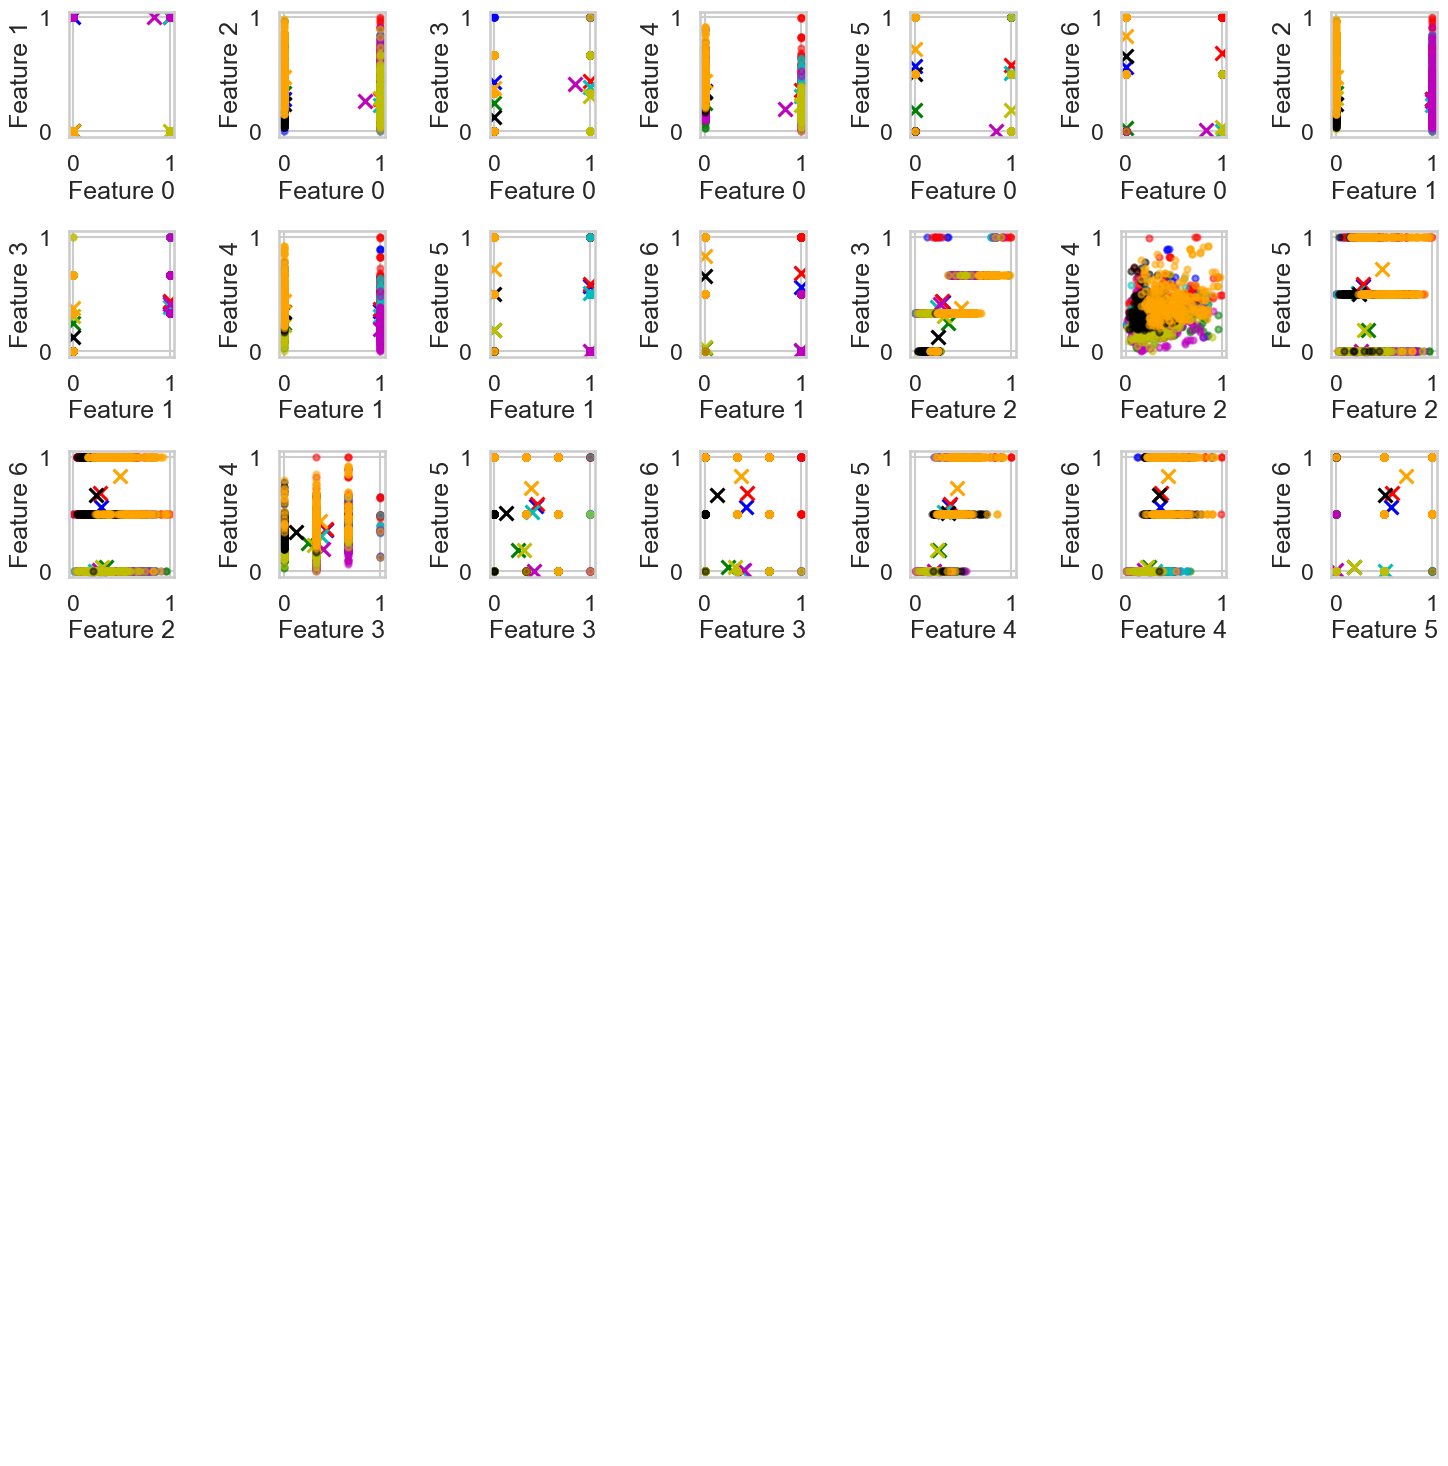

<Figure size 800x800 with 0 Axes>

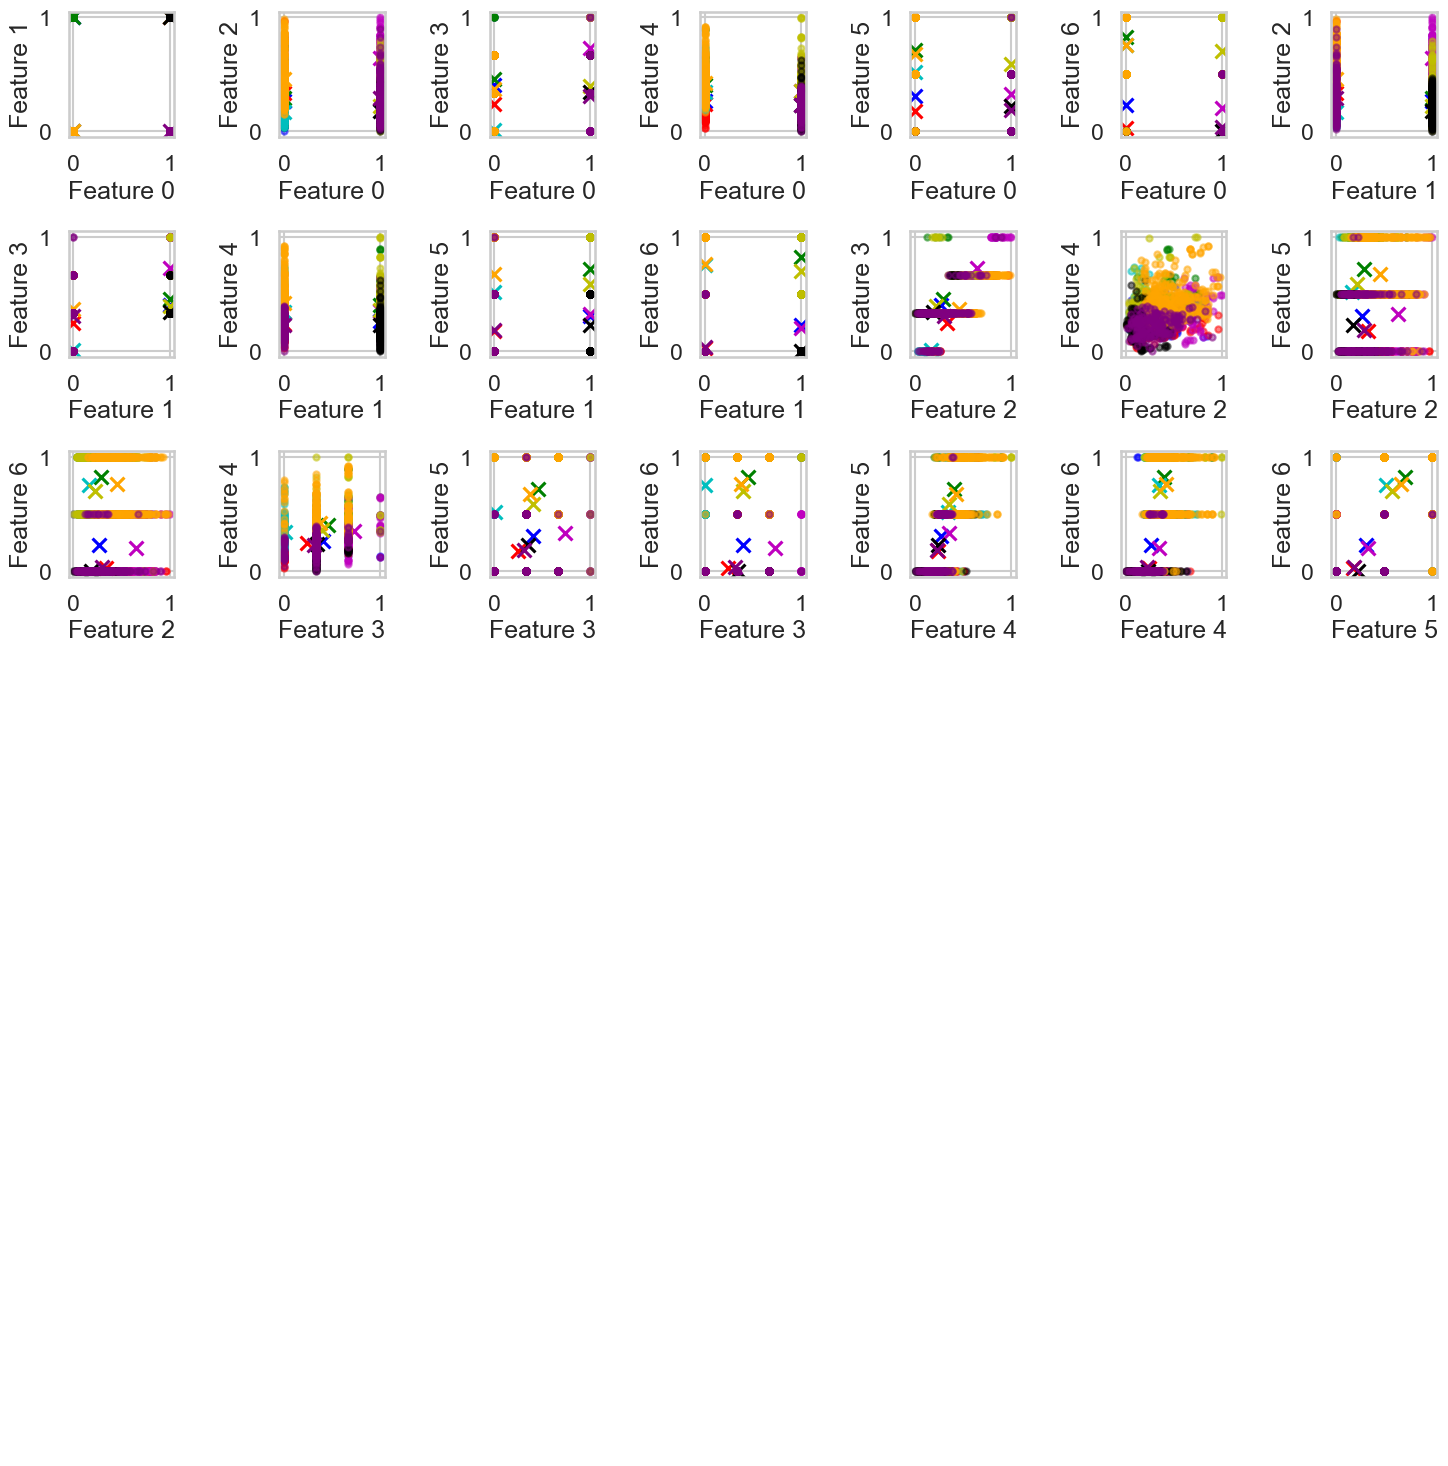

In [263]:
X1 = df2
# Set parameters
metric = []
diff_k = []
for i in range(2,10):
    num_clusters = i
    distance_type = 'pearson'

    # Perform KMeans clustering
    final_cluster_distance, cluster_metric = GUC_Kmean(X1, num_clusters, distance_type)
    metric.append(cluster_metric)
    diff_k.append(i)
    # Create a KMeans object for visualization purposes
    km = KMeans(n_clusters=num_clusters)
    km.labels_ = np.argmin(final_cluster_distance, axis=1)
    km.cluster_centers_ = np.array([X1[km.labels_ == i].mean(axis=0) for i in range(num_clusters)])
    
    # Visualize clusters
    plt.figure()
    display_cluster(X1.values, km=km, num_clusters=num_clusters)

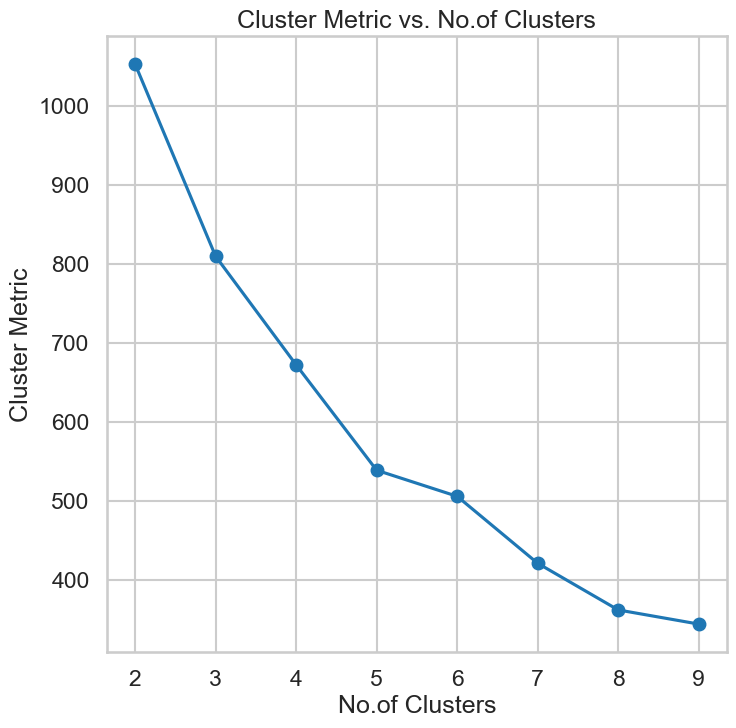

In [264]:
# Plot the graph
plt.plot(diff_k, metric, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('No.of Clusters')
plt.ylabel('Cluster Metric')
plt.title('Cluster Metric vs. No.of Clusters')

# Show the plot
plt.show()